In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt
warnings.filterwarnings("ignore")




import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
energy = pd.read_csv("./data.csv") 
energy.head()

dt      MW
0  2011-01-01 00:00:00  3416.0
1  2011-01-01 00:15:00  4755.0
2  2011-01-01 00:30:00  4939.0
3  2011-01-01 00:45:00  4939.0
4  2011-01-01 01:00:00  4998.0

In [3]:
energy.tail()

dt       MW
385561  2021-12-30 06:45:00  8140.31
385562  2021-12-30 07:00:00  8162.33
385563  2021-12-30 07:15:00  8405.11
385564  2021-12-30 07:30:00  8503.48
385565  2021-12-30 07:45:00  8403.53

In [6]:
energy.rename(columns={'dt':'datetime','MW':'power'},inplace=True)
energy['datetime'] = pd.to_datetime(energy['datetime'])
energy['power'] = energy['power'].astype('float64')
energy.dtypes

datetime    datetime64[ns]
power              float64
dtype: object

In [7]:
energy.head()

datetime   power
0 2011-01-01 00:00:00  3416.0
1 2011-01-01 00:15:00  4755.0
2 2011-01-01 00:30:00  4939.0
3 2011-01-01 00:45:00  4939.0
4 2011-01-01 01:00:00  4998.0

In [8]:
tb = np.arange(1,energy.shape[0]+1)
energy['tb'] = tb

In [9]:
energy['weekday'] = energy['datetime'].dt.day_name()
energy['month'] = energy['datetime'].dt.month_name()
energy['year'] = energy['datetime'].dt.year.astype('string')
energy['hour'] = energy['datetime'].dt.strftime('%H').astype('string')

In [10]:
energy

datetime    power      tb   weekday     month  year hour
0      2011-01-01 00:00:00  3416.00       1  Saturday   January  2011   00
1      2011-01-01 00:15:00  4755.00       2  Saturday   January  2011   00
2      2011-01-01 00:30:00  4939.00       3  Saturday   January  2011   00
3      2011-01-01 00:45:00  4939.00       4  Saturday   January  2011   00
4      2011-01-01 01:00:00  4998.00       5  Saturday   January  2011   01
...                    ...      ...     ...       ...       ...   ...  ...
385561 2021-12-30 06:45:00  8140.31  385562  Thursday  December  2021   06
385562 2021-12-30 07:00:00  8162.33  385563  Thursday  December  2021   07
385563 2021-12-30 07:15:00  8405.11  385564  Thursday  December  2021   07
385564 2021-12-30 07:30:00  8503.48  385565  Thursday  December  2021   07
385565 2021-12-30 07:45:00  8403.53  385566  Thursday  December  2021   07

[385566 rows x 7 columns]

In [11]:
energy.weekday.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

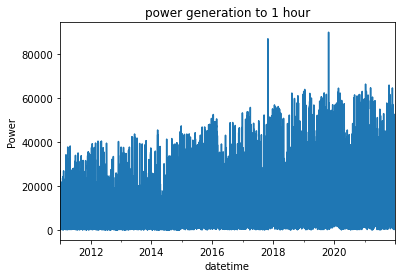

In [12]:
group_df = (energy.set_index('datetime')).resample('H')['power'].sum()
group_df.plot(kind='line')
plt.ylabel('Power')
plt.title('power generation to 1 hour')
plt.show()

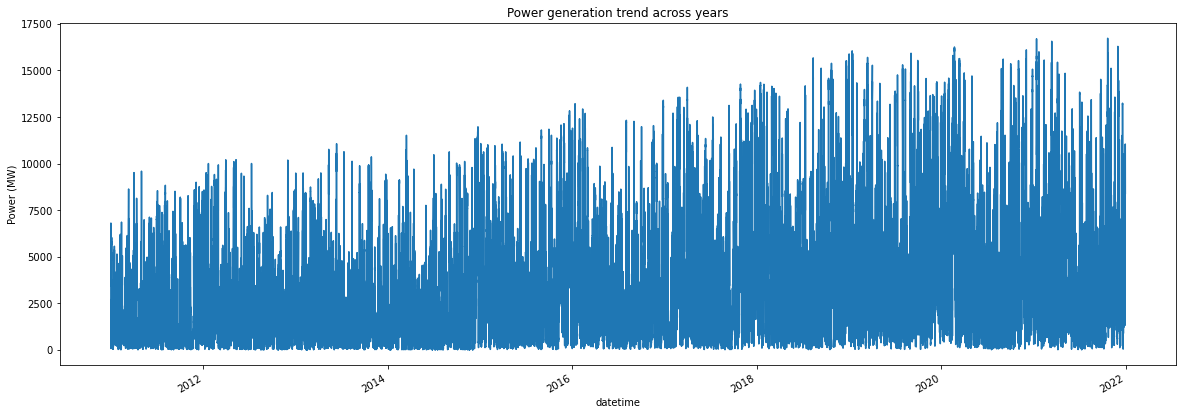

In [13]:
fig , axes = plt.subplots(1,1,figsize=(20,7))
energy.set_index('datetime')['power'].plot()
plt.ylabel('Power (MW)')
plt.title('Power generation trend across years')
plt.show()

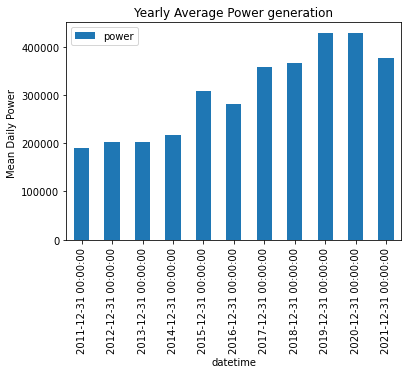

In [14]:
year_df = pd.DataFrame(energy.set_index('datetime').resample('1D')['power'].sum()).resample('1Y').mean()
year_df.plot.bar()
plt.title("Yearly Average Power generation")
plt.ylabel("Mean Daily Power ")
plt.show()

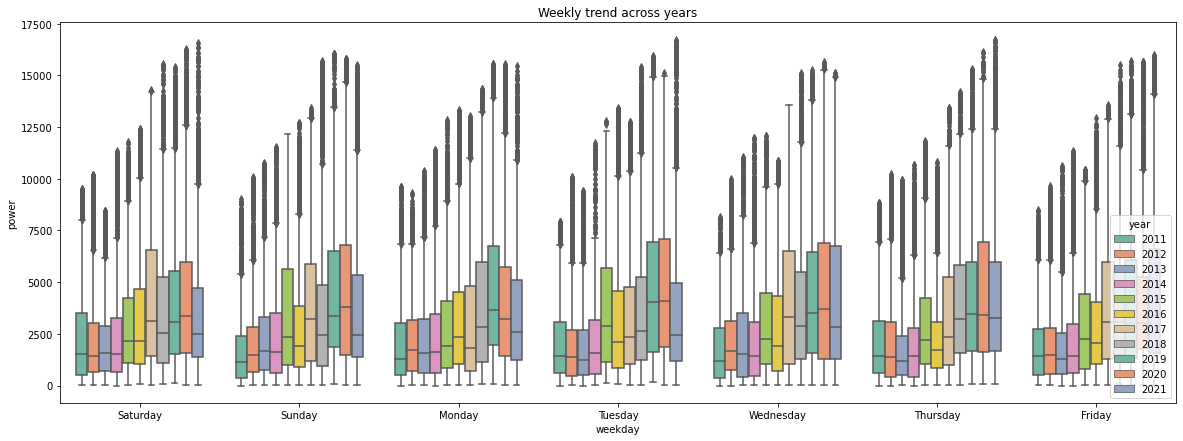

In [15]:
fig,axes = plt.subplots(1,1,figsize=(20,7))
sns.boxplot(data = energy,x='weekday',y='power',hue='year',palette='Set2',ax=axes)
plt.title('Weekly trend across years')
plt.show()

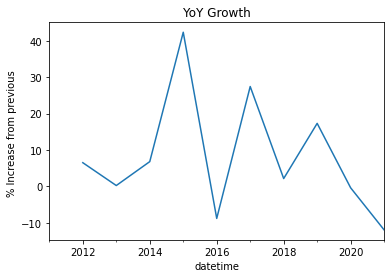

In [16]:
year_df = pd.DataFrame(energy.set_index('datetime').resample('1D')['power'].sum()).resample("1Y").mean()
year_df['shifted'] = year_df.shift(1)
year_df['YoYGrowth'] = ((year_df['power'] - year_df['shifted'])/year_df['shifted'])*100
year_df['YoYGrowth'].plot()
plt.title("YoY Growth")
plt.ylabel("% Increase from previous ")
plt.show()

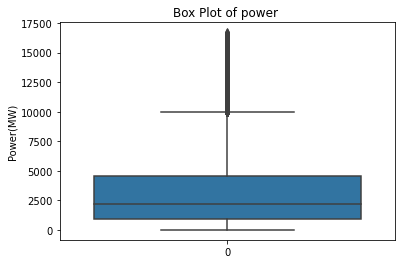

In [17]:
sns.boxplot(data=energy['power'])
plt.title('Box Plot of power ')
plt.ylabel('Power(MW)')
plt.show()

In [18]:
wind_data = energy.copy()

In [19]:
wind_data['feat_monthName'] = wind_data['datetime'].dt.month
wind_data['feat_isNight'] = (wind_data['datetime'].dt.hour>17).astype(int)
wind_data['feat_isDawn'] = ((wind_data['datetime'].dt.hour<=6) &  (wind_data['datetime'].dt.hour>=0) ).astype(int)
wind_data['feat_isMorning'] = ((wind_data['datetime'].dt.hour>6) &  (wind_data['datetime'].dt.hour<=12) ).astype(int)
wind_data['feat_isAfternoon'] = ((wind_data['datetime'].dt.hour>12) &  (wind_data['datetime'].dt.hour<=16) ).astype(int)

wind_data.head()

datetime   power  tb   weekday    month  year hour  \
0 2011-01-01 00:00:00  3416.0   1  Saturday  January  2011   00   
1 2011-01-01 00:15:00  4755.0   2  Saturday  January  2011   00   
2 2011-01-01 00:30:00  4939.0   3  Saturday  January  2011   00   
3 2011-01-01 00:45:00  4939.0   4  Saturday  January  2011   00   
4 2011-01-01 01:00:00  4998.0   5  Saturday  January  2011   01   

   feat_monthName  feat_isNight  feat_isDawn  feat_isMorning  feat_isAfternoon  
0               1             0            1               0                 0  
1               1             0            1               0                 0  
2               1             0            1               0                 0  
3               1             0            1               0                 0  
4               1             0            1               0                 0

In [20]:
for x in [1,12,24,48,72]:
    wind_data[f'lagged_power_{x}'] = wind_data.power.shift(x).bfill()

wind_data['rolling_4_power_mean'] = wind_data.power.rolling(4, 1).mean().shift().bfill()
wind_data['rolling_24_power_mean'] = wind_data.power.rolling(24, 1).mean().shift().bfill()

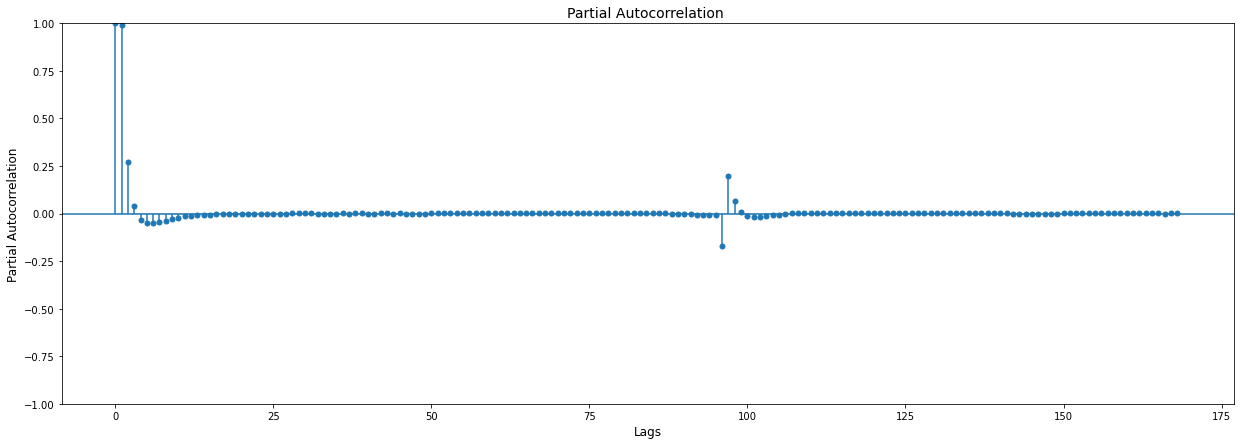

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
dataframe = wind_data.set_index('datetime')
plt.rc("figure", figsize=(21, 7))
plot_pacf(dataframe.power, lags=24*7)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title(f'Partial Autocorrelation ', fontsize=14)
plt.show()

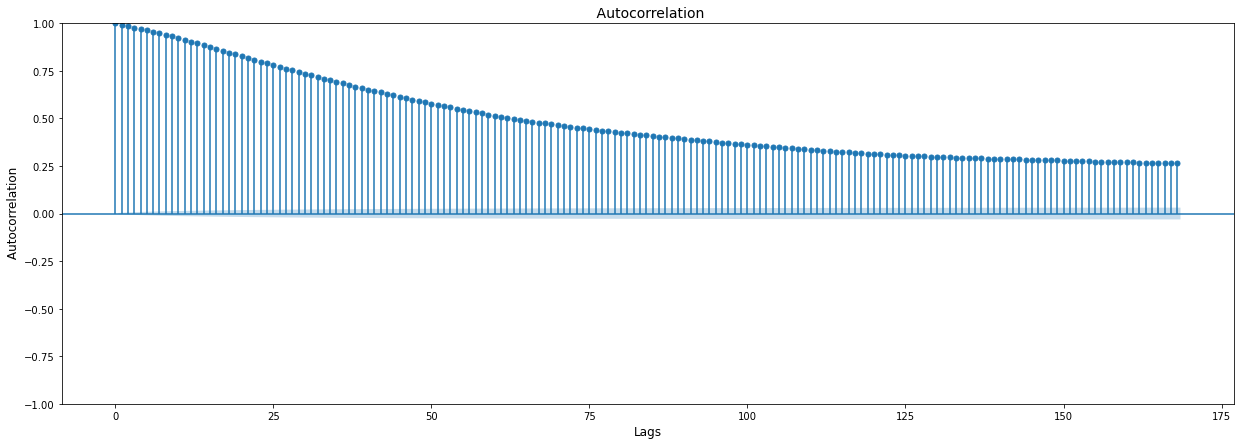

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
dataframe = wind_data.set_index('datetime')
plt.rc("figure", figsize=(21, 7))
plot_acf(dataframe.power, lags=24*7)
plt.xlabel('Lags', fontsize=12)
plt.ylabel(' Autocorrelation', fontsize=12)
plt.title(f' Autocorrelation', fontsize=14)
plt.show()

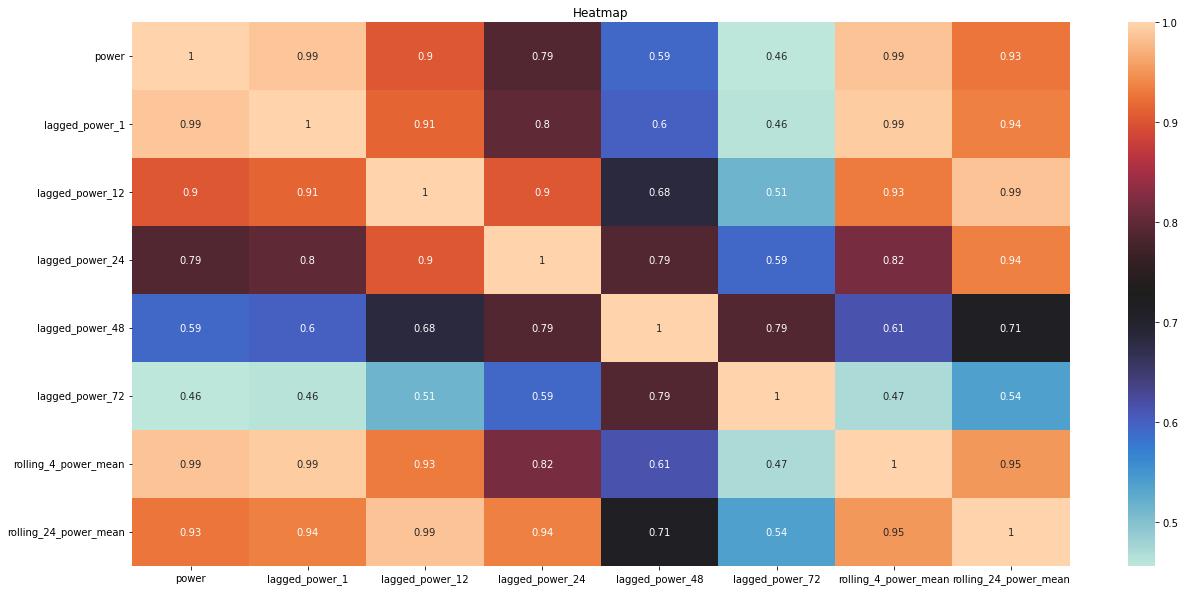

In [23]:
cor = wind_data.filter(regex='power').corr()
fig,axes = plt.subplots(1,1,figsize=(21,10))
sns.heatmap(cor,annot=True, cmap ='icefire')
plt.title('Heatmap')
plt.show()

In [24]:
print(f'All the features are {wind_data.columns}')

All the features are Index(['datetime', 'power', 'tb', 'weekday', 'month', 'year', 'hour',
       'feat_monthName', 'feat_isNight', 'feat_isDawn', 'feat_isMorning',
       'feat_isAfternoon', 'lagged_power_1', 'lagged_power_12',
       'lagged_power_24', 'lagged_power_48', 'lagged_power_72',
       'rolling_4_power_mean', 'rolling_24_power_mean'],
      dtype='object')


In [25]:
wind_data

datetime    power      tb   weekday     month  year hour  \
0      2011-01-01 00:00:00  3416.00       1  Saturday   January  2011   00   
1      2011-01-01 00:15:00  4755.00       2  Saturday   January  2011   00   
2      2011-01-01 00:30:00  4939.00       3  Saturday   January  2011   00   
3      2011-01-01 00:45:00  4939.00       4  Saturday   January  2011   00   
4      2011-01-01 01:00:00  4998.00       5  Saturday   January  2011   01   
...                    ...      ...     ...       ...       ...   ...  ...   
385561 2021-12-30 06:45:00  8140.31  385562  Thursday  December  2021   06   
385562 2021-12-30 07:00:00  8162.33  385563  Thursday  December  2021   07   
385563 2021-12-30 07:15:00  8405.11  385564  Thursday  December  2021   07   
385564 2021-12-30 07:30:00  8503.48  385565  Thursday  December  2021   07   
385565 2021-12-30 07:45:00  8403.53  385566  Thursday  December  2021   07   

        feat_monthName  feat_isNight  feat_isDawn  feat_isMorning  \
0                    1             0            1               0   
1                    1             0            1               0   
2                    1             0            1               0   
3                    1             0            1               0   
4                    1             0            1               0   
...                ...           ...          ...             ...   
385561              12             0            1               0   
385562              12             0            0               1   
385563              12             0            0               1   
385564              12             0            0               1   
385565              12             0            0               1   

        feat_isAfternoon  lagged_power_1  lagged_power_12  lagged_power_24  \
0                      0         3416.00          3416.00          3416.00   
1                      0         3416.00          3416.00          3416.00   
2                      0         4755.00          3416.00          3416.00   
3                      0         4939.00          3416.00          3416.00   
4                      0         4939.00          3416.00          3416.00   
...                  ...             ...              ...              ...   
385561                 0         8412.88          6368.56          4741.33   
385562                 0         8140.31          6374.74          5006.83   
385563                 0         8162.33          6685.98          5116.20   
385564                 0         8405.11          6848.75          5251.34   
385565                 0         8503.48          7550.59          5519.35   

        lagged_power_48  lagged_power_72  rolling_4_power_mean  \
0               3416.00          3416.00             3416.0000   
1               3416.00          3416.00             3416.0000   
2               3416.00          3416.00             4085.5000   
3               3416.00          3416.00             4370.0000   
4               3416.00          3416.00             4512.2500   
...                 ...              ...                   ...   
385561          1373.26          2429.14             8477.2850   
385562          1410.36          2360.45             8421.9200   
385563          1519.73          2459.66             8329.8300   
385564          1612.03          2321.49             8280.1575   
385565          1693.10          2316.13             8302.8075   

        rolling_24_power_mean  
0                 3416.000000  
1                 3416.000000  
2                 4085.500000  
3                 4370.000000  
4                 4512.250000  
...                       ...  
385561            6624.095417  
385562            6765.719583  
385563            6897.198750  
385564            7034.236667  
385565            7169.742500  

[385566 rows x 19 columns]

In [26]:
train_data = pd.DataFrame()
target_ahead_timeblocks = 8 # forecasting 2 hours ahead. 
wind_data['ramp'] = wind_data['power'] - wind_data['power'].shift(target_ahead_timeblocks)
features = ['datetime', 'power','tb',\
        'feat_monthName', 'feat_isNight', 'feat_isDawn',\
       'feat_isMorning', 'feat_isAfternoon', 'lagged_power_1',\
       'lagged_power_12', 'lagged_power_24', 'lagged_power_48',\
       'lagged_power_72', 'rolling_4_power_mean', 'rolling_24_power_mean']
train_data = wind_data[features].copy()
for feature in train_data.columns:
    train_data[feature] = train_data[feature].shift(-target_ahead_timeblocks )
print(train_data.shape)
train_data.head()

(385566, 15)


datetime   power    tb  feat_monthName  feat_isNight  \
0 2011-01-01 02:00:00  5509.0   9.0             1.0           0.0   
1 2011-01-01 02:15:00  5638.0  10.0             1.0           0.0   
2 2011-01-01 02:30:00  5582.0  11.0             1.0           0.0   
3 2011-01-01 02:45:00  5792.0  12.0             1.0           0.0   
4 2011-01-01 03:00:00  5962.0  13.0             1.0           0.0   

   feat_isDawn  feat_isMorning  feat_isAfternoon  lagged_power_1  \
0          1.0             0.0               0.0          5438.0   
1          1.0             0.0               0.0          5509.0   
2          1.0             0.0               0.0          5638.0   
3          1.0             0.0               0.0          5582.0   
4          1.0             0.0               0.0          5792.0   

   lagged_power_12  lagged_power_24  lagged_power_48  lagged_power_72  \
0           3416.0           3416.0           3416.0           3416.0   
1           3416.0           3416.0           3416.0           3416.0   
2           3416.0           3416.0           3416.0           3416.0   
3           3416.0           3416.0           3416.0           3416.0   
4           3416.0           3416.0           3416.0           3416.0   

   rolling_4_power_mean  rolling_24_power_mean  
0               5240.25            4876.250000  
1               5368.00            4946.555556  
2               5481.50            5015.700000  
3               5541.75            5067.181818  
4               5630.25            5127.583333

In [27]:
train_data['target'] = train_data['power'].shift(-target_ahead_timeblocks)

In [28]:
valid_cutoff_date = '2021-01-01 00:00:00' # Validation Cut Off
test_cutoff = '2021-06-01 00:00:00'  # Test Cut off 
x = train_data.drop('target',1).copy()
y = train_data[['datetime','target']].copy()

In [29]:
x_train = x[x['datetime'] < valid_cutoff_date].iloc[:,1:].copy()
y_train = y[y['datetime'] < valid_cutoff_date].iloc[:,1:].copy()
x_val = x[(x['datetime']>= valid_cutoff_date) & (x['datetime']< test_cutoff)].iloc[:,1:].copy()
y_val = y[(y['datetime']>= valid_cutoff_date) & (y['datetime']< test_cutoff)].iloc[:,1:].copy()
x_test = x[x['datetime'] >= test_cutoff].iloc[:,1:].copy()
y_test = y[y['datetime'] >= test_cutoff].iloc[:,1:].copy()

In [30]:
print(f'x train: {x_train.shape}')
print(f'x validation: {x_val.shape}')
print(f'x test: {x_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y validation: {y_val.shape}')
print(f'y test: {y_test.shape}')

x train: (350678, 14)
x validation: (14492, 14)
x test: (20388, 14)
y train: (350678, 1)
y validation: (14492, 1)
y test: (20388, 1)


In [31]:
def regression_metrics(y_test,y_pred):
    print("MAE:\t",round(mean_absolute_error(y_test,y_pred),4))
    print("MSE:\t",round(mean_squared_error(y_test,y_pred),4))
    print("RMSE:\t",round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

In [32]:
from lightgbm import LGBMRegressor as lgr
import lightgbm as lgb
from catboost import CatBoostRegressor as cbr
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , StratifiedKFold
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error

In [33]:
def model_validate(model, param_grid, x_train, y_train, x_test,y_test, model_name, k_folds=4, scoring='neg_mean_squared_error', fit_parameters={}):

    model_cv = GridSearchCV(model, param_grid, cv=k_folds, verbose=False, scoring= scoring, refit=True)
    model_cv.fit(x_train, y_train, **fit_parameters)
    y_train_pred = model_cv.predict(x_train)
    y_test_pred = model_cv.predict(x_test)

    print('Mean Squared Error = ', np.abs(model_cv.score(x_train, y_train)))
    print("Training metrics:")
    regression_metrics(y_train ,y_train_pred)
    
    return model_cv

In [34]:
lasso = Lasso(alpha =0.0005, random_state=20)
param_grid = [{'alpha':[0.0005,0.001, 0.005, 0.01, 0.05, 0.03, 0.1, 0.5, 1]}]

lasso_model = model_validate(lasso, param_grid, x_train, y_train, x_test, y_test, 'Lasso',k_folds=5)

Mean Squared Error =  9.825460166047069e+05
Training metrics:
MAE:	 572.5387
MSE:	 982546.0166
RMSE:	 991.2346


In [35]:
param_grid = {'learning_rate':[0.1], 'num_iterations': [10000], 'n_estimators': [25], 'num_leaves': [40],'verbose': [-1],'colsample_bytree':[0.4], 'subsample': [0.4], 'max_depth': [9]} 
lgb_model = lgr()

In [36]:
model_lgb = model_validate(lgb_model, param_grid, x_train, y_train, x_test, y_test, 'LGBM', fit_parameters={'eval_set':[(x_val, y_val)], 'eval_metric':'rmse'})

[1]	valid_0's rmse: 3242.18	valid_0's l2: 1.05118e+07
[2]	valid_0's rmse: 3011.61	valid_0's l2: 9.06979e+06
[3]	valid_0's rmse: 2763.79	valid_0's l2: 7.63854e+06
[4]	valid_0's rmse: 2544.77	valid_0's l2: 6.47587e+06
[5]	valid_0's rmse: 2352	valid_0's l2: 5.5319e+06
[6]	valid_0's rmse: 2182.82	valid_0's l2: 4.7647e+06
[7]	valid_0's rmse: 2043	valid_0's l2: 4.17385e+06
[8]	valid_0's rmse: 1948.02	valid_0's l2: 3.79477e+06
[9]	valid_0's rmse: 1837.94	valid_0's l2: 3.37802e+06
[10]	valid_0's rmse: 1774.57	valid_0's l2: 3.14909e+06
[11]	valid_0's rmse: 1690.55	valid_0's l2: 2.85795e+06
[12]	valid_0's rmse: 1611.74	valid_0's l2: 2.59769e+06
[13]	valid_0's rmse: 1575.25	valid_0's l2: 2.48142e+06
[14]	valid_0's rmse: 1514.2	valid_0's l2: 2.29281e+06
[15]	valid_0's rmse: 1508.02	valid_0's l2: 2.27413e+06
[16]	valid_0's rmse: 1457.17	valid_0's l2: 2.12334e+06
[17]	valid_0's rmse: 1419.66	valid_0's l2: 2.01543e+06
[18]	valid_0's rmse: 1386.01	valid_0's l2: 1.92103e+06
[19]	valid_0's rmse: 1357.83

[150]	valid_0's rmse: 1157.38	valid_0's l2: 1.33952e+06
[151]	valid_0's rmse: 1157.15	valid_0's l2: 1.33899e+06
[152]	valid_0's rmse: 1157.07	valid_0's l2: 1.33881e+06
[153]	valid_0's rmse: 1157	valid_0's l2: 1.33866e+06
[154]	valid_0's rmse: 1156.79	valid_0's l2: 1.33817e+06
[155]	valid_0's rmse: 1156.78	valid_0's l2: 1.33815e+06
[156]	valid_0's rmse: 1157.34	valid_0's l2: 1.33945e+06
[157]	valid_0's rmse: 1157.21	valid_0's l2: 1.33914e+06
[158]	valid_0's rmse: 1157.35	valid_0's l2: 1.33947e+06
[159]	valid_0's rmse: 1156.97	valid_0's l2: 1.33859e+06
[160]	valid_0's rmse: 1156.27	valid_0's l2: 1.33696e+06
[161]	valid_0's rmse: 1155.85	valid_0's l2: 1.336e+06
[162]	valid_0's rmse: 1155.91	valid_0's l2: 1.33612e+06
[163]	valid_0's rmse: 1156.34	valid_0's l2: 1.33713e+06
[164]	valid_0's rmse: 1156.12	valid_0's l2: 1.33661e+06
[165]	valid_0's rmse: 1156.17	valid_0's l2: 1.33674e+06
[166]	valid_0's rmse: 1156.44	valid_0's l2: 1.33735e+06
[167]	valid_0's rmse: 1156.49	valid_0's l2: 1.33748e+

[299]	valid_0's rmse: 1164.42	valid_0's l2: 1.35587e+06
[300]	valid_0's rmse: 1164.45	valid_0's l2: 1.35594e+06
[301]	valid_0's rmse: 1164.42	valid_0's l2: 1.35587e+06
[302]	valid_0's rmse: 1164.1	valid_0's l2: 1.35514e+06
[303]	valid_0's rmse: 1164.55	valid_0's l2: 1.35617e+06
[304]	valid_0's rmse: 1164.58	valid_0's l2: 1.35625e+06
[305]	valid_0's rmse: 1164.99	valid_0's l2: 1.35721e+06
[306]	valid_0's rmse: 1164.59	valid_0's l2: 1.35626e+06
[307]	valid_0's rmse: 1164.36	valid_0's l2: 1.35574e+06
[308]	valid_0's rmse: 1167.81	valid_0's l2: 1.36379e+06
[309]	valid_0's rmse: 1167.97	valid_0's l2: 1.36415e+06
[310]	valid_0's rmse: 1167.96	valid_0's l2: 1.36414e+06
[311]	valid_0's rmse: 1167.98	valid_0's l2: 1.36418e+06
[312]	valid_0's rmse: 1167.92	valid_0's l2: 1.36404e+06
[313]	valid_0's rmse: 1168.1	valid_0's l2: 1.36447e+06
[314]	valid_0's rmse: 1168.22	valid_0's l2: 1.36475e+06
[315]	valid_0's rmse: 1168.21	valid_0's l2: 1.36471e+06
[316]	valid_0's rmse: 1168.21	valid_0's l2: 1.3647

[446]	valid_0's rmse: 1186.37	valid_0's l2: 1.40748e+06
[447]	valid_0's rmse: 1186.38	valid_0's l2: 1.40749e+06
[448]	valid_0's rmse: 1186.35	valid_0's l2: 1.40743e+06
[449]	valid_0's rmse: 1186.3	valid_0's l2: 1.40732e+06
[450]	valid_0's rmse: 1185.99	valid_0's l2: 1.40658e+06
[451]	valid_0's rmse: 1185.84	valid_0's l2: 1.40622e+06
[452]	valid_0's rmse: 1185.8	valid_0's l2: 1.40612e+06
[453]	valid_0's rmse: 1185.77	valid_0's l2: 1.40606e+06
[454]	valid_0's rmse: 1185.67	valid_0's l2: 1.40582e+06
[455]	valid_0's rmse: 1185.98	valid_0's l2: 1.40654e+06
[456]	valid_0's rmse: 1185.59	valid_0's l2: 1.40562e+06
[457]	valid_0's rmse: 1185.71	valid_0's l2: 1.4059e+06
[458]	valid_0's rmse: 1185.7	valid_0's l2: 1.40588e+06
[459]	valid_0's rmse: 1185.68	valid_0's l2: 1.40583e+06
[460]	valid_0's rmse: 1185.7	valid_0's l2: 1.40589e+06
[461]	valid_0's rmse: 1185.68	valid_0's l2: 1.40584e+06
[462]	valid_0's rmse: 1185.57	valid_0's l2: 1.40558e+06
[463]	valid_0's rmse: 1185.55	valid_0's l2: 1.40552e+

[596]	valid_0's rmse: 1194.84	valid_0's l2: 1.42765e+06
[597]	valid_0's rmse: 1194.81	valid_0's l2: 1.42758e+06
[598]	valid_0's rmse: 1194.79	valid_0's l2: 1.42753e+06
[599]	valid_0's rmse: 1194.83	valid_0's l2: 1.42761e+06
[600]	valid_0's rmse: 1195.02	valid_0's l2: 1.42807e+06
[601]	valid_0's rmse: 1195	valid_0's l2: 1.42802e+06
[602]	valid_0's rmse: 1195.11	valid_0's l2: 1.42829e+06
[603]	valid_0's rmse: 1195.09	valid_0's l2: 1.42824e+06
[604]	valid_0's rmse: 1195.05	valid_0's l2: 1.42814e+06
[605]	valid_0's rmse: 1195.47	valid_0's l2: 1.42915e+06
[606]	valid_0's rmse: 1195.52	valid_0's l2: 1.42926e+06
[607]	valid_0's rmse: 1195.41	valid_0's l2: 1.42901e+06
[608]	valid_0's rmse: 1195.27	valid_0's l2: 1.42866e+06
[609]	valid_0's rmse: 1195.25	valid_0's l2: 1.42861e+06
[610]	valid_0's rmse: 1195.47	valid_0's l2: 1.42915e+06
[611]	valid_0's rmse: 1195.52	valid_0's l2: 1.42926e+06
[612]	valid_0's rmse: 1195.83	valid_0's l2: 1.43002e+06
[613]	valid_0's rmse: 1195.63	valid_0's l2: 1.42954

[743]	valid_0's rmse: 1212.54	valid_0's l2: 1.47025e+06
[744]	valid_0's rmse: 1212.51	valid_0's l2: 1.47019e+06
[745]	valid_0's rmse: 1212.59	valid_0's l2: 1.47039e+06
[746]	valid_0's rmse: 1212.57	valid_0's l2: 1.47034e+06
[747]	valid_0's rmse: 1212.5	valid_0's l2: 1.47017e+06
[748]	valid_0's rmse: 1212.55	valid_0's l2: 1.47028e+06
[749]	valid_0's rmse: 1212.52	valid_0's l2: 1.47019e+06
[750]	valid_0's rmse: 1212.47	valid_0's l2: 1.47009e+06
[751]	valid_0's rmse: 1212.48	valid_0's l2: 1.47011e+06
[752]	valid_0's rmse: 1212.53	valid_0's l2: 1.47023e+06
[753]	valid_0's rmse: 1212.49	valid_0's l2: 1.47014e+06
[754]	valid_0's rmse: 1212.65	valid_0's l2: 1.47051e+06
[755]	valid_0's rmse: 1212.64	valid_0's l2: 1.4705e+06
[756]	valid_0's rmse: 1212.76	valid_0's l2: 1.47078e+06
[757]	valid_0's rmse: 1212.74	valid_0's l2: 1.47073e+06
[758]	valid_0's rmse: 1212.98	valid_0's l2: 1.47133e+06
[759]	valid_0's rmse: 1212.96	valid_0's l2: 1.47127e+06
[760]	valid_0's rmse: 1213.01	valid_0's l2: 1.4714

[890]	valid_0's rmse: 1225.08	valid_0's l2: 1.50083e+06
[891]	valid_0's rmse: 1225.08	valid_0's l2: 1.50081e+06
[892]	valid_0's rmse: 1225.07	valid_0's l2: 1.5008e+06
[893]	valid_0's rmse: 1225.09	valid_0's l2: 1.50084e+06
[894]	valid_0's rmse: 1225.18	valid_0's l2: 1.50106e+06
[895]	valid_0's rmse: 1225.19	valid_0's l2: 1.50109e+06
[896]	valid_0's rmse: 1225.23	valid_0's l2: 1.50118e+06
[897]	valid_0's rmse: 1225.23	valid_0's l2: 1.50119e+06
[898]	valid_0's rmse: 1225.04	valid_0's l2: 1.50072e+06
[899]	valid_0's rmse: 1225.05	valid_0's l2: 1.50075e+06
[900]	valid_0's rmse: 1225.1	valid_0's l2: 1.50087e+06
[901]	valid_0's rmse: 1224.94	valid_0's l2: 1.50049e+06
[902]	valid_0's rmse: 1224.89	valid_0's l2: 1.50035e+06
[903]	valid_0's rmse: 1224.82	valid_0's l2: 1.50018e+06
[904]	valid_0's rmse: 1224.84	valid_0's l2: 1.50023e+06
[905]	valid_0's rmse: 1224.87	valid_0's l2: 1.50032e+06
[906]	valid_0's rmse: 1224.89	valid_0's l2: 1.50035e+06
[907]	valid_0's rmse: 1224.81	valid_0's l2: 1.5001

[1040]	valid_0's rmse: 1236.01	valid_0's l2: 1.52772e+06
[1041]	valid_0's rmse: 1236.4	valid_0's l2: 1.52868e+06
[1042]	valid_0's rmse: 1236.42	valid_0's l2: 1.52874e+06
[1043]	valid_0's rmse: 1236.45	valid_0's l2: 1.5288e+06
[1044]	valid_0's rmse: 1236.58	valid_0's l2: 1.52913e+06
[1045]	valid_0's rmse: 1236.7	valid_0's l2: 1.52943e+06
[1046]	valid_0's rmse: 1236.74	valid_0's l2: 1.52952e+06
[1047]	valid_0's rmse: 1236.73	valid_0's l2: 1.5295e+06
[1048]	valid_0's rmse: 1236.73	valid_0's l2: 1.52951e+06
[1049]	valid_0's rmse: 1236.8	valid_0's l2: 1.52968e+06
[1050]	valid_0's rmse: 1236.81	valid_0's l2: 1.52969e+06
[1051]	valid_0's rmse: 1236.79	valid_0's l2: 1.52966e+06
[1052]	valid_0's rmse: 1236.82	valid_0's l2: 1.52972e+06
[1053]	valid_0's rmse: 1236.86	valid_0's l2: 1.52981e+06
[1054]	valid_0's rmse: 1236.83	valid_0's l2: 1.52974e+06
[1055]	valid_0's rmse: 1236.77	valid_0's l2: 1.5296e+06
[1056]	valid_0's rmse: 1236.66	valid_0's l2: 1.52933e+06
[1057]	valid_0's rmse: 1236.68	valid_

[1186]	valid_0's rmse: 1241.19	valid_0's l2: 1.54054e+06
[1187]	valid_0's rmse: 1241.05	valid_0's l2: 1.54022e+06
[1188]	valid_0's rmse: 1241.16	valid_0's l2: 1.54049e+06
[1189]	valid_0's rmse: 1241.18	valid_0's l2: 1.54053e+06
[1190]	valid_0's rmse: 1241.17	valid_0's l2: 1.5405e+06
[1191]	valid_0's rmse: 1241.17	valid_0's l2: 1.5405e+06
[1192]	valid_0's rmse: 1241.16	valid_0's l2: 1.54049e+06
[1193]	valid_0's rmse: 1241.16	valid_0's l2: 1.54049e+06
[1194]	valid_0's rmse: 1241.28	valid_0's l2: 1.54078e+06
[1195]	valid_0's rmse: 1241.21	valid_0's l2: 1.54059e+06
[1196]	valid_0's rmse: 1241.11	valid_0's l2: 1.54035e+06
[1197]	valid_0's rmse: 1241.12	valid_0's l2: 1.54039e+06
[1198]	valid_0's rmse: 1240.96	valid_0's l2: 1.53998e+06
[1199]	valid_0's rmse: 1241.01	valid_0's l2: 1.54012e+06
[1200]	valid_0's rmse: 1240.96	valid_0's l2: 1.53998e+06
[1201]	valid_0's rmse: 1241	valid_0's l2: 1.54007e+06
[1202]	valid_0's rmse: 1241.03	valid_0's l2: 1.54015e+06
[1203]	valid_0's rmse: 1240.88	valid

[1332]	valid_0's rmse: 1252.76	valid_0's l2: 1.5694e+06
[1333]	valid_0's rmse: 1252.65	valid_0's l2: 1.56914e+06
[1334]	valid_0's rmse: 1253.03	valid_0's l2: 1.5701e+06
[1335]	valid_0's rmse: 1253.08	valid_0's l2: 1.57022e+06
[1336]	valid_0's rmse: 1253.12	valid_0's l2: 1.57031e+06
[1337]	valid_0's rmse: 1253.15	valid_0's l2: 1.5704e+06
[1338]	valid_0's rmse: 1253.11	valid_0's l2: 1.57029e+06
[1339]	valid_0's rmse: 1253.15	valid_0's l2: 1.57038e+06
[1340]	valid_0's rmse: 1253.18	valid_0's l2: 1.57047e+06
[1341]	valid_0's rmse: 1253.23	valid_0's l2: 1.57059e+06
[1342]	valid_0's rmse: 1253.35	valid_0's l2: 1.57088e+06
[1343]	valid_0's rmse: 1253.37	valid_0's l2: 1.57093e+06
[1344]	valid_0's rmse: 1253.37	valid_0's l2: 1.57094e+06
[1345]	valid_0's rmse: 1253.42	valid_0's l2: 1.57107e+06
[1346]	valid_0's rmse: 1253.4	valid_0's l2: 1.57101e+06
[1347]	valid_0's rmse: 1253.4	valid_0's l2: 1.571e+06
[1348]	valid_0's rmse: 1253.39	valid_0's l2: 1.57099e+06
[1349]	valid_0's rmse: 1253.5	valid_0'

[1477]	valid_0's rmse: 1273.71	valid_0's l2: 1.62233e+06
[1478]	valid_0's rmse: 1273.79	valid_0's l2: 1.62254e+06
[1479]	valid_0's rmse: 1273.76	valid_0's l2: 1.62247e+06
[1480]	valid_0's rmse: 1273.95	valid_0's l2: 1.62296e+06
[1481]	valid_0's rmse: 1274.04	valid_0's l2: 1.62318e+06
[1482]	valid_0's rmse: 1274.04	valid_0's l2: 1.62319e+06
[1483]	valid_0's rmse: 1273.95	valid_0's l2: 1.62294e+06
[1484]	valid_0's rmse: 1274.01	valid_0's l2: 1.62311e+06
[1485]	valid_0's rmse: 1273.95	valid_0's l2: 1.62295e+06
[1486]	valid_0's rmse: 1273.94	valid_0's l2: 1.62293e+06
[1487]	valid_0's rmse: 1273.94	valid_0's l2: 1.62292e+06
[1488]	valid_0's rmse: 1273.95	valid_0's l2: 1.62295e+06
[1489]	valid_0's rmse: 1273.96	valid_0's l2: 1.62297e+06
[1490]	valid_0's rmse: 1273.94	valid_0's l2: 1.62292e+06
[1491]	valid_0's rmse: 1273.94	valid_0's l2: 1.62293e+06
[1492]	valid_0's rmse: 1274.03	valid_0's l2: 1.62316e+06
[1493]	valid_0's rmse: 1274.09	valid_0's l2: 1.6233e+06
[1494]	valid_0's rmse: 1273.99	v

[1625]	valid_0's rmse: 1283.36	valid_0's l2: 1.64702e+06
[1626]	valid_0's rmse: 1283.36	valid_0's l2: 1.64702e+06
[1627]	valid_0's rmse: 1283.36	valid_0's l2: 1.64703e+06
[1628]	valid_0's rmse: 1283.42	valid_0's l2: 1.64716e+06
[1629]	valid_0's rmse: 1285.05	valid_0's l2: 1.65134e+06
[1630]	valid_0's rmse: 1285.07	valid_0's l2: 1.65139e+06
[1631]	valid_0's rmse: 1284.25	valid_0's l2: 1.64929e+06
[1632]	valid_0's rmse: 1284.21	valid_0's l2: 1.64918e+06
[1633]	valid_0's rmse: 1284.21	valid_0's l2: 1.6492e+06
[1634]	valid_0's rmse: 1284.23	valid_0's l2: 1.64925e+06
[1635]	valid_0's rmse: 1284.23	valid_0's l2: 1.64926e+06
[1636]	valid_0's rmse: 1284.24	valid_0's l2: 1.64927e+06
[1637]	valid_0's rmse: 1284.25	valid_0's l2: 1.6493e+06
[1638]	valid_0's rmse: 1284.25	valid_0's l2: 1.64929e+06
[1639]	valid_0's rmse: 1284.16	valid_0's l2: 1.64905e+06
[1640]	valid_0's rmse: 1284.14	valid_0's l2: 1.64901e+06
[1641]	valid_0's rmse: 1284.09	valid_0's l2: 1.64889e+06
[1642]	valid_0's rmse: 1284.28	va

[1770]	valid_0's rmse: 1294.61	valid_0's l2: 1.67601e+06
[1771]	valid_0's rmse: 1294.69	valid_0's l2: 1.67621e+06
[1772]	valid_0's rmse: 1294.66	valid_0's l2: 1.67614e+06
[1773]	valid_0's rmse: 1294.68	valid_0's l2: 1.67619e+06
[1774]	valid_0's rmse: 1294.67	valid_0's l2: 1.67616e+06
[1775]	valid_0's rmse: 1294.67	valid_0's l2: 1.67618e+06
[1776]	valid_0's rmse: 1294.71	valid_0's l2: 1.67628e+06
[1777]	valid_0's rmse: 1294.73	valid_0's l2: 1.67631e+06
[1778]	valid_0's rmse: 1294.73	valid_0's l2: 1.67632e+06
[1779]	valid_0's rmse: 1294.79	valid_0's l2: 1.67648e+06
[1780]	valid_0's rmse: 1294.85	valid_0's l2: 1.67663e+06
[1781]	valid_0's rmse: 1294.87	valid_0's l2: 1.67668e+06
[1782]	valid_0's rmse: 1294.85	valid_0's l2: 1.67664e+06
[1783]	valid_0's rmse: 1294.85	valid_0's l2: 1.67663e+06
[1784]	valid_0's rmse: 1294.86	valid_0's l2: 1.67667e+06
[1785]	valid_0's rmse: 1294.84	valid_0's l2: 1.67661e+06
[1786]	valid_0's rmse: 1294.75	valid_0's l2: 1.67637e+06
[1787]	valid_0's rmse: 1294.76	

[1915]	valid_0's rmse: 1315.03	valid_0's l2: 1.72929e+06
[1916]	valid_0's rmse: 1315.05	valid_0's l2: 1.72937e+06
[1917]	valid_0's rmse: 1315.05	valid_0's l2: 1.72935e+06
[1918]	valid_0's rmse: 1315	valid_0's l2: 1.72922e+06
[1919]	valid_0's rmse: 1315.04	valid_0's l2: 1.72932e+06
[1920]	valid_0's rmse: 1314.96	valid_0's l2: 1.72911e+06
[1921]	valid_0's rmse: 1314.97	valid_0's l2: 1.72914e+06
[1922]	valid_0's rmse: 1314.98	valid_0's l2: 1.72917e+06
[1923]	valid_0's rmse: 1315	valid_0's l2: 1.72923e+06
[1924]	valid_0's rmse: 1314.98	valid_0's l2: 1.72917e+06
[1925]	valid_0's rmse: 1314.95	valid_0's l2: 1.7291e+06
[1926]	valid_0's rmse: 1315	valid_0's l2: 1.72922e+06
[1927]	valid_0's rmse: 1314.98	valid_0's l2: 1.72917e+06
[1928]	valid_0's rmse: 1315.01	valid_0's l2: 1.72925e+06
[1929]	valid_0's rmse: 1315	valid_0's l2: 1.72921e+06
[1930]	valid_0's rmse: 1315.01	valid_0's l2: 1.72926e+06
[1931]	valid_0's rmse: 1315.04	valid_0's l2: 1.72933e+06
[1932]	valid_0's rmse: 1315.07	valid_0's l2:

[2061]	valid_0's rmse: 1328.13	valid_0's l2: 1.76393e+06
[2062]	valid_0's rmse: 1328.1	valid_0's l2: 1.76386e+06
[2063]	valid_0's rmse: 1328.13	valid_0's l2: 1.76393e+06
[2064]	valid_0's rmse: 1328.11	valid_0's l2: 1.76387e+06
[2065]	valid_0's rmse: 1328.21	valid_0's l2: 1.76414e+06
[2066]	valid_0's rmse: 1328.2	valid_0's l2: 1.76412e+06
[2067]	valid_0's rmse: 1328.35	valid_0's l2: 1.76451e+06
[2068]	valid_0's rmse: 1328.29	valid_0's l2: 1.76436e+06
[2069]	valid_0's rmse: 1328.24	valid_0's l2: 1.76422e+06
[2070]	valid_0's rmse: 1327.99	valid_0's l2: 1.76355e+06
[2071]	valid_0's rmse: 1327.98	valid_0's l2: 1.76354e+06
[2072]	valid_0's rmse: 1327.93	valid_0's l2: 1.7634e+06
[2073]	valid_0's rmse: 1327.9	valid_0's l2: 1.76332e+06
[2074]	valid_0's rmse: 1327.94	valid_0's l2: 1.76342e+06
[2075]	valid_0's rmse: 1327.9	valid_0's l2: 1.76331e+06
[2076]	valid_0's rmse: 1327.83	valid_0's l2: 1.76314e+06
[2077]	valid_0's rmse: 1327.84	valid_0's l2: 1.76316e+06
[2078]	valid_0's rmse: 1327.97	valid

[2206]	valid_0's rmse: 1339.73	valid_0's l2: 1.79488e+06
[2207]	valid_0's rmse: 1339.74	valid_0's l2: 1.7949e+06
[2208]	valid_0's rmse: 1345.08	valid_0's l2: 1.80924e+06
[2209]	valid_0's rmse: 1345.07	valid_0's l2: 1.80922e+06
[2210]	valid_0's rmse: 1345.05	valid_0's l2: 1.80917e+06
[2211]	valid_0's rmse: 1345.12	valid_0's l2: 1.80934e+06
[2212]	valid_0's rmse: 1345.11	valid_0's l2: 1.80931e+06
[2213]	valid_0's rmse: 1345.11	valid_0's l2: 1.80932e+06
[2214]	valid_0's rmse: 1345.07	valid_0's l2: 1.80921e+06
[2215]	valid_0's rmse: 1345.11	valid_0's l2: 1.80931e+06
[2216]	valid_0's rmse: 1345.12	valid_0's l2: 1.80936e+06
[2217]	valid_0's rmse: 1343.48	valid_0's l2: 1.80495e+06
[2218]	valid_0's rmse: 1348.48	valid_0's l2: 1.81839e+06
[2219]	valid_0's rmse: 1348.45	valid_0's l2: 1.81831e+06
[2220]	valid_0's rmse: 1348.46	valid_0's l2: 1.81833e+06
[2221]	valid_0's rmse: 1348.47	valid_0's l2: 1.81837e+06
[2222]	valid_0's rmse: 1348.4	valid_0's l2: 1.81817e+06
[2223]	valid_0's rmse: 1348.39	va

[2353]	valid_0's rmse: 1352.15	valid_0's l2: 1.82831e+06
[2354]	valid_0's rmse: 1352.16	valid_0's l2: 1.82834e+06
[2355]	valid_0's rmse: 1352.2	valid_0's l2: 1.82845e+06
[2356]	valid_0's rmse: 1355.14	valid_0's l2: 1.83641e+06
[2357]	valid_0's rmse: 1355.13	valid_0's l2: 1.83639e+06
[2358]	valid_0's rmse: 1355.07	valid_0's l2: 1.8362e+06
[2359]	valid_0's rmse: 1355.06	valid_0's l2: 1.8362e+06
[2360]	valid_0's rmse: 1355.15	valid_0's l2: 1.83642e+06
[2361]	valid_0's rmse: 1355.15	valid_0's l2: 1.83643e+06
[2362]	valid_0's rmse: 1355.11	valid_0's l2: 1.83632e+06
[2363]	valid_0's rmse: 1355.11	valid_0's l2: 1.83631e+06
[2364]	valid_0's rmse: 1355.11	valid_0's l2: 1.83633e+06
[2365]	valid_0's rmse: 1355.12	valid_0's l2: 1.83634e+06
[2366]	valid_0's rmse: 1355.08	valid_0's l2: 1.83625e+06
[2367]	valid_0's rmse: 1355.09	valid_0's l2: 1.83628e+06
[2368]	valid_0's rmse: 1355.04	valid_0's l2: 1.83614e+06
[2369]	valid_0's rmse: 1355.02	valid_0's l2: 1.83607e+06
[2370]	valid_0's rmse: 1355.01	val

[2500]	valid_0's rmse: 1362.99	valid_0's l2: 1.85775e+06
[2501]	valid_0's rmse: 1362.99	valid_0's l2: 1.85774e+06
[2502]	valid_0's rmse: 1362.98	valid_0's l2: 1.85771e+06
[2503]	valid_0's rmse: 1363.01	valid_0's l2: 1.85779e+06
[2504]	valid_0's rmse: 1363.03	valid_0's l2: 1.85786e+06
[2505]	valid_0's rmse: 1363.01	valid_0's l2: 1.85779e+06
[2506]	valid_0's rmse: 1360.63	valid_0's l2: 1.85131e+06
[2507]	valid_0's rmse: 1360.68	valid_0's l2: 1.85144e+06
[2508]	valid_0's rmse: 1360.63	valid_0's l2: 1.85132e+06
[2509]	valid_0's rmse: 1360.63	valid_0's l2: 1.85131e+06
[2510]	valid_0's rmse: 1360.66	valid_0's l2: 1.8514e+06
[2511]	valid_0's rmse: 1360.66	valid_0's l2: 1.85139e+06
[2512]	valid_0's rmse: 1360.66	valid_0's l2: 1.8514e+06
[2513]	valid_0's rmse: 1360.79	valid_0's l2: 1.85175e+06
[2514]	valid_0's rmse: 1360.8	valid_0's l2: 1.85177e+06
[2515]	valid_0's rmse: 1360.79	valid_0's l2: 1.85174e+06
[2516]	valid_0's rmse: 1360.71	valid_0's l2: 1.85152e+06
[2517]	valid_0's rmse: 1360.74	val

[2646]	valid_0's rmse: 1367.38	valid_0's l2: 1.86972e+06
[2647]	valid_0's rmse: 1367.29	valid_0's l2: 1.86949e+06
[2648]	valid_0's rmse: 1367.32	valid_0's l2: 1.86957e+06
[2649]	valid_0's rmse: 1367.15	valid_0's l2: 1.8691e+06
[2650]	valid_0's rmse: 1367.11	valid_0's l2: 1.86898e+06
[2651]	valid_0's rmse: 1367.11	valid_0's l2: 1.86899e+06
[2652]	valid_0's rmse: 1367.1	valid_0's l2: 1.86897e+06
[2653]	valid_0's rmse: 1367.09	valid_0's l2: 1.86894e+06
[2654]	valid_0's rmse: 1367.11	valid_0's l2: 1.86899e+06
[2655]	valid_0's rmse: 1367.16	valid_0's l2: 1.86912e+06
[2656]	valid_0's rmse: 1367.14	valid_0's l2: 1.86906e+06
[2657]	valid_0's rmse: 1367.15	valid_0's l2: 1.8691e+06
[2658]	valid_0's rmse: 1368.45	valid_0's l2: 1.87266e+06
[2659]	valid_0's rmse: 1368.4	valid_0's l2: 1.87253e+06
[2660]	valid_0's rmse: 1368.33	valid_0's l2: 1.87233e+06
[2661]	valid_0's rmse: 1368.34	valid_0's l2: 1.87236e+06
[2662]	valid_0's rmse: 1368.33	valid_0's l2: 1.87232e+06
[2663]	valid_0's rmse: 1368.47	vali

[2792]	valid_0's rmse: 1368.63	valid_0's l2: 1.87315e+06
[2793]	valid_0's rmse: 1368.62	valid_0's l2: 1.87311e+06
[2794]	valid_0's rmse: 1368.61	valid_0's l2: 1.87309e+06
[2795]	valid_0's rmse: 1368.65	valid_0's l2: 1.8732e+06
[2796]	valid_0's rmse: 1368.66	valid_0's l2: 1.87323e+06
[2797]	valid_0's rmse: 1368.68	valid_0's l2: 1.87327e+06
[2798]	valid_0's rmse: 1368.67	valid_0's l2: 1.87325e+06
[2799]	valid_0's rmse: 1368.66	valid_0's l2: 1.87323e+06
[2800]	valid_0's rmse: 1368.67	valid_0's l2: 1.87326e+06
[2801]	valid_0's rmse: 1368.67	valid_0's l2: 1.87327e+06
[2802]	valid_0's rmse: 1368.67	valid_0's l2: 1.87324e+06
[2803]	valid_0's rmse: 1368.71	valid_0's l2: 1.87336e+06
[2804]	valid_0's rmse: 1368.67	valid_0's l2: 1.87327e+06
[2805]	valid_0's rmse: 1368.64	valid_0's l2: 1.87318e+06
[2806]	valid_0's rmse: 1368.64	valid_0's l2: 1.87318e+06
[2807]	valid_0's rmse: 1368.65	valid_0's l2: 1.8732e+06
[2808]	valid_0's rmse: 1368.72	valid_0's l2: 1.87339e+06
[2809]	valid_0's rmse: 1370.24	va

[2938]	valid_0's rmse: 1383.16	valid_0's l2: 1.91313e+06
[2939]	valid_0's rmse: 1383.13	valid_0's l2: 1.91304e+06
[2940]	valid_0's rmse: 1383.13	valid_0's l2: 1.91305e+06
[2941]	valid_0's rmse: 1383.14	valid_0's l2: 1.91307e+06
[2942]	valid_0's rmse: 1383.15	valid_0's l2: 1.91309e+06
[2943]	valid_0's rmse: 1383.16	valid_0's l2: 1.91313e+06
[2944]	valid_0's rmse: 1383.18	valid_0's l2: 1.91319e+06
[2945]	valid_0's rmse: 1383.23	valid_0's l2: 1.91332e+06
[2946]	valid_0's rmse: 1383.24	valid_0's l2: 1.91336e+06
[2947]	valid_0's rmse: 1383.26	valid_0's l2: 1.91339e+06
[2948]	valid_0's rmse: 1383.26	valid_0's l2: 1.91342e+06
[2949]	valid_0's rmse: 1383.25	valid_0's l2: 1.91338e+06
[2950]	valid_0's rmse: 1384.35	valid_0's l2: 1.91642e+06
[2951]	valid_0's rmse: 1384.47	valid_0's l2: 1.91675e+06
[2952]	valid_0's rmse: 1384.49	valid_0's l2: 1.91681e+06
[2953]	valid_0's rmse: 1384.51	valid_0's l2: 1.91686e+06
[2954]	valid_0's rmse: 1384.63	valid_0's l2: 1.91721e+06
[2955]	valid_0's rmse: 1384.56	

[3085]	valid_0's rmse: 1390.99	valid_0's l2: 1.93485e+06
[3086]	valid_0's rmse: 1390.98	valid_0's l2: 1.93483e+06
[3087]	valid_0's rmse: 1390.96	valid_0's l2: 1.93477e+06
[3088]	valid_0's rmse: 1390.96	valid_0's l2: 1.93478e+06
[3089]	valid_0's rmse: 1390.96	valid_0's l2: 1.93478e+06
[3090]	valid_0's rmse: 1391	valid_0's l2: 1.93489e+06
[3091]	valid_0's rmse: 1390.94	valid_0's l2: 1.93473e+06
[3092]	valid_0's rmse: 1390.93	valid_0's l2: 1.93468e+06
[3093]	valid_0's rmse: 1390.95	valid_0's l2: 1.93475e+06
[3094]	valid_0's rmse: 1390.95	valid_0's l2: 1.93474e+06
[3095]	valid_0's rmse: 1390.93	valid_0's l2: 1.93469e+06
[3096]	valid_0's rmse: 1390.99	valid_0's l2: 1.93486e+06
[3097]	valid_0's rmse: 1391	valid_0's l2: 1.93488e+06
[3098]	valid_0's rmse: 1391	valid_0's l2: 1.93489e+06
[3099]	valid_0's rmse: 1399.95	valid_0's l2: 1.95986e+06
[3100]	valid_0's rmse: 1399.99	valid_0's l2: 1.95998e+06
[3101]	valid_0's rmse: 1399.94	valid_0's l2: 1.95982e+06
[3102]	valid_0's rmse: 1399.94	valid_0's

[3235]	valid_0's rmse: 1404.51	valid_0's l2: 1.97266e+06
[3236]	valid_0's rmse: 1404.51	valid_0's l2: 1.97264e+06
[3237]	valid_0's rmse: 1404.54	valid_0's l2: 1.97274e+06
[3238]	valid_0's rmse: 1404.59	valid_0's l2: 1.97286e+06
[3239]	valid_0's rmse: 1404.62	valid_0's l2: 1.97296e+06
[3240]	valid_0's rmse: 1404.61	valid_0's l2: 1.97294e+06
[3241]	valid_0's rmse: 1404.48	valid_0's l2: 1.97256e+06
[3242]	valid_0's rmse: 1404.49	valid_0's l2: 1.97259e+06
[3243]	valid_0's rmse: 1406.08	valid_0's l2: 1.97706e+06
[3244]	valid_0's rmse: 1406.1	valid_0's l2: 1.97713e+06
[3245]	valid_0's rmse: 1406.06	valid_0's l2: 1.977e+06
[3246]	valid_0's rmse: 1406.09	valid_0's l2: 1.9771e+06
[3247]	valid_0's rmse: 1406.09	valid_0's l2: 1.9771e+06
[3248]	valid_0's rmse: 1406.13	valid_0's l2: 1.9772e+06
[3249]	valid_0's rmse: 1406.17	valid_0's l2: 1.97732e+06
[3250]	valid_0's rmse: 1406.19	valid_0's l2: 1.97736e+06
[3251]	valid_0's rmse: 1406.39	valid_0's l2: 1.97793e+06
[3252]	valid_0's rmse: 1406.33	valid_

[3381]	valid_0's rmse: 1409.13	valid_0's l2: 1.98564e+06
[3382]	valid_0's rmse: 1409.13	valid_0's l2: 1.98564e+06
[3383]	valid_0's rmse: 1409.13	valid_0's l2: 1.98565e+06
[3384]	valid_0's rmse: 1409.11	valid_0's l2: 1.98559e+06
[3385]	valid_0's rmse: 1409.07	valid_0's l2: 1.98548e+06
[3386]	valid_0's rmse: 1409.02	valid_0's l2: 1.98533e+06
[3387]	valid_0's rmse: 1408.97	valid_0's l2: 1.98519e+06
[3388]	valid_0's rmse: 1408.96	valid_0's l2: 1.98517e+06
[3389]	valid_0's rmse: 1408.96	valid_0's l2: 1.98516e+06
[3390]	valid_0's rmse: 1408.96	valid_0's l2: 1.98517e+06
[3391]	valid_0's rmse: 1409.24	valid_0's l2: 1.98594e+06
[3392]	valid_0's rmse: 1409.22	valid_0's l2: 1.9859e+06
[3393]	valid_0's rmse: 1409.23	valid_0's l2: 1.98594e+06
[3394]	valid_0's rmse: 1409.25	valid_0's l2: 1.98598e+06
[3395]	valid_0's rmse: 1409.24	valid_0's l2: 1.98596e+06
[3396]	valid_0's rmse: 1409.29	valid_0's l2: 1.9861e+06
[3397]	valid_0's rmse: 1409.28	valid_0's l2: 1.98608e+06
[3398]	valid_0's rmse: 1409.25	va

[3528]	valid_0's rmse: 1410.57	valid_0's l2: 1.98971e+06
[3529]	valid_0's rmse: 1410.63	valid_0's l2: 1.98988e+06
[3530]	valid_0's rmse: 1410.63	valid_0's l2: 1.98989e+06
[3531]	valid_0's rmse: 1410.63	valid_0's l2: 1.98988e+06
[3532]	valid_0's rmse: 1410.65	valid_0's l2: 1.98993e+06
[3533]	valid_0's rmse: 1410.64	valid_0's l2: 1.9899e+06
[3534]	valid_0's rmse: 1410.72	valid_0's l2: 1.99012e+06
[3535]	valid_0's rmse: 1410.71	valid_0's l2: 1.99011e+06
[3536]	valid_0's rmse: 1410.72	valid_0's l2: 1.99014e+06
[3537]	valid_0's rmse: 1410.69	valid_0's l2: 1.99006e+06
[3538]	valid_0's rmse: 1410.69	valid_0's l2: 1.99006e+06
[3539]	valid_0's rmse: 1410.69	valid_0's l2: 1.99005e+06
[3540]	valid_0's rmse: 1410.66	valid_0's l2: 1.98995e+06
[3541]	valid_0's rmse: 1410.66	valid_0's l2: 1.98996e+06
[3542]	valid_0's rmse: 1410.65	valid_0's l2: 1.98994e+06
[3543]	valid_0's rmse: 1410.65	valid_0's l2: 1.98993e+06
[3544]	valid_0's rmse: 1410.57	valid_0's l2: 1.98971e+06
[3545]	valid_0's rmse: 1410.6	va

[3674]	valid_0's rmse: 1416.81	valid_0's l2: 2.00735e+06
[3675]	valid_0's rmse: 1416.8	valid_0's l2: 2.00731e+06
[3676]	valid_0's rmse: 1416.89	valid_0's l2: 2.00757e+06
[3677]	valid_0's rmse: 1416.86	valid_0's l2: 2.00749e+06
[3678]	valid_0's rmse: 1416.8	valid_0's l2: 2.00733e+06
[3679]	valid_0's rmse: 1416.84	valid_0's l2: 2.00744e+06
[3680]	valid_0's rmse: 1416.85	valid_0's l2: 2.00747e+06
[3681]	valid_0's rmse: 1416.87	valid_0's l2: 2.00752e+06
[3682]	valid_0's rmse: 1416.92	valid_0's l2: 2.00767e+06
[3683]	valid_0's rmse: 1416.87	valid_0's l2: 2.00753e+06
[3684]	valid_0's rmse: 1416.87	valid_0's l2: 2.00751e+06
[3685]	valid_0's rmse: 1416.88	valid_0's l2: 2.00755e+06
[3686]	valid_0's rmse: 1416.89	valid_0's l2: 2.00757e+06
[3687]	valid_0's rmse: 1416.92	valid_0's l2: 2.00766e+06
[3688]	valid_0's rmse: 1416.93	valid_0's l2: 2.0077e+06
[3689]	valid_0's rmse: 1416.96	valid_0's l2: 2.00779e+06
[3690]	valid_0's rmse: 1416.94	valid_0's l2: 2.00772e+06
[3691]	valid_0's rmse: 1416.94	val

[3820]	valid_0's rmse: 1416.85	valid_0's l2: 2.00747e+06
[3821]	valid_0's rmse: 1416.85	valid_0's l2: 2.00747e+06
[3822]	valid_0's rmse: 1416.84	valid_0's l2: 2.00743e+06
[3823]	valid_0's rmse: 1416.85	valid_0's l2: 2.00746e+06
[3824]	valid_0's rmse: 1416.85	valid_0's l2: 2.00747e+06
[3825]	valid_0's rmse: 1416.74	valid_0's l2: 2.00714e+06
[3826]	valid_0's rmse: 1416.73	valid_0's l2: 2.00713e+06
[3827]	valid_0's rmse: 1416.73	valid_0's l2: 2.00713e+06
[3828]	valid_0's rmse: 1416.73	valid_0's l2: 2.00713e+06
[3829]	valid_0's rmse: 1416.76	valid_0's l2: 2.0072e+06
[3830]	valid_0's rmse: 1416.75	valid_0's l2: 2.00717e+06
[3831]	valid_0's rmse: 1416.72	valid_0's l2: 2.0071e+06
[3832]	valid_0's rmse: 1416.73	valid_0's l2: 2.00713e+06
[3833]	valid_0's rmse: 1416.73	valid_0's l2: 2.00713e+06
[3834]	valid_0's rmse: 1416.74	valid_0's l2: 2.00715e+06
[3835]	valid_0's rmse: 1416.79	valid_0's l2: 2.00729e+06
[3836]	valid_0's rmse: 1416.76	valid_0's l2: 2.00722e+06
[3837]	valid_0's rmse: 1416.77	va

[3966]	valid_0's rmse: 1420.12	valid_0's l2: 2.01674e+06
[3967]	valid_0's rmse: 1420.11	valid_0's l2: 2.01671e+06
[3968]	valid_0's rmse: 1420.1	valid_0's l2: 2.0167e+06
[3969]	valid_0's rmse: 1420.07	valid_0's l2: 2.01658e+06
[3970]	valid_0's rmse: 1420.04	valid_0's l2: 2.01652e+06
[3971]	valid_0's rmse: 1420.07	valid_0's l2: 2.0166e+06
[3972]	valid_0's rmse: 1420.08	valid_0's l2: 2.01662e+06
[3973]	valid_0's rmse: 1420.08	valid_0's l2: 2.01663e+06
[3974]	valid_0's rmse: 1420.08	valid_0's l2: 2.01662e+06
[3975]	valid_0's rmse: 1420.08	valid_0's l2: 2.01662e+06
[3976]	valid_0's rmse: 1420.08	valid_0's l2: 2.01662e+06
[3977]	valid_0's rmse: 1420.08	valid_0's l2: 2.01663e+06
[3978]	valid_0's rmse: 1420.11	valid_0's l2: 2.01673e+06
[3979]	valid_0's rmse: 1420.13	valid_0's l2: 2.01677e+06
[3980]	valid_0's rmse: 1420.19	valid_0's l2: 2.01693e+06
[3981]	valid_0's rmse: 1420.52	valid_0's l2: 2.01787e+06
[3982]	valid_0's rmse: 1420.52	valid_0's l2: 2.01789e+06
[3983]	valid_0's rmse: 1420.57	val

[4111]	valid_0's rmse: 1420.8	valid_0's l2: 2.01867e+06
[4112]	valid_0's rmse: 1420.8	valid_0's l2: 2.01868e+06
[4113]	valid_0's rmse: 1420.77	valid_0's l2: 2.0186e+06
[4114]	valid_0's rmse: 1420.76	valid_0's l2: 2.01857e+06
[4115]	valid_0's rmse: 1420.76	valid_0's l2: 2.01857e+06
[4116]	valid_0's rmse: 1420.75	valid_0's l2: 2.01852e+06
[4117]	valid_0's rmse: 1420.78	valid_0's l2: 2.01861e+06
[4118]	valid_0's rmse: 1420.77	valid_0's l2: 2.01859e+06
[4119]	valid_0's rmse: 1420.8	valid_0's l2: 2.01867e+06
[4120]	valid_0's rmse: 1420.78	valid_0's l2: 2.01862e+06
[4121]	valid_0's rmse: 1420.78	valid_0's l2: 2.0186e+06
[4122]	valid_0's rmse: 1420.77	valid_0's l2: 2.01858e+06
[4123]	valid_0's rmse: 1420.77	valid_0's l2: 2.01859e+06
[4124]	valid_0's rmse: 1420.77	valid_0's l2: 2.01857e+06
[4125]	valid_0's rmse: 1420.74	valid_0's l2: 2.01851e+06
[4126]	valid_0's rmse: 1420.75	valid_0's l2: 2.01852e+06
[4127]	valid_0's rmse: 1420.75	valid_0's l2: 2.01853e+06
[4128]	valid_0's rmse: 1420.75	valid

[4256]	valid_0's rmse: 1419.97	valid_0's l2: 2.01631e+06
[4257]	valid_0's rmse: 1420	valid_0's l2: 2.01641e+06
[4258]	valid_0's rmse: 1420	valid_0's l2: 2.01641e+06
[4259]	valid_0's rmse: 1419.99	valid_0's l2: 2.01639e+06
[4260]	valid_0's rmse: 1420.01	valid_0's l2: 2.01642e+06
[4261]	valid_0's rmse: 1420	valid_0's l2: 2.01641e+06
[4262]	valid_0's rmse: 1420.02	valid_0's l2: 2.01644e+06
[4263]	valid_0's rmse: 1420.01	valid_0's l2: 2.01644e+06
[4264]	valid_0's rmse: 1420.01	valid_0's l2: 2.01644e+06
[4265]	valid_0's rmse: 1420.01	valid_0's l2: 2.01643e+06
[4266]	valid_0's rmse: 1419.75	valid_0's l2: 2.0157e+06
[4267]	valid_0's rmse: 1419.77	valid_0's l2: 2.01576e+06
[4268]	valid_0's rmse: 1419.76	valid_0's l2: 2.01573e+06
[4269]	valid_0's rmse: 1419.8	valid_0's l2: 2.01582e+06
[4270]	valid_0's rmse: 1419.81	valid_0's l2: 2.01587e+06
[4271]	valid_0's rmse: 1419.78	valid_0's l2: 2.01577e+06
[4272]	valid_0's rmse: 1419.77	valid_0's l2: 2.01576e+06
[4273]	valid_0's rmse: 1419.7	valid_0's l2

[4403]	valid_0's rmse: 1425.5	valid_0's l2: 2.03205e+06
[4404]	valid_0's rmse: 1425.5	valid_0's l2: 2.03205e+06
[4405]	valid_0's rmse: 1425.5	valid_0's l2: 2.03205e+06
[4406]	valid_0's rmse: 1425.54	valid_0's l2: 2.03217e+06
[4407]	valid_0's rmse: 1425.52	valid_0's l2: 2.0321e+06
[4408]	valid_0's rmse: 1425.34	valid_0's l2: 2.0316e+06
[4409]	valid_0's rmse: 1425.28	valid_0's l2: 2.03142e+06
[4410]	valid_0's rmse: 1425.29	valid_0's l2: 2.03146e+06
[4411]	valid_0's rmse: 1425.24	valid_0's l2: 2.0313e+06
[4412]	valid_0's rmse: 1425.34	valid_0's l2: 2.03161e+06
[4413]	valid_0's rmse: 1425.33	valid_0's l2: 2.03157e+06
[4414]	valid_0's rmse: 1425.34	valid_0's l2: 2.03159e+06
[4415]	valid_0's rmse: 1425.33	valid_0's l2: 2.03157e+06
[4416]	valid_0's rmse: 1425.36	valid_0's l2: 2.03165e+06
[4417]	valid_0's rmse: 1425.36	valid_0's l2: 2.03166e+06
[4418]	valid_0's rmse: 1425.3	valid_0's l2: 2.03149e+06
[4419]	valid_0's rmse: 1425.31	valid_0's l2: 2.03152e+06
[4420]	valid_0's rmse: 1425.3	valid_0'

[4551]	valid_0's rmse: 1425.79	valid_0's l2: 2.03288e+06
[4552]	valid_0's rmse: 1425.79	valid_0's l2: 2.03289e+06
[4553]	valid_0's rmse: 1425.8	valid_0's l2: 2.0329e+06
[4554]	valid_0's rmse: 1425.79	valid_0's l2: 2.03289e+06
[4555]	valid_0's rmse: 1425.81	valid_0's l2: 2.03294e+06
[4556]	valid_0's rmse: 1425.82	valid_0's l2: 2.03297e+06
[4557]	valid_0's rmse: 1425.83	valid_0's l2: 2.033e+06
[4558]	valid_0's rmse: 1425.82	valid_0's l2: 2.03295e+06
[4559]	valid_0's rmse: 1425.79	valid_0's l2: 2.03288e+06
[4560]	valid_0's rmse: 1425.79	valid_0's l2: 2.03287e+06
[4561]	valid_0's rmse: 1425.79	valid_0's l2: 2.03288e+06
[4562]	valid_0's rmse: 1425.81	valid_0's l2: 2.03293e+06
[4563]	valid_0's rmse: 1425.73	valid_0's l2: 2.03271e+06
[4564]	valid_0's rmse: 1425.72	valid_0's l2: 2.03267e+06
[4565]	valid_0's rmse: 1425.66	valid_0's l2: 2.03251e+06
[4566]	valid_0's rmse: 1425.68	valid_0's l2: 2.03255e+06
[4567]	valid_0's rmse: 1425.72	valid_0's l2: 2.03266e+06
[4568]	valid_0's rmse: 1425.73	vali

[4696]	valid_0's rmse: 1427.71	valid_0's l2: 2.03835e+06
[4697]	valid_0's rmse: 1427.71	valid_0's l2: 2.03836e+06
[4698]	valid_0's rmse: 1427.75	valid_0's l2: 2.03846e+06
[4699]	valid_0's rmse: 1427.76	valid_0's l2: 2.0385e+06
[4700]	valid_0's rmse: 1427.76	valid_0's l2: 2.0385e+06
[4701]	valid_0's rmse: 1427.77	valid_0's l2: 2.03853e+06
[4702]	valid_0's rmse: 1427.8	valid_0's l2: 2.03861e+06
[4703]	valid_0's rmse: 1427.8	valid_0's l2: 2.03862e+06
[4704]	valid_0's rmse: 1427.8	valid_0's l2: 2.03862e+06
[4705]	valid_0's rmse: 1427.82	valid_0's l2: 2.03868e+06
[4706]	valid_0's rmse: 1427.83	valid_0's l2: 2.03869e+06
[4707]	valid_0's rmse: 1427.84	valid_0's l2: 2.03872e+06
[4708]	valid_0's rmse: 1427.84	valid_0's l2: 2.03871e+06
[4709]	valid_0's rmse: 1427.83	valid_0's l2: 2.0387e+06
[4710]	valid_0's rmse: 1427.83	valid_0's l2: 2.03871e+06
[4711]	valid_0's rmse: 1427.99	valid_0's l2: 2.03916e+06
[4712]	valid_0's rmse: 1427.99	valid_0's l2: 2.03915e+06
[4713]	valid_0's rmse: 1428.04	valid_

[4842]	valid_0's rmse: 1431.48	valid_0's l2: 2.04913e+06
[4843]	valid_0's rmse: 1431.48	valid_0's l2: 2.04912e+06
[4844]	valid_0's rmse: 1431.49	valid_0's l2: 2.04915e+06
[4845]	valid_0's rmse: 1431.52	valid_0's l2: 2.04925e+06
[4846]	valid_0's rmse: 1431.49	valid_0's l2: 2.04917e+06
[4847]	valid_0's rmse: 1431.49	valid_0's l2: 2.04915e+06
[4848]	valid_0's rmse: 1431.51	valid_0's l2: 2.04922e+06
[4849]	valid_0's rmse: 1431.51	valid_0's l2: 2.04921e+06
[4850]	valid_0's rmse: 1431.49	valid_0's l2: 2.04917e+06
[4851]	valid_0's rmse: 1431.62	valid_0's l2: 2.04952e+06
[4852]	valid_0's rmse: 1431.6	valid_0's l2: 2.04948e+06
[4853]	valid_0's rmse: 1431.61	valid_0's l2: 2.04952e+06
[4854]	valid_0's rmse: 1431.64	valid_0's l2: 2.04959e+06
[4855]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[4856]	valid_0's rmse: 1431.66	valid_0's l2: 2.04965e+06
[4857]	valid_0's rmse: 1431.61	valid_0's l2: 2.04949e+06
[4858]	valid_0's rmse: 1431.58	valid_0's l2: 2.04943e+06
[4859]	valid_0's rmse: 1431.55	v

[4987]	valid_0's rmse: 1434.35	valid_0's l2: 2.05735e+06
[4988]	valid_0's rmse: 1434.39	valid_0's l2: 2.05747e+06
[4989]	valid_0's rmse: 1434.4	valid_0's l2: 2.05749e+06
[4990]	valid_0's rmse: 1434.36	valid_0's l2: 2.05739e+06
[4991]	valid_0's rmse: 1434.35	valid_0's l2: 2.05737e+06
[4992]	valid_0's rmse: 1434.31	valid_0's l2: 2.05726e+06
[4993]	valid_0's rmse: 1434.3	valid_0's l2: 2.05722e+06
[4994]	valid_0's rmse: 1434.31	valid_0's l2: 2.05723e+06
[4995]	valid_0's rmse: 1434.31	valid_0's l2: 2.05724e+06
[4996]	valid_0's rmse: 1434.31	valid_0's l2: 2.05724e+06
[4997]	valid_0's rmse: 1434.31	valid_0's l2: 2.05724e+06
[4998]	valid_0's rmse: 1434.29	valid_0's l2: 2.05718e+06
[4999]	valid_0's rmse: 1434.3	valid_0's l2: 2.05722e+06
[5000]	valid_0's rmse: 1434.29	valid_0's l2: 2.05719e+06
[5001]	valid_0's rmse: 1434.29	valid_0's l2: 2.0572e+06
[5002]	valid_0's rmse: 1434.3	valid_0's l2: 2.05721e+06
[5003]	valid_0's rmse: 1434.26	valid_0's l2: 2.0571e+06
[5004]	valid_0's rmse: 1434.25	valid_

[5134]	valid_0's rmse: 1435.98	valid_0's l2: 2.06204e+06
[5135]	valid_0's rmse: 1435.97	valid_0's l2: 2.06201e+06
[5136]	valid_0's rmse: 1435.97	valid_0's l2: 2.062e+06
[5137]	valid_0's rmse: 1435.98	valid_0's l2: 2.06204e+06
[5138]	valid_0's rmse: 1435.95	valid_0's l2: 2.06194e+06
[5139]	valid_0's rmse: 1435.93	valid_0's l2: 2.0619e+06
[5140]	valid_0's rmse: 1435.93	valid_0's l2: 2.0619e+06
[5141]	valid_0's rmse: 1435.93	valid_0's l2: 2.06189e+06
[5142]	valid_0's rmse: 1435.95	valid_0's l2: 2.06196e+06
[5143]	valid_0's rmse: 1435.94	valid_0's l2: 2.06193e+06
[5144]	valid_0's rmse: 1435.96	valid_0's l2: 2.06199e+06
[5145]	valid_0's rmse: 1435.98	valid_0's l2: 2.06203e+06
[5146]	valid_0's rmse: 1435.97	valid_0's l2: 2.06202e+06
[5147]	valid_0's rmse: 1435.97	valid_0's l2: 2.06201e+06
[5148]	valid_0's rmse: 1435.96	valid_0's l2: 2.06198e+06
[5149]	valid_0's rmse: 1435.93	valid_0's l2: 2.0619e+06
[5150]	valid_0's rmse: 1435.95	valid_0's l2: 2.06195e+06
[5151]	valid_0's rmse: 1435.95	valid

[5280]	valid_0's rmse: 1437.48	valid_0's l2: 2.06634e+06
[5281]	valid_0's rmse: 1437.48	valid_0's l2: 2.06635e+06
[5282]	valid_0's rmse: 1437.49	valid_0's l2: 2.06637e+06
[5283]	valid_0's rmse: 1437.48	valid_0's l2: 2.06636e+06
[5284]	valid_0's rmse: 1437.49	valid_0's l2: 2.06637e+06
[5285]	valid_0's rmse: 1437.48	valid_0's l2: 2.06636e+06
[5286]	valid_0's rmse: 1437.49	valid_0's l2: 2.06638e+06
[5287]	valid_0's rmse: 1437.49	valid_0's l2: 2.06638e+06
[5288]	valid_0's rmse: 1437.49	valid_0's l2: 2.06639e+06
[5289]	valid_0's rmse: 1437.5	valid_0's l2: 2.0664e+06
[5290]	valid_0's rmse: 1437.48	valid_0's l2: 2.06634e+06
[5291]	valid_0's rmse: 1437.49	valid_0's l2: 2.06639e+06
[5292]	valid_0's rmse: 1437.5	valid_0's l2: 2.06641e+06
[5293]	valid_0's rmse: 1437.52	valid_0's l2: 2.06645e+06
[5294]	valid_0's rmse: 1437.52	valid_0's l2: 2.06647e+06
[5295]	valid_0's rmse: 1437.54	valid_0's l2: 2.06652e+06
[5296]	valid_0's rmse: 1437.54	valid_0's l2: 2.06651e+06
[5297]	valid_0's rmse: 1437.55	val

[5425]	valid_0's rmse: 1439.48	valid_0's l2: 2.0721e+06
[5426]	valid_0's rmse: 1439.48	valid_0's l2: 2.0721e+06
[5427]	valid_0's rmse: 1439.5	valid_0's l2: 2.07215e+06
[5428]	valid_0's rmse: 1439.49	valid_0's l2: 2.07214e+06
[5429]	valid_0's rmse: 1439.51	valid_0's l2: 2.0722e+06
[5430]	valid_0's rmse: 1439.5	valid_0's l2: 2.07217e+06
[5431]	valid_0's rmse: 1439.5	valid_0's l2: 2.07215e+06
[5432]	valid_0's rmse: 1439.49	valid_0's l2: 2.07212e+06
[5433]	valid_0's rmse: 1439.5	valid_0's l2: 2.07215e+06
[5434]	valid_0's rmse: 1439.43	valid_0's l2: 2.07197e+06
[5435]	valid_0's rmse: 1439.43	valid_0's l2: 2.07195e+06
[5436]	valid_0's rmse: 1439.43	valid_0's l2: 2.07197e+06
[5437]	valid_0's rmse: 1439.43	valid_0's l2: 2.07195e+06
[5438]	valid_0's rmse: 1439.43	valid_0's l2: 2.07195e+06
[5439]	valid_0's rmse: 1439.43	valid_0's l2: 2.07195e+06
[5440]	valid_0's rmse: 1439.42	valid_0's l2: 2.07194e+06
[5441]	valid_0's rmse: 1439.42	valid_0's l2: 2.07193e+06
[5442]	valid_0's rmse: 1439.43	valid_0

[5573]	valid_0's rmse: 1439.79	valid_0's l2: 2.07299e+06
[5574]	valid_0's rmse: 1439.77	valid_0's l2: 2.07294e+06
[5575]	valid_0's rmse: 1439.77	valid_0's l2: 2.07294e+06
[5576]	valid_0's rmse: 1439.77	valid_0's l2: 2.07293e+06
[5577]	valid_0's rmse: 1439.79	valid_0's l2: 2.073e+06
[5578]	valid_0's rmse: 1439.83	valid_0's l2: 2.07312e+06
[5579]	valid_0's rmse: 1439.83	valid_0's l2: 2.07311e+06
[5580]	valid_0's rmse: 1439.84	valid_0's l2: 2.07315e+06
[5581]	valid_0's rmse: 1439.89	valid_0's l2: 2.07328e+06
[5582]	valid_0's rmse: 1439.89	valid_0's l2: 2.07328e+06
[5583]	valid_0's rmse: 1439.88	valid_0's l2: 2.07324e+06
[5584]	valid_0's rmse: 1439.94	valid_0's l2: 2.07342e+06
[5585]	valid_0's rmse: 1439.91	valid_0's l2: 2.07334e+06
[5586]	valid_0's rmse: 1439.74	valid_0's l2: 2.07285e+06
[5587]	valid_0's rmse: 1439.73	valid_0's l2: 2.07283e+06
[5588]	valid_0's rmse: 1439.78	valid_0's l2: 2.07296e+06
[5589]	valid_0's rmse: 1439.78	valid_0's l2: 2.07296e+06
[5590]	valid_0's rmse: 1439.76	va

[5718]	valid_0's rmse: 1440.74	valid_0's l2: 2.07572e+06
[5719]	valid_0's rmse: 1440.71	valid_0's l2: 2.07565e+06
[5720]	valid_0's rmse: 1440.86	valid_0's l2: 2.07608e+06
[5721]	valid_0's rmse: 1440.86	valid_0's l2: 2.07607e+06
[5722]	valid_0's rmse: 1440.85	valid_0's l2: 2.07606e+06
[5723]	valid_0's rmse: 1440.97	valid_0's l2: 2.0764e+06
[5724]	valid_0's rmse: 1440.98	valid_0's l2: 2.07644e+06
[5725]	valid_0's rmse: 1441	valid_0's l2: 2.07647e+06
[5726]	valid_0's rmse: 1441.01	valid_0's l2: 2.0765e+06
[5727]	valid_0's rmse: 1441.01	valid_0's l2: 2.07651e+06
[5728]	valid_0's rmse: 1441.1	valid_0's l2: 2.07677e+06
[5729]	valid_0's rmse: 1441.58	valid_0's l2: 2.07816e+06
[5730]	valid_0's rmse: 1441.56	valid_0's l2: 2.07808e+06
[5731]	valid_0's rmse: 1441.57	valid_0's l2: 2.07811e+06
[5732]	valid_0's rmse: 1441.57	valid_0's l2: 2.07813e+06
[5733]	valid_0's rmse: 1441.6	valid_0's l2: 2.0782e+06
[5734]	valid_0's rmse: 1441.61	valid_0's l2: 2.07824e+06
[5735]	valid_0's rmse: 1441.61	valid_0'

[5865]	valid_0's rmse: 1442.65	valid_0's l2: 2.08125e+06
[5866]	valid_0's rmse: 1442.65	valid_0's l2: 2.08124e+06
[5867]	valid_0's rmse: 1442.66	valid_0's l2: 2.08126e+06
[5868]	valid_0's rmse: 1442.65	valid_0's l2: 2.08125e+06
[5869]	valid_0's rmse: 1442.72	valid_0's l2: 2.08144e+06
[5870]	valid_0's rmse: 1442.69	valid_0's l2: 2.08136e+06
[5871]	valid_0's rmse: 1442.77	valid_0's l2: 2.0816e+06
[5872]	valid_0's rmse: 1442.77	valid_0's l2: 2.08158e+06
[5873]	valid_0's rmse: 1442.78	valid_0's l2: 2.0816e+06
[5874]	valid_0's rmse: 1442.78	valid_0's l2: 2.08162e+06
[5875]	valid_0's rmse: 1442.79	valid_0's l2: 2.08164e+06
[5876]	valid_0's rmse: 1442.77	valid_0's l2: 2.0816e+06
[5877]	valid_0's rmse: 1442.76	valid_0's l2: 2.08156e+06
[5878]	valid_0's rmse: 1442.77	valid_0's l2: 2.08159e+06
[5879]	valid_0's rmse: 1442.85	valid_0's l2: 2.08183e+06
[5880]	valid_0's rmse: 1442.85	valid_0's l2: 2.08182e+06
[5881]	valid_0's rmse: 1442.85	valid_0's l2: 2.08182e+06
[5882]	valid_0's rmse: 1442.81	val

[6013]	valid_0's rmse: 1448.84	valid_0's l2: 2.09913e+06
[6014]	valid_0's rmse: 1448.85	valid_0's l2: 2.09918e+06
[6015]	valid_0's rmse: 1448.87	valid_0's l2: 2.09923e+06
[6016]	valid_0's rmse: 1448.84	valid_0's l2: 2.09912e+06
[6017]	valid_0's rmse: 1448.82	valid_0's l2: 2.09908e+06
[6018]	valid_0's rmse: 1448.83	valid_0's l2: 2.09909e+06
[6019]	valid_0's rmse: 1448.79	valid_0's l2: 2.09899e+06
[6020]	valid_0's rmse: 1448.79	valid_0's l2: 2.09898e+06
[6021]	valid_0's rmse: 1448.8	valid_0's l2: 2.09902e+06
[6022]	valid_0's rmse: 1448.8	valid_0's l2: 2.09903e+06
[6023]	valid_0's rmse: 1448.81	valid_0's l2: 2.09906e+06
[6024]	valid_0's rmse: 1448.84	valid_0's l2: 2.09913e+06
[6025]	valid_0's rmse: 1448.83	valid_0's l2: 2.0991e+06
[6026]	valid_0's rmse: 1448.82	valid_0's l2: 2.09908e+06
[6027]	valid_0's rmse: 1448.81	valid_0's l2: 2.09906e+06
[6028]	valid_0's rmse: 1448.8	valid_0's l2: 2.09901e+06
[6029]	valid_0's rmse: 1448.82	valid_0's l2: 2.09907e+06
[6030]	valid_0's rmse: 1448.83	vali

[6160]	valid_0's rmse: 1449.98	valid_0's l2: 2.10244e+06
[6161]	valid_0's rmse: 1449.97	valid_0's l2: 2.10243e+06
[6162]	valid_0's rmse: 1449.97	valid_0's l2: 2.10243e+06
[6163]	valid_0's rmse: 1449.97	valid_0's l2: 2.10242e+06
[6164]	valid_0's rmse: 1449.99	valid_0's l2: 2.10248e+06
[6165]	valid_0's rmse: 1450	valid_0's l2: 2.10249e+06
[6166]	valid_0's rmse: 1450.02	valid_0's l2: 2.10255e+06
[6167]	valid_0's rmse: 1450.06	valid_0's l2: 2.10269e+06
[6168]	valid_0's rmse: 1450.03	valid_0's l2: 2.10258e+06
[6169]	valid_0's rmse: 1450.03	valid_0's l2: 2.10258e+06
[6170]	valid_0's rmse: 1450.03	valid_0's l2: 2.10258e+06
[6171]	valid_0's rmse: 1450.03	valid_0's l2: 2.1026e+06
[6172]	valid_0's rmse: 1450.05	valid_0's l2: 2.10264e+06
[6173]	valid_0's rmse: 1450.07	valid_0's l2: 2.1027e+06
[6174]	valid_0's rmse: 1450.04	valid_0's l2: 2.10262e+06
[6175]	valid_0's rmse: 1450.03	valid_0's l2: 2.1026e+06
[6176]	valid_0's rmse: 1450.03	valid_0's l2: 2.10258e+06
[6177]	valid_0's rmse: 1450.04	valid_

[6305]	valid_0's rmse: 1451.18	valid_0's l2: 2.10591e+06
[6306]	valid_0's rmse: 1451.19	valid_0's l2: 2.10595e+06
[6307]	valid_0's rmse: 1451.19	valid_0's l2: 2.10596e+06
[6308]	valid_0's rmse: 1451.2	valid_0's l2: 2.10599e+06
[6309]	valid_0's rmse: 1451.2	valid_0's l2: 2.10598e+06
[6310]	valid_0's rmse: 1451.24	valid_0's l2: 2.1061e+06
[6311]	valid_0's rmse: 1451.23	valid_0's l2: 2.10607e+06
[6312]	valid_0's rmse: 1451.23	valid_0's l2: 2.10607e+06
[6313]	valid_0's rmse: 1451.22	valid_0's l2: 2.10605e+06
[6314]	valid_0's rmse: 1451.23	valid_0's l2: 2.10608e+06
[6315]	valid_0's rmse: 1451.23	valid_0's l2: 2.10607e+06
[6316]	valid_0's rmse: 1451.23	valid_0's l2: 2.10606e+06
[6317]	valid_0's rmse: 1451.23	valid_0's l2: 2.10606e+06
[6318]	valid_0's rmse: 1451.21	valid_0's l2: 2.10602e+06
[6319]	valid_0's rmse: 1451.24	valid_0's l2: 2.10611e+06
[6320]	valid_0's rmse: 1451.26	valid_0's l2: 2.10615e+06
[6321]	valid_0's rmse: 1451.25	valid_0's l2: 2.10614e+06
[6322]	valid_0's rmse: 1451.26	val

[6450]	valid_0's rmse: 1452.58	valid_0's l2: 2.10997e+06
[6451]	valid_0's rmse: 1452.79	valid_0's l2: 2.1106e+06
[6452]	valid_0's rmse: 1452.79	valid_0's l2: 2.11061e+06
[6453]	valid_0's rmse: 1452.82	valid_0's l2: 2.1107e+06
[6454]	valid_0's rmse: 1452.85	valid_0's l2: 2.11077e+06
[6455]	valid_0's rmse: 1452.85	valid_0's l2: 2.11079e+06
[6456]	valid_0's rmse: 1452.86	valid_0's l2: 2.1108e+06
[6457]	valid_0's rmse: 1452.86	valid_0's l2: 2.1108e+06
[6458]	valid_0's rmse: 1452.86	valid_0's l2: 2.1108e+06
[6459]	valid_0's rmse: 1452.83	valid_0's l2: 2.11073e+06
[6460]	valid_0's rmse: 1452.83	valid_0's l2: 2.11072e+06
[6461]	valid_0's rmse: 1452.83	valid_0's l2: 2.11071e+06
[6462]	valid_0's rmse: 1452.83	valid_0's l2: 2.11072e+06
[6463]	valid_0's rmse: 1452.84	valid_0's l2: 2.11074e+06
[6464]	valid_0's rmse: 1452.85	valid_0's l2: 2.11077e+06
[6465]	valid_0's rmse: 1452.86	valid_0's l2: 2.11079e+06
[6466]	valid_0's rmse: 1452.85	valid_0's l2: 2.11078e+06
[6467]	valid_0's rmse: 1452.85	valid

[6599]	valid_0's rmse: 1451.96	valid_0's l2: 2.10819e+06
[6600]	valid_0's rmse: 1451.97	valid_0's l2: 2.10823e+06
[6601]	valid_0's rmse: 1451.96	valid_0's l2: 2.10818e+06
[6602]	valid_0's rmse: 1451.97	valid_0's l2: 2.10822e+06
[6603]	valid_0's rmse: 1451.97	valid_0's l2: 2.10821e+06
[6604]	valid_0's rmse: 1451.95	valid_0's l2: 2.10817e+06
[6605]	valid_0's rmse: 1451.95	valid_0's l2: 2.10816e+06
[6606]	valid_0's rmse: 1451.97	valid_0's l2: 2.10821e+06
[6607]	valid_0's rmse: 1451.97	valid_0's l2: 2.10822e+06
[6608]	valid_0's rmse: 1451.98	valid_0's l2: 2.10825e+06
[6609]	valid_0's rmse: 1451.99	valid_0's l2: 2.10829e+06
[6610]	valid_0's rmse: 1451.97	valid_0's l2: 2.10822e+06
[6611]	valid_0's rmse: 1451.97	valid_0's l2: 2.10821e+06
[6612]	valid_0's rmse: 1451.96	valid_0's l2: 2.10818e+06
[6613]	valid_0's rmse: 1451.96	valid_0's l2: 2.10817e+06
[6614]	valid_0's rmse: 1451.91	valid_0's l2: 2.10804e+06
[6615]	valid_0's rmse: 1451.92	valid_0's l2: 2.10808e+06
[6616]	valid_0's rmse: 1451.91	

[6745]	valid_0's rmse: 1452.84	valid_0's l2: 2.11075e+06
[6746]	valid_0's rmse: 1452.84	valid_0's l2: 2.11075e+06
[6747]	valid_0's rmse: 1452.84	valid_0's l2: 2.11076e+06
[6748]	valid_0's rmse: 1452.81	valid_0's l2: 2.11066e+06
[6749]	valid_0's rmse: 1452.83	valid_0's l2: 2.11072e+06
[6750]	valid_0's rmse: 1452.82	valid_0's l2: 2.1107e+06
[6751]	valid_0's rmse: 1452.81	valid_0's l2: 2.11067e+06
[6752]	valid_0's rmse: 1452.81	valid_0's l2: 2.11065e+06
[6753]	valid_0's rmse: 1452.79	valid_0's l2: 2.11061e+06
[6754]	valid_0's rmse: 1452.78	valid_0's l2: 2.11057e+06
[6755]	valid_0's rmse: 1452.77	valid_0's l2: 2.11055e+06
[6756]	valid_0's rmse: 1452.79	valid_0's l2: 2.1106e+06
[6757]	valid_0's rmse: 1452.9	valid_0's l2: 2.11093e+06
[6758]	valid_0's rmse: 1452.9	valid_0's l2: 2.11092e+06
[6759]	valid_0's rmse: 1452.9	valid_0's l2: 2.11092e+06
[6760]	valid_0's rmse: 1452.91	valid_0's l2: 2.11094e+06
[6761]	valid_0's rmse: 1452.94	valid_0's l2: 2.11103e+06
[6762]	valid_0's rmse: 1452.94	valid

[6890]	valid_0's rmse: 1457.71	valid_0's l2: 2.12491e+06
[6891]	valid_0's rmse: 1457.7	valid_0's l2: 2.12489e+06
[6892]	valid_0's rmse: 1457.72	valid_0's l2: 2.12493e+06
[6893]	valid_0's rmse: 1457.67	valid_0's l2: 2.1248e+06
[6894]	valid_0's rmse: 1457.68	valid_0's l2: 2.12482e+06
[6895]	valid_0's rmse: 1457.68	valid_0's l2: 2.12485e+06
[6896]	valid_0's rmse: 1457.68	valid_0's l2: 2.12483e+06
[6897]	valid_0's rmse: 1457.74	valid_0's l2: 2.12501e+06
[6898]	valid_0's rmse: 1457.73	valid_0's l2: 2.12499e+06
[6899]	valid_0's rmse: 1457.74	valid_0's l2: 2.125e+06
[6900]	valid_0's rmse: 1457.74	valid_0's l2: 2.125e+06
[6901]	valid_0's rmse: 1457.74	valid_0's l2: 2.12501e+06
[6902]	valid_0's rmse: 1457.71	valid_0's l2: 2.12491e+06
[6903]	valid_0's rmse: 1457.7	valid_0's l2: 2.1249e+06
[6904]	valid_0's rmse: 1457.7	valid_0's l2: 2.1249e+06
[6905]	valid_0's rmse: 1457.94	valid_0's l2: 2.1256e+06
[6906]	valid_0's rmse: 1457.95	valid_0's l2: 2.12561e+06
[6907]	valid_0's rmse: 1457.91	valid_0's l

[7039]	valid_0's rmse: 1458.16	valid_0's l2: 2.12623e+06
[7040]	valid_0's rmse: 1458.16	valid_0's l2: 2.12623e+06
[7041]	valid_0's rmse: 1458.16	valid_0's l2: 2.12624e+06
[7042]	valid_0's rmse: 1458.16	valid_0's l2: 2.12622e+06
[7043]	valid_0's rmse: 1458.17	valid_0's l2: 2.12626e+06
[7044]	valid_0's rmse: 1458.19	valid_0's l2: 2.1263e+06
[7045]	valid_0's rmse: 1458.19	valid_0's l2: 2.12631e+06
[7046]	valid_0's rmse: 1458.27	valid_0's l2: 2.12654e+06
[7047]	valid_0's rmse: 1458.28	valid_0's l2: 2.12659e+06
[7048]	valid_0's rmse: 1458.31	valid_0's l2: 2.12666e+06
[7049]	valid_0's rmse: 1458.29	valid_0's l2: 2.12662e+06
[7050]	valid_0's rmse: 1458.56	valid_0's l2: 2.1274e+06
[7051]	valid_0's rmse: 1458.56	valid_0's l2: 2.12739e+06
[7052]	valid_0's rmse: 1458.55	valid_0's l2: 2.12736e+06
[7053]	valid_0's rmse: 1458.55	valid_0's l2: 2.12735e+06
[7054]	valid_0's rmse: 1458.58	valid_0's l2: 2.12745e+06
[7055]	valid_0's rmse: 1458.6	valid_0's l2: 2.12752e+06
[7056]	valid_0's rmse: 1458.6	vali

[7186]	valid_0's rmse: 1459.73	valid_0's l2: 2.13081e+06
[7187]	valid_0's rmse: 1459.72	valid_0's l2: 2.1308e+06
[7188]	valid_0's rmse: 1459.69	valid_0's l2: 2.1307e+06
[7189]	valid_0's rmse: 1459.7	valid_0's l2: 2.13073e+06
[7190]	valid_0's rmse: 1459.7	valid_0's l2: 2.13073e+06
[7191]	valid_0's rmse: 1459.7	valid_0's l2: 2.13073e+06
[7192]	valid_0's rmse: 1459.71	valid_0's l2: 2.13076e+06
[7193]	valid_0's rmse: 1459.71	valid_0's l2: 2.13075e+06
[7194]	valid_0's rmse: 1459.72	valid_0's l2: 2.13078e+06
[7195]	valid_0's rmse: 1459.7	valid_0's l2: 2.13072e+06
[7196]	valid_0's rmse: 1459.69	valid_0's l2: 2.13071e+06
[7197]	valid_0's rmse: 1459.71	valid_0's l2: 2.13075e+06
[7198]	valid_0's rmse: 1459.71	valid_0's l2: 2.13077e+06
[7199]	valid_0's rmse: 1459.71	valid_0's l2: 2.13075e+06
[7200]	valid_0's rmse: 1459.69	valid_0's l2: 2.13068e+06
[7201]	valid_0's rmse: 1459.68	valid_0's l2: 2.13066e+06
[7202]	valid_0's rmse: 1459.72	valid_0's l2: 2.13077e+06
[7203]	valid_0's rmse: 1459.71	valid_

[7334]	valid_0's rmse: 1460.56	valid_0's l2: 2.13324e+06
[7335]	valid_0's rmse: 1460.53	valid_0's l2: 2.13316e+06
[7336]	valid_0's rmse: 1460.54	valid_0's l2: 2.13318e+06
[7337]	valid_0's rmse: 1460.61	valid_0's l2: 2.13339e+06
[7338]	valid_0's rmse: 1460.62	valid_0's l2: 2.1334e+06
[7339]	valid_0's rmse: 1460.61	valid_0's l2: 2.13338e+06
[7340]	valid_0's rmse: 1460.63	valid_0's l2: 2.13343e+06
[7341]	valid_0's rmse: 1460.64	valid_0's l2: 2.13347e+06
[7342]	valid_0's rmse: 1460.72	valid_0's l2: 2.13369e+06
[7343]	valid_0's rmse: 1460.75	valid_0's l2: 2.13379e+06
[7344]	valid_0's rmse: 1460.75	valid_0's l2: 2.1338e+06
[7345]	valid_0's rmse: 1460.77	valid_0's l2: 2.13385e+06
[7346]	valid_0's rmse: 1460.77	valid_0's l2: 2.13384e+06
[7347]	valid_0's rmse: 1460.8	valid_0's l2: 2.13392e+06
[7348]	valid_0's rmse: 1460.81	valid_0's l2: 2.13396e+06
[7349]	valid_0's rmse: 1460.82	valid_0's l2: 2.13399e+06
[7350]	valid_0's rmse: 1460.8	valid_0's l2: 2.13395e+06
[7351]	valid_0's rmse: 1460.79	vali

[7479]	valid_0's rmse: 1461.02	valid_0's l2: 2.13457e+06
[7480]	valid_0's rmse: 1461.02	valid_0's l2: 2.13457e+06
[7481]	valid_0's rmse: 1461.01	valid_0's l2: 2.13456e+06
[7482]	valid_0's rmse: 1461.01	valid_0's l2: 2.13455e+06
[7483]	valid_0's rmse: 1461.01	valid_0's l2: 2.13455e+06
[7484]	valid_0's rmse: 1461.02	valid_0's l2: 2.13459e+06
[7485]	valid_0's rmse: 1461.02	valid_0's l2: 2.13459e+06
[7486]	valid_0's rmse: 1461.02	valid_0's l2: 2.13458e+06
[7487]	valid_0's rmse: 1461.02	valid_0's l2: 2.13459e+06
[7488]	valid_0's rmse: 1461.05	valid_0's l2: 2.13466e+06
[7489]	valid_0's rmse: 1461.11	valid_0's l2: 2.13483e+06
[7490]	valid_0's rmse: 1461.09	valid_0's l2: 2.1348e+06
[7491]	valid_0's rmse: 1461.1	valid_0's l2: 2.13483e+06
[7492]	valid_0's rmse: 1461.1	valid_0's l2: 2.13481e+06
[7493]	valid_0's rmse: 1461.14	valid_0's l2: 2.13492e+06
[7494]	valid_0's rmse: 1461.17	valid_0's l2: 2.13502e+06
[7495]	valid_0's rmse: 1461.17	valid_0's l2: 2.13502e+06
[7496]	valid_0's rmse: 1461.2	vali

[7626]	valid_0's rmse: 1461.05	valid_0's l2: 2.13466e+06
[7627]	valid_0's rmse: 1461.08	valid_0's l2: 2.13476e+06
[7628]	valid_0's rmse: 1461.09	valid_0's l2: 2.13477e+06
[7629]	valid_0's rmse: 1461.03	valid_0's l2: 2.13462e+06
[7630]	valid_0's rmse: 1461.04	valid_0's l2: 2.13464e+06
[7631]	valid_0's rmse: 1461.05	valid_0's l2: 2.13466e+06
[7632]	valid_0's rmse: 1461.05	valid_0's l2: 2.13466e+06
[7633]	valid_0's rmse: 1461.05	valid_0's l2: 2.13466e+06
[7634]	valid_0's rmse: 1461.04	valid_0's l2: 2.13463e+06
[7635]	valid_0's rmse: 1461.04	valid_0's l2: 2.13462e+06
[7636]	valid_0's rmse: 1461.03	valid_0's l2: 2.1346e+06
[7637]	valid_0's rmse: 1461.02	valid_0's l2: 2.13459e+06
[7638]	valid_0's rmse: 1460.98	valid_0's l2: 2.13447e+06
[7639]	valid_0's rmse: 1460.98	valid_0's l2: 2.13447e+06
[7640]	valid_0's rmse: 1460.98	valid_0's l2: 2.13445e+06
[7641]	valid_0's rmse: 1461	valid_0's l2: 2.13452e+06
[7642]	valid_0's rmse: 1460.97	valid_0's l2: 2.13445e+06
[7643]	valid_0's rmse: 1460.97	vali

[7772]	valid_0's rmse: 1462.33	valid_0's l2: 2.1384e+06
[7773]	valid_0's rmse: 1462.32	valid_0's l2: 2.13839e+06
[7774]	valid_0's rmse: 1462.31	valid_0's l2: 2.13835e+06
[7775]	valid_0's rmse: 1462.31	valid_0's l2: 2.13834e+06
[7776]	valid_0's rmse: 1462.29	valid_0's l2: 2.13829e+06
[7777]	valid_0's rmse: 1462.28	valid_0's l2: 2.13825e+06
[7778]	valid_0's rmse: 1462.26	valid_0's l2: 2.1382e+06
[7779]	valid_0's rmse: 1462.26	valid_0's l2: 2.13821e+06
[7780]	valid_0's rmse: 1462.2	valid_0's l2: 2.13801e+06
[7781]	valid_0's rmse: 1462.17	valid_0's l2: 2.13794e+06
[7782]	valid_0's rmse: 1463.19	valid_0's l2: 2.14094e+06
[7783]	valid_0's rmse: 1463.18	valid_0's l2: 2.1409e+06
[7784]	valid_0's rmse: 1463.18	valid_0's l2: 2.1409e+06
[7785]	valid_0's rmse: 1463.18	valid_0's l2: 2.1409e+06
[7786]	valid_0's rmse: 1463.16	valid_0's l2: 2.14085e+06
[7787]	valid_0's rmse: 1463.16	valid_0's l2: 2.14085e+06
[7788]	valid_0's rmse: 1463.16	valid_0's l2: 2.14085e+06
[7789]	valid_0's rmse: 1463.17	valid_

[7917]	valid_0's rmse: 1465.8	valid_0's l2: 2.14856e+06
[7918]	valid_0's rmse: 1465.81	valid_0's l2: 2.14859e+06
[7919]	valid_0's rmse: 1465.81	valid_0's l2: 2.1486e+06
[7920]	valid_0's rmse: 1465.81	valid_0's l2: 2.1486e+06
[7921]	valid_0's rmse: 1465.82	valid_0's l2: 2.14862e+06
[7922]	valid_0's rmse: 1465.82	valid_0's l2: 2.14863e+06
[7923]	valid_0's rmse: 1465.83	valid_0's l2: 2.14865e+06
[7924]	valid_0's rmse: 1465.85	valid_0's l2: 2.14872e+06
[7925]	valid_0's rmse: 1465.85	valid_0's l2: 2.14872e+06
[7926]	valid_0's rmse: 1465.84	valid_0's l2: 2.1487e+06
[7927]	valid_0's rmse: 1465.83	valid_0's l2: 2.14867e+06
[7928]	valid_0's rmse: 1465.81	valid_0's l2: 2.14861e+06
[7929]	valid_0's rmse: 1465.81	valid_0's l2: 2.14859e+06
[7930]	valid_0's rmse: 1465.8	valid_0's l2: 2.14858e+06
[7931]	valid_0's rmse: 1465.81	valid_0's l2: 2.1486e+06
[7932]	valid_0's rmse: 1465.84	valid_0's l2: 2.14868e+06
[7933]	valid_0's rmse: 1465.84	valid_0's l2: 2.14868e+06
[7934]	valid_0's rmse: 1465.85	valid_

[8062]	valid_0's rmse: 1465.19	valid_0's l2: 2.14678e+06
[8063]	valid_0's rmse: 1465.2	valid_0's l2: 2.1468e+06
[8064]	valid_0's rmse: 1465.21	valid_0's l2: 2.14684e+06
[8065]	valid_0's rmse: 1465.19	valid_0's l2: 2.14679e+06
[8066]	valid_0's rmse: 1465.23	valid_0's l2: 2.14689e+06
[8067]	valid_0's rmse: 1465.23	valid_0's l2: 2.1469e+06
[8068]	valid_0's rmse: 1465.23	valid_0's l2: 2.1469e+06
[8069]	valid_0's rmse: 1465.23	valid_0's l2: 2.1469e+06
[8070]	valid_0's rmse: 1465.23	valid_0's l2: 2.1469e+06
[8071]	valid_0's rmse: 1465.23	valid_0's l2: 2.1469e+06
[8072]	valid_0's rmse: 1465.2	valid_0's l2: 2.14682e+06
[8073]	valid_0's rmse: 1465.2	valid_0's l2: 2.14682e+06
[8074]	valid_0's rmse: 1465.21	valid_0's l2: 2.14684e+06
[8075]	valid_0's rmse: 1465.21	valid_0's l2: 2.14685e+06
[8076]	valid_0's rmse: 1465.21	valid_0's l2: 2.14684e+06
[8077]	valid_0's rmse: 1465.21	valid_0's l2: 2.14685e+06
[8078]	valid_0's rmse: 1465.21	valid_0's l2: 2.14685e+06
[8079]	valid_0's rmse: 1465.21	valid_0's

[8208]	valid_0's rmse: 1466.1	valid_0's l2: 2.14946e+06
[8209]	valid_0's rmse: 1466.11	valid_0's l2: 2.14947e+06
[8210]	valid_0's rmse: 1466.11	valid_0's l2: 2.14949e+06
[8211]	valid_0's rmse: 1466.12	valid_0's l2: 2.14951e+06
[8212]	valid_0's rmse: 1466.07	valid_0's l2: 2.14937e+06
[8213]	valid_0's rmse: 1466.05	valid_0's l2: 2.14931e+06
[8214]	valid_0's rmse: 1466.07	valid_0's l2: 2.14938e+06
[8215]	valid_0's rmse: 1466.07	valid_0's l2: 2.14937e+06
[8216]	valid_0's rmse: 1466.16	valid_0's l2: 2.14962e+06
[8217]	valid_0's rmse: 1466.1	valid_0's l2: 2.14946e+06
[8218]	valid_0's rmse: 1466.11	valid_0's l2: 2.14948e+06
[8219]	valid_0's rmse: 1466.12	valid_0's l2: 2.1495e+06
[8220]	valid_0's rmse: 1466.11	valid_0's l2: 2.14947e+06
[8221]	valid_0's rmse: 1466.11	valid_0's l2: 2.14948e+06
[8222]	valid_0's rmse: 1466.08	valid_0's l2: 2.14939e+06
[8223]	valid_0's rmse: 1466.11	valid_0's l2: 2.14946e+06
[8224]	valid_0's rmse: 1466.08	valid_0's l2: 2.14938e+06
[8225]	valid_0's rmse: 1466.08	val

[8353]	valid_0's rmse: 1467.06	valid_0's l2: 2.15226e+06
[8354]	valid_0's rmse: 1467.09	valid_0's l2: 2.15234e+06
[8355]	valid_0's rmse: 1467.08	valid_0's l2: 2.15233e+06
[8356]	valid_0's rmse: 1467.1	valid_0's l2: 2.15239e+06
[8357]	valid_0's rmse: 1467.11	valid_0's l2: 2.1524e+06
[8358]	valid_0's rmse: 1467.11	valid_0's l2: 2.15242e+06
[8359]	valid_0's rmse: 1467.13	valid_0's l2: 2.15246e+06
[8360]	valid_0's rmse: 1467.13	valid_0's l2: 2.15246e+06
[8361]	valid_0's rmse: 1467.1	valid_0's l2: 2.15237e+06
[8362]	valid_0's rmse: 1467.08	valid_0's l2: 2.15234e+06
[8363]	valid_0's rmse: 1467.08	valid_0's l2: 2.15232e+06
[8364]	valid_0's rmse: 1467.95	valid_0's l2: 2.15489e+06
[8365]	valid_0's rmse: 1467.97	valid_0's l2: 2.15493e+06
[8366]	valid_0's rmse: 1467.97	valid_0's l2: 2.15494e+06
[8367]	valid_0's rmse: 1467.97	valid_0's l2: 2.15494e+06
[8368]	valid_0's rmse: 1467.96	valid_0's l2: 2.15491e+06
[8369]	valid_0's rmse: 1467.97	valid_0's l2: 2.15492e+06
[8370]	valid_0's rmse: 1467.98	val

[8499]	valid_0's rmse: 1468.29	valid_0's l2: 2.15587e+06
[8500]	valid_0's rmse: 1468.28	valid_0's l2: 2.15585e+06
[8501]	valid_0's rmse: 1468.28	valid_0's l2: 2.15584e+06
[8502]	valid_0's rmse: 1468.28	valid_0's l2: 2.15585e+06
[8503]	valid_0's rmse: 1468.4	valid_0's l2: 2.15621e+06
[8504]	valid_0's rmse: 1468.4	valid_0's l2: 2.15621e+06
[8505]	valid_0's rmse: 1468.4	valid_0's l2: 2.15621e+06
[8506]	valid_0's rmse: 1468.4	valid_0's l2: 2.15621e+06
[8507]	valid_0's rmse: 1468.41	valid_0's l2: 2.15622e+06
[8508]	valid_0's rmse: 1468.42	valid_0's l2: 2.15625e+06
[8509]	valid_0's rmse: 1468.43	valid_0's l2: 2.15627e+06
[8510]	valid_0's rmse: 1468.43	valid_0's l2: 2.1563e+06
[8511]	valid_0's rmse: 1468.43	valid_0's l2: 2.1563e+06
[8512]	valid_0's rmse: 1468.43	valid_0's l2: 2.15628e+06
[8513]	valid_0's rmse: 1468.43	valid_0's l2: 2.1563e+06
[8514]	valid_0's rmse: 1468.44	valid_0's l2: 2.1563e+06
[8515]	valid_0's rmse: 1468.5	valid_0's l2: 2.15648e+06
[8516]	valid_0's rmse: 1468.49	valid_0's

[8645]	valid_0's rmse: 1469.88	valid_0's l2: 2.16055e+06
[8646]	valid_0's rmse: 1469.9	valid_0's l2: 2.16061e+06
[8647]	valid_0's rmse: 1469.85	valid_0's l2: 2.16045e+06
[8648]	valid_0's rmse: 1469.85	valid_0's l2: 2.16045e+06
[8649]	valid_0's rmse: 1469.85	valid_0's l2: 2.16045e+06
[8650]	valid_0's rmse: 1469.86	valid_0's l2: 2.1605e+06
[8651]	valid_0's rmse: 1469.86	valid_0's l2: 2.16048e+06
[8652]	valid_0's rmse: 1469.86	valid_0's l2: 2.1605e+06
[8653]	valid_0's rmse: 1469.86	valid_0's l2: 2.1605e+06
[8654]	valid_0's rmse: 1469.86	valid_0's l2: 2.16049e+06
[8655]	valid_0's rmse: 1469.86	valid_0's l2: 2.16049e+06
[8656]	valid_0's rmse: 1469.84	valid_0's l2: 2.16043e+06
[8657]	valid_0's rmse: 1469.83	valid_0's l2: 2.16041e+06
[8658]	valid_0's rmse: 1470.02	valid_0's l2: 2.16097e+06
[8659]	valid_0's rmse: 1470.04	valid_0's l2: 2.16103e+06
[8660]	valid_0's rmse: 1470.06	valid_0's l2: 2.16107e+06
[8661]	valid_0's rmse: 1470.06	valid_0's l2: 2.16107e+06
[8662]	valid_0's rmse: 1470.06	vali

[8791]	valid_0's rmse: 1470.97	valid_0's l2: 2.16376e+06
[8792]	valid_0's rmse: 1471.01	valid_0's l2: 2.16387e+06
[8793]	valid_0's rmse: 1471.01	valid_0's l2: 2.16386e+06
[8794]	valid_0's rmse: 1471.01	valid_0's l2: 2.16386e+06
[8795]	valid_0's rmse: 1471.01	valid_0's l2: 2.16386e+06
[8796]	valid_0's rmse: 1471	valid_0's l2: 2.16384e+06
[8797]	valid_0's rmse: 1471.03	valid_0's l2: 2.16392e+06
[8798]	valid_0's rmse: 1471.04	valid_0's l2: 2.16394e+06
[8799]	valid_0's rmse: 1471.05	valid_0's l2: 2.164e+06
[8800]	valid_0's rmse: 1471.09	valid_0's l2: 2.1641e+06
[8801]	valid_0's rmse: 1471.08	valid_0's l2: 2.16408e+06
[8802]	valid_0's rmse: 1471.08	valid_0's l2: 2.16409e+06
[8803]	valid_0's rmse: 1471.08	valid_0's l2: 2.16409e+06
[8804]	valid_0's rmse: 1471.11	valid_0's l2: 2.16417e+06
[8805]	valid_0's rmse: 1471.07	valid_0's l2: 2.16404e+06
[8806]	valid_0's rmse: 1471.06	valid_0's l2: 2.16402e+06
[8807]	valid_0's rmse: 1471.1	valid_0's l2: 2.16414e+06
[8808]	valid_0's rmse: 1471.09	valid_0

[8937]	valid_0's rmse: 1471.33	valid_0's l2: 2.16481e+06
[8938]	valid_0's rmse: 1471.28	valid_0's l2: 2.16467e+06
[8939]	valid_0's rmse: 1471.29	valid_0's l2: 2.1647e+06
[8940]	valid_0's rmse: 1471.29	valid_0's l2: 2.1647e+06
[8941]	valid_0's rmse: 1471.28	valid_0's l2: 2.16467e+06
[8942]	valid_0's rmse: 1471.27	valid_0's l2: 2.16465e+06
[8943]	valid_0's rmse: 1471.27	valid_0's l2: 2.16463e+06
[8944]	valid_0's rmse: 1471.27	valid_0's l2: 2.16463e+06
[8945]	valid_0's rmse: 1471.27	valid_0's l2: 2.16462e+06
[8946]	valid_0's rmse: 1471.27	valid_0's l2: 2.16464e+06
[8947]	valid_0's rmse: 1471.28	valid_0's l2: 2.16466e+06
[8948]	valid_0's rmse: 1471.28	valid_0's l2: 2.16467e+06
[8949]	valid_0's rmse: 1471.28	valid_0's l2: 2.16466e+06
[8950]	valid_0's rmse: 1471.31	valid_0's l2: 2.16476e+06
[8951]	valid_0's rmse: 1471.3	valid_0's l2: 2.16473e+06
[8952]	valid_0's rmse: 1471.31	valid_0's l2: 2.16475e+06
[8953]	valid_0's rmse: 1471.31	valid_0's l2: 2.16477e+06
[8954]	valid_0's rmse: 1471.32	val

[9085]	valid_0's rmse: 1470.56	valid_0's l2: 2.16256e+06
[9086]	valid_0's rmse: 1470.57	valid_0's l2: 2.16258e+06
[9087]	valid_0's rmse: 1470.56	valid_0's l2: 2.16255e+06
[9088]	valid_0's rmse: 1470.57	valid_0's l2: 2.16256e+06
[9089]	valid_0's rmse: 1470.56	valid_0's l2: 2.16255e+06
[9090]	valid_0's rmse: 1470.55	valid_0's l2: 2.16251e+06
[9091]	valid_0's rmse: 1470.5	valid_0's l2: 2.16238e+06
[9092]	valid_0's rmse: 1470.5	valid_0's l2: 2.16238e+06
[9093]	valid_0's rmse: 1470.5	valid_0's l2: 2.16238e+06
[9094]	valid_0's rmse: 1470.52	valid_0's l2: 2.16243e+06
[9095]	valid_0's rmse: 1470.52	valid_0's l2: 2.16242e+06
[9096]	valid_0's rmse: 1470.51	valid_0's l2: 2.1624e+06
[9097]	valid_0's rmse: 1470.5	valid_0's l2: 2.16236e+06
[9098]	valid_0's rmse: 1470.5	valid_0's l2: 2.16237e+06
[9099]	valid_0's rmse: 1470.5	valid_0's l2: 2.16238e+06
[9100]	valid_0's rmse: 1470.49	valid_0's l2: 2.16234e+06
[9101]	valid_0's rmse: 1470.5	valid_0's l2: 2.16237e+06
[9102]	valid_0's rmse: 1470.51	valid_0'

[9231]	valid_0's rmse: 1470.63	valid_0's l2: 2.16276e+06
[9232]	valid_0's rmse: 1470.64	valid_0's l2: 2.16278e+06
[9233]	valid_0's rmse: 1470.64	valid_0's l2: 2.16279e+06
[9234]	valid_0's rmse: 1470.65	valid_0's l2: 2.1628e+06
[9235]	valid_0's rmse: 1470.64	valid_0's l2: 2.16278e+06
[9236]	valid_0's rmse: 1470.63	valid_0's l2: 2.16276e+06
[9237]	valid_0's rmse: 1470.63	valid_0's l2: 2.16275e+06
[9238]	valid_0's rmse: 1470.62	valid_0's l2: 2.16273e+06
[9239]	valid_0's rmse: 1470.62	valid_0's l2: 2.16271e+06
[9240]	valid_0's rmse: 1470.62	valid_0's l2: 2.16272e+06
[9241]	valid_0's rmse: 1470.62	valid_0's l2: 2.16273e+06
[9242]	valid_0's rmse: 1470.61	valid_0's l2: 2.1627e+06
[9243]	valid_0's rmse: 1470.6	valid_0's l2: 2.16267e+06
[9244]	valid_0's rmse: 1470.6	valid_0's l2: 2.16267e+06
[9245]	valid_0's rmse: 1470.59	valid_0's l2: 2.16264e+06
[9246]	valid_0's rmse: 1470.59	valid_0's l2: 2.16265e+06
[9247]	valid_0's rmse: 1470.61	valid_0's l2: 2.16268e+06
[9248]	valid_0's rmse: 1470.59	vali

[9377]	valid_0's rmse: 1470.57	valid_0's l2: 2.16256e+06
[9378]	valid_0's rmse: 1470.5	valid_0's l2: 2.16238e+06
[9379]	valid_0's rmse: 1470.49	valid_0's l2: 2.16233e+06
[9380]	valid_0's rmse: 1470.48	valid_0's l2: 2.1623e+06
[9381]	valid_0's rmse: 1470.5	valid_0's l2: 2.16236e+06
[9382]	valid_0's rmse: 1471.41	valid_0's l2: 2.16504e+06
[9383]	valid_0's rmse: 1471.42	valid_0's l2: 2.16507e+06
[9384]	valid_0's rmse: 1471.51	valid_0's l2: 2.16534e+06
[9385]	valid_0's rmse: 1471.52	valid_0's l2: 2.16537e+06
[9386]	valid_0's rmse: 1471.51	valid_0's l2: 2.16533e+06
[9387]	valid_0's rmse: 1471.5	valid_0's l2: 2.16531e+06
[9388]	valid_0's rmse: 1471.52	valid_0's l2: 2.16537e+06
[9389]	valid_0's rmse: 1471.15	valid_0's l2: 2.16429e+06
[9390]	valid_0's rmse: 1471.2	valid_0's l2: 2.16443e+06
[9391]	valid_0's rmse: 1471.19	valid_0's l2: 2.1644e+06
[9392]	valid_0's rmse: 1471.19	valid_0's l2: 2.1644e+06
[9393]	valid_0's rmse: 1471.18	valid_0's l2: 2.16436e+06
[9394]	valid_0's rmse: 1471.17	valid_0

[9525]	valid_0's rmse: 1468.97	valid_0's l2: 2.15788e+06
[9526]	valid_0's rmse: 1468.98	valid_0's l2: 2.1579e+06
[9527]	valid_0's rmse: 1468.97	valid_0's l2: 2.15786e+06
[9528]	valid_0's rmse: 1468.95	valid_0's l2: 2.15781e+06
[9529]	valid_0's rmse: 1468.95	valid_0's l2: 2.15781e+06
[9530]	valid_0's rmse: 1468.96	valid_0's l2: 2.15784e+06
[9531]	valid_0's rmse: 1468.99	valid_0's l2: 2.15792e+06
[9532]	valid_0's rmse: 1468.98	valid_0's l2: 2.15791e+06
[9533]	valid_0's rmse: 1468.95	valid_0's l2: 2.15783e+06
[9534]	valid_0's rmse: 1469	valid_0's l2: 2.15796e+06
[9535]	valid_0's rmse: 1468.99	valid_0's l2: 2.15793e+06
[9536]	valid_0's rmse: 1468.99	valid_0's l2: 2.15794e+06
[9537]	valid_0's rmse: 1468.99	valid_0's l2: 2.15792e+06
[9538]	valid_0's rmse: 1468.99	valid_0's l2: 2.15794e+06
[9539]	valid_0's rmse: 1468.98	valid_0's l2: 2.1579e+06
[9540]	valid_0's rmse: 1468.98	valid_0's l2: 2.1579e+06
[9541]	valid_0's rmse: 1468.99	valid_0's l2: 2.15792e+06
[9542]	valid_0's rmse: 1469.02	valid_

[9670]	valid_0's rmse: 1469.24	valid_0's l2: 2.15867e+06
[9671]	valid_0's rmse: 1469.24	valid_0's l2: 2.15867e+06
[9672]	valid_0's rmse: 1469.24	valid_0's l2: 2.15867e+06
[9673]	valid_0's rmse: 1469.24	valid_0's l2: 2.15866e+06
[9674]	valid_0's rmse: 1469.24	valid_0's l2: 2.15866e+06
[9675]	valid_0's rmse: 1469.23	valid_0's l2: 2.15865e+06
[9676]	valid_0's rmse: 1469.24	valid_0's l2: 2.15868e+06
[9677]	valid_0's rmse: 1469.21	valid_0's l2: 2.15859e+06
[9678]	valid_0's rmse: 1469.21	valid_0's l2: 2.15857e+06
[9679]	valid_0's rmse: 1469.38	valid_0's l2: 2.15908e+06
[9680]	valid_0's rmse: 1469.39	valid_0's l2: 2.15909e+06
[9681]	valid_0's rmse: 1469.38	valid_0's l2: 2.15909e+06
[9682]	valid_0's rmse: 1469.38	valid_0's l2: 2.15908e+06
[9683]	valid_0's rmse: 1469.38	valid_0's l2: 2.15909e+06
[9684]	valid_0's rmse: 1469.38	valid_0's l2: 2.15908e+06
[9685]	valid_0's rmse: 1469.38	valid_0's l2: 2.15907e+06
[9686]	valid_0's rmse: 1469.37	valid_0's l2: 2.15906e+06
[9687]	valid_0's rmse: 1469.37	

[9817]	valid_0's rmse: 1469.99	valid_0's l2: 2.16086e+06
[9818]	valid_0's rmse: 1469.98	valid_0's l2: 2.16085e+06
[9819]	valid_0's rmse: 1469.98	valid_0's l2: 2.16085e+06
[9820]	valid_0's rmse: 1469.95	valid_0's l2: 2.16074e+06
[9821]	valid_0's rmse: 1469.94	valid_0's l2: 2.16073e+06
[9822]	valid_0's rmse: 1470.01	valid_0's l2: 2.16093e+06
[9823]	valid_0's rmse: 1470	valid_0's l2: 2.16091e+06
[9824]	valid_0's rmse: 1470	valid_0's l2: 2.1609e+06
[9825]	valid_0's rmse: 1470	valid_0's l2: 2.1609e+06
[9826]	valid_0's rmse: 1470.01	valid_0's l2: 2.16094e+06
[9827]	valid_0's rmse: 1470	valid_0's l2: 2.1609e+06
[9828]	valid_0's rmse: 1470	valid_0's l2: 2.16091e+06
[9829]	valid_0's rmse: 1470.01	valid_0's l2: 2.16092e+06
[9830]	valid_0's rmse: 1470	valid_0's l2: 2.16091e+06
[9831]	valid_0's rmse: 1470	valid_0's l2: 2.1609e+06
[9832]	valid_0's rmse: 1470	valid_0's l2: 2.16089e+06
[9833]	valid_0's rmse: 1469.99	valid_0's l2: 2.16088e+06
[9834]	valid_0's rmse: 1470	valid_0's l2: 2.1609e+06
[9835]

[9962]	valid_0's rmse: 1470.14	valid_0's l2: 2.16131e+06
[9963]	valid_0's rmse: 1470.15	valid_0's l2: 2.16133e+06
[9964]	valid_0's rmse: 1470.14	valid_0's l2: 2.16132e+06
[9965]	valid_0's rmse: 1470.12	valid_0's l2: 2.16126e+06
[9966]	valid_0's rmse: 1470.12	valid_0's l2: 2.16124e+06
[9967]	valid_0's rmse: 1470.11	valid_0's l2: 2.16123e+06
[9968]	valid_0's rmse: 1470.11	valid_0's l2: 2.16123e+06
[9969]	valid_0's rmse: 1470.12	valid_0's l2: 2.16125e+06
[9970]	valid_0's rmse: 1470.13	valid_0's l2: 2.16127e+06
[9971]	valid_0's rmse: 1470.13	valid_0's l2: 2.16129e+06
[9972]	valid_0's rmse: 1470.13	valid_0's l2: 2.16129e+06
[9973]	valid_0's rmse: 1470.12	valid_0's l2: 2.16126e+06
[9974]	valid_0's rmse: 1470.11	valid_0's l2: 2.16124e+06
[9975]	valid_0's rmse: 1470.1	valid_0's l2: 2.1612e+06
[9976]	valid_0's rmse: 1470.13	valid_0's l2: 2.16127e+06
[9977]	valid_0's rmse: 1470.08	valid_0's l2: 2.16113e+06
[9978]	valid_0's rmse: 1470.08	valid_0's l2: 2.16113e+06
[9979]	valid_0's rmse: 1470.08	va

[114]	valid_0's rmse: 1176.3	valid_0's l2: 1.38367e+06
[115]	valid_0's rmse: 1176.5	valid_0's l2: 1.38416e+06
[116]	valid_0's rmse: 1175.85	valid_0's l2: 1.38261e+06
[117]	valid_0's rmse: 1175.45	valid_0's l2: 1.38169e+06
[118]	valid_0's rmse: 1175.85	valid_0's l2: 1.38262e+06
[119]	valid_0's rmse: 1175.54	valid_0's l2: 1.3819e+06
[120]	valid_0's rmse: 1176.07	valid_0's l2: 1.38314e+06
[121]	valid_0's rmse: 1175.89	valid_0's l2: 1.38272e+06
[122]	valid_0's rmse: 1175.78	valid_0's l2: 1.38247e+06
[123]	valid_0's rmse: 1175.7	valid_0's l2: 1.38227e+06
[124]	valid_0's rmse: 1175.7	valid_0's l2: 1.38228e+06
[125]	valid_0's rmse: 1175.7	valid_0's l2: 1.38228e+06
[126]	valid_0's rmse: 1174.71	valid_0's l2: 1.37995e+06
[127]	valid_0's rmse: 1174.62	valid_0's l2: 1.37974e+06
[128]	valid_0's rmse: 1174.74	valid_0's l2: 1.38002e+06
[129]	valid_0's rmse: 1179.15	valid_0's l2: 1.39039e+06
[130]	valid_0's rmse: 1177.53	valid_0's l2: 1.38657e+06
[131]	valid_0's rmse: 1177.34	valid_0's l2: 1.38614e+0

[266]	valid_0's rmse: 1175.21	valid_0's l2: 1.38113e+06
[267]	valid_0's rmse: 1175.3	valid_0's l2: 1.38132e+06
[268]	valid_0's rmse: 1175.23	valid_0's l2: 1.38115e+06
[269]	valid_0's rmse: 1175.27	valid_0's l2: 1.38127e+06
[270]	valid_0's rmse: 1175.26	valid_0's l2: 1.38124e+06
[271]	valid_0's rmse: 1174.93	valid_0's l2: 1.38046e+06
[272]	valid_0's rmse: 1174.96	valid_0's l2: 1.38053e+06
[273]	valid_0's rmse: 1174.88	valid_0's l2: 1.38033e+06
[274]	valid_0's rmse: 1175.2	valid_0's l2: 1.3811e+06
[275]	valid_0's rmse: 1175.27	valid_0's l2: 1.38125e+06
[276]	valid_0's rmse: 1175.18	valid_0's l2: 1.38106e+06
[277]	valid_0's rmse: 1175.22	valid_0's l2: 1.38114e+06
[278]	valid_0's rmse: 1175.05	valid_0's l2: 1.38075e+06
[279]	valid_0's rmse: 1175.46	valid_0's l2: 1.3817e+06
[280]	valid_0's rmse: 1175.22	valid_0's l2: 1.38115e+06
[281]	valid_0's rmse: 1175.59	valid_0's l2: 1.38202e+06
[282]	valid_0's rmse: 1175.8	valid_0's l2: 1.3825e+06
[283]	valid_0's rmse: 1175.86	valid_0's l2: 1.38265e+0

[413]	valid_0's rmse: 1205.57	valid_0's l2: 1.4534e+06
[414]	valid_0's rmse: 1205.56	valid_0's l2: 1.45337e+06
[415]	valid_0's rmse: 1205.58	valid_0's l2: 1.45342e+06
[416]	valid_0's rmse: 1205.52	valid_0's l2: 1.45329e+06
[417]	valid_0's rmse: 1205.49	valid_0's l2: 1.45321e+06
[418]	valid_0's rmse: 1205.59	valid_0's l2: 1.45346e+06
[419]	valid_0's rmse: 1205.61	valid_0's l2: 1.45349e+06
[420]	valid_0's rmse: 1205.62	valid_0's l2: 1.45353e+06
[421]	valid_0's rmse: 1205.42	valid_0's l2: 1.45304e+06
[422]	valid_0's rmse: 1205.44	valid_0's l2: 1.45307e+06
[423]	valid_0's rmse: 1205.41	valid_0's l2: 1.45302e+06
[424]	valid_0's rmse: 1205.46	valid_0's l2: 1.45313e+06
[425]	valid_0's rmse: 1205.44	valid_0's l2: 1.4531e+06
[426]	valid_0's rmse: 1205.48	valid_0's l2: 1.45319e+06
[427]	valid_0's rmse: 1205.46	valid_0's l2: 1.45313e+06
[428]	valid_0's rmse: 1205.39	valid_0's l2: 1.45297e+06
[429]	valid_0's rmse: 1205.36	valid_0's l2: 1.4529e+06
[430]	valid_0's rmse: 1205.35	valid_0's l2: 1.45287

[560]	valid_0's rmse: 1215.36	valid_0's l2: 1.4771e+06
[561]	valid_0's rmse: 1215.38	valid_0's l2: 1.47716e+06
[562]	valid_0's rmse: 1215.38	valid_0's l2: 1.47715e+06
[563]	valid_0's rmse: 1215.37	valid_0's l2: 1.47711e+06
[564]	valid_0's rmse: 1215.31	valid_0's l2: 1.47697e+06
[565]	valid_0's rmse: 1215.33	valid_0's l2: 1.47703e+06
[566]	valid_0's rmse: 1215.32	valid_0's l2: 1.477e+06
[567]	valid_0's rmse: 1215.27	valid_0's l2: 1.47688e+06
[568]	valid_0's rmse: 1215.28	valid_0's l2: 1.47691e+06
[569]	valid_0's rmse: 1215.11	valid_0's l2: 1.47649e+06
[570]	valid_0's rmse: 1214.77	valid_0's l2: 1.47566e+06
[571]	valid_0's rmse: 1214.7	valid_0's l2: 1.47549e+06
[572]	valid_0's rmse: 1216.54	valid_0's l2: 1.47997e+06
[573]	valid_0's rmse: 1216.41	valid_0's l2: 1.47964e+06
[574]	valid_0's rmse: 1216.45	valid_0's l2: 1.47975e+06
[575]	valid_0's rmse: 1216.41	valid_0's l2: 1.47966e+06
[576]	valid_0's rmse: 1216.55	valid_0's l2: 1.47998e+06
[577]	valid_0's rmse: 1216.46	valid_0's l2: 1.47977e

[712]	valid_0's rmse: 1221.71	valid_0's l2: 1.49258e+06
[713]	valid_0's rmse: 1221.74	valid_0's l2: 1.49266e+06
[714]	valid_0's rmse: 1221.72	valid_0's l2: 1.49259e+06
[715]	valid_0's rmse: 1221.74	valid_0's l2: 1.49264e+06
[716]	valid_0's rmse: 1221.68	valid_0's l2: 1.49251e+06
[717]	valid_0's rmse: 1221.5	valid_0's l2: 1.49206e+06
[718]	valid_0's rmse: 1221.86	valid_0's l2: 1.49293e+06
[719]	valid_0's rmse: 1221.84	valid_0's l2: 1.4929e+06
[720]	valid_0's rmse: 1222.03	valid_0's l2: 1.49336e+06
[721]	valid_0's rmse: 1221.81	valid_0's l2: 1.49281e+06
[722]	valid_0's rmse: 1221.72	valid_0's l2: 1.4926e+06
[723]	valid_0's rmse: 1222.04	valid_0's l2: 1.49339e+06
[724]	valid_0's rmse: 1222.03	valid_0's l2: 1.49335e+06
[725]	valid_0's rmse: 1221.65	valid_0's l2: 1.49243e+06
[726]	valid_0's rmse: 1221.9	valid_0's l2: 1.49304e+06
[727]	valid_0's rmse: 1221.84	valid_0's l2: 1.4929e+06
[728]	valid_0's rmse: 1221.85	valid_0's l2: 1.49293e+06
[729]	valid_0's rmse: 1221.74	valid_0's l2: 1.49266e+

[860]	valid_0's rmse: 1227.44	valid_0's l2: 1.50661e+06
[861]	valid_0's rmse: 1227.57	valid_0's l2: 1.50692e+06
[862]	valid_0's rmse: 1227.57	valid_0's l2: 1.50692e+06
[863]	valid_0's rmse: 1227.54	valid_0's l2: 1.50684e+06
[864]	valid_0's rmse: 1227.63	valid_0's l2: 1.50708e+06
[865]	valid_0's rmse: 1227.59	valid_0's l2: 1.50697e+06
[866]	valid_0's rmse: 1227.41	valid_0's l2: 1.50653e+06
[867]	valid_0's rmse: 1227.47	valid_0's l2: 1.50669e+06
[868]	valid_0's rmse: 1227.41	valid_0's l2: 1.50653e+06
[869]	valid_0's rmse: 1227.54	valid_0's l2: 1.50685e+06
[870]	valid_0's rmse: 1227.88	valid_0's l2: 1.5077e+06
[871]	valid_0's rmse: 1228.36	valid_0's l2: 1.50887e+06
[872]	valid_0's rmse: 1228.39	valid_0's l2: 1.50895e+06
[873]	valid_0's rmse: 1228.41	valid_0's l2: 1.50898e+06
[874]	valid_0's rmse: 1228.43	valid_0's l2: 1.50903e+06
[875]	valid_0's rmse: 1228.42	valid_0's l2: 1.509e+06
[876]	valid_0's rmse: 1228.41	valid_0's l2: 1.50898e+06
[877]	valid_0's rmse: 1228.46	valid_0's l2: 1.50911

[1007]	valid_0's rmse: 1239.53	valid_0's l2: 1.53644e+06
[1008]	valid_0's rmse: 1239.51	valid_0's l2: 1.53639e+06
[1009]	valid_0's rmse: 1239.55	valid_0's l2: 1.53647e+06
[1010]	valid_0's rmse: 1239.59	valid_0's l2: 1.53659e+06
[1011]	valid_0's rmse: 1239.59	valid_0's l2: 1.53659e+06
[1012]	valid_0's rmse: 1239.52	valid_0's l2: 1.5364e+06
[1013]	valid_0's rmse: 1239.51	valid_0's l2: 1.53638e+06
[1014]	valid_0's rmse: 1239.67	valid_0's l2: 1.53679e+06
[1015]	valid_0's rmse: 1239.71	valid_0's l2: 1.53689e+06
[1016]	valid_0's rmse: 1239.67	valid_0's l2: 1.53679e+06
[1017]	valid_0's rmse: 1240.11	valid_0's l2: 1.53787e+06
[1018]	valid_0's rmse: 1240.14	valid_0's l2: 1.53795e+06
[1019]	valid_0's rmse: 1240.2	valid_0's l2: 1.53808e+06
[1020]	valid_0's rmse: 1240.35	valid_0's l2: 1.53848e+06
[1021]	valid_0's rmse: 1240.27	valid_0's l2: 1.53826e+06
[1022]	valid_0's rmse: 1240.17	valid_0's l2: 1.53802e+06
[1023]	valid_0's rmse: 1240.37	valid_0's l2: 1.53852e+06
[1024]	valid_0's rmse: 1240.5	val

[1154]	valid_0's rmse: 1245.81	valid_0's l2: 1.55205e+06
[1155]	valid_0's rmse: 1245.96	valid_0's l2: 1.55242e+06
[1156]	valid_0's rmse: 1246.06	valid_0's l2: 1.55266e+06
[1157]	valid_0's rmse: 1246.04	valid_0's l2: 1.55262e+06
[1158]	valid_0's rmse: 1245.99	valid_0's l2: 1.55249e+06
[1159]	valid_0's rmse: 1245.95	valid_0's l2: 1.5524e+06
[1160]	valid_0's rmse: 1246	valid_0's l2: 1.55251e+06
[1161]	valid_0's rmse: 1245.97	valid_0's l2: 1.55245e+06
[1162]	valid_0's rmse: 1245.96	valid_0's l2: 1.55242e+06
[1163]	valid_0's rmse: 1246.38	valid_0's l2: 1.55347e+06
[1164]	valid_0's rmse: 1246.5	valid_0's l2: 1.55377e+06
[1165]	valid_0's rmse: 1246.62	valid_0's l2: 1.55406e+06
[1166]	valid_0's rmse: 1246.81	valid_0's l2: 1.55453e+06
[1167]	valid_0's rmse: 1246.81	valid_0's l2: 1.55453e+06
[1168]	valid_0's rmse: 1246.75	valid_0's l2: 1.55439e+06
[1169]	valid_0's rmse: 1246.68	valid_0's l2: 1.55421e+06
[1170]	valid_0's rmse: 1246.74	valid_0's l2: 1.55436e+06
[1171]	valid_0's rmse: 1247.63	valid

[1300]	valid_0's rmse: 1250.76	valid_0's l2: 1.5644e+06
[1301]	valid_0's rmse: 1250.75	valid_0's l2: 1.56438e+06
[1302]	valid_0's rmse: 1250.7	valid_0's l2: 1.56425e+06
[1303]	valid_0's rmse: 1250.69	valid_0's l2: 1.56423e+06
[1304]	valid_0's rmse: 1250.66	valid_0's l2: 1.56416e+06
[1305]	valid_0's rmse: 1250.66	valid_0's l2: 1.56415e+06
[1306]	valid_0's rmse: 1250.65	valid_0's l2: 1.56414e+06
[1307]	valid_0's rmse: 1250.66	valid_0's l2: 1.56414e+06
[1308]	valid_0's rmse: 1250.65	valid_0's l2: 1.56412e+06
[1309]	valid_0's rmse: 1250.69	valid_0's l2: 1.56422e+06
[1310]	valid_0's rmse: 1250.91	valid_0's l2: 1.56478e+06
[1311]	valid_0's rmse: 1250.89	valid_0's l2: 1.56473e+06
[1312]	valid_0's rmse: 1250.87	valid_0's l2: 1.56467e+06
[1313]	valid_0's rmse: 1250.8	valid_0's l2: 1.5645e+06
[1314]	valid_0's rmse: 1250.74	valid_0's l2: 1.56434e+06
[1315]	valid_0's rmse: 1250.73	valid_0's l2: 1.56433e+06
[1316]	valid_0's rmse: 1250.76	valid_0's l2: 1.5644e+06
[1317]	valid_0's rmse: 1250.75	valid

[1446]	valid_0's rmse: 1254.04	valid_0's l2: 1.57261e+06
[1447]	valid_0's rmse: 1254.05	valid_0's l2: 1.57263e+06
[1448]	valid_0's rmse: 1254.04	valid_0's l2: 1.57262e+06
[1449]	valid_0's rmse: 1254.05	valid_0's l2: 1.57265e+06
[1450]	valid_0's rmse: 1253.92	valid_0's l2: 1.5723e+06
[1451]	valid_0's rmse: 1254.02	valid_0's l2: 1.57256e+06
[1452]	valid_0's rmse: 1254.03	valid_0's l2: 1.5726e+06
[1453]	valid_0's rmse: 1253.98	valid_0's l2: 1.57246e+06
[1454]	valid_0's rmse: 1253.91	valid_0's l2: 1.57228e+06
[1455]	valid_0's rmse: 1253.96	valid_0's l2: 1.57241e+06
[1456]	valid_0's rmse: 1253.95	valid_0's l2: 1.5724e+06
[1457]	valid_0's rmse: 1253.95	valid_0's l2: 1.57239e+06
[1458]	valid_0's rmse: 1253.94	valid_0's l2: 1.57237e+06
[1459]	valid_0's rmse: 1253.86	valid_0's l2: 1.57216e+06
[1460]	valid_0's rmse: 1253.99	valid_0's l2: 1.57249e+06
[1461]	valid_0's rmse: 1253.81	valid_0's l2: 1.57204e+06
[1462]	valid_0's rmse: 1253.75	valid_0's l2: 1.57188e+06
[1463]	valid_0's rmse: 1253.74	val

[1600]	valid_0's rmse: 1262.21	valid_0's l2: 1.59317e+06
[1601]	valid_0's rmse: 1262.15	valid_0's l2: 1.59302e+06
[1602]	valid_0's rmse: 1262.16	valid_0's l2: 1.59304e+06
[1603]	valid_0's rmse: 1262.18	valid_0's l2: 1.59309e+06
[1604]	valid_0's rmse: 1262.21	valid_0's l2: 1.59317e+06
[1605]	valid_0's rmse: 1262.19	valid_0's l2: 1.59312e+06
[1606]	valid_0's rmse: 1262.17	valid_0's l2: 1.59308e+06
[1607]	valid_0's rmse: 1262.1	valid_0's l2: 1.59291e+06
[1608]	valid_0's rmse: 1262.16	valid_0's l2: 1.59304e+06
[1609]	valid_0's rmse: 1262.2	valid_0's l2: 1.59314e+06
[1610]	valid_0's rmse: 1262.2	valid_0's l2: 1.59316e+06
[1611]	valid_0's rmse: 1262.14	valid_0's l2: 1.59299e+06
[1612]	valid_0's rmse: 1262.1	valid_0's l2: 1.5929e+06
[1613]	valid_0's rmse: 1262.03	valid_0's l2: 1.59272e+06
[1614]	valid_0's rmse: 1262.06	valid_0's l2: 1.59279e+06
[1615]	valid_0's rmse: 1262.09	valid_0's l2: 1.59287e+06
[1616]	valid_0's rmse: 1262.09	valid_0's l2: 1.59288e+06
[1617]	valid_0's rmse: 1262.99	valid

[1753]	valid_0's rmse: 1271.74	valid_0's l2: 1.61733e+06
[1754]	valid_0's rmse: 1271.75	valid_0's l2: 1.61735e+06
[1755]	valid_0's rmse: 1271.74	valid_0's l2: 1.61733e+06
[1756]	valid_0's rmse: 1271.76	valid_0's l2: 1.61738e+06
[1757]	valid_0's rmse: 1271.76	valid_0's l2: 1.61737e+06
[1758]	valid_0's rmse: 1271.78	valid_0's l2: 1.61741e+06
[1759]	valid_0's rmse: 1271.71	valid_0's l2: 1.61725e+06
[1760]	valid_0's rmse: 1271.79	valid_0's l2: 1.61746e+06
[1761]	valid_0's rmse: 1271.63	valid_0's l2: 1.61705e+06
[1762]	valid_0's rmse: 1271.61	valid_0's l2: 1.617e+06
[1763]	valid_0's rmse: 1271.6	valid_0's l2: 1.61698e+06
[1764]	valid_0's rmse: 1271.59	valid_0's l2: 1.61694e+06
[1765]	valid_0's rmse: 1271.86	valid_0's l2: 1.61763e+06
[1766]	valid_0's rmse: 1271.86	valid_0's l2: 1.61762e+06
[1767]	valid_0's rmse: 1271.94	valid_0's l2: 1.61782e+06
[1768]	valid_0's rmse: 1271.93	valid_0's l2: 1.6178e+06
[1769]	valid_0's rmse: 1271.93	valid_0's l2: 1.6178e+06
[1770]	valid_0's rmse: 1271.93	valid

[1909]	valid_0's rmse: 1289.53	valid_0's l2: 1.66288e+06
[1910]	valid_0's rmse: 1289.62	valid_0's l2: 1.66312e+06
[1911]	valid_0's rmse: 1289.59	valid_0's l2: 1.66304e+06
[1912]	valid_0's rmse: 1289.59	valid_0's l2: 1.66304e+06
[1913]	valid_0's rmse: 1289.55	valid_0's l2: 1.66294e+06
[1914]	valid_0's rmse: 1289.54	valid_0's l2: 1.66291e+06
[1915]	valid_0's rmse: 1289.55	valid_0's l2: 1.66294e+06
[1916]	valid_0's rmse: 1289.52	valid_0's l2: 1.66286e+06
[1917]	valid_0's rmse: 1289.53	valid_0's l2: 1.6629e+06
[1918]	valid_0's rmse: 1289.61	valid_0's l2: 1.66309e+06
[1919]	valid_0's rmse: 1289.55	valid_0's l2: 1.66294e+06
[1920]	valid_0's rmse: 1289.58	valid_0's l2: 1.66301e+06
[1921]	valid_0's rmse: 1289.49	valid_0's l2: 1.66277e+06
[1922]	valid_0's rmse: 1289.44	valid_0's l2: 1.66266e+06
[1923]	valid_0's rmse: 1289.45	valid_0's l2: 1.66269e+06
[1924]	valid_0's rmse: 1289.46	valid_0's l2: 1.6627e+06
[1925]	valid_0's rmse: 1289.63	valid_0's l2: 1.66314e+06
[1926]	valid_0's rmse: 1289.62	va

[2063]	valid_0's rmse: 1303.09	valid_0's l2: 1.69804e+06
[2064]	valid_0's rmse: 1303.08	valid_0's l2: 1.69803e+06
[2065]	valid_0's rmse: 1303.08	valid_0's l2: 1.69803e+06
[2066]	valid_0's rmse: 1302.52	valid_0's l2: 1.69655e+06
[2067]	valid_0's rmse: 1302.49	valid_0's l2: 1.69649e+06
[2068]	valid_0's rmse: 1302.46	valid_0's l2: 1.69641e+06
[2069]	valid_0's rmse: 1302.52	valid_0's l2: 1.69656e+06
[2070]	valid_0's rmse: 1302.42	valid_0's l2: 1.6963e+06
[2071]	valid_0's rmse: 1302.48	valid_0's l2: 1.69644e+06
[2072]	valid_0's rmse: 1302.48	valid_0's l2: 1.69646e+06
[2073]	valid_0's rmse: 1302.52	valid_0's l2: 1.69656e+06
[2074]	valid_0's rmse: 1302.81	valid_0's l2: 1.69732e+06
[2075]	valid_0's rmse: 1302.83	valid_0's l2: 1.69737e+06
[2076]	valid_0's rmse: 1302.82	valid_0's l2: 1.69734e+06
[2077]	valid_0's rmse: 1302.78	valid_0's l2: 1.69724e+06
[2078]	valid_0's rmse: 1302.78	valid_0's l2: 1.69724e+06
[2079]	valid_0's rmse: 1302.81	valid_0's l2: 1.6973e+06
[2080]	valid_0's rmse: 1302.8	val

[2211]	valid_0's rmse: 1317.86	valid_0's l2: 1.73676e+06
[2212]	valid_0's rmse: 1317.94	valid_0's l2: 1.73696e+06
[2213]	valid_0's rmse: 1317.92	valid_0's l2: 1.73691e+06
[2214]	valid_0's rmse: 1317.95	valid_0's l2: 1.73699e+06
[2215]	valid_0's rmse: 1317.94	valid_0's l2: 1.73697e+06
[2216]	valid_0's rmse: 1318.05	valid_0's l2: 1.73726e+06
[2217]	valid_0's rmse: 1318.05	valid_0's l2: 1.73726e+06
[2218]	valid_0's rmse: 1319.19	valid_0's l2: 1.74027e+06
[2219]	valid_0's rmse: 1319.2	valid_0's l2: 1.74028e+06
[2220]	valid_0's rmse: 1319.19	valid_0's l2: 1.74027e+06
[2221]	valid_0's rmse: 1319.19	valid_0's l2: 1.74026e+06
[2222]	valid_0's rmse: 1319.13	valid_0's l2: 1.7401e+06
[2223]	valid_0's rmse: 1319.12	valid_0's l2: 1.74008e+06
[2224]	valid_0's rmse: 1319.14	valid_0's l2: 1.74013e+06
[2225]	valid_0's rmse: 1319.15	valid_0's l2: 1.74015e+06
[2226]	valid_0's rmse: 1320.73	valid_0's l2: 1.74432e+06
[2227]	valid_0's rmse: 1320.75	valid_0's l2: 1.74437e+06
[2228]	valid_0's rmse: 1320.82	va

[2372]	valid_0's rmse: 1322.02	valid_0's l2: 1.74773e+06
[2373]	valid_0's rmse: 1324.56	valid_0's l2: 1.75447e+06
[2374]	valid_0's rmse: 1324.55	valid_0's l2: 1.75444e+06
[2375]	valid_0's rmse: 1324.54	valid_0's l2: 1.75441e+06
[2376]	valid_0's rmse: 1324.53	valid_0's l2: 1.75439e+06
[2377]	valid_0's rmse: 1324.51	valid_0's l2: 1.75432e+06
[2378]	valid_0's rmse: 1324.64	valid_0's l2: 1.75466e+06
[2379]	valid_0's rmse: 1324.63	valid_0's l2: 1.75465e+06
[2380]	valid_0's rmse: 1324.63	valid_0's l2: 1.75464e+06
[2381]	valid_0's rmse: 1324.64	valid_0's l2: 1.75467e+06
[2382]	valid_0's rmse: 1324.65	valid_0's l2: 1.75469e+06
[2383]	valid_0's rmse: 1324.66	valid_0's l2: 1.75472e+06
[2384]	valid_0's rmse: 1324.67	valid_0's l2: 1.75475e+06
[2385]	valid_0's rmse: 1324.69	valid_0's l2: 1.75479e+06
[2386]	valid_0's rmse: 1324.69	valid_0's l2: 1.75481e+06
[2387]	valid_0's rmse: 1324.7	valid_0's l2: 1.75484e+06
[2388]	valid_0's rmse: 1324.7	valid_0's l2: 1.75483e+06
[2389]	valid_0's rmse: 1324.72	va

[2529]	valid_0's rmse: 1327.44	valid_0's l2: 1.76211e+06
[2530]	valid_0's rmse: 1327.53	valid_0's l2: 1.76232e+06
[2531]	valid_0's rmse: 1327.46	valid_0's l2: 1.76216e+06
[2532]	valid_0's rmse: 1327.46	valid_0's l2: 1.76215e+06
[2533]	valid_0's rmse: 1327.46	valid_0's l2: 1.76216e+06
[2534]	valid_0's rmse: 1327.44	valid_0's l2: 1.7621e+06
[2535]	valid_0's rmse: 1327.26	valid_0's l2: 1.76162e+06
[2536]	valid_0's rmse: 1327.22	valid_0's l2: 1.76152e+06
[2537]	valid_0's rmse: 1327.26	valid_0's l2: 1.76162e+06
[2538]	valid_0's rmse: 1327.54	valid_0's l2: 1.76236e+06
[2539]	valid_0's rmse: 1327.55	valid_0's l2: 1.76238e+06
[2540]	valid_0's rmse: 1327.51	valid_0's l2: 1.76228e+06
[2541]	valid_0's rmse: 1327.54	valid_0's l2: 1.76236e+06
[2542]	valid_0's rmse: 1327.56	valid_0's l2: 1.7624e+06
[2543]	valid_0's rmse: 1327.57	valid_0's l2: 1.76245e+06
[2544]	valid_0's rmse: 1327.55	valid_0's l2: 1.76238e+06
[2545]	valid_0's rmse: 1327.58	valid_0's l2: 1.76247e+06
[2546]	valid_0's rmse: 1327.61	va

[2681]	valid_0's rmse: 1337.33	valid_0's l2: 1.78845e+06
[2682]	valid_0's rmse: 1337.43	valid_0's l2: 1.78873e+06
[2683]	valid_0's rmse: 1337.41	valid_0's l2: 1.78867e+06
[2684]	valid_0's rmse: 1337.42	valid_0's l2: 1.7887e+06
[2685]	valid_0's rmse: 1337.4	valid_0's l2: 1.78863e+06
[2686]	valid_0's rmse: 1334.98	valid_0's l2: 1.78217e+06
[2687]	valid_0's rmse: 1335.04	valid_0's l2: 1.78233e+06
[2688]	valid_0's rmse: 1335.03	valid_0's l2: 1.78231e+06
[2689]	valid_0's rmse: 1335.04	valid_0's l2: 1.78232e+06
[2690]	valid_0's rmse: 1335.07	valid_0's l2: 1.7824e+06
[2691]	valid_0's rmse: 1335.07	valid_0's l2: 1.78242e+06
[2692]	valid_0's rmse: 1335.06	valid_0's l2: 1.7824e+06
[2693]	valid_0's rmse: 1335.07	valid_0's l2: 1.78241e+06
[2694]	valid_0's rmse: 1335.06	valid_0's l2: 1.78239e+06
[2695]	valid_0's rmse: 1335.04	valid_0's l2: 1.78233e+06
[2696]	valid_0's rmse: 1335.04	valid_0's l2: 1.78234e+06
[2697]	valid_0's rmse: 1335.06	valid_0's l2: 1.78238e+06
[2698]	valid_0's rmse: 1335.06	vali

[2830]	valid_0's rmse: 1359.27	valid_0's l2: 1.8476e+06
[2831]	valid_0's rmse: 1359.26	valid_0's l2: 1.84758e+06
[2832]	valid_0's rmse: 1359.29	valid_0's l2: 1.84768e+06
[2833]	valid_0's rmse: 1359.29	valid_0's l2: 1.84767e+06
[2834]	valid_0's rmse: 1359.24	valid_0's l2: 1.84754e+06
[2835]	valid_0's rmse: 1359.24	valid_0's l2: 1.84753e+06
[2836]	valid_0's rmse: 1359.24	valid_0's l2: 1.84753e+06
[2837]	valid_0's rmse: 1359.26	valid_0's l2: 1.84758e+06
[2838]	valid_0's rmse: 1359.24	valid_0's l2: 1.84755e+06
[2839]	valid_0's rmse: 1359.22	valid_0's l2: 1.84748e+06
[2840]	valid_0's rmse: 1359.21	valid_0's l2: 1.84746e+06
[2841]	valid_0's rmse: 1359.19	valid_0's l2: 1.84741e+06
[2842]	valid_0's rmse: 1359.21	valid_0's l2: 1.84744e+06
[2843]	valid_0's rmse: 1359.22	valid_0's l2: 1.84749e+06
[2844]	valid_0's rmse: 1359.09	valid_0's l2: 1.84712e+06
[2845]	valid_0's rmse: 1359.51	valid_0's l2: 1.84827e+06
[2846]	valid_0's rmse: 1359.52	valid_0's l2: 1.8483e+06
[2847]	valid_0's rmse: 1359.52	va

[2988]	valid_0's rmse: 1362.89	valid_0's l2: 1.85746e+06
[2989]	valid_0's rmse: 1363.06	valid_0's l2: 1.85792e+06
[2990]	valid_0's rmse: 1363.08	valid_0's l2: 1.85799e+06
[2991]	valid_0's rmse: 1362.64	valid_0's l2: 1.85679e+06
[2992]	valid_0's rmse: 1362.75	valid_0's l2: 1.85708e+06
[2993]	valid_0's rmse: 1361.79	valid_0's l2: 1.85446e+06
[2994]	valid_0's rmse: 1361.81	valid_0's l2: 1.85451e+06
[2995]	valid_0's rmse: 1361.8	valid_0's l2: 1.8545e+06
[2996]	valid_0's rmse: 1361.8	valid_0's l2: 1.8545e+06
[2997]	valid_0's rmse: 1361.79	valid_0's l2: 1.85448e+06
[2998]	valid_0's rmse: 1361.73	valid_0's l2: 1.8543e+06
[2999]	valid_0's rmse: 1361.66	valid_0's l2: 1.85413e+06
[3000]	valid_0's rmse: 1361.66	valid_0's l2: 1.85412e+06
[3001]	valid_0's rmse: 1361.68	valid_0's l2: 1.85417e+06
[3002]	valid_0's rmse: 1361.7	valid_0's l2: 1.85422e+06
[3003]	valid_0's rmse: 1361.7	valid_0's l2: 1.85421e+06
[3004]	valid_0's rmse: 1361.67	valid_0's l2: 1.85414e+06
[3005]	valid_0's rmse: 1361.77	valid_0

[3146]	valid_0's rmse: 1361.96	valid_0's l2: 1.85494e+06
[3147]	valid_0's rmse: 1361.98	valid_0's l2: 1.85499e+06
[3148]	valid_0's rmse: 1361.99	valid_0's l2: 1.85502e+06
[3149]	valid_0's rmse: 1361.95	valid_0's l2: 1.85492e+06
[3150]	valid_0's rmse: 1361.94	valid_0's l2: 1.85487e+06
[3151]	valid_0's rmse: 1361.99	valid_0's l2: 1.85503e+06
[3152]	valid_0's rmse: 1361.98	valid_0's l2: 1.85499e+06
[3153]	valid_0's rmse: 1367.09	valid_0's l2: 1.86894e+06
[3154]	valid_0's rmse: 1367.12	valid_0's l2: 1.86901e+06
[3155]	valid_0's rmse: 1367.14	valid_0's l2: 1.86907e+06
[3156]	valid_0's rmse: 1367.14	valid_0's l2: 1.86906e+06
[3157]	valid_0's rmse: 1367.13	valid_0's l2: 1.86905e+06
[3158]	valid_0's rmse: 1367.17	valid_0's l2: 1.86915e+06
[3159]	valid_0's rmse: 1367.14	valid_0's l2: 1.86906e+06
[3160]	valid_0's rmse: 1367.13	valid_0's l2: 1.86903e+06
[3161]	valid_0's rmse: 1367.17	valid_0's l2: 1.86916e+06
[3162]	valid_0's rmse: 1367.16	valid_0's l2: 1.86914e+06
[3163]	valid_0's rmse: 1367.17	

[3293]	valid_0's rmse: 1373.63	valid_0's l2: 1.88687e+06
[3294]	valid_0's rmse: 1373.92	valid_0's l2: 1.88766e+06
[3295]	valid_0's rmse: 1373.92	valid_0's l2: 1.88764e+06
[3296]	valid_0's rmse: 1374.02	valid_0's l2: 1.88793e+06
[3297]	valid_0's rmse: 1374.05	valid_0's l2: 1.88801e+06
[3298]	valid_0's rmse: 1374.15	valid_0's l2: 1.8883e+06
[3299]	valid_0's rmse: 1374.13	valid_0's l2: 1.88822e+06
[3300]	valid_0's rmse: 1374.14	valid_0's l2: 1.88826e+06
[3301]	valid_0's rmse: 1372.89	valid_0's l2: 1.88483e+06
[3302]	valid_0's rmse: 1372.88	valid_0's l2: 1.88481e+06
[3303]	valid_0's rmse: 1372.88	valid_0's l2: 1.88479e+06
[3304]	valid_0's rmse: 1372.89	valid_0's l2: 1.88482e+06
[3305]	valid_0's rmse: 1372.9	valid_0's l2: 1.88485e+06
[3306]	valid_0's rmse: 1372.66	valid_0's l2: 1.88419e+06
[3307]	valid_0's rmse: 1372.7	valid_0's l2: 1.88431e+06
[3308]	valid_0's rmse: 1372.74	valid_0's l2: 1.88442e+06
[3309]	valid_0's rmse: 1372.71	valid_0's l2: 1.88433e+06
[3310]	valid_0's rmse: 1372.69	val

[3452]	valid_0's rmse: 1373.51	valid_0's l2: 1.88652e+06
[3453]	valid_0's rmse: 1373.52	valid_0's l2: 1.88655e+06
[3454]	valid_0's rmse: 1373.55	valid_0's l2: 1.88663e+06
[3455]	valid_0's rmse: 1371.69	valid_0's l2: 1.88153e+06
[3456]	valid_0's rmse: 1371.75	valid_0's l2: 1.8817e+06
[3457]	valid_0's rmse: 1371.75	valid_0's l2: 1.8817e+06
[3458]	valid_0's rmse: 1371.74	valid_0's l2: 1.88166e+06
[3459]	valid_0's rmse: 1371.77	valid_0's l2: 1.88175e+06
[3460]	valid_0's rmse: 1371.71	valid_0's l2: 1.88158e+06
[3461]	valid_0's rmse: 1371.68	valid_0's l2: 1.88149e+06
[3462]	valid_0's rmse: 1371.69	valid_0's l2: 1.88152e+06
[3463]	valid_0's rmse: 1371.69	valid_0's l2: 1.88154e+06
[3464]	valid_0's rmse: 1371.71	valid_0's l2: 1.88159e+06
[3465]	valid_0's rmse: 1371.76	valid_0's l2: 1.88171e+06
[3466]	valid_0's rmse: 1371.76	valid_0's l2: 1.88172e+06
[3467]	valid_0's rmse: 1371.76	valid_0's l2: 1.88174e+06
[3468]	valid_0's rmse: 1371.77	valid_0's l2: 1.88175e+06
[3469]	valid_0's rmse: 1371.83	va

[3598]	valid_0's rmse: 1371.97	valid_0's l2: 1.88231e+06
[3599]	valid_0's rmse: 1371.94	valid_0's l2: 1.88222e+06
[3600]	valid_0's rmse: 1371.87	valid_0's l2: 1.88202e+06
[3601]	valid_0's rmse: 1371.87	valid_0's l2: 1.88203e+06
[3602]	valid_0's rmse: 1371.87	valid_0's l2: 1.88202e+06
[3603]	valid_0's rmse: 1371.88	valid_0's l2: 1.88206e+06
[3604]	valid_0's rmse: 1371.89	valid_0's l2: 1.88209e+06
[3605]	valid_0's rmse: 1371.9	valid_0's l2: 1.88212e+06
[3606]	valid_0's rmse: 1371.92	valid_0's l2: 1.88216e+06
[3607]	valid_0's rmse: 1371.93	valid_0's l2: 1.88219e+06
[3608]	valid_0's rmse: 1371.95	valid_0's l2: 1.88226e+06
[3609]	valid_0's rmse: 1372.22	valid_0's l2: 1.88297e+06
[3610]	valid_0's rmse: 1372.21	valid_0's l2: 1.88296e+06
[3611]	valid_0's rmse: 1372.21	valid_0's l2: 1.88296e+06
[3612]	valid_0's rmse: 1372.24	valid_0's l2: 1.88305e+06
[3613]	valid_0's rmse: 1372.23	valid_0's l2: 1.88301e+06
[3614]	valid_0's rmse: 1372.23	valid_0's l2: 1.88301e+06
[3615]	valid_0's rmse: 1372.19	v

[3754]	valid_0's rmse: 1373.05	valid_0's l2: 1.88527e+06
[3755]	valid_0's rmse: 1373.08	valid_0's l2: 1.88536e+06
[3756]	valid_0's rmse: 1373.11	valid_0's l2: 1.88542e+06
[3757]	valid_0's rmse: 1373.21	valid_0's l2: 1.88572e+06
[3758]	valid_0's rmse: 1373.18	valid_0's l2: 1.88563e+06
[3759]	valid_0's rmse: 1373.14	valid_0's l2: 1.88552e+06
[3760]	valid_0's rmse: 1373.18	valid_0's l2: 1.88563e+06
[3761]	valid_0's rmse: 1373.16	valid_0's l2: 1.88558e+06
[3762]	valid_0's rmse: 1373.16	valid_0's l2: 1.88558e+06
[3763]	valid_0's rmse: 1371.79	valid_0's l2: 1.88181e+06
[3764]	valid_0's rmse: 1371.77	valid_0's l2: 1.88174e+06
[3765]	valid_0's rmse: 1371.77	valid_0's l2: 1.88175e+06
[3766]	valid_0's rmse: 1371.77	valid_0's l2: 1.88174e+06
[3767]	valid_0's rmse: 1371.76	valid_0's l2: 1.88171e+06
[3768]	valid_0's rmse: 1371.72	valid_0's l2: 1.88163e+06
[3769]	valid_0's rmse: 1371.72	valid_0's l2: 1.8816e+06
[3770]	valid_0's rmse: 1371.83	valid_0's l2: 1.88191e+06
[3771]	valid_0's rmse: 1371.84	v

[3913]	valid_0's rmse: 1372.87	valid_0's l2: 1.88478e+06
[3914]	valid_0's rmse: 1372.87	valid_0's l2: 1.88477e+06
[3915]	valid_0's rmse: 1372.89	valid_0's l2: 1.88483e+06
[3916]	valid_0's rmse: 1372.9	valid_0's l2: 1.88486e+06
[3917]	valid_0's rmse: 1372.89	valid_0's l2: 1.88482e+06
[3918]	valid_0's rmse: 1372.9	valid_0's l2: 1.88484e+06
[3919]	valid_0's rmse: 1372.91	valid_0's l2: 1.88489e+06
[3920]	valid_0's rmse: 1372.91	valid_0's l2: 1.88489e+06
[3921]	valid_0's rmse: 1372.92	valid_0's l2: 1.88491e+06
[3922]	valid_0's rmse: 1372.95	valid_0's l2: 1.885e+06
[3923]	valid_0's rmse: 1373.01	valid_0's l2: 1.88515e+06
[3924]	valid_0's rmse: 1373.03	valid_0's l2: 1.88521e+06
[3925]	valid_0's rmse: 1373.02	valid_0's l2: 1.8852e+06
[3926]	valid_0's rmse: 1373.2	valid_0's l2: 1.88568e+06
[3927]	valid_0's rmse: 1373.2	valid_0's l2: 1.88568e+06
[3928]	valid_0's rmse: 1373.21	valid_0's l2: 1.88569e+06
[3929]	valid_0's rmse: 1373.03	valid_0's l2: 1.88522e+06
[3930]	valid_0's rmse: 1373.03	valid_0

[4058]	valid_0's rmse: 1376.32	valid_0's l2: 1.89425e+06
[4059]	valid_0's rmse: 1376.32	valid_0's l2: 1.89425e+06
[4060]	valid_0's rmse: 1376.32	valid_0's l2: 1.89426e+06
[4061]	valid_0's rmse: 1376.32	valid_0's l2: 1.89425e+06
[4062]	valid_0's rmse: 1376.2	valid_0's l2: 1.89393e+06
[4063]	valid_0's rmse: 1376.21	valid_0's l2: 1.89395e+06
[4064]	valid_0's rmse: 1376.19	valid_0's l2: 1.89389e+06
[4065]	valid_0's rmse: 1376.17	valid_0's l2: 1.89385e+06
[4066]	valid_0's rmse: 1376.19	valid_0's l2: 1.8939e+06
[4067]	valid_0's rmse: 1376.4	valid_0's l2: 1.89449e+06
[4068]	valid_0's rmse: 1376.41	valid_0's l2: 1.8945e+06
[4069]	valid_0's rmse: 1376.39	valid_0's l2: 1.89445e+06
[4070]	valid_0's rmse: 1376.34	valid_0's l2: 1.89431e+06
[4071]	valid_0's rmse: 1376.31	valid_0's l2: 1.89424e+06
[4072]	valid_0's rmse: 1376.31	valid_0's l2: 1.89423e+06
[4073]	valid_0's rmse: 1376.35	valid_0's l2: 1.89433e+06
[4074]	valid_0's rmse: 1376.35	valid_0's l2: 1.89434e+06
[4075]	valid_0's rmse: 1376.33	vali

[4205]	valid_0's rmse: 1374.94	valid_0's l2: 1.89047e+06
[4206]	valid_0's rmse: 1374.91	valid_0's l2: 1.89037e+06
[4207]	valid_0's rmse: 1374.9	valid_0's l2: 1.89034e+06
[4208]	valid_0's rmse: 1374.91	valid_0's l2: 1.89037e+06
[4209]	valid_0's rmse: 1374.92	valid_0's l2: 1.89039e+06
[4210]	valid_0's rmse: 1374.99	valid_0's l2: 1.89059e+06
[4211]	valid_0's rmse: 1374.99	valid_0's l2: 1.89059e+06
[4212]	valid_0's rmse: 1374.98	valid_0's l2: 1.89058e+06
[4213]	valid_0's rmse: 1374.98	valid_0's l2: 1.89057e+06
[4214]	valid_0's rmse: 1374.98	valid_0's l2: 1.89056e+06
[4215]	valid_0's rmse: 1374.95	valid_0's l2: 1.89049e+06
[4216]	valid_0's rmse: 1374.92	valid_0's l2: 1.89039e+06
[4217]	valid_0's rmse: 1374.9	valid_0's l2: 1.89034e+06
[4218]	valid_0's rmse: 1374.88	valid_0's l2: 1.89029e+06
[4219]	valid_0's rmse: 1374.89	valid_0's l2: 1.89033e+06
[4220]	valid_0's rmse: 1374.89	valid_0's l2: 1.89032e+06
[4221]	valid_0's rmse: 1374.9	valid_0's l2: 1.89036e+06
[4222]	valid_0's rmse: 1374.9	vali

[4359]	valid_0's rmse: 1376.65	valid_0's l2: 1.89516e+06
[4360]	valid_0's rmse: 1376.65	valid_0's l2: 1.89516e+06
[4361]	valid_0's rmse: 1376.65	valid_0's l2: 1.89517e+06
[4362]	valid_0's rmse: 1376.67	valid_0's l2: 1.89523e+06
[4363]	valid_0's rmse: 1376.67	valid_0's l2: 1.89522e+06
[4364]	valid_0's rmse: 1376.69	valid_0's l2: 1.89526e+06
[4365]	valid_0's rmse: 1376.69	valid_0's l2: 1.89528e+06
[4366]	valid_0's rmse: 1376.69	valid_0's l2: 1.89527e+06
[4367]	valid_0's rmse: 1376.68	valid_0's l2: 1.89525e+06
[4368]	valid_0's rmse: 1376.67	valid_0's l2: 1.89522e+06
[4369]	valid_0's rmse: 1376.69	valid_0's l2: 1.89528e+06
[4370]	valid_0's rmse: 1376.68	valid_0's l2: 1.89526e+06
[4371]	valid_0's rmse: 1376.68	valid_0's l2: 1.89524e+06
[4372]	valid_0's rmse: 1376.68	valid_0's l2: 1.89524e+06
[4373]	valid_0's rmse: 1376.64	valid_0's l2: 1.89512e+06
[4374]	valid_0's rmse: 1376.61	valid_0's l2: 1.89507e+06
[4375]	valid_0's rmse: 1376.54	valid_0's l2: 1.89486e+06
[4376]	valid_0's rmse: 1376.52	

[4520]	valid_0's rmse: 1377.3	valid_0's l2: 1.89696e+06
[4521]	valid_0's rmse: 1377.28	valid_0's l2: 1.8969e+06
[4522]	valid_0's rmse: 1377.28	valid_0's l2: 1.89689e+06
[4523]	valid_0's rmse: 1377.26	valid_0's l2: 1.89686e+06
[4524]	valid_0's rmse: 1377.25	valid_0's l2: 1.89681e+06
[4525]	valid_0's rmse: 1377.26	valid_0's l2: 1.89683e+06
[4526]	valid_0's rmse: 1377.26	valid_0's l2: 1.89683e+06
[4527]	valid_0's rmse: 1377.25	valid_0's l2: 1.89683e+06
[4528]	valid_0's rmse: 1377.12	valid_0's l2: 1.89647e+06
[4529]	valid_0's rmse: 1377.13	valid_0's l2: 1.89648e+06
[4530]	valid_0's rmse: 1377.14	valid_0's l2: 1.89652e+06
[4531]	valid_0's rmse: 1377.05	valid_0's l2: 1.89627e+06
[4532]	valid_0's rmse: 1377.06	valid_0's l2: 1.89628e+06
[4533]	valid_0's rmse: 1377.06	valid_0's l2: 1.8963e+06
[4534]	valid_0's rmse: 1377.31	valid_0's l2: 1.89699e+06
[4535]	valid_0's rmse: 1377.28	valid_0's l2: 1.8969e+06
[4536]	valid_0's rmse: 1377.3	valid_0's l2: 1.89696e+06
[4537]	valid_0's rmse: 1377.35	valid

[4674]	valid_0's rmse: 1379.24	valid_0's l2: 1.90232e+06
[4675]	valid_0's rmse: 1379.24	valid_0's l2: 1.90231e+06
[4676]	valid_0's rmse: 1379.25	valid_0's l2: 1.90234e+06
[4677]	valid_0's rmse: 1379.24	valid_0's l2: 1.90232e+06
[4678]	valid_0's rmse: 1379.24	valid_0's l2: 1.9023e+06
[4679]	valid_0's rmse: 1379.24	valid_0's l2: 1.9023e+06
[4680]	valid_0's rmse: 1379.25	valid_0's l2: 1.90232e+06
[4681]	valid_0's rmse: 1379.23	valid_0's l2: 1.90228e+06
[4682]	valid_0's rmse: 1379.21	valid_0's l2: 1.90223e+06
[4683]	valid_0's rmse: 1379.28	valid_0's l2: 1.9024e+06
[4684]	valid_0's rmse: 1379.3	valid_0's l2: 1.90246e+06
[4685]	valid_0's rmse: 1379.31	valid_0's l2: 1.90249e+06
[4686]	valid_0's rmse: 1379.33	valid_0's l2: 1.90254e+06
[4687]	valid_0's rmse: 1379.32	valid_0's l2: 1.90252e+06
[4688]	valid_0's rmse: 1379.37	valid_0's l2: 1.90266e+06
[4689]	valid_0's rmse: 1379.36	valid_0's l2: 1.90263e+06
[4690]	valid_0's rmse: 1379.35	valid_0's l2: 1.90261e+06
[4691]	valid_0's rmse: 1379.36	vali

[4820]	valid_0's rmse: 1382.87	valid_0's l2: 1.91234e+06
[4821]	valid_0's rmse: 1382.86	valid_0's l2: 1.91229e+06
[4822]	valid_0's rmse: 1382.84	valid_0's l2: 1.91226e+06
[4823]	valid_0's rmse: 1382.97	valid_0's l2: 1.91259e+06
[4824]	valid_0's rmse: 1382.98	valid_0's l2: 1.91262e+06
[4825]	valid_0's rmse: 1382.96	valid_0's l2: 1.91259e+06
[4826]	valid_0's rmse: 1382.98	valid_0's l2: 1.91264e+06
[4827]	valid_0's rmse: 1382.96	valid_0's l2: 1.91258e+06
[4828]	valid_0's rmse: 1383.29	valid_0's l2: 1.9135e+06
[4829]	valid_0's rmse: 1383.29	valid_0's l2: 1.91349e+06
[4830]	valid_0's rmse: 1383.3	valid_0's l2: 1.91351e+06
[4831]	valid_0's rmse: 1383.26	valid_0's l2: 1.91342e+06
[4832]	valid_0's rmse: 1383.38	valid_0's l2: 1.91374e+06
[4833]	valid_0's rmse: 1383.28	valid_0's l2: 1.91347e+06
[4834]	valid_0's rmse: 1384.4	valid_0's l2: 1.91655e+06
[4835]	valid_0's rmse: 1384.46	valid_0's l2: 1.91673e+06
[4836]	valid_0's rmse: 1384.46	valid_0's l2: 1.91673e+06
[4837]	valid_0's rmse: 1384.45	val

[4967]	valid_0's rmse: 1386.18	valid_0's l2: 1.92149e+06
[4968]	valid_0's rmse: 1386.19	valid_0's l2: 1.92152e+06
[4969]	valid_0's rmse: 1386.19	valid_0's l2: 1.92152e+06
[4970]	valid_0's rmse: 1386.2	valid_0's l2: 1.92156e+06
[4971]	valid_0's rmse: 1386.2	valid_0's l2: 1.92154e+06
[4972]	valid_0's rmse: 1386.17	valid_0's l2: 1.92145e+06
[4973]	valid_0's rmse: 1386.18	valid_0's l2: 1.92151e+06
[4974]	valid_0's rmse: 1386.17	valid_0's l2: 1.92148e+06
[4975]	valid_0's rmse: 1386.17	valid_0's l2: 1.92146e+06
[4976]	valid_0's rmse: 1386.13	valid_0's l2: 1.92137e+06
[4977]	valid_0's rmse: 1386.15	valid_0's l2: 1.92141e+06
[4978]	valid_0's rmse: 1386.14	valid_0's l2: 1.92139e+06
[4979]	valid_0's rmse: 1386.17	valid_0's l2: 1.92147e+06
[4980]	valid_0's rmse: 1386.17	valid_0's l2: 1.92146e+06
[4981]	valid_0's rmse: 1386.16	valid_0's l2: 1.92145e+06
[4982]	valid_0's rmse: 1386.15	valid_0's l2: 1.9214e+06
[4983]	valid_0's rmse: 1386.14	valid_0's l2: 1.9214e+06
[4984]	valid_0's rmse: 1386.12	vali

[5117]	valid_0's rmse: 1386.41	valid_0's l2: 1.92213e+06
[5118]	valid_0's rmse: 1386.39	valid_0's l2: 1.92208e+06
[5119]	valid_0's rmse: 1386.39	valid_0's l2: 1.92208e+06
[5120]	valid_0's rmse: 1386.41	valid_0's l2: 1.92213e+06
[5121]	valid_0's rmse: 1386.39	valid_0's l2: 1.92209e+06
[5122]	valid_0's rmse: 1386.4	valid_0's l2: 1.92212e+06
[5123]	valid_0's rmse: 1386.4	valid_0's l2: 1.92211e+06
[5124]	valid_0's rmse: 1386.39	valid_0's l2: 1.92209e+06
[5125]	valid_0's rmse: 1386.43	valid_0's l2: 1.92219e+06
[5126]	valid_0's rmse: 1386.46	valid_0's l2: 1.92228e+06
[5127]	valid_0's rmse: 1386.32	valid_0's l2: 1.92188e+06
[5128]	valid_0's rmse: 1386.31	valid_0's l2: 1.92186e+06
[5129]	valid_0's rmse: 1386.31	valid_0's l2: 1.92184e+06
[5130]	valid_0's rmse: 1386.25	valid_0's l2: 1.9217e+06
[5131]	valid_0's rmse: 1386.26	valid_0's l2: 1.92171e+06
[5132]	valid_0's rmse: 1386.25	valid_0's l2: 1.92169e+06
[5133]	valid_0's rmse: 1386.26	valid_0's l2: 1.92172e+06
[5134]	valid_0's rmse: 1386.23	val

[5268]	valid_0's rmse: 1388.55	valid_0's l2: 1.92808e+06
[5269]	valid_0's rmse: 1388.55	valid_0's l2: 1.92807e+06
[5270]	valid_0's rmse: 1388.53	valid_0's l2: 1.92801e+06
[5271]	valid_0's rmse: 1388.51	valid_0's l2: 1.92796e+06
[5272]	valid_0's rmse: 1388.51	valid_0's l2: 1.92796e+06
[5273]	valid_0's rmse: 1388.5	valid_0's l2: 1.92794e+06
[5274]	valid_0's rmse: 1388.53	valid_0's l2: 1.92803e+06
[5275]	valid_0's rmse: 1388.53	valid_0's l2: 1.92801e+06
[5276]	valid_0's rmse: 1388.71	valid_0's l2: 1.92851e+06
[5277]	valid_0's rmse: 1388.72	valid_0's l2: 1.92854e+06
[5278]	valid_0's rmse: 1388.71	valid_0's l2: 1.92852e+06
[5279]	valid_0's rmse: 1388.72	valid_0's l2: 1.92855e+06
[5280]	valid_0's rmse: 1388.72	valid_0's l2: 1.92855e+06
[5281]	valid_0's rmse: 1388.8	valid_0's l2: 1.92877e+06
[5282]	valid_0's rmse: 1388.79	valid_0's l2: 1.92873e+06
[5283]	valid_0's rmse: 1388.78	valid_0's l2: 1.92872e+06
[5284]	valid_0's rmse: 1388.74	valid_0's l2: 1.9286e+06
[5285]	valid_0's rmse: 1388.77	val

[5413]	valid_0's rmse: 1389.64	valid_0's l2: 1.93111e+06
[5414]	valid_0's rmse: 1389.69	valid_0's l2: 1.93123e+06
[5415]	valid_0's rmse: 1389.65	valid_0's l2: 1.93112e+06
[5416]	valid_0's rmse: 1389.65	valid_0's l2: 1.93113e+06
[5417]	valid_0's rmse: 1389.64	valid_0's l2: 1.9311e+06
[5418]	valid_0's rmse: 1389.59	valid_0's l2: 1.93097e+06
[5419]	valid_0's rmse: 1389.6	valid_0's l2: 1.93099e+06
[5420]	valid_0's rmse: 1389.6	valid_0's l2: 1.931e+06
[5421]	valid_0's rmse: 1389.58	valid_0's l2: 1.93092e+06
[5422]	valid_0's rmse: 1389.57	valid_0's l2: 1.93089e+06
[5423]	valid_0's rmse: 1389.57	valid_0's l2: 1.93089e+06
[5424]	valid_0's rmse: 1389.57	valid_0's l2: 1.93089e+06
[5425]	valid_0's rmse: 1389.64	valid_0's l2: 1.93109e+06
[5426]	valid_0's rmse: 1389.64	valid_0's l2: 1.9311e+06
[5427]	valid_0's rmse: 1389.62	valid_0's l2: 1.93103e+06
[5428]	valid_0's rmse: 1389.66	valid_0's l2: 1.93115e+06
[5429]	valid_0's rmse: 1389.65	valid_0's l2: 1.93112e+06
[5430]	valid_0's rmse: 1389.62	valid_

[5559]	valid_0's rmse: 1393.04	valid_0's l2: 1.94056e+06
[5560]	valid_0's rmse: 1392.96	valid_0's l2: 1.94035e+06
[5561]	valid_0's rmse: 1392.92	valid_0's l2: 1.94024e+06
[5562]	valid_0's rmse: 1392.94	valid_0's l2: 1.94028e+06
[5563]	valid_0's rmse: 1392.93	valid_0's l2: 1.94026e+06
[5564]	valid_0's rmse: 1392.92	valid_0's l2: 1.94024e+06
[5565]	valid_0's rmse: 1392.93	valid_0's l2: 1.94027e+06
[5566]	valid_0's rmse: 1392.92	valid_0's l2: 1.94023e+06
[5567]	valid_0's rmse: 1393.02	valid_0's l2: 1.94051e+06
[5568]	valid_0's rmse: 1393.01	valid_0's l2: 1.94048e+06
[5569]	valid_0's rmse: 1392.55	valid_0's l2: 1.9392e+06
[5570]	valid_0's rmse: 1392.55	valid_0's l2: 1.93921e+06
[5571]	valid_0's rmse: 1392.55	valid_0's l2: 1.93921e+06
[5572]	valid_0's rmse: 1392.57	valid_0's l2: 1.93925e+06
[5573]	valid_0's rmse: 1392.58	valid_0's l2: 1.93928e+06
[5574]	valid_0's rmse: 1392.58	valid_0's l2: 1.93927e+06
[5575]	valid_0's rmse: 1392.57	valid_0's l2: 1.93925e+06
[5576]	valid_0's rmse: 1392.58	v

[5716]	valid_0's rmse: 1395.32	valid_0's l2: 1.94691e+06
[5717]	valid_0's rmse: 1395.31	valid_0's l2: 1.94689e+06
[5718]	valid_0's rmse: 1395.3	valid_0's l2: 1.94686e+06
[5719]	valid_0's rmse: 1395.3	valid_0's l2: 1.94685e+06
[5720]	valid_0's rmse: 1395.29	valid_0's l2: 1.94685e+06
[5721]	valid_0's rmse: 1395.29	valid_0's l2: 1.94683e+06
[5722]	valid_0's rmse: 1395.31	valid_0's l2: 1.94689e+06
[5723]	valid_0's rmse: 1395.32	valid_0's l2: 1.94692e+06
[5724]	valid_0's rmse: 1395.32	valid_0's l2: 1.94692e+06
[5725]	valid_0's rmse: 1395.28	valid_0's l2: 1.9468e+06
[5726]	valid_0's rmse: 1395.26	valid_0's l2: 1.94675e+06
[5727]	valid_0's rmse: 1395.28	valid_0's l2: 1.9468e+06
[5728]	valid_0's rmse: 1395.31	valid_0's l2: 1.9469e+06
[5729]	valid_0's rmse: 1395.26	valid_0's l2: 1.94675e+06
[5730]	valid_0's rmse: 1395.29	valid_0's l2: 1.94683e+06
[5731]	valid_0's rmse: 1395.3	valid_0's l2: 1.94686e+06
[5732]	valid_0's rmse: 1395.32	valid_0's l2: 1.94691e+06
[5733]	valid_0's rmse: 1395.31	valid_

[5872]	valid_0's rmse: 1393.08	valid_0's l2: 1.94067e+06
[5873]	valid_0's rmse: 1393.07	valid_0's l2: 1.94063e+06
[5874]	valid_0's rmse: 1393.06	valid_0's l2: 1.94061e+06
[5875]	valid_0's rmse: 1393.06	valid_0's l2: 1.94062e+06
[5876]	valid_0's rmse: 1393.05	valid_0's l2: 1.94059e+06
[5877]	valid_0's rmse: 1393.04	valid_0's l2: 1.94057e+06
[5878]	valid_0's rmse: 1393.05	valid_0's l2: 1.94059e+06
[5879]	valid_0's rmse: 1393.06	valid_0's l2: 1.94061e+06
[5880]	valid_0's rmse: 1393.16	valid_0's l2: 1.94088e+06
[5881]	valid_0's rmse: 1393.13	valid_0's l2: 1.94082e+06
[5882]	valid_0's rmse: 1393.15	valid_0's l2: 1.94088e+06
[5883]	valid_0's rmse: 1393.18	valid_0's l2: 1.94096e+06
[5884]	valid_0's rmse: 1393.28	valid_0's l2: 1.94122e+06
[5885]	valid_0's rmse: 1392.78	valid_0's l2: 1.93983e+06
[5886]	valid_0's rmse: 1392.79	valid_0's l2: 1.93985e+06
[5887]	valid_0's rmse: 1392.79	valid_0's l2: 1.93987e+06
[5888]	valid_0's rmse: 1392.81	valid_0's l2: 1.93992e+06
[5889]	valid_0's rmse: 1392.85	

[6019]	valid_0's rmse: 1395.57	valid_0's l2: 1.94761e+06
[6020]	valid_0's rmse: 1395.52	valid_0's l2: 1.94747e+06
[6021]	valid_0's rmse: 1395.52	valid_0's l2: 1.94748e+06
[6022]	valid_0's rmse: 1400.83	valid_0's l2: 1.96232e+06
[6023]	valid_0's rmse: 1400.86	valid_0's l2: 1.96241e+06
[6024]	valid_0's rmse: 1400.92	valid_0's l2: 1.96258e+06
[6025]	valid_0's rmse: 1400.91	valid_0's l2: 1.96256e+06
[6026]	valid_0's rmse: 1400.92	valid_0's l2: 1.96257e+06
[6027]	valid_0's rmse: 1400.91	valid_0's l2: 1.96255e+06
[6028]	valid_0's rmse: 1400.91	valid_0's l2: 1.96255e+06
[6029]	valid_0's rmse: 1400.92	valid_0's l2: 1.96257e+06
[6030]	valid_0's rmse: 1400.91	valid_0's l2: 1.96256e+06
[6031]	valid_0's rmse: 1400.86	valid_0's l2: 1.96242e+06
[6032]	valid_0's rmse: 1400.86	valid_0's l2: 1.96241e+06
[6033]	valid_0's rmse: 1400.86	valid_0's l2: 1.96241e+06
[6034]	valid_0's rmse: 1400.85	valid_0's l2: 1.96238e+06
[6035]	valid_0's rmse: 1400.84	valid_0's l2: 1.96236e+06
[6036]	valid_0's rmse: 1400.85	

[6167]	valid_0's rmse: 1403.76	valid_0's l2: 1.97054e+06
[6168]	valid_0's rmse: 1403.76	valid_0's l2: 1.97054e+06
[6169]	valid_0's rmse: 1403.78	valid_0's l2: 1.97061e+06
[6170]	valid_0's rmse: 1403.77	valid_0's l2: 1.97056e+06
[6171]	valid_0's rmse: 1404.23	valid_0's l2: 1.97186e+06
[6172]	valid_0's rmse: 1404.26	valid_0's l2: 1.97193e+06
[6173]	valid_0's rmse: 1404.27	valid_0's l2: 1.97196e+06
[6174]	valid_0's rmse: 1404.26	valid_0's l2: 1.97194e+06
[6175]	valid_0's rmse: 1404.29	valid_0's l2: 1.97204e+06
[6176]	valid_0's rmse: 1404.28	valid_0's l2: 1.97201e+06
[6177]	valid_0's rmse: 1404.28	valid_0's l2: 1.97201e+06
[6178]	valid_0's rmse: 1404.27	valid_0's l2: 1.97198e+06
[6179]	valid_0's rmse: 1404.16	valid_0's l2: 1.97167e+06
[6180]	valid_0's rmse: 1404.17	valid_0's l2: 1.9717e+06
[6181]	valid_0's rmse: 1404.18	valid_0's l2: 1.97172e+06
[6182]	valid_0's rmse: 1404.17	valid_0's l2: 1.97169e+06
[6183]	valid_0's rmse: 1404.19	valid_0's l2: 1.97174e+06
[6184]	valid_0's rmse: 1404.18	v

[6326]	valid_0's rmse: 1406.56	valid_0's l2: 1.97842e+06
[6327]	valid_0's rmse: 1406.57	valid_0's l2: 1.97843e+06
[6328]	valid_0's rmse: 1406.56	valid_0's l2: 1.97842e+06
[6329]	valid_0's rmse: 1406.56	valid_0's l2: 1.97841e+06
[6330]	valid_0's rmse: 1406.57	valid_0's l2: 1.97845e+06
[6331]	valid_0's rmse: 1406.61	valid_0's l2: 1.97855e+06
[6332]	valid_0's rmse: 1406.6	valid_0's l2: 1.97851e+06
[6333]	valid_0's rmse: 1406.59	valid_0's l2: 1.97849e+06
[6334]	valid_0's rmse: 1406.56	valid_0's l2: 1.97842e+06
[6335]	valid_0's rmse: 1406.55	valid_0's l2: 1.97839e+06
[6336]	valid_0's rmse: 1406.55	valid_0's l2: 1.97837e+06
[6337]	valid_0's rmse: 1406.54	valid_0's l2: 1.97836e+06
[6338]	valid_0's rmse: 1406.55	valid_0's l2: 1.97839e+06
[6339]	valid_0's rmse: 1406.56	valid_0's l2: 1.97841e+06
[6340]	valid_0's rmse: 1406.56	valid_0's l2: 1.9784e+06
[6341]	valid_0's rmse: 1406.55	valid_0's l2: 1.9784e+06
[6342]	valid_0's rmse: 1406.56	valid_0's l2: 1.97842e+06
[6343]	valid_0's rmse: 1406.6	vali

[6474]	valid_0's rmse: 1408.66	valid_0's l2: 1.98433e+06
[6475]	valid_0's rmse: 1408.64	valid_0's l2: 1.98428e+06
[6476]	valid_0's rmse: 1408.67	valid_0's l2: 1.98435e+06
[6477]	valid_0's rmse: 1408.71	valid_0's l2: 1.98445e+06
[6478]	valid_0's rmse: 1408.7	valid_0's l2: 1.98445e+06
[6479]	valid_0's rmse: 1408.7	valid_0's l2: 1.98444e+06
[6480]	valid_0's rmse: 1408.69	valid_0's l2: 1.9844e+06
[6481]	valid_0's rmse: 1408.74	valid_0's l2: 1.98456e+06
[6482]	valid_0's rmse: 1408.74	valid_0's l2: 1.98454e+06
[6483]	valid_0's rmse: 1408.74	valid_0's l2: 1.98454e+06
[6484]	valid_0's rmse: 1408.76	valid_0's l2: 1.98461e+06
[6485]	valid_0's rmse: 1408.81	valid_0's l2: 1.98473e+06
[6486]	valid_0's rmse: 1408.81	valid_0's l2: 1.98475e+06
[6487]	valid_0's rmse: 1408.77	valid_0's l2: 1.98462e+06
[6488]	valid_0's rmse: 1408.79	valid_0's l2: 1.98469e+06
[6489]	valid_0's rmse: 1408.82	valid_0's l2: 1.98476e+06
[6490]	valid_0's rmse: 1408.83	valid_0's l2: 1.98479e+06
[6491]	valid_0's rmse: 1408.82	val

[6628]	valid_0's rmse: 1410.14	valid_0's l2: 1.9885e+06
[6629]	valid_0's rmse: 1410.15	valid_0's l2: 1.98852e+06
[6630]	valid_0's rmse: 1410.13	valid_0's l2: 1.98848e+06
[6631]	valid_0's rmse: 1410.1	valid_0's l2: 1.98838e+06
[6632]	valid_0's rmse: 1410.09	valid_0's l2: 1.98836e+06
[6633]	valid_0's rmse: 1410.12	valid_0's l2: 1.98844e+06
[6634]	valid_0's rmse: 1410.12	valid_0's l2: 1.98845e+06
[6635]	valid_0's rmse: 1410.11	valid_0's l2: 1.98842e+06
[6636]	valid_0's rmse: 1410.12	valid_0's l2: 1.98844e+06
[6637]	valid_0's rmse: 1410.12	valid_0's l2: 1.98844e+06
[6638]	valid_0's rmse: 1410.2	valid_0's l2: 1.98866e+06
[6639]	valid_0's rmse: 1410.19	valid_0's l2: 1.98865e+06
[6640]	valid_0's rmse: 1410.2	valid_0's l2: 1.98867e+06
[6641]	valid_0's rmse: 1410.21	valid_0's l2: 1.98868e+06
[6642]	valid_0's rmse: 1410.21	valid_0's l2: 1.98869e+06
[6643]	valid_0's rmse: 1410.22	valid_0's l2: 1.98872e+06
[6644]	valid_0's rmse: 1410.2	valid_0's l2: 1.98866e+06
[6645]	valid_0's rmse: 1410.17	valid

[6775]	valid_0's rmse: 1416.5	valid_0's l2: 2.00646e+06
[6776]	valid_0's rmse: 1416.51	valid_0's l2: 2.00651e+06
[6777]	valid_0's rmse: 1416.5	valid_0's l2: 2.00648e+06
[6778]	valid_0's rmse: 1416.5	valid_0's l2: 2.00648e+06
[6779]	valid_0's rmse: 1416.52	valid_0's l2: 2.00653e+06
[6780]	valid_0's rmse: 1416.56	valid_0's l2: 2.00663e+06
[6781]	valid_0's rmse: 1416.56	valid_0's l2: 2.00665e+06
[6782]	valid_0's rmse: 1416.57	valid_0's l2: 2.00667e+06
[6783]	valid_0's rmse: 1416.57	valid_0's l2: 2.00666e+06
[6784]	valid_0's rmse: 1416.56	valid_0's l2: 2.00665e+06
[6785]	valid_0's rmse: 1416.6	valid_0's l2: 2.00677e+06
[6786]	valid_0's rmse: 1416.61	valid_0's l2: 2.00678e+06
[6787]	valid_0's rmse: 1416.61	valid_0's l2: 2.00677e+06
[6788]	valid_0's rmse: 1416.6	valid_0's l2: 2.00676e+06
[6789]	valid_0's rmse: 1416.61	valid_0's l2: 2.00679e+06
[6790]	valid_0's rmse: 1416.62	valid_0's l2: 2.00681e+06
[6791]	valid_0's rmse: 1416.65	valid_0's l2: 2.0069e+06
[6792]	valid_0's rmse: 1416.65	valid_

[6930]	valid_0's rmse: 1416.95	valid_0's l2: 2.00774e+06
[6931]	valid_0's rmse: 1416.95	valid_0's l2: 2.00775e+06
[6932]	valid_0's rmse: 1417.03	valid_0's l2: 2.00797e+06
[6933]	valid_0's rmse: 1417.03	valid_0's l2: 2.00797e+06
[6934]	valid_0's rmse: 1417.02	valid_0's l2: 2.00795e+06
[6935]	valid_0's rmse: 1417.03	valid_0's l2: 2.00797e+06
[6936]	valid_0's rmse: 1417.05	valid_0's l2: 2.00802e+06
[6937]	valid_0's rmse: 1417.07	valid_0's l2: 2.00809e+06
[6938]	valid_0's rmse: 1417.08	valid_0's l2: 2.00812e+06
[6939]	valid_0's rmse: 1417.08	valid_0's l2: 2.00813e+06
[6940]	valid_0's rmse: 1417.09	valid_0's l2: 2.00813e+06
[6941]	valid_0's rmse: 1417.78	valid_0's l2: 2.01009e+06
[6942]	valid_0's rmse: 1417.81	valid_0's l2: 2.01018e+06
[6943]	valid_0's rmse: 1417.8	valid_0's l2: 2.01017e+06
[6944]	valid_0's rmse: 1417.8	valid_0's l2: 2.01016e+06
[6945]	valid_0's rmse: 1417.8	valid_0's l2: 2.01016e+06
[6946]	valid_0's rmse: 1417.8	valid_0's l2: 2.01016e+06
[6947]	valid_0's rmse: 1417.79	vali

[7075]	valid_0's rmse: 1418.51	valid_0's l2: 2.01217e+06
[7076]	valid_0's rmse: 1418.52	valid_0's l2: 2.01219e+06
[7077]	valid_0's rmse: 1418.53	valid_0's l2: 2.01222e+06
[7078]	valid_0's rmse: 1418.52	valid_0's l2: 2.0122e+06
[7079]	valid_0's rmse: 1418.63	valid_0's l2: 2.01251e+06
[7080]	valid_0's rmse: 1418.61	valid_0's l2: 2.01246e+06
[7081]	valid_0's rmse: 1418.61	valid_0's l2: 2.01247e+06
[7082]	valid_0's rmse: 1418.62	valid_0's l2: 2.01248e+06
[7083]	valid_0's rmse: 1418.61	valid_0's l2: 2.01247e+06
[7084]	valid_0's rmse: 1418.62	valid_0's l2: 2.01249e+06
[7085]	valid_0's rmse: 1418.59	valid_0's l2: 2.01241e+06
[7086]	valid_0's rmse: 1418.59	valid_0's l2: 2.01239e+06
[7087]	valid_0's rmse: 1418.52	valid_0's l2: 2.01219e+06
[7088]	valid_0's rmse: 1418.51	valid_0's l2: 2.01217e+06
[7089]	valid_0's rmse: 1418.48	valid_0's l2: 2.01208e+06
[7090]	valid_0's rmse: 1418.47	valid_0's l2: 2.01207e+06
[7091]	valid_0's rmse: 1418.48	valid_0's l2: 2.01207e+06
[7092]	valid_0's rmse: 1418.49	v

[7230]	valid_0's rmse: 1418.2	valid_0's l2: 2.0113e+06
[7231]	valid_0's rmse: 1418.21	valid_0's l2: 2.01132e+06
[7232]	valid_0's rmse: 1418.21	valid_0's l2: 2.01133e+06
[7233]	valid_0's rmse: 1418.22	valid_0's l2: 2.01134e+06
[7234]	valid_0's rmse: 1418.22	valid_0's l2: 2.01134e+06
[7235]	valid_0's rmse: 1418.22	valid_0's l2: 2.01134e+06
[7236]	valid_0's rmse: 1418.22	valid_0's l2: 2.01136e+06
[7237]	valid_0's rmse: 1418.2	valid_0's l2: 2.01129e+06
[7238]	valid_0's rmse: 1418.2	valid_0's l2: 2.0113e+06
[7239]	valid_0's rmse: 1417.97	valid_0's l2: 2.01064e+06
[7240]	valid_0's rmse: 1417.97	valid_0's l2: 2.01064e+06
[7241]	valid_0's rmse: 1417.97	valid_0's l2: 2.01064e+06
[7242]	valid_0's rmse: 1418	valid_0's l2: 2.01071e+06
[7243]	valid_0's rmse: 1417.99	valid_0's l2: 2.01071e+06
[7244]	valid_0's rmse: 1417.99	valid_0's l2: 2.01071e+06
[7245]	valid_0's rmse: 1417.99	valid_0's l2: 2.01069e+06
[7246]	valid_0's rmse: 1418.04	valid_0's l2: 2.01083e+06
[7247]	valid_0's rmse: 1418.03	valid_0'

[7390]	valid_0's rmse: 1418.6	valid_0's l2: 2.01243e+06
[7391]	valid_0's rmse: 1418.6	valid_0's l2: 2.01244e+06
[7392]	valid_0's rmse: 1418.6	valid_0's l2: 2.01244e+06
[7393]	valid_0's rmse: 1418.58	valid_0's l2: 2.01237e+06
[7394]	valid_0's rmse: 1418.59	valid_0's l2: 2.01239e+06
[7395]	valid_0's rmse: 1418.59	valid_0's l2: 2.0124e+06
[7396]	valid_0's rmse: 1418.58	valid_0's l2: 2.01236e+06
[7397]	valid_0's rmse: 1418.57	valid_0's l2: 2.01235e+06
[7398]	valid_0's rmse: 1418.58	valid_0's l2: 2.01236e+06
[7399]	valid_0's rmse: 1418.58	valid_0's l2: 2.01238e+06
[7400]	valid_0's rmse: 1418.59	valid_0's l2: 2.01239e+06
[7401]	valid_0's rmse: 1418.57	valid_0's l2: 2.01234e+06
[7402]	valid_0's rmse: 1418.57	valid_0's l2: 2.01235e+06
[7403]	valid_0's rmse: 1418.58	valid_0's l2: 2.01237e+06
[7404]	valid_0's rmse: 1418.56	valid_0's l2: 2.0123e+06
[7405]	valid_0's rmse: 1418.56	valid_0's l2: 2.01231e+06
[7406]	valid_0's rmse: 1418.53	valid_0's l2: 2.01224e+06
[7407]	valid_0's rmse: 1418.57	valid

[7548]	valid_0's rmse: 1421.5	valid_0's l2: 2.02066e+06
[7549]	valid_0's rmse: 1421.5	valid_0's l2: 2.02066e+06
[7550]	valid_0's rmse: 1421.51	valid_0's l2: 2.02068e+06
[7551]	valid_0's rmse: 1421.52	valid_0's l2: 2.02072e+06
[7552]	valid_0's rmse: 1421.52	valid_0's l2: 2.02072e+06
[7553]	valid_0's rmse: 1421.52	valid_0's l2: 2.02072e+06
[7554]	valid_0's rmse: 1421.52	valid_0's l2: 2.02072e+06
[7555]	valid_0's rmse: 1421.51	valid_0's l2: 2.0207e+06
[7556]	valid_0's rmse: 1421.52	valid_0's l2: 2.02071e+06
[7557]	valid_0's rmse: 1421.53	valid_0's l2: 2.02075e+06
[7558]	valid_0's rmse: 1421.52	valid_0's l2: 2.02071e+06
[7559]	valid_0's rmse: 1421.51	valid_0's l2: 2.0207e+06
[7560]	valid_0's rmse: 1421.51	valid_0's l2: 2.0207e+06
[7561]	valid_0's rmse: 1421.51	valid_0's l2: 2.0207e+06
[7562]	valid_0's rmse: 1421.53	valid_0's l2: 2.02076e+06
[7563]	valid_0's rmse: 1421.52	valid_0's l2: 2.02072e+06
[7564]	valid_0's rmse: 1421.53	valid_0's l2: 2.02073e+06
[7565]	valid_0's rmse: 1421.52	valid_

[7694]	valid_0's rmse: 1421.88	valid_0's l2: 2.02174e+06
[7695]	valid_0's rmse: 1421.86	valid_0's l2: 2.02168e+06
[7696]	valid_0's rmse: 1421.82	valid_0's l2: 2.02156e+06
[7697]	valid_0's rmse: 1421.78	valid_0's l2: 2.02145e+06
[7698]	valid_0's rmse: 1421.71	valid_0's l2: 2.02127e+06
[7699]	valid_0's rmse: 1421.7	valid_0's l2: 2.02123e+06
[7700]	valid_0's rmse: 1421.69	valid_0's l2: 2.02119e+06
[7701]	valid_0's rmse: 1421.68	valid_0's l2: 2.02119e+06
[7702]	valid_0's rmse: 1421.74	valid_0's l2: 2.02133e+06
[7703]	valid_0's rmse: 1421.72	valid_0's l2: 2.02129e+06
[7704]	valid_0's rmse: 1421.71	valid_0's l2: 2.02127e+06
[7705]	valid_0's rmse: 1421.72	valid_0's l2: 2.02129e+06
[7706]	valid_0's rmse: 1421.7	valid_0's l2: 2.02122e+06
[7707]	valid_0's rmse: 1421.7	valid_0's l2: 2.02123e+06
[7708]	valid_0's rmse: 1421.82	valid_0's l2: 2.02157e+06
[7709]	valid_0's rmse: 1421.84	valid_0's l2: 2.02164e+06
[7710]	valid_0's rmse: 1421.84	valid_0's l2: 2.02163e+06
[7711]	valid_0's rmse: 1421.88	val

[7856]	valid_0's rmse: 1425.07	valid_0's l2: 2.03083e+06
[7857]	valid_0's rmse: 1425.06	valid_0's l2: 2.03079e+06
[7858]	valid_0's rmse: 1425.05	valid_0's l2: 2.03076e+06
[7859]	valid_0's rmse: 1425.05	valid_0's l2: 2.03076e+06
[7860]	valid_0's rmse: 1425.11	valid_0's l2: 2.03094e+06
[7861]	valid_0's rmse: 1425.11	valid_0's l2: 2.03094e+06
[7862]	valid_0's rmse: 1425.11	valid_0's l2: 2.03094e+06
[7863]	valid_0's rmse: 1425.11	valid_0's l2: 2.03093e+06
[7864]	valid_0's rmse: 1425.11	valid_0's l2: 2.03094e+06
[7865]	valid_0's rmse: 1425.07	valid_0's l2: 2.03082e+06
[7866]	valid_0's rmse: 1425.04	valid_0's l2: 2.03075e+06
[7867]	valid_0's rmse: 1425.06	valid_0's l2: 2.03081e+06
[7868]	valid_0's rmse: 1425.06	valid_0's l2: 2.03079e+06
[7869]	valid_0's rmse: 1425.31	valid_0's l2: 2.03151e+06
[7870]	valid_0's rmse: 1425.33	valid_0's l2: 2.03157e+06
[7871]	valid_0's rmse: 1425.34	valid_0's l2: 2.03159e+06
[7872]	valid_0's rmse: 1425.35	valid_0's l2: 2.03163e+06
[7873]	valid_0's rmse: 1425.36	

[8005]	valid_0's rmse: 1427.64	valid_0's l2: 2.03815e+06
[8006]	valid_0's rmse: 1427.63	valid_0's l2: 2.03814e+06
[8007]	valid_0's rmse: 1427.62	valid_0's l2: 2.0381e+06
[8008]	valid_0's rmse: 1427.59	valid_0's l2: 2.03802e+06
[8009]	valid_0's rmse: 1427.59	valid_0's l2: 2.03801e+06
[8010]	valid_0's rmse: 1427.6	valid_0's l2: 2.03803e+06
[8011]	valid_0's rmse: 1427.59	valid_0's l2: 2.03801e+06
[8012]	valid_0's rmse: 1427.59	valid_0's l2: 2.03802e+06
[8013]	valid_0's rmse: 1427.6	valid_0's l2: 2.03805e+06
[8014]	valid_0's rmse: 1427.61	valid_0's l2: 2.03807e+06
[8015]	valid_0's rmse: 1427.62	valid_0's l2: 2.0381e+06
[8016]	valid_0's rmse: 1427.62	valid_0's l2: 2.03809e+06
[8017]	valid_0's rmse: 1427.61	valid_0's l2: 2.03807e+06
[8018]	valid_0's rmse: 1427.61	valid_0's l2: 2.03806e+06
[8019]	valid_0's rmse: 1427.61	valid_0's l2: 2.03807e+06
[8020]	valid_0's rmse: 1427.58	valid_0's l2: 2.03799e+06
[8021]	valid_0's rmse: 1427.59	valid_0's l2: 2.03801e+06
[8022]	valid_0's rmse: 1427.6	valid

[8161]	valid_0's rmse: 1427.83	valid_0's l2: 2.03871e+06
[8162]	valid_0's rmse: 1427.83	valid_0's l2: 2.03871e+06
[8163]	valid_0's rmse: 1427.83	valid_0's l2: 2.03869e+06
[8164]	valid_0's rmse: 1427.83	valid_0's l2: 2.0387e+06
[8165]	valid_0's rmse: 1427.81	valid_0's l2: 2.03864e+06
[8166]	valid_0's rmse: 1427.81	valid_0's l2: 2.03863e+06
[8167]	valid_0's rmse: 1427.8	valid_0's l2: 2.03863e+06
[8168]	valid_0's rmse: 1427.8	valid_0's l2: 2.03862e+06
[8169]	valid_0's rmse: 1427.8	valid_0's l2: 2.03861e+06
[8170]	valid_0's rmse: 1427.79	valid_0's l2: 2.03859e+06
[8171]	valid_0's rmse: 1427.79	valid_0's l2: 2.03859e+06
[8172]	valid_0's rmse: 1427.79	valid_0's l2: 2.03859e+06
[8173]	valid_0's rmse: 1427.79	valid_0's l2: 2.03859e+06
[8174]	valid_0's rmse: 1427.79	valid_0's l2: 2.03859e+06
[8175]	valid_0's rmse: 1427.77	valid_0's l2: 2.03853e+06
[8176]	valid_0's rmse: 1427.8	valid_0's l2: 2.03862e+06
[8177]	valid_0's rmse: 1427.82	valid_0's l2: 2.03867e+06
[8178]	valid_0's rmse: 1427.83	valid

[8323]	valid_0's rmse: 1429	valid_0's l2: 2.04203e+06
[8324]	valid_0's rmse: 1429	valid_0's l2: 2.04205e+06
[8325]	valid_0's rmse: 1429.01	valid_0's l2: 2.04206e+06
[8326]	valid_0's rmse: 1428.98	valid_0's l2: 2.04197e+06
[8327]	valid_0's rmse: 1428.98	valid_0's l2: 2.042e+06
[8328]	valid_0's rmse: 1429	valid_0's l2: 2.04203e+06
[8329]	valid_0's rmse: 1429.03	valid_0's l2: 2.04213e+06
[8330]	valid_0's rmse: 1429.04	valid_0's l2: 2.04214e+06
[8331]	valid_0's rmse: 1429.08	valid_0's l2: 2.04228e+06
[8332]	valid_0's rmse: 1429.09	valid_0's l2: 2.0423e+06
[8333]	valid_0's rmse: 1429.09	valid_0's l2: 2.0423e+06
[8334]	valid_0's rmse: 1429.07	valid_0's l2: 2.04225e+06
[8335]	valid_0's rmse: 1429.06	valid_0's l2: 2.04222e+06
[8336]	valid_0's rmse: 1429.07	valid_0's l2: 2.04225e+06
[8337]	valid_0's rmse: 1429.09	valid_0's l2: 2.0423e+06
[8338]	valid_0's rmse: 1429.05	valid_0's l2: 2.0422e+06
[8339]	valid_0's rmse: 1429.07	valid_0's l2: 2.04225e+06
[8340]	valid_0's rmse: 1429.03	valid_0's l2: 2

[8479]	valid_0's rmse: 1429.06	valid_0's l2: 2.04221e+06
[8480]	valid_0's rmse: 1429.01	valid_0's l2: 2.04207e+06
[8481]	valid_0's rmse: 1429.02	valid_0's l2: 2.04211e+06
[8482]	valid_0's rmse: 1429.03	valid_0's l2: 2.04212e+06
[8483]	valid_0's rmse: 1429.03	valid_0's l2: 2.04212e+06
[8484]	valid_0's rmse: 1429.03	valid_0's l2: 2.04213e+06
[8485]	valid_0's rmse: 1429.03	valid_0's l2: 2.04211e+06
[8486]	valid_0's rmse: 1429.02	valid_0's l2: 2.0421e+06
[8487]	valid_0's rmse: 1429.01	valid_0's l2: 2.04208e+06
[8488]	valid_0's rmse: 1429.03	valid_0's l2: 2.04212e+06
[8489]	valid_0's rmse: 1429.04	valid_0's l2: 2.04215e+06
[8490]	valid_0's rmse: 1429.04	valid_0's l2: 2.04217e+06
[8491]	valid_0's rmse: 1429.04	valid_0's l2: 2.04215e+06
[8492]	valid_0's rmse: 1429.05	valid_0's l2: 2.04218e+06
[8493]	valid_0's rmse: 1429.06	valid_0's l2: 2.04223e+06
[8494]	valid_0's rmse: 1429.09	valid_0's l2: 2.04229e+06
[8495]	valid_0's rmse: 1429.07	valid_0's l2: 2.04225e+06
[8496]	valid_0's rmse: 1429.07	v

[8635]	valid_0's rmse: 1431.07	valid_0's l2: 2.04795e+06
[8636]	valid_0's rmse: 1431.08	valid_0's l2: 2.04798e+06
[8637]	valid_0's rmse: 1431.04	valid_0's l2: 2.04788e+06
[8638]	valid_0's rmse: 1431.04	valid_0's l2: 2.04789e+06
[8639]	valid_0's rmse: 1431.06	valid_0's l2: 2.04794e+06
[8640]	valid_0's rmse: 1431.03	valid_0's l2: 2.04785e+06
[8641]	valid_0's rmse: 1431.04	valid_0's l2: 2.04787e+06
[8642]	valid_0's rmse: 1431	valid_0's l2: 2.04776e+06
[8643]	valid_0's rmse: 1431.02	valid_0's l2: 2.04781e+06
[8644]	valid_0's rmse: 1431.01	valid_0's l2: 2.04779e+06
[8645]	valid_0's rmse: 1431	valid_0's l2: 2.04777e+06
[8646]	valid_0's rmse: 1431.01	valid_0's l2: 2.04778e+06
[8647]	valid_0's rmse: 1431.02	valid_0's l2: 2.0478e+06
[8648]	valid_0's rmse: 1431	valid_0's l2: 2.04776e+06
[8649]	valid_0's rmse: 1431.02	valid_0's l2: 2.04783e+06
[8650]	valid_0's rmse: 1431.03	valid_0's l2: 2.04786e+06
[8651]	valid_0's rmse: 1431.04	valid_0's l2: 2.04787e+06
[8652]	valid_0's rmse: 1431.05	valid_0's 

[8786]	valid_0's rmse: 1431.33	valid_0's l2: 2.0487e+06
[8787]	valid_0's rmse: 1431.35	valid_0's l2: 2.04877e+06
[8788]	valid_0's rmse: 1431.37	valid_0's l2: 2.04883e+06
[8789]	valid_0's rmse: 1431.34	valid_0's l2: 2.04873e+06
[8790]	valid_0's rmse: 1431.33	valid_0's l2: 2.04872e+06
[8791]	valid_0's rmse: 1431.34	valid_0's l2: 2.04873e+06
[8792]	valid_0's rmse: 1431.35	valid_0's l2: 2.04875e+06
[8793]	valid_0's rmse: 1431.35	valid_0's l2: 2.04875e+06
[8794]	valid_0's rmse: 1431.35	valid_0's l2: 2.04876e+06
[8795]	valid_0's rmse: 1431.34	valid_0's l2: 2.04874e+06
[8796]	valid_0's rmse: 1431.37	valid_0's l2: 2.04883e+06
[8797]	valid_0's rmse: 1431.37	valid_0's l2: 2.04881e+06
[8798]	valid_0's rmse: 1431.37	valid_0's l2: 2.04882e+06
[8799]	valid_0's rmse: 1431.38	valid_0's l2: 2.04884e+06
[8800]	valid_0's rmse: 1431.38	valid_0's l2: 2.04885e+06
[8801]	valid_0's rmse: 1431.4	valid_0's l2: 2.0489e+06
[8802]	valid_0's rmse: 1431.41	valid_0's l2: 2.04893e+06
[8803]	valid_0's rmse: 1431.41	val

[8943]	valid_0's rmse: 1434.37	valid_0's l2: 2.0574e+06
[8944]	valid_0's rmse: 1434.38	valid_0's l2: 2.05745e+06
[8945]	valid_0's rmse: 1434.37	valid_0's l2: 2.05741e+06
[8946]	valid_0's rmse: 1434.4	valid_0's l2: 2.05752e+06
[8947]	valid_0's rmse: 1434.39	valid_0's l2: 2.05749e+06
[8948]	valid_0's rmse: 1434.41	valid_0's l2: 2.05754e+06
[8949]	valid_0's rmse: 1434.41	valid_0's l2: 2.05754e+06
[8950]	valid_0's rmse: 1434.41	valid_0's l2: 2.05753e+06
[8951]	valid_0's rmse: 1434.42	valid_0's l2: 2.05755e+06
[8952]	valid_0's rmse: 1434.44	valid_0's l2: 2.05762e+06
[8953]	valid_0's rmse: 1434.44	valid_0's l2: 2.05761e+06
[8954]	valid_0's rmse: 1434.49	valid_0's l2: 2.05777e+06
[8955]	valid_0's rmse: 1434.49	valid_0's l2: 2.05777e+06
[8956]	valid_0's rmse: 1434.49	valid_0's l2: 2.05776e+06
[8957]	valid_0's rmse: 1434.48	valid_0's l2: 2.05773e+06
[8958]	valid_0's rmse: 1434.49	valid_0's l2: 2.05776e+06
[8959]	valid_0's rmse: 1434.49	valid_0's l2: 2.05775e+06
[8960]	valid_0's rmse: 1434.49	va

[9095]	valid_0's rmse: 1435.41	valid_0's l2: 2.06041e+06
[9096]	valid_0's rmse: 1435.41	valid_0's l2: 2.0604e+06
[9097]	valid_0's rmse: 1435.41	valid_0's l2: 2.0604e+06
[9098]	valid_0's rmse: 1435.41	valid_0's l2: 2.06041e+06
[9099]	valid_0's rmse: 1435.41	valid_0's l2: 2.06041e+06
[9100]	valid_0's rmse: 1435.4	valid_0's l2: 2.06038e+06
[9101]	valid_0's rmse: 1435.38	valid_0's l2: 2.06031e+06
[9102]	valid_0's rmse: 1435.38	valid_0's l2: 2.06031e+06
[9103]	valid_0's rmse: 1435.38	valid_0's l2: 2.06031e+06
[9104]	valid_0's rmse: 1435.37	valid_0's l2: 2.06029e+06
[9105]	valid_0's rmse: 1435.36	valid_0's l2: 2.06027e+06
[9106]	valid_0's rmse: 1435.37	valid_0's l2: 2.06027e+06
[9107]	valid_0's rmse: 1435.36	valid_0's l2: 2.06027e+06
[9108]	valid_0's rmse: 1435.4	valid_0's l2: 2.06036e+06
[9109]	valid_0's rmse: 1435.39	valid_0's l2: 2.06034e+06
[9110]	valid_0's rmse: 1435.39	valid_0's l2: 2.06034e+06
[9111]	valid_0's rmse: 1435.39	valid_0's l2: 2.06034e+06
[9112]	valid_0's rmse: 1435.4	valid

[9253]	valid_0's rmse: 1435.26	valid_0's l2: 2.05997e+06
[9254]	valid_0's rmse: 1435.26	valid_0's l2: 2.05996e+06
[9255]	valid_0's rmse: 1435.25	valid_0's l2: 2.05993e+06
[9256]	valid_0's rmse: 1435.22	valid_0's l2: 2.05986e+06
[9257]	valid_0's rmse: 1435.15	valid_0's l2: 2.05965e+06
[9258]	valid_0's rmse: 1435.15	valid_0's l2: 2.05965e+06
[9259]	valid_0's rmse: 1435.14	valid_0's l2: 2.05963e+06
[9260]	valid_0's rmse: 1435.13	valid_0's l2: 2.0596e+06
[9261]	valid_0's rmse: 1435.15	valid_0's l2: 2.05967e+06
[9262]	valid_0's rmse: 1435.15	valid_0's l2: 2.05967e+06
[9263]	valid_0's rmse: 1435.16	valid_0's l2: 2.05968e+06
[9264]	valid_0's rmse: 1435.15	valid_0's l2: 2.05966e+06
[9265]	valid_0's rmse: 1435.19	valid_0's l2: 2.05978e+06
[9266]	valid_0's rmse: 1435.18	valid_0's l2: 2.05974e+06
[9267]	valid_0's rmse: 1435.18	valid_0's l2: 2.05975e+06
[9268]	valid_0's rmse: 1435.22	valid_0's l2: 2.05986e+06
[9269]	valid_0's rmse: 1435.22	valid_0's l2: 2.05987e+06
[9270]	valid_0's rmse: 1435.2	va

[9414]	valid_0's rmse: 1438	valid_0's l2: 2.06783e+06
[9415]	valid_0's rmse: 1437.99	valid_0's l2: 2.06783e+06
[9416]	valid_0's rmse: 1438	valid_0's l2: 2.06783e+06
[9417]	valid_0's rmse: 1437.99	valid_0's l2: 2.06783e+06
[9418]	valid_0's rmse: 1437.99	valid_0's l2: 2.06781e+06
[9419]	valid_0's rmse: 1437.99	valid_0's l2: 2.06783e+06
[9420]	valid_0's rmse: 1438	valid_0's l2: 2.06783e+06
[9421]	valid_0's rmse: 1437.98	valid_0's l2: 2.06778e+06
[9422]	valid_0's rmse: 1437.97	valid_0's l2: 2.06777e+06
[9423]	valid_0's rmse: 1437.88	valid_0's l2: 2.0675e+06
[9424]	valid_0's rmse: 1437.88	valid_0's l2: 2.0675e+06
[9425]	valid_0's rmse: 1437.85	valid_0's l2: 2.0674e+06
[9426]	valid_0's rmse: 1437.86	valid_0's l2: 2.06743e+06
[9427]	valid_0's rmse: 1437.85	valid_0's l2: 2.06742e+06
[9428]	valid_0's rmse: 1437.86	valid_0's l2: 2.06743e+06
[9429]	valid_0's rmse: 1437.86	valid_0's l2: 2.06745e+06
[9430]	valid_0's rmse: 1437.86	valid_0's l2: 2.06745e+06
[9431]	valid_0's rmse: 1437.86	valid_0's l2

[9571]	valid_0's rmse: 1438.27	valid_0's l2: 2.06861e+06
[9572]	valid_0's rmse: 1438.25	valid_0's l2: 2.06857e+06
[9573]	valid_0's rmse: 1438.25	valid_0's l2: 2.06857e+06
[9574]	valid_0's rmse: 1438.26	valid_0's l2: 2.06858e+06
[9575]	valid_0's rmse: 1438.26	valid_0's l2: 2.06858e+06
[9576]	valid_0's rmse: 1438.26	valid_0's l2: 2.06858e+06
[9577]	valid_0's rmse: 1438.26	valid_0's l2: 2.0686e+06
[9578]	valid_0's rmse: 1438.25	valid_0's l2: 2.06855e+06
[9579]	valid_0's rmse: 1438.24	valid_0's l2: 2.06855e+06
[9580]	valid_0's rmse: 1438.25	valid_0's l2: 2.06855e+06
[9581]	valid_0's rmse: 1438.26	valid_0's l2: 2.06858e+06
[9582]	valid_0's rmse: 1438.27	valid_0's l2: 2.06861e+06
[9583]	valid_0's rmse: 1438.27	valid_0's l2: 2.06862e+06
[9584]	valid_0's rmse: 1438.27	valid_0's l2: 2.06863e+06
[9585]	valid_0's rmse: 1438.27	valid_0's l2: 2.06861e+06
[9586]	valid_0's rmse: 1438.28	valid_0's l2: 2.06864e+06
[9587]	valid_0's rmse: 1438.27	valid_0's l2: 2.06861e+06
[9588]	valid_0's rmse: 1438.28	v

[9716]	valid_0's rmse: 1438.06	valid_0's l2: 2.06802e+06
[9717]	valid_0's rmse: 1438.08	valid_0's l2: 2.06807e+06
[9718]	valid_0's rmse: 1438.05	valid_0's l2: 2.06798e+06
[9719]	valid_0's rmse: 1438.06	valid_0's l2: 2.06801e+06
[9720]	valid_0's rmse: 1438.06	valid_0's l2: 2.068e+06
[9721]	valid_0's rmse: 1438.05	valid_0's l2: 2.06799e+06
[9722]	valid_0's rmse: 1438.12	valid_0's l2: 2.06818e+06
[9723]	valid_0's rmse: 1438.12	valid_0's l2: 2.06819e+06
[9724]	valid_0's rmse: 1438.41	valid_0's l2: 2.06903e+06
[9725]	valid_0's rmse: 1438.42	valid_0's l2: 2.06904e+06
[9726]	valid_0's rmse: 1438.41	valid_0's l2: 2.06904e+06
[9727]	valid_0's rmse: 1438.4	valid_0's l2: 2.069e+06
[9728]	valid_0's rmse: 1438.4	valid_0's l2: 2.06899e+06
[9729]	valid_0's rmse: 1438.41	valid_0's l2: 2.06902e+06
[9730]	valid_0's rmse: 1438.39	valid_0's l2: 2.06896e+06
[9731]	valid_0's rmse: 1438.39	valid_0's l2: 2.06897e+06
[9732]	valid_0's rmse: 1438.4	valid_0's l2: 2.06901e+06
[9733]	valid_0's rmse: 1438.42	valid_0

[9869]	valid_0's rmse: 1439.38	valid_0's l2: 2.07183e+06
[9870]	valid_0's rmse: 1439.4	valid_0's l2: 2.07188e+06
[9871]	valid_0's rmse: 1439.4	valid_0's l2: 2.07188e+06
[9872]	valid_0's rmse: 1439.37	valid_0's l2: 2.07177e+06
[9873]	valid_0's rmse: 1439.37	valid_0's l2: 2.07179e+06
[9874]	valid_0's rmse: 1439.38	valid_0's l2: 2.07181e+06
[9875]	valid_0's rmse: 1439.35	valid_0's l2: 2.07173e+06
[9876]	valid_0's rmse: 1439.34	valid_0's l2: 2.07171e+06
[9877]	valid_0's rmse: 1439.35	valid_0's l2: 2.07171e+06
[9878]	valid_0's rmse: 1439.36	valid_0's l2: 2.07175e+06
[9879]	valid_0's rmse: 1439.34	valid_0's l2: 2.07171e+06
[9880]	valid_0's rmse: 1439.33	valid_0's l2: 2.07167e+06
[9881]	valid_0's rmse: 1439.33	valid_0's l2: 2.07167e+06
[9882]	valid_0's rmse: 1439.17	valid_0's l2: 2.07121e+06
[9883]	valid_0's rmse: 1439.16	valid_0's l2: 2.07117e+06
[9884]	valid_0's rmse: 1439.16	valid_0's l2: 2.07118e+06
[9885]	valid_0's rmse: 1439.12	valid_0's l2: 2.07107e+06
[9886]	valid_0's rmse: 1439.14	va

[16]	valid_0's rmse: 1465.45	valid_0's l2: 2.14754e+06
[17]	valid_0's rmse: 1427.12	valid_0's l2: 2.03666e+06
[18]	valid_0's rmse: 1392.27	valid_0's l2: 1.93843e+06
[19]	valid_0's rmse: 1362.72	valid_0's l2: 1.857e+06
[20]	valid_0's rmse: 1348.75	valid_0's l2: 1.81912e+06
[21]	valid_0's rmse: 1327.15	valid_0's l2: 1.76133e+06
[22]	valid_0's rmse: 1310.62	valid_0's l2: 1.71772e+06
[23]	valid_0's rmse: 1296.13	valid_0's l2: 1.67996e+06
[24]	valid_0's rmse: 1280.64	valid_0's l2: 1.64004e+06
[25]	valid_0's rmse: 1275.01	valid_0's l2: 1.62564e+06
[26]	valid_0's rmse: 1264.36	valid_0's l2: 1.5986e+06
[27]	valid_0's rmse: 1251.01	valid_0's l2: 1.56502e+06
[28]	valid_0's rmse: 1243.91	valid_0's l2: 1.5473e+06
[29]	valid_0's rmse: 1243.39	valid_0's l2: 1.54602e+06
[30]	valid_0's rmse: 1237.1	valid_0's l2: 1.53042e+06
[31]	valid_0's rmse: 1230.07	valid_0's l2: 1.51308e+06
[32]	valid_0's rmse: 1222.63	valid_0's l2: 1.49483e+06
[33]	valid_0's rmse: 1218.91	valid_0's l2: 1.48575e+06
[34]	valid_0's 

[165]	valid_0's rmse: 1167.33	valid_0's l2: 1.36265e+06
[166]	valid_0's rmse: 1169.11	valid_0's l2: 1.36681e+06
[167]	valid_0's rmse: 1169.38	valid_0's l2: 1.36746e+06
[168]	valid_0's rmse: 1169.22	valid_0's l2: 1.36709e+06
[169]	valid_0's rmse: 1168.98	valid_0's l2: 1.36652e+06
[170]	valid_0's rmse: 1168.56	valid_0's l2: 1.36552e+06
[171]	valid_0's rmse: 1168.55	valid_0's l2: 1.36551e+06
[172]	valid_0's rmse: 1168.61	valid_0's l2: 1.36566e+06
[173]	valid_0's rmse: 1168.62	valid_0's l2: 1.36567e+06
[174]	valid_0's rmse: 1168.69	valid_0's l2: 1.36584e+06
[175]	valid_0's rmse: 1168.51	valid_0's l2: 1.36543e+06
[176]	valid_0's rmse: 1168.59	valid_0's l2: 1.3656e+06
[177]	valid_0's rmse: 1168.58	valid_0's l2: 1.36559e+06
[178]	valid_0's rmse: 1168.08	valid_0's l2: 1.36442e+06
[179]	valid_0's rmse: 1168.02	valid_0's l2: 1.36427e+06
[180]	valid_0's rmse: 1167.5	valid_0's l2: 1.36305e+06
[181]	valid_0's rmse: 1167.32	valid_0's l2: 1.36263e+06
[182]	valid_0's rmse: 1167.26	valid_0's l2: 1.3625

[316]	valid_0's rmse: 1174.2	valid_0's l2: 1.37875e+06
[317]	valid_0's rmse: 1174.19	valid_0's l2: 1.37873e+06
[318]	valid_0's rmse: 1174.28	valid_0's l2: 1.37893e+06
[319]	valid_0's rmse: 1174.48	valid_0's l2: 1.37939e+06
[320]	valid_0's rmse: 1174.36	valid_0's l2: 1.37912e+06
[321]	valid_0's rmse: 1174.35	valid_0's l2: 1.3791e+06
[322]	valid_0's rmse: 1177.8	valid_0's l2: 1.38722e+06
[323]	valid_0's rmse: 1177.91	valid_0's l2: 1.38748e+06
[324]	valid_0's rmse: 1177.91	valid_0's l2: 1.38748e+06
[325]	valid_0's rmse: 1178.03	valid_0's l2: 1.38776e+06
[326]	valid_0's rmse: 1178.01	valid_0's l2: 1.3877e+06
[327]	valid_0's rmse: 1178.14	valid_0's l2: 1.38802e+06
[328]	valid_0's rmse: 1178.41	valid_0's l2: 1.38865e+06
[329]	valid_0's rmse: 1178.21	valid_0's l2: 1.38819e+06
[330]	valid_0's rmse: 1178.23	valid_0's l2: 1.38823e+06
[331]	valid_0's rmse: 1177.94	valid_0's l2: 1.38753e+06
[332]	valid_0's rmse: 1177.97	valid_0's l2: 1.38761e+06
[333]	valid_0's rmse: 1177.97	valid_0's l2: 1.38761e

[465]	valid_0's rmse: 1191.17	valid_0's l2: 1.41888e+06
[466]	valid_0's rmse: 1191.13	valid_0's l2: 1.41879e+06
[467]	valid_0's rmse: 1190.96	valid_0's l2: 1.41838e+06
[468]	valid_0's rmse: 1190.92	valid_0's l2: 1.41828e+06
[469]	valid_0's rmse: 1190.87	valid_0's l2: 1.41818e+06
[470]	valid_0's rmse: 1190.63	valid_0's l2: 1.41759e+06
[471]	valid_0's rmse: 1190.6	valid_0's l2: 1.41752e+06
[472]	valid_0's rmse: 1190.89	valid_0's l2: 1.41822e+06
[473]	valid_0's rmse: 1190.87	valid_0's l2: 1.41816e+06
[474]	valid_0's rmse: 1190.4	valid_0's l2: 1.41704e+06
[475]	valid_0's rmse: 1190.82	valid_0's l2: 1.41806e+06
[476]	valid_0's rmse: 1190.68	valid_0's l2: 1.41773e+06
[477]	valid_0's rmse: 1190.67	valid_0's l2: 1.41769e+06
[478]	valid_0's rmse: 1190.67	valid_0's l2: 1.4177e+06
[479]	valid_0's rmse: 1190.57	valid_0's l2: 1.41746e+06
[480]	valid_0's rmse: 1190.38	valid_0's l2: 1.41701e+06
[481]	valid_0's rmse: 1190.44	valid_0's l2: 1.41715e+06
[482]	valid_0's rmse: 1190.38	valid_0's l2: 1.41702

[616]	valid_0's rmse: 1206.33	valid_0's l2: 1.45522e+06
[617]	valid_0's rmse: 1206.32	valid_0's l2: 1.45521e+06
[618]	valid_0's rmse: 1206.49	valid_0's l2: 1.45561e+06
[619]	valid_0's rmse: 1206.44	valid_0's l2: 1.45551e+06
[620]	valid_0's rmse: 1208.93	valid_0's l2: 1.46152e+06
[621]	valid_0's rmse: 1208.89	valid_0's l2: 1.46142e+06
[622]	valid_0's rmse: 1208.9	valid_0's l2: 1.46144e+06
[623]	valid_0's rmse: 1208.92	valid_0's l2: 1.46149e+06
[624]	valid_0's rmse: 1208.97	valid_0's l2: 1.46161e+06
[625]	valid_0's rmse: 1208.95	valid_0's l2: 1.46157e+06
[626]	valid_0's rmse: 1208.87	valid_0's l2: 1.46136e+06
[627]	valid_0's rmse: 1208.93	valid_0's l2: 1.46151e+06
[628]	valid_0's rmse: 1208.92	valid_0's l2: 1.46149e+06
[629]	valid_0's rmse: 1208.95	valid_0's l2: 1.46157e+06
[630]	valid_0's rmse: 1208.81	valid_0's l2: 1.46122e+06
[631]	valid_0's rmse: 1208.81	valid_0's l2: 1.46121e+06
[632]	valid_0's rmse: 1208.76	valid_0's l2: 1.46111e+06
[633]	valid_0's rmse: 1208.88	valid_0's l2: 1.461

[764]	valid_0's rmse: 1242.09	valid_0's l2: 1.54278e+06
[765]	valid_0's rmse: 1242.13	valid_0's l2: 1.54289e+06
[766]	valid_0's rmse: 1242.13	valid_0's l2: 1.54288e+06
[767]	valid_0's rmse: 1242.09	valid_0's l2: 1.54278e+06
[768]	valid_0's rmse: 1241.99	valid_0's l2: 1.54255e+06
[769]	valid_0's rmse: 1242.4	valid_0's l2: 1.54355e+06
[770]	valid_0's rmse: 1242.34	valid_0's l2: 1.54341e+06
[771]	valid_0's rmse: 1242.32	valid_0's l2: 1.54336e+06
[772]	valid_0's rmse: 1242.23	valid_0's l2: 1.54314e+06
[773]	valid_0's rmse: 1241.85	valid_0's l2: 1.54219e+06
[774]	valid_0's rmse: 1241.88	valid_0's l2: 1.54227e+06
[775]	valid_0's rmse: 1241.99	valid_0's l2: 1.54253e+06
[776]	valid_0's rmse: 1242	valid_0's l2: 1.54256e+06
[777]	valid_0's rmse: 1241.98	valid_0's l2: 1.5425e+06
[778]	valid_0's rmse: 1241.99	valid_0's l2: 1.54255e+06
[779]	valid_0's rmse: 1241.85	valid_0's l2: 1.54218e+06
[780]	valid_0's rmse: 1241.82	valid_0's l2: 1.54213e+06
[781]	valid_0's rmse: 1241.82	valid_0's l2: 1.54211e+

[914]	valid_0's rmse: 1266.15	valid_0's l2: 1.60312e+06
[915]	valid_0's rmse: 1266.13	valid_0's l2: 1.60308e+06
[916]	valid_0's rmse: 1266.64	valid_0's l2: 1.60437e+06
[917]	valid_0's rmse: 1266.73	valid_0's l2: 1.60461e+06
[918]	valid_0's rmse: 1266.7	valid_0's l2: 1.60452e+06
[919]	valid_0's rmse: 1266.71	valid_0's l2: 1.60455e+06
[920]	valid_0's rmse: 1266.68	valid_0's l2: 1.60448e+06
[921]	valid_0's rmse: 1266.69	valid_0's l2: 1.6045e+06
[922]	valid_0's rmse: 1266.67	valid_0's l2: 1.60444e+06
[923]	valid_0's rmse: 1266.68	valid_0's l2: 1.60448e+06
[924]	valid_0's rmse: 1266.69	valid_0's l2: 1.6045e+06
[925]	valid_0's rmse: 1266.67	valid_0's l2: 1.60445e+06
[926]	valid_0's rmse: 1266.62	valid_0's l2: 1.60434e+06
[927]	valid_0's rmse: 1266.56	valid_0's l2: 1.60417e+06
[928]	valid_0's rmse: 1266.55	valid_0's l2: 1.60415e+06
[929]	valid_0's rmse: 1266.55	valid_0's l2: 1.60415e+06
[930]	valid_0's rmse: 1266.89	valid_0's l2: 1.60502e+06
[931]	valid_0's rmse: 1266.96	valid_0's l2: 1.60519

[1063]	valid_0's rmse: 1280.82	valid_0's l2: 1.64051e+06
[1064]	valid_0's rmse: 1280.81	valid_0's l2: 1.64047e+06
[1065]	valid_0's rmse: 1280.75	valid_0's l2: 1.64032e+06
[1066]	valid_0's rmse: 1280.75	valid_0's l2: 1.64031e+06
[1067]	valid_0's rmse: 1280.71	valid_0's l2: 1.64022e+06
[1068]	valid_0's rmse: 1280.54	valid_0's l2: 1.63978e+06
[1069]	valid_0's rmse: 1280.58	valid_0's l2: 1.63987e+06
[1070]	valid_0's rmse: 1280.63	valid_0's l2: 1.64001e+06
[1071]	valid_0's rmse: 1280.62	valid_0's l2: 1.63999e+06
[1072]	valid_0's rmse: 1280.58	valid_0's l2: 1.63989e+06
[1073]	valid_0's rmse: 1280.53	valid_0's l2: 1.63976e+06
[1074]	valid_0's rmse: 1280.39	valid_0's l2: 1.63941e+06
[1075]	valid_0's rmse: 1280.46	valid_0's l2: 1.63958e+06
[1076]	valid_0's rmse: 1280.45	valid_0's l2: 1.63954e+06
[1077]	valid_0's rmse: 1280.49	valid_0's l2: 1.63965e+06
[1078]	valid_0's rmse: 1280.45	valid_0's l2: 1.63956e+06
[1079]	valid_0's rmse: 1280.35	valid_0's l2: 1.63931e+06
[1080]	valid_0's rmse: 1280.33	

[1208]	valid_0's rmse: 1294.74	valid_0's l2: 1.67635e+06
[1209]	valid_0's rmse: 1294.74	valid_0's l2: 1.67635e+06
[1210]	valid_0's rmse: 1294.74	valid_0's l2: 1.67634e+06
[1211]	valid_0's rmse: 1294.59	valid_0's l2: 1.67596e+06
[1212]	valid_0's rmse: 1294.56	valid_0's l2: 1.67587e+06
[1213]	valid_0's rmse: 1294.58	valid_0's l2: 1.67594e+06
[1214]	valid_0's rmse: 1294.57	valid_0's l2: 1.67592e+06
[1215]	valid_0's rmse: 1304.08	valid_0's l2: 1.70061e+06
[1216]	valid_0's rmse: 1304.08	valid_0's l2: 1.70063e+06
[1217]	valid_0's rmse: 1304.23	valid_0's l2: 1.70101e+06
[1218]	valid_0's rmse: 1304.23	valid_0's l2: 1.70102e+06
[1219]	valid_0's rmse: 1304.21	valid_0's l2: 1.70096e+06
[1220]	valid_0's rmse: 1304.19	valid_0's l2: 1.70091e+06
[1221]	valid_0's rmse: 1304.19	valid_0's l2: 1.70092e+06
[1222]	valid_0's rmse: 1304.18	valid_0's l2: 1.70088e+06
[1223]	valid_0's rmse: 1304.14	valid_0's l2: 1.70079e+06
[1224]	valid_0's rmse: 1303.87	valid_0's l2: 1.70009e+06
[1225]	valid_0's rmse: 1303.92	

[1354]	valid_0's rmse: 1299.91	valid_0's l2: 1.68977e+06
[1355]	valid_0's rmse: 1299.94	valid_0's l2: 1.68984e+06
[1356]	valid_0's rmse: 1299.93	valid_0's l2: 1.68982e+06
[1357]	valid_0's rmse: 1299.93	valid_0's l2: 1.68981e+06
[1358]	valid_0's rmse: 1299.97	valid_0's l2: 1.68992e+06
[1359]	valid_0's rmse: 1299.74	valid_0's l2: 1.68933e+06
[1360]	valid_0's rmse: 1299.81	valid_0's l2: 1.68951e+06
[1361]	valid_0's rmse: 1299.86	valid_0's l2: 1.68964e+06
[1362]	valid_0's rmse: 1299.96	valid_0's l2: 1.68991e+06
[1363]	valid_0's rmse: 1299.96	valid_0's l2: 1.6899e+06
[1364]	valid_0's rmse: 1299.93	valid_0's l2: 1.68982e+06
[1365]	valid_0's rmse: 1299.86	valid_0's l2: 1.68963e+06
[1366]	valid_0's rmse: 1299.85	valid_0's l2: 1.68962e+06
[1367]	valid_0's rmse: 1299.88	valid_0's l2: 1.68969e+06
[1368]	valid_0's rmse: 1299.92	valid_0's l2: 1.68978e+06
[1369]	valid_0's rmse: 1299.94	valid_0's l2: 1.68984e+06
[1370]	valid_0's rmse: 1300.01	valid_0's l2: 1.69002e+06
[1371]	valid_0's rmse: 1300.02	v

[1502]	valid_0's rmse: 1297.23	valid_0's l2: 1.6828e+06
[1503]	valid_0's rmse: 1297.25	valid_0's l2: 1.68286e+06
[1504]	valid_0's rmse: 1297.37	valid_0's l2: 1.68316e+06
[1505]	valid_0's rmse: 1297.4	valid_0's l2: 1.68325e+06
[1506]	valid_0's rmse: 1297.46	valid_0's l2: 1.68341e+06
[1507]	valid_0's rmse: 1297.39	valid_0's l2: 1.68323e+06
[1508]	valid_0's rmse: 1297.87	valid_0's l2: 1.68446e+06
[1509]	valid_0's rmse: 1298.18	valid_0's l2: 1.68526e+06
[1510]	valid_0's rmse: 1298.16	valid_0's l2: 1.68523e+06
[1511]	valid_0's rmse: 1298.13	valid_0's l2: 1.68515e+06
[1512]	valid_0's rmse: 1298.22	valid_0's l2: 1.68539e+06
[1513]	valid_0's rmse: 1299.67	valid_0's l2: 1.68914e+06
[1514]	valid_0's rmse: 1299.66	valid_0's l2: 1.68913e+06
[1515]	valid_0's rmse: 1299.66	valid_0's l2: 1.68912e+06
[1516]	valid_0's rmse: 1299.67	valid_0's l2: 1.68914e+06
[1517]	valid_0's rmse: 1299.58	valid_0's l2: 1.68892e+06
[1518]	valid_0's rmse: 1299.54	valid_0's l2: 1.6888e+06
[1519]	valid_0's rmse: 1300.39	val

[1647]	valid_0's rmse: 1327.52	valid_0's l2: 1.76231e+06
[1648]	valid_0's rmse: 1327.5	valid_0's l2: 1.76226e+06
[1649]	valid_0's rmse: 1327.49	valid_0's l2: 1.76223e+06
[1650]	valid_0's rmse: 1327.48	valid_0's l2: 1.76222e+06
[1651]	valid_0's rmse: 1327.49	valid_0's l2: 1.76222e+06
[1652]	valid_0's rmse: 1327.51	valid_0's l2: 1.76229e+06
[1653]	valid_0's rmse: 1327.5	valid_0's l2: 1.76226e+06
[1654]	valid_0's rmse: 1327.5	valid_0's l2: 1.76226e+06
[1655]	valid_0's rmse: 1327.45	valid_0's l2: 1.76214e+06
[1656]	valid_0's rmse: 1327.42	valid_0's l2: 1.76205e+06
[1657]	valid_0's rmse: 1327.42	valid_0's l2: 1.76206e+06
[1658]	valid_0's rmse: 1327.42	valid_0's l2: 1.76205e+06
[1659]	valid_0's rmse: 1327.35	valid_0's l2: 1.76187e+06
[1660]	valid_0's rmse: 1327.39	valid_0's l2: 1.76196e+06
[1661]	valid_0's rmse: 1327.38	valid_0's l2: 1.76193e+06
[1662]	valid_0's rmse: 1327.32	valid_0's l2: 1.76177e+06
[1663]	valid_0's rmse: 1327.28	valid_0's l2: 1.76167e+06
[1664]	valid_0's rmse: 1327.24	val

[1792]	valid_0's rmse: 1343.05	valid_0's l2: 1.80378e+06
[1793]	valid_0's rmse: 1343.02	valid_0's l2: 1.8037e+06
[1794]	valid_0's rmse: 1343.23	valid_0's l2: 1.80426e+06
[1795]	valid_0's rmse: 1343.2	valid_0's l2: 1.80418e+06
[1796]	valid_0's rmse: 1343.26	valid_0's l2: 1.80436e+06
[1797]	valid_0's rmse: 1343.27	valid_0's l2: 1.80437e+06
[1798]	valid_0's rmse: 1343.3	valid_0's l2: 1.80445e+06
[1799]	valid_0's rmse: 1343.3	valid_0's l2: 1.80445e+06
[1800]	valid_0's rmse: 1343.39	valid_0's l2: 1.8047e+06
[1801]	valid_0's rmse: 1343.43	valid_0's l2: 1.8048e+06
[1802]	valid_0's rmse: 1343.44	valid_0's l2: 1.80482e+06
[1803]	valid_0's rmse: 1343.41	valid_0's l2: 1.80474e+06
[1804]	valid_0's rmse: 1343.32	valid_0's l2: 1.80452e+06
[1805]	valid_0's rmse: 1343.31	valid_0's l2: 1.80449e+06
[1806]	valid_0's rmse: 1344.33	valid_0's l2: 1.80722e+06
[1807]	valid_0's rmse: 1344.32	valid_0's l2: 1.80719e+06
[1808]	valid_0's rmse: 1344.32	valid_0's l2: 1.80721e+06
[1809]	valid_0's rmse: 1344.51	valid_

[1940]	valid_0's rmse: 1345.95	valid_0's l2: 1.81159e+06
[1941]	valid_0's rmse: 1346.01	valid_0's l2: 1.81175e+06
[1942]	valid_0's rmse: 1346	valid_0's l2: 1.81172e+06
[1943]	valid_0's rmse: 1346	valid_0's l2: 1.81172e+06
[1944]	valid_0's rmse: 1346.03	valid_0's l2: 1.8118e+06
[1945]	valid_0's rmse: 1346.03	valid_0's l2: 1.81178e+06
[1946]	valid_0's rmse: 1346.01	valid_0's l2: 1.81174e+06
[1947]	valid_0's rmse: 1346.05	valid_0's l2: 1.81184e+06
[1948]	valid_0's rmse: 1346.05	valid_0's l2: 1.81186e+06
[1949]	valid_0's rmse: 1346.01	valid_0's l2: 1.81174e+06
[1950]	valid_0's rmse: 1346	valid_0's l2: 1.81171e+06
[1951]	valid_0's rmse: 1346.01	valid_0's l2: 1.81175e+06
[1952]	valid_0's rmse: 1348.86	valid_0's l2: 1.81942e+06
[1953]	valid_0's rmse: 1348.89	valid_0's l2: 1.8195e+06
[1954]	valid_0's rmse: 1348.83	valid_0's l2: 1.81935e+06
[1955]	valid_0's rmse: 1348.89	valid_0's l2: 1.81951e+06
[1956]	valid_0's rmse: 1348.79	valid_0's l2: 1.81924e+06
[1957]	valid_0's rmse: 1348.86	valid_0's l

[2085]	valid_0's rmse: 1357.19	valid_0's l2: 1.84197e+06
[2086]	valid_0's rmse: 1357.63	valid_0's l2: 1.84317e+06
[2087]	valid_0's rmse: 1357.82	valid_0's l2: 1.84368e+06
[2088]	valid_0's rmse: 1357.81	valid_0's l2: 1.84365e+06
[2089]	valid_0's rmse: 1357.88	valid_0's l2: 1.84383e+06
[2090]	valid_0's rmse: 1357.87	valid_0's l2: 1.8438e+06
[2091]	valid_0's rmse: 1357.85	valid_0's l2: 1.84375e+06
[2092]	valid_0's rmse: 1357.82	valid_0's l2: 1.84368e+06
[2093]	valid_0's rmse: 1357.85	valid_0's l2: 1.84375e+06
[2094]	valid_0's rmse: 1357.81	valid_0's l2: 1.84366e+06
[2095]	valid_0's rmse: 1355.74	valid_0's l2: 1.83802e+06
[2096]	valid_0's rmse: 1355.76	valid_0's l2: 1.83807e+06
[2097]	valid_0's rmse: 1355.76	valid_0's l2: 1.83808e+06
[2098]	valid_0's rmse: 1355.77	valid_0's l2: 1.83811e+06
[2099]	valid_0's rmse: 1355.8	valid_0's l2: 1.83819e+06
[2100]	valid_0's rmse: 1355.83	valid_0's l2: 1.83826e+06
[2101]	valid_0's rmse: 1355.83	valid_0's l2: 1.83827e+06
[2102]	valid_0's rmse: 1355.82	va

[2231]	valid_0's rmse: 1360.74	valid_0's l2: 1.85161e+06
[2232]	valid_0's rmse: 1360.74	valid_0's l2: 1.85162e+06
[2233]	valid_0's rmse: 1360.81	valid_0's l2: 1.85181e+06
[2234]	valid_0's rmse: 1360.82	valid_0's l2: 1.85184e+06
[2235]	valid_0's rmse: 1360.68	valid_0's l2: 1.85145e+06
[2236]	valid_0's rmse: 1360.66	valid_0's l2: 1.8514e+06
[2237]	valid_0's rmse: 1360.74	valid_0's l2: 1.8516e+06
[2238]	valid_0's rmse: 1360.73	valid_0's l2: 1.85159e+06
[2239]	valid_0's rmse: 1360.81	valid_0's l2: 1.85181e+06
[2240]	valid_0's rmse: 1360.8	valid_0's l2: 1.85179e+06
[2241]	valid_0's rmse: 1360.79	valid_0's l2: 1.85174e+06
[2242]	valid_0's rmse: 1360.71	valid_0's l2: 1.85153e+06
[2243]	valid_0's rmse: 1360.73	valid_0's l2: 1.85158e+06
[2244]	valid_0's rmse: 1360.73	valid_0's l2: 1.85158e+06
[2245]	valid_0's rmse: 1360.69	valid_0's l2: 1.85147e+06
[2246]	valid_0's rmse: 1360.52	valid_0's l2: 1.85102e+06
[2247]	valid_0's rmse: 1360.5	valid_0's l2: 1.85097e+06
[2248]	valid_0's rmse: 1360.52	vali

[2376]	valid_0's rmse: 1366.26	valid_0's l2: 1.86666e+06
[2377]	valid_0's rmse: 1366.28	valid_0's l2: 1.86672e+06
[2378]	valid_0's rmse: 1366.29	valid_0's l2: 1.86676e+06
[2379]	valid_0's rmse: 1366.28	valid_0's l2: 1.86671e+06
[2380]	valid_0's rmse: 1366.27	valid_0's l2: 1.8667e+06
[2381]	valid_0's rmse: 1366.25	valid_0's l2: 1.86665e+06
[2382]	valid_0's rmse: 1366.24	valid_0's l2: 1.86661e+06
[2383]	valid_0's rmse: 1366.21	valid_0's l2: 1.86654e+06
[2384]	valid_0's rmse: 1366.24	valid_0's l2: 1.86662e+06
[2385]	valid_0's rmse: 1366.2	valid_0's l2: 1.86649e+06
[2386]	valid_0's rmse: 1366.19	valid_0's l2: 1.86647e+06
[2387]	valid_0's rmse: 1366.2	valid_0's l2: 1.86652e+06
[2388]	valid_0's rmse: 1366.21	valid_0's l2: 1.86653e+06
[2389]	valid_0's rmse: 1366.2	valid_0's l2: 1.86651e+06
[2390]	valid_0's rmse: 1366.17	valid_0's l2: 1.86641e+06
[2391]	valid_0's rmse: 1366.16	valid_0's l2: 1.86639e+06
[2392]	valid_0's rmse: 1366.28	valid_0's l2: 1.86672e+06
[2393]	valid_0's rmse: 1366.26	vali

[2522]	valid_0's rmse: 1371.64	valid_0's l2: 1.8814e+06
[2523]	valid_0's rmse: 1371.64	valid_0's l2: 1.88139e+06
[2524]	valid_0's rmse: 1370.74	valid_0's l2: 1.87894e+06
[2525]	valid_0's rmse: 1370.76	valid_0's l2: 1.87897e+06
[2526]	valid_0's rmse: 1370.86	valid_0's l2: 1.87926e+06
[2527]	valid_0's rmse: 1370.89	valid_0's l2: 1.87933e+06
[2528]	valid_0's rmse: 1370.89	valid_0's l2: 1.87933e+06
[2529]	valid_0's rmse: 1370.92	valid_0's l2: 1.87943e+06
[2530]	valid_0's rmse: 1370.93	valid_0's l2: 1.87945e+06
[2531]	valid_0's rmse: 1370.81	valid_0's l2: 1.87913e+06
[2532]	valid_0's rmse: 1370.78	valid_0's l2: 1.87903e+06
[2533]	valid_0's rmse: 1370.84	valid_0's l2: 1.87919e+06
[2534]	valid_0's rmse: 1370.86	valid_0's l2: 1.87925e+06
[2535]	valid_0's rmse: 1371.1	valid_0's l2: 1.87991e+06
[2536]	valid_0's rmse: 1371.04	valid_0's l2: 1.87975e+06
[2537]	valid_0's rmse: 1371.04	valid_0's l2: 1.87976e+06
[2538]	valid_0's rmse: 1371.07	valid_0's l2: 1.87983e+06
[2539]	valid_0's rmse: 1370.99	va

[2667]	valid_0's rmse: 1365.64	valid_0's l2: 1.86499e+06
[2668]	valid_0's rmse: 1361.17	valid_0's l2: 1.85278e+06
[2669]	valid_0's rmse: 1361.19	valid_0's l2: 1.85283e+06
[2670]	valid_0's rmse: 1361.19	valid_0's l2: 1.85285e+06
[2671]	valid_0's rmse: 1361.21	valid_0's l2: 1.85288e+06
[2672]	valid_0's rmse: 1361.26	valid_0's l2: 1.85303e+06
[2673]	valid_0's rmse: 1360.43	valid_0's l2: 1.85076e+06
[2674]	valid_0's rmse: 1360.41	valid_0's l2: 1.85071e+06
[2675]	valid_0's rmse: 1360.38	valid_0's l2: 1.85064e+06
[2676]	valid_0's rmse: 1360.39	valid_0's l2: 1.85065e+06
[2677]	valid_0's rmse: 1360.18	valid_0's l2: 1.8501e+06
[2678]	valid_0's rmse: 1360.21	valid_0's l2: 1.85016e+06
[2679]	valid_0's rmse: 1360.2	valid_0's l2: 1.85014e+06
[2680]	valid_0's rmse: 1360.18	valid_0's l2: 1.8501e+06
[2681]	valid_0's rmse: 1360.17	valid_0's l2: 1.85005e+06
[2682]	valid_0's rmse: 1359.03	valid_0's l2: 1.84696e+06
[2683]	valid_0's rmse: 1359.09	valid_0's l2: 1.84714e+06
[2684]	valid_0's rmse: 1359.09	val

[2812]	valid_0's rmse: 1361.78	valid_0's l2: 1.85445e+06
[2813]	valid_0's rmse: 1361.72	valid_0's l2: 1.85429e+06
[2814]	valid_0's rmse: 1361.83	valid_0's l2: 1.85458e+06
[2815]	valid_0's rmse: 1361.8	valid_0's l2: 1.8545e+06
[2816]	valid_0's rmse: 1361.79	valid_0's l2: 1.85447e+06
[2817]	valid_0's rmse: 1361.82	valid_0's l2: 1.85454e+06
[2818]	valid_0's rmse: 1361.8	valid_0's l2: 1.8545e+06
[2819]	valid_0's rmse: 1361.8	valid_0's l2: 1.85449e+06
[2820]	valid_0's rmse: 1361.8	valid_0's l2: 1.8545e+06
[2821]	valid_0's rmse: 1361.81	valid_0's l2: 1.85453e+06
[2822]	valid_0's rmse: 1361.78	valid_0's l2: 1.85445e+06
[2823]	valid_0's rmse: 1361.8	valid_0's l2: 1.8545e+06
[2824]	valid_0's rmse: 1361.83	valid_0's l2: 1.85458e+06
[2825]	valid_0's rmse: 1361.82	valid_0's l2: 1.85456e+06
[2826]	valid_0's rmse: 1361.81	valid_0's l2: 1.85454e+06
[2827]	valid_0's rmse: 1361.79	valid_0's l2: 1.85448e+06
[2828]	valid_0's rmse: 1361.98	valid_0's l2: 1.85499e+06
[2829]	valid_0's rmse: 1361.98	valid_0's

[2957]	valid_0's rmse: 1355.39	valid_0's l2: 1.83707e+06
[2958]	valid_0's rmse: 1355.42	valid_0's l2: 1.83716e+06
[2959]	valid_0's rmse: 1355.42	valid_0's l2: 1.83717e+06
[2960]	valid_0's rmse: 1355.43	valid_0's l2: 1.83718e+06
[2961]	valid_0's rmse: 1355.43	valid_0's l2: 1.83718e+06
[2962]	valid_0's rmse: 1355.46	valid_0's l2: 1.83726e+06
[2963]	valid_0's rmse: 1355.44	valid_0's l2: 1.83723e+06
[2964]	valid_0's rmse: 1355.46	valid_0's l2: 1.83728e+06
[2965]	valid_0's rmse: 1355.45	valid_0's l2: 1.83726e+06
[2966]	valid_0's rmse: 1355.46	valid_0's l2: 1.83727e+06
[2967]	valid_0's rmse: 1355.5	valid_0's l2: 1.83737e+06
[2968]	valid_0's rmse: 1355.43	valid_0's l2: 1.83719e+06
[2969]	valid_0's rmse: 1355.42	valid_0's l2: 1.83717e+06
[2970]	valid_0's rmse: 1355.41	valid_0's l2: 1.83714e+06
[2971]	valid_0's rmse: 1355.44	valid_0's l2: 1.83721e+06
[2972]	valid_0's rmse: 1355.44	valid_0's l2: 1.83722e+06
[2973]	valid_0's rmse: 1355.59	valid_0's l2: 1.83764e+06
[2974]	valid_0's rmse: 1355.6	va

[3103]	valid_0's rmse: 1364.92	valid_0's l2: 1.863e+06
[3104]	valid_0's rmse: 1364.91	valid_0's l2: 1.86298e+06
[3105]	valid_0's rmse: 1364.9	valid_0's l2: 1.86295e+06
[3106]	valid_0's rmse: 1364.9	valid_0's l2: 1.86294e+06
[3107]	valid_0's rmse: 1364.92	valid_0's l2: 1.86301e+06
[3108]	valid_0's rmse: 1364.91	valid_0's l2: 1.86297e+06
[3109]	valid_0's rmse: 1364.91	valid_0's l2: 1.86297e+06
[3110]	valid_0's rmse: 1364.92	valid_0's l2: 1.86301e+06
[3111]	valid_0's rmse: 1365.06	valid_0's l2: 1.8634e+06
[3112]	valid_0's rmse: 1365.07	valid_0's l2: 1.86342e+06
[3113]	valid_0's rmse: 1365.05	valid_0's l2: 1.86335e+06
[3114]	valid_0's rmse: 1365.06	valid_0's l2: 1.86338e+06
[3115]	valid_0's rmse: 1365.13	valid_0's l2: 1.86359e+06
[3116]	valid_0's rmse: 1365.13	valid_0's l2: 1.86357e+06
[3117]	valid_0's rmse: 1365.03	valid_0's l2: 1.86331e+06
[3118]	valid_0's rmse: 1365.04	valid_0's l2: 1.86334e+06
[3119]	valid_0's rmse: 1365.16	valid_0's l2: 1.86367e+06
[3120]	valid_0's rmse: 1365.19	valid

[3249]	valid_0's rmse: 1378.75	valid_0's l2: 1.90095e+06
[3250]	valid_0's rmse: 1378.75	valid_0's l2: 1.90095e+06
[3251]	valid_0's rmse: 1378.91	valid_0's l2: 1.90139e+06
[3252]	valid_0's rmse: 1378.95	valid_0's l2: 1.9015e+06
[3253]	valid_0's rmse: 1378.93	valid_0's l2: 1.90145e+06
[3254]	valid_0's rmse: 1378.97	valid_0's l2: 1.90156e+06
[3255]	valid_0's rmse: 1378.98	valid_0's l2: 1.90158e+06
[3256]	valid_0's rmse: 1378.98	valid_0's l2: 1.9016e+06
[3257]	valid_0's rmse: 1378.98	valid_0's l2: 1.90158e+06
[3258]	valid_0's rmse: 1378.96	valid_0's l2: 1.90152e+06
[3259]	valid_0's rmse: 1378.67	valid_0's l2: 1.90074e+06
[3260]	valid_0's rmse: 1378.67	valid_0's l2: 1.90072e+06
[3261]	valid_0's rmse: 1378.67	valid_0's l2: 1.90074e+06
[3262]	valid_0's rmse: 1378.65	valid_0's l2: 1.90069e+06
[3263]	valid_0's rmse: 1378.67	valid_0's l2: 1.90073e+06
[3264]	valid_0's rmse: 1378.66	valid_0's l2: 1.90069e+06
[3265]	valid_0's rmse: 1378.64	valid_0's l2: 1.90064e+06
[3266]	valid_0's rmse: 1378.65	va

[3395]	valid_0's rmse: 1377.72	valid_0's l2: 1.89812e+06
[3396]	valid_0's rmse: 1377.71	valid_0's l2: 1.89809e+06
[3397]	valid_0's rmse: 1377.74	valid_0's l2: 1.89816e+06
[3398]	valid_0's rmse: 1377.69	valid_0's l2: 1.89803e+06
[3399]	valid_0's rmse: 1377.7	valid_0's l2: 1.89804e+06
[3400]	valid_0's rmse: 1377.71	valid_0's l2: 1.89809e+06
[3401]	valid_0's rmse: 1377.71	valid_0's l2: 1.89809e+06
[3402]	valid_0's rmse: 1377.73	valid_0's l2: 1.89814e+06
[3403]	valid_0's rmse: 1377.72	valid_0's l2: 1.89812e+06
[3404]	valid_0's rmse: 1377.62	valid_0's l2: 1.89784e+06
[3405]	valid_0's rmse: 1377.62	valid_0's l2: 1.89785e+06
[3406]	valid_0's rmse: 1377.62	valid_0's l2: 1.89785e+06
[3407]	valid_0's rmse: 1377.6	valid_0's l2: 1.89779e+06
[3408]	valid_0's rmse: 1377.62	valid_0's l2: 1.89784e+06
[3409]	valid_0's rmse: 1377.61	valid_0's l2: 1.89782e+06
[3410]	valid_0's rmse: 1374.84	valid_0's l2: 1.89018e+06
[3411]	valid_0's rmse: 1374.9	valid_0's l2: 1.89036e+06
[3412]	valid_0's rmse: 1374.87	val

[3540]	valid_0's rmse: 1373.38	valid_0's l2: 1.88618e+06
[3541]	valid_0's rmse: 1373.4	valid_0's l2: 1.88623e+06
[3542]	valid_0's rmse: 1373.39	valid_0's l2: 1.88619e+06
[3543]	valid_0's rmse: 1373.36	valid_0's l2: 1.88612e+06
[3544]	valid_0's rmse: 1373.5	valid_0's l2: 1.8865e+06
[3545]	valid_0's rmse: 1374.63	valid_0's l2: 1.8896e+06
[3546]	valid_0's rmse: 1374.73	valid_0's l2: 1.88988e+06
[3547]	valid_0's rmse: 1374.77	valid_0's l2: 1.89e+06
[3548]	valid_0's rmse: 1374.75	valid_0's l2: 1.88993e+06
[3549]	valid_0's rmse: 1374.73	valid_0's l2: 1.88987e+06
[3550]	valid_0's rmse: 1374.72	valid_0's l2: 1.88985e+06
[3551]	valid_0's rmse: 1374.72	valid_0's l2: 1.88984e+06
[3552]	valid_0's rmse: 1374.72	valid_0's l2: 1.88987e+06
[3553]	valid_0's rmse: 1374.75	valid_0's l2: 1.88993e+06
[3554]	valid_0's rmse: 1374.74	valid_0's l2: 1.8899e+06
[3555]	valid_0's rmse: 1374.75	valid_0's l2: 1.88993e+06
[3556]	valid_0's rmse: 1374.79	valid_0's l2: 1.89006e+06
[3557]	valid_0's rmse: 1374.15	valid_0'

[3685]	valid_0's rmse: 1373.77	valid_0's l2: 1.88724e+06
[3686]	valid_0's rmse: 1373.78	valid_0's l2: 1.88727e+06
[3687]	valid_0's rmse: 1373.84	valid_0's l2: 1.88744e+06
[3688]	valid_0's rmse: 1373.85	valid_0's l2: 1.88747e+06
[3689]	valid_0's rmse: 1373.87	valid_0's l2: 1.88751e+06
[3690]	valid_0's rmse: 1373.88	valid_0's l2: 1.88755e+06
[3691]	valid_0's rmse: 1373.95	valid_0's l2: 1.88773e+06
[3692]	valid_0's rmse: 1373.94	valid_0's l2: 1.88771e+06
[3693]	valid_0's rmse: 1374.01	valid_0's l2: 1.8879e+06
[3694]	valid_0's rmse: 1374.01	valid_0's l2: 1.88791e+06
[3695]	valid_0's rmse: 1374	valid_0's l2: 1.88788e+06
[3696]	valid_0's rmse: 1374.03	valid_0's l2: 1.88796e+06
[3697]	valid_0's rmse: 1379.63	valid_0's l2: 1.90338e+06
[3698]	valid_0's rmse: 1379.62	valid_0's l2: 1.90335e+06
[3699]	valid_0's rmse: 1379.63	valid_0's l2: 1.90337e+06
[3700]	valid_0's rmse: 1379.62	valid_0's l2: 1.90336e+06
[3701]	valid_0's rmse: 1379.62	valid_0's l2: 1.90334e+06
[3702]	valid_0's rmse: 1379.64	vali

[3830]	valid_0's rmse: 1380.3	valid_0's l2: 1.90522e+06
[3831]	valid_0's rmse: 1380.28	valid_0's l2: 1.90517e+06
[3832]	valid_0's rmse: 1380.2	valid_0's l2: 1.90496e+06
[3833]	valid_0's rmse: 1380.21	valid_0's l2: 1.90499e+06
[3834]	valid_0's rmse: 1380.2	valid_0's l2: 1.90495e+06
[3835]	valid_0's rmse: 1380.18	valid_0's l2: 1.90491e+06
[3836]	valid_0's rmse: 1380.17	valid_0's l2: 1.90488e+06
[3837]	valid_0's rmse: 1380.34	valid_0's l2: 1.90533e+06
[3838]	valid_0's rmse: 1380.35	valid_0's l2: 1.90535e+06
[3839]	valid_0's rmse: 1380.33	valid_0's l2: 1.90532e+06
[3840]	valid_0's rmse: 1380.33	valid_0's l2: 1.90531e+06
[3841]	valid_0's rmse: 1380.32	valid_0's l2: 1.90528e+06
[3842]	valid_0's rmse: 1380.32	valid_0's l2: 1.90528e+06
[3843]	valid_0's rmse: 1380.33	valid_0's l2: 1.9053e+06
[3844]	valid_0's rmse: 1380.32	valid_0's l2: 1.90528e+06
[3845]	valid_0's rmse: 1380.31	valid_0's l2: 1.90527e+06
[3846]	valid_0's rmse: 1380.31	valid_0's l2: 1.90526e+06
[3847]	valid_0's rmse: 1380.3	valid

[3975]	valid_0's rmse: 1380.24	valid_0's l2: 1.90506e+06
[3976]	valid_0's rmse: 1380.22	valid_0's l2: 1.90501e+06
[3977]	valid_0's rmse: 1380.22	valid_0's l2: 1.905e+06
[3978]	valid_0's rmse: 1380.23	valid_0's l2: 1.90504e+06
[3979]	valid_0's rmse: 1380.23	valid_0's l2: 1.90503e+06
[3980]	valid_0's rmse: 1380.23	valid_0's l2: 1.90504e+06
[3981]	valid_0's rmse: 1380.37	valid_0's l2: 1.90542e+06
[3982]	valid_0's rmse: 1380.4	valid_0's l2: 1.90549e+06
[3983]	valid_0's rmse: 1380.42	valid_0's l2: 1.90555e+06
[3984]	valid_0's rmse: 1380.43	valid_0's l2: 1.90559e+06
[3985]	valid_0's rmse: 1380.34	valid_0's l2: 1.90534e+06
[3986]	valid_0's rmse: 1380.35	valid_0's l2: 1.90537e+06
[3987]	valid_0's rmse: 1380.34	valid_0's l2: 1.90535e+06
[3988]	valid_0's rmse: 1380.32	valid_0's l2: 1.9053e+06
[3989]	valid_0's rmse: 1380.32	valid_0's l2: 1.90529e+06
[3990]	valid_0's rmse: 1380.3	valid_0's l2: 1.90523e+06
[3991]	valid_0's rmse: 1380.34	valid_0's l2: 1.90533e+06
[3992]	valid_0's rmse: 1380.33	valid

[4122]	valid_0's rmse: 1384.43	valid_0's l2: 1.91664e+06
[4123]	valid_0's rmse: 1384.43	valid_0's l2: 1.91664e+06
[4124]	valid_0's rmse: 1385.23	valid_0's l2: 1.91886e+06
[4125]	valid_0's rmse: 1385.23	valid_0's l2: 1.91885e+06
[4126]	valid_0's rmse: 1385.2	valid_0's l2: 1.91879e+06
[4127]	valid_0's rmse: 1385.21	valid_0's l2: 1.91881e+06
[4128]	valid_0's rmse: 1385.24	valid_0's l2: 1.9189e+06
[4129]	valid_0's rmse: 1385.26	valid_0's l2: 1.91895e+06
[4130]	valid_0's rmse: 1385.28	valid_0's l2: 1.91899e+06
[4131]	valid_0's rmse: 1385.3	valid_0's l2: 1.91904e+06
[4132]	valid_0's rmse: 1385.29	valid_0's l2: 1.91902e+06
[4133]	valid_0's rmse: 1385.14	valid_0's l2: 1.91862e+06
[4134]	valid_0's rmse: 1385.14	valid_0's l2: 1.9186e+06
[4135]	valid_0's rmse: 1385.17	valid_0's l2: 1.91869e+06
[4136]	valid_0's rmse: 1385.18	valid_0's l2: 1.91872e+06
[4137]	valid_0's rmse: 1385.2	valid_0's l2: 1.91878e+06
[4138]	valid_0's rmse: 1385.24	valid_0's l2: 1.91889e+06
[4139]	valid_0's rmse: 1385.27	valid

[4267]	valid_0's rmse: 1385.45	valid_0's l2: 1.91948e+06
[4268]	valid_0's rmse: 1385.45	valid_0's l2: 1.91947e+06
[4269]	valid_0's rmse: 1385.45	valid_0's l2: 1.91948e+06
[4270]	valid_0's rmse: 1385.48	valid_0's l2: 1.91955e+06
[4271]	valid_0's rmse: 1385.48	valid_0's l2: 1.91956e+06
[4272]	valid_0's rmse: 1385.49	valid_0's l2: 1.91957e+06
[4273]	valid_0's rmse: 1385.49	valid_0's l2: 1.91957e+06
[4274]	valid_0's rmse: 1385.48	valid_0's l2: 1.91956e+06
[4275]	valid_0's rmse: 1385.48	valid_0's l2: 1.91954e+06
[4276]	valid_0's rmse: 1385.48	valid_0's l2: 1.91956e+06
[4277]	valid_0's rmse: 1385.46	valid_0's l2: 1.91951e+06
[4278]	valid_0's rmse: 1385.45	valid_0's l2: 1.91947e+06
[4279]	valid_0's rmse: 1385.43	valid_0's l2: 1.91942e+06
[4280]	valid_0's rmse: 1385.43	valid_0's l2: 1.91942e+06
[4281]	valid_0's rmse: 1385.4	valid_0's l2: 1.91935e+06
[4282]	valid_0's rmse: 1385.41	valid_0's l2: 1.91936e+06
[4283]	valid_0's rmse: 1385.4	valid_0's l2: 1.91933e+06
[4284]	valid_0's rmse: 1385.39	va

[4415]	valid_0's rmse: 1397.51	valid_0's l2: 1.95304e+06
[4416]	valid_0's rmse: 1397.56	valid_0's l2: 1.95317e+06
[4417]	valid_0's rmse: 1397.62	valid_0's l2: 1.95335e+06
[4418]	valid_0's rmse: 1397.64	valid_0's l2: 1.95339e+06
[4419]	valid_0's rmse: 1397.67	valid_0's l2: 1.95349e+06
[4420]	valid_0's rmse: 1397.68	valid_0's l2: 1.9535e+06
[4421]	valid_0's rmse: 1397.63	valid_0's l2: 1.95337e+06
[4422]	valid_0's rmse: 1397.61	valid_0's l2: 1.95331e+06
[4423]	valid_0's rmse: 1397.63	valid_0's l2: 1.95338e+06
[4424]	valid_0's rmse: 1397.63	valid_0's l2: 1.95337e+06
[4425]	valid_0's rmse: 1397.62	valid_0's l2: 1.95334e+06
[4426]	valid_0's rmse: 1397.62	valid_0's l2: 1.95335e+06
[4427]	valid_0's rmse: 1397.62	valid_0's l2: 1.95335e+06
[4428]	valid_0's rmse: 1397.63	valid_0's l2: 1.95336e+06
[4429]	valid_0's rmse: 1397.65	valid_0's l2: 1.95341e+06
[4430]	valid_0's rmse: 1397.61	valid_0's l2: 1.95331e+06
[4431]	valid_0's rmse: 1397.6	valid_0's l2: 1.95328e+06
[4432]	valid_0's rmse: 1397.59	va

[4560]	valid_0's rmse: 1397.65	valid_0's l2: 1.95342e+06
[4561]	valid_0's rmse: 1397.65	valid_0's l2: 1.95344e+06
[4562]	valid_0's rmse: 1397.65	valid_0's l2: 1.95342e+06
[4563]	valid_0's rmse: 1397.62	valid_0's l2: 1.95334e+06
[4564]	valid_0's rmse: 1397.63	valid_0's l2: 1.95337e+06
[4565]	valid_0's rmse: 1397.8	valid_0's l2: 1.95386e+06
[4566]	valid_0's rmse: 1397.79	valid_0's l2: 1.95382e+06
[4567]	valid_0's rmse: 1397.79	valid_0's l2: 1.95382e+06
[4568]	valid_0's rmse: 1397.77	valid_0's l2: 1.95376e+06
[4569]	valid_0's rmse: 1397.77	valid_0's l2: 1.95376e+06
[4570]	valid_0's rmse: 1397.8	valid_0's l2: 1.95384e+06
[4571]	valid_0's rmse: 1397.79	valid_0's l2: 1.95382e+06
[4572]	valid_0's rmse: 1397.78	valid_0's l2: 1.95378e+06
[4573]	valid_0's rmse: 1397.76	valid_0's l2: 1.95372e+06
[4574]	valid_0's rmse: 1397.74	valid_0's l2: 1.95369e+06
[4575]	valid_0's rmse: 1397.72	valid_0's l2: 1.95362e+06
[4576]	valid_0's rmse: 1397.72	valid_0's l2: 1.95362e+06
[4577]	valid_0's rmse: 1397.67	va

[4707]	valid_0's rmse: 1398.07	valid_0's l2: 1.95461e+06
[4708]	valid_0's rmse: 1398.07	valid_0's l2: 1.9546e+06
[4709]	valid_0's rmse: 1398.09	valid_0's l2: 1.95464e+06
[4710]	valid_0's rmse: 1398.1	valid_0's l2: 1.95469e+06
[4711]	valid_0's rmse: 1398.11	valid_0's l2: 1.95472e+06
[4712]	valid_0's rmse: 1398.07	valid_0's l2: 1.95461e+06
[4713]	valid_0's rmse: 1398.09	valid_0's l2: 1.95465e+06
[4714]	valid_0's rmse: 1398.06	valid_0's l2: 1.95457e+06
[4715]	valid_0's rmse: 1398.07	valid_0's l2: 1.95459e+06
[4716]	valid_0's rmse: 1398.09	valid_0's l2: 1.95464e+06
[4717]	valid_0's rmse: 1398.09	valid_0's l2: 1.95464e+06
[4718]	valid_0's rmse: 1398.08	valid_0's l2: 1.95462e+06
[4719]	valid_0's rmse: 1398.09	valid_0's l2: 1.95464e+06
[4720]	valid_0's rmse: 1398.07	valid_0's l2: 1.95459e+06
[4721]	valid_0's rmse: 1398.08	valid_0's l2: 1.95463e+06
[4722]	valid_0's rmse: 1398.09	valid_0's l2: 1.95465e+06
[4723]	valid_0's rmse: 1398.09	valid_0's l2: 1.95465e+06
[4724]	valid_0's rmse: 1398.12	va

[4852]	valid_0's rmse: 1398.08	valid_0's l2: 1.95462e+06
[4853]	valid_0's rmse: 1398.07	valid_0's l2: 1.95461e+06
[4854]	valid_0's rmse: 1397.95	valid_0's l2: 1.95426e+06
[4855]	valid_0's rmse: 1397.98	valid_0's l2: 1.95434e+06
[4856]	valid_0's rmse: 1397.97	valid_0's l2: 1.95433e+06
[4857]	valid_0's rmse: 1397.97	valid_0's l2: 1.95433e+06
[4858]	valid_0's rmse: 1397.96	valid_0's l2: 1.95429e+06
[4859]	valid_0's rmse: 1397.96	valid_0's l2: 1.95428e+06
[4860]	valid_0's rmse: 1397.94	valid_0's l2: 1.95423e+06
[4861]	valid_0's rmse: 1397.92	valid_0's l2: 1.95418e+06
[4862]	valid_0's rmse: 1397.93	valid_0's l2: 1.95421e+06
[4863]	valid_0's rmse: 1397.93	valid_0's l2: 1.9542e+06
[4864]	valid_0's rmse: 1397.92	valid_0's l2: 1.95418e+06
[4865]	valid_0's rmse: 1397.91	valid_0's l2: 1.95417e+06
[4866]	valid_0's rmse: 1397.92	valid_0's l2: 1.95417e+06
[4867]	valid_0's rmse: 1397.92	valid_0's l2: 1.95419e+06
[4868]	valid_0's rmse: 1397.91	valid_0's l2: 1.95416e+06
[4869]	valid_0's rmse: 1397.87	v

[4998]	valid_0's rmse: 1404.33	valid_0's l2: 1.97215e+06
[4999]	valid_0's rmse: 1404.38	valid_0's l2: 1.97229e+06
[5000]	valid_0's rmse: 1404.38	valid_0's l2: 1.9723e+06
[5001]	valid_0's rmse: 1404.37	valid_0's l2: 1.97226e+06
[5002]	valid_0's rmse: 1404.37	valid_0's l2: 1.97225e+06
[5003]	valid_0's rmse: 1404.36	valid_0's l2: 1.97223e+06
[5004]	valid_0's rmse: 1404.36	valid_0's l2: 1.97223e+06
[5005]	valid_0's rmse: 1405.54	valid_0's l2: 1.97555e+06
[5006]	valid_0's rmse: 1405.56	valid_0's l2: 1.97559e+06
[5007]	valid_0's rmse: 1405.54	valid_0's l2: 1.97553e+06
[5008]	valid_0's rmse: 1405.55	valid_0's l2: 1.97556e+06
[5009]	valid_0's rmse: 1405.55	valid_0's l2: 1.97557e+06
[5010]	valid_0's rmse: 1405.5	valid_0's l2: 1.97542e+06
[5011]	valid_0's rmse: 1405.49	valid_0's l2: 1.9754e+06
[5012]	valid_0's rmse: 1405.5	valid_0's l2: 1.97544e+06
[5013]	valid_0's rmse: 1405.49	valid_0's l2: 1.9754e+06
[5014]	valid_0's rmse: 1405.49	valid_0's l2: 1.97541e+06
[5015]	valid_0's rmse: 1405.44	valid

[5145]	valid_0's rmse: 1415.34	valid_0's l2: 2.00318e+06
[5146]	valid_0's rmse: 1415.39	valid_0's l2: 2.00332e+06
[5147]	valid_0's rmse: 1415.34	valid_0's l2: 2.00318e+06
[5148]	valid_0's rmse: 1415.44	valid_0's l2: 2.00347e+06
[5149]	valid_0's rmse: 1415.42	valid_0's l2: 2.00342e+06
[5150]	valid_0's rmse: 1415.39	valid_0's l2: 2.00333e+06
[5151]	valid_0's rmse: 1415.39	valid_0's l2: 2.00333e+06
[5152]	valid_0's rmse: 1415.36	valid_0's l2: 2.00324e+06
[5153]	valid_0's rmse: 1415.35	valid_0's l2: 2.0032e+06
[5154]	valid_0's rmse: 1415.34	valid_0's l2: 2.0032e+06
[5155]	valid_0's rmse: 1415.39	valid_0's l2: 2.00332e+06
[5156]	valid_0's rmse: 1415.41	valid_0's l2: 2.00339e+06
[5157]	valid_0's rmse: 1415.43	valid_0's l2: 2.00345e+06
[5158]	valid_0's rmse: 1415.42	valid_0's l2: 2.00342e+06
[5159]	valid_0's rmse: 1415.39	valid_0's l2: 2.00334e+06
[5160]	valid_0's rmse: 1415.4	valid_0's l2: 2.00336e+06
[5161]	valid_0's rmse: 1415.42	valid_0's l2: 2.00341e+06
[5162]	valid_0's rmse: 1415.41	val

[5292]	valid_0's rmse: 1416.45	valid_0's l2: 2.00633e+06
[5293]	valid_0's rmse: 1416.45	valid_0's l2: 2.00633e+06
[5294]	valid_0's rmse: 1416.45	valid_0's l2: 2.00633e+06
[5295]	valid_0's rmse: 1416.44	valid_0's l2: 2.00632e+06
[5296]	valid_0's rmse: 1416.4	valid_0's l2: 2.00619e+06
[5297]	valid_0's rmse: 1416.39	valid_0's l2: 2.00617e+06
[5298]	valid_0's rmse: 1416.39	valid_0's l2: 2.00617e+06
[5299]	valid_0's rmse: 1416.37	valid_0's l2: 2.0061e+06
[5300]	valid_0's rmse: 1416.37	valid_0's l2: 2.00609e+06
[5301]	valid_0's rmse: 1416.38	valid_0's l2: 2.00612e+06
[5302]	valid_0's rmse: 1416.36	valid_0's l2: 2.00606e+06
[5303]	valid_0's rmse: 1416.34	valid_0's l2: 2.00602e+06
[5304]	valid_0's rmse: 1416.35	valid_0's l2: 2.00604e+06
[5305]	valid_0's rmse: 1416.34	valid_0's l2: 2.00602e+06
[5306]	valid_0's rmse: 1416.33	valid_0's l2: 2.00598e+06
[5307]	valid_0's rmse: 1416.32	valid_0's l2: 2.00598e+06
[5308]	valid_0's rmse: 1416.32	valid_0's l2: 2.00597e+06
[5309]	valid_0's rmse: 1416.23	va

[5439]	valid_0's rmse: 1416.11	valid_0's l2: 2.00536e+06
[5440]	valid_0's rmse: 1416.12	valid_0's l2: 2.00539e+06
[5441]	valid_0's rmse: 1416.1	valid_0's l2: 2.00534e+06
[5442]	valid_0's rmse: 1416.11	valid_0's l2: 2.00536e+06
[5443]	valid_0's rmse: 1416.12	valid_0's l2: 2.0054e+06
[5444]	valid_0's rmse: 1416.11	valid_0's l2: 2.00537e+06
[5445]	valid_0's rmse: 1416.12	valid_0's l2: 2.00539e+06
[5446]	valid_0's rmse: 1416.11	valid_0's l2: 2.00537e+06
[5447]	valid_0's rmse: 1416.05	valid_0's l2: 2.0052e+06
[5448]	valid_0's rmse: 1416.1	valid_0's l2: 2.00534e+06
[5449]	valid_0's rmse: 1415.95	valid_0's l2: 2.00492e+06
[5450]	valid_0's rmse: 1415.92	valid_0's l2: 2.00483e+06
[5451]	valid_0's rmse: 1415.94	valid_0's l2: 2.00488e+06
[5452]	valid_0's rmse: 1415.95	valid_0's l2: 2.00491e+06
[5453]	valid_0's rmse: 1415.99	valid_0's l2: 2.00504e+06
[5454]	valid_0's rmse: 1415.99	valid_0's l2: 2.00503e+06
[5455]	valid_0's rmse: 1415.96	valid_0's l2: 2.00495e+06
[5456]	valid_0's rmse: 1415.98	vali

[5585]	valid_0's rmse: 1416.23	valid_0's l2: 2.0057e+06
[5586]	valid_0's rmse: 1416.21	valid_0's l2: 2.00566e+06
[5587]	valid_0's rmse: 1416.21	valid_0's l2: 2.00565e+06
[5588]	valid_0's rmse: 1416.25	valid_0's l2: 2.00577e+06
[5589]	valid_0's rmse: 1416.26	valid_0's l2: 2.00581e+06
[5590]	valid_0's rmse: 1416.22	valid_0's l2: 2.00567e+06
[5591]	valid_0's rmse: 1416.21	valid_0's l2: 2.00566e+06
[5592]	valid_0's rmse: 1416.22	valid_0's l2: 2.00568e+06
[5593]	valid_0's rmse: 1416.25	valid_0's l2: 2.00575e+06
[5594]	valid_0's rmse: 1416.25	valid_0's l2: 2.00575e+06
[5595]	valid_0's rmse: 1416.25	valid_0's l2: 2.00575e+06
[5596]	valid_0's rmse: 1416.25	valid_0's l2: 2.00575e+06
[5597]	valid_0's rmse: 1416.28	valid_0's l2: 2.00584e+06
[5598]	valid_0's rmse: 1416.27	valid_0's l2: 2.00582e+06
[5599]	valid_0's rmse: 1416.28	valid_0's l2: 2.00585e+06
[5600]	valid_0's rmse: 1416.32	valid_0's l2: 2.00596e+06
[5601]	valid_0's rmse: 1416.3	valid_0's l2: 2.00591e+06
[5602]	valid_0's rmse: 1416.3	val

[5732]	valid_0's rmse: 1418.56	valid_0's l2: 2.01232e+06
[5733]	valid_0's rmse: 1418.57	valid_0's l2: 2.01233e+06
[5734]	valid_0's rmse: 1418.56	valid_0's l2: 2.01231e+06
[5735]	valid_0's rmse: 1418.57	valid_0's l2: 2.01233e+06
[5736]	valid_0's rmse: 1418.57	valid_0's l2: 2.01235e+06
[5737]	valid_0's rmse: 1418.57	valid_0's l2: 2.01235e+06
[5738]	valid_0's rmse: 1418.58	valid_0's l2: 2.01237e+06
[5739]	valid_0's rmse: 1418.58	valid_0's l2: 2.01238e+06
[5740]	valid_0's rmse: 1418.6	valid_0's l2: 2.01241e+06
[5741]	valid_0's rmse: 1418.59	valid_0's l2: 2.01241e+06
[5742]	valid_0's rmse: 1418.58	valid_0's l2: 2.01238e+06
[5743]	valid_0's rmse: 1418.59	valid_0's l2: 2.0124e+06
[5744]	valid_0's rmse: 1418.61	valid_0's l2: 2.01246e+06
[5745]	valid_0's rmse: 1418.6	valid_0's l2: 2.01242e+06
[5746]	valid_0's rmse: 1418.59	valid_0's l2: 2.01239e+06
[5747]	valid_0's rmse: 1418.59	valid_0's l2: 2.01239e+06
[5748]	valid_0's rmse: 1418.59	valid_0's l2: 2.01239e+06
[5749]	valid_0's rmse: 1418.58	val

[5880]	valid_0's rmse: 1419.05	valid_0's l2: 2.01372e+06
[5881]	valid_0's rmse: 1419.07	valid_0's l2: 2.01376e+06
[5882]	valid_0's rmse: 1419.07	valid_0's l2: 2.01377e+06
[5883]	valid_0's rmse: 1419.08	valid_0's l2: 2.01379e+06
[5884]	valid_0's rmse: 1419.09	valid_0's l2: 2.0138e+06
[5885]	valid_0's rmse: 1419.08	valid_0's l2: 2.01378e+06
[5886]	valid_0's rmse: 1419.09	valid_0's l2: 2.0138e+06
[5887]	valid_0's rmse: 1419.08	valid_0's l2: 2.01379e+06
[5888]	valid_0's rmse: 1419.08	valid_0's l2: 2.0138e+06
[5889]	valid_0's rmse: 1419.09	valid_0's l2: 2.01381e+06
[5890]	valid_0's rmse: 1419.08	valid_0's l2: 2.0138e+06
[5891]	valid_0's rmse: 1419.08	valid_0's l2: 2.01379e+06
[5892]	valid_0's rmse: 1419.08	valid_0's l2: 2.0138e+06
[5893]	valid_0's rmse: 1419.06	valid_0's l2: 2.01374e+06
[5894]	valid_0's rmse: 1419.06	valid_0's l2: 2.01373e+06
[5895]	valid_0's rmse: 1419.05	valid_0's l2: 2.01371e+06
[5896]	valid_0's rmse: 1419.06	valid_0's l2: 2.01373e+06
[5897]	valid_0's rmse: 1419.04	valid

[6027]	valid_0's rmse: 1418.07	valid_0's l2: 2.01092e+06
[6028]	valid_0's rmse: 1418.07	valid_0's l2: 2.01091e+06
[6029]	valid_0's rmse: 1418.06	valid_0's l2: 2.01089e+06
[6030]	valid_0's rmse: 1418.04	valid_0's l2: 2.01083e+06
[6031]	valid_0's rmse: 1418.03	valid_0's l2: 2.01081e+06
[6032]	valid_0's rmse: 1418.02	valid_0's l2: 2.01079e+06
[6033]	valid_0's rmse: 1418.03	valid_0's l2: 2.0108e+06
[6034]	valid_0's rmse: 1418.04	valid_0's l2: 2.01083e+06
[6035]	valid_0's rmse: 1418.03	valid_0's l2: 2.0108e+06
[6036]	valid_0's rmse: 1418.02	valid_0's l2: 2.01078e+06
[6037]	valid_0's rmse: 1418	valid_0's l2: 2.01071e+06
[6038]	valid_0's rmse: 1418.03	valid_0's l2: 2.0108e+06
[6039]	valid_0's rmse: 1418.04	valid_0's l2: 2.01085e+06
[6040]	valid_0's rmse: 1418.04	valid_0's l2: 2.01085e+06
[6041]	valid_0's rmse: 1417.98	valid_0's l2: 2.01067e+06
[6042]	valid_0's rmse: 1417.97	valid_0's l2: 2.01065e+06
[6043]	valid_0's rmse: 1417.95	valid_0's l2: 2.01058e+06
[6044]	valid_0's rmse: 1417.93	valid_

[6173]	valid_0's rmse: 1418.25	valid_0's l2: 2.01143e+06
[6174]	valid_0's rmse: 1418.25	valid_0's l2: 2.01144e+06
[6175]	valid_0's rmse: 1418.26	valid_0's l2: 2.01146e+06
[6176]	valid_0's rmse: 1418.3	valid_0's l2: 2.01157e+06
[6177]	valid_0's rmse: 1418.3	valid_0's l2: 2.01158e+06
[6178]	valid_0's rmse: 1418.31	valid_0's l2: 2.01159e+06
[6179]	valid_0's rmse: 1418.32	valid_0's l2: 2.01162e+06
[6180]	valid_0's rmse: 1418.32	valid_0's l2: 2.01163e+06
[6181]	valid_0's rmse: 1418.31	valid_0's l2: 2.01162e+06
[6182]	valid_0's rmse: 1418.32	valid_0's l2: 2.01164e+06
[6183]	valid_0's rmse: 1418.32	valid_0's l2: 2.01163e+06
[6184]	valid_0's rmse: 1418.33	valid_0's l2: 2.01165e+06
[6185]	valid_0's rmse: 1418.33	valid_0's l2: 2.01166e+06
[6186]	valid_0's rmse: 1418.32	valid_0's l2: 2.01164e+06
[6187]	valid_0's rmse: 1418.34	valid_0's l2: 2.0117e+06
[6188]	valid_0's rmse: 1418.35	valid_0's l2: 2.01172e+06
[6189]	valid_0's rmse: 1418.38	valid_0's l2: 2.0118e+06
[6190]	valid_0's rmse: 1418.36	vali

[6319]	valid_0's rmse: 1419.56	valid_0's l2: 2.01516e+06
[6320]	valid_0's rmse: 1419.58	valid_0's l2: 2.0152e+06
[6321]	valid_0's rmse: 1419.61	valid_0's l2: 2.01528e+06
[6322]	valid_0's rmse: 1419.61	valid_0's l2: 2.01529e+06
[6323]	valid_0's rmse: 1419.61	valid_0's l2: 2.01528e+06
[6324]	valid_0's rmse: 1419.61	valid_0's l2: 2.01531e+06
[6325]	valid_0's rmse: 1419.62	valid_0's l2: 2.01531e+06
[6326]	valid_0's rmse: 1419.65	valid_0's l2: 2.01539e+06
[6327]	valid_0's rmse: 1419.65	valid_0's l2: 2.0154e+06
[6328]	valid_0's rmse: 1419.65	valid_0's l2: 2.0154e+06
[6329]	valid_0's rmse: 1419.64	valid_0's l2: 2.01538e+06
[6330]	valid_0's rmse: 1419.66	valid_0's l2: 2.01545e+06
[6331]	valid_0's rmse: 1419.67	valid_0's l2: 2.01546e+06
[6332]	valid_0's rmse: 1419.68	valid_0's l2: 2.01548e+06
[6333]	valid_0's rmse: 1419.69	valid_0's l2: 2.01553e+06
[6334]	valid_0's rmse: 1419.69	valid_0's l2: 2.01552e+06
[6335]	valid_0's rmse: 1419.69	valid_0's l2: 2.01552e+06
[6336]	valid_0's rmse: 1419.69	val

[6464]	valid_0's rmse: 1419.46	valid_0's l2: 2.01487e+06
[6465]	valid_0's rmse: 1419.47	valid_0's l2: 2.01489e+06
[6466]	valid_0's rmse: 1419.47	valid_0's l2: 2.01491e+06
[6467]	valid_0's rmse: 1419.48	valid_0's l2: 2.01493e+06
[6468]	valid_0's rmse: 1419.48	valid_0's l2: 2.01493e+06
[6469]	valid_0's rmse: 1419.49	valid_0's l2: 2.01495e+06
[6470]	valid_0's rmse: 1419.43	valid_0's l2: 2.01477e+06
[6471]	valid_0's rmse: 1419.43	valid_0's l2: 2.01479e+06
[6472]	valid_0's rmse: 1419.43	valid_0's l2: 2.01477e+06
[6473]	valid_0's rmse: 1419.41	valid_0's l2: 2.01472e+06
[6474]	valid_0's rmse: 1419.39	valid_0's l2: 2.01467e+06
[6475]	valid_0's rmse: 1419.4	valid_0's l2: 2.01468e+06
[6476]	valid_0's rmse: 1419.38	valid_0's l2: 2.01463e+06
[6477]	valid_0's rmse: 1419.39	valid_0's l2: 2.01466e+06
[6478]	valid_0's rmse: 1419.38	valid_0's l2: 2.01464e+06
[6479]	valid_0's rmse: 1419.36	valid_0's l2: 2.01457e+06
[6480]	valid_0's rmse: 1419.35	valid_0's l2: 2.01455e+06
[6481]	valid_0's rmse: 1419.34	v

[6609]	valid_0's rmse: 1418.72	valid_0's l2: 2.01276e+06
[6610]	valid_0's rmse: 1418.73	valid_0's l2: 2.01278e+06
[6611]	valid_0's rmse: 1418.73	valid_0's l2: 2.01279e+06
[6612]	valid_0's rmse: 1418.73	valid_0's l2: 2.01278e+06
[6613]	valid_0's rmse: 1418.75	valid_0's l2: 2.01286e+06
[6614]	valid_0's rmse: 1418.74	valid_0's l2: 2.01282e+06
[6615]	valid_0's rmse: 1418.73	valid_0's l2: 2.0128e+06
[6616]	valid_0's rmse: 1418.73	valid_0's l2: 2.01279e+06
[6617]	valid_0's rmse: 1418.73	valid_0's l2: 2.01278e+06
[6618]	valid_0's rmse: 1418.72	valid_0's l2: 2.01278e+06
[6619]	valid_0's rmse: 1418.72	valid_0's l2: 2.01276e+06
[6620]	valid_0's rmse: 1418.72	valid_0's l2: 2.01278e+06
[6621]	valid_0's rmse: 1418.72	valid_0's l2: 2.01277e+06
[6622]	valid_0's rmse: 1418.72	valid_0's l2: 2.01278e+06
[6623]	valid_0's rmse: 1418.73	valid_0's l2: 2.0128e+06
[6624]	valid_0's rmse: 1418.71	valid_0's l2: 2.01275e+06
[6625]	valid_0's rmse: 1418.73	valid_0's l2: 2.01278e+06
[6626]	valid_0's rmse: 1418.73	va

[6756]	valid_0's rmse: 1418.89	valid_0's l2: 2.01325e+06
[6757]	valid_0's rmse: 1418.93	valid_0's l2: 2.01337e+06
[6758]	valid_0's rmse: 1418.95	valid_0's l2: 2.01343e+06
[6759]	valid_0's rmse: 1418.95	valid_0's l2: 2.01341e+06
[6760]	valid_0's rmse: 1418.94	valid_0's l2: 2.01339e+06
[6761]	valid_0's rmse: 1418.99	valid_0's l2: 2.01352e+06
[6762]	valid_0's rmse: 1418.97	valid_0's l2: 2.01347e+06
[6763]	valid_0's rmse: 1418.99	valid_0's l2: 2.01353e+06
[6764]	valid_0's rmse: 1419	valid_0's l2: 2.01357e+06
[6765]	valid_0's rmse: 1419.01	valid_0's l2: 2.01359e+06
[6766]	valid_0's rmse: 1418.97	valid_0's l2: 2.01347e+06
[6767]	valid_0's rmse: 1418.93	valid_0's l2: 2.01337e+06
[6768]	valid_0's rmse: 1418.92	valid_0's l2: 2.01334e+06
[6769]	valid_0's rmse: 1418.92	valid_0's l2: 2.01334e+06
[6770]	valid_0's rmse: 1418.9	valid_0's l2: 2.01328e+06
[6771]	valid_0's rmse: 1418.98	valid_0's l2: 2.01351e+06
[6772]	valid_0's rmse: 1418.98	valid_0's l2: 2.01351e+06
[6773]	valid_0's rmse: 1419.02	vali

[6902]	valid_0's rmse: 1418.87	valid_0's l2: 2.01319e+06
[6903]	valid_0's rmse: 1418.88	valid_0's l2: 2.01322e+06
[6904]	valid_0's rmse: 1418.87	valid_0's l2: 2.0132e+06
[6905]	valid_0's rmse: 1418.86	valid_0's l2: 2.01318e+06
[6906]	valid_0's rmse: 1418.86	valid_0's l2: 2.01317e+06
[6907]	valid_0's rmse: 1418.86	valid_0's l2: 2.01317e+06
[6908]	valid_0's rmse: 1418.86	valid_0's l2: 2.01317e+06
[6909]	valid_0's rmse: 1418.85	valid_0's l2: 2.01314e+06
[6910]	valid_0's rmse: 1418.86	valid_0's l2: 2.01318e+06
[6911]	valid_0's rmse: 1418.85	valid_0's l2: 2.01313e+06
[6912]	valid_0's rmse: 1418.84	valid_0's l2: 2.01309e+06
[6913]	valid_0's rmse: 1418.84	valid_0's l2: 2.01311e+06
[6914]	valid_0's rmse: 1418.86	valid_0's l2: 2.01317e+06
[6915]	valid_0's rmse: 1418.86	valid_0's l2: 2.01317e+06
[6916]	valid_0's rmse: 1418.86	valid_0's l2: 2.01318e+06
[6917]	valid_0's rmse: 1418.88	valid_0's l2: 2.01322e+06
[6918]	valid_0's rmse: 1418.87	valid_0's l2: 2.01318e+06
[6919]	valid_0's rmse: 1418.87	v

[7049]	valid_0's rmse: 1419.01	valid_0's l2: 2.01359e+06
[7050]	valid_0's rmse: 1419.09	valid_0's l2: 2.01382e+06
[7051]	valid_0's rmse: 1419.16	valid_0's l2: 2.01403e+06
[7052]	valid_0's rmse: 1419.18	valid_0's l2: 2.01406e+06
[7053]	valid_0's rmse: 1419.32	valid_0's l2: 2.01447e+06
[7054]	valid_0's rmse: 1419.51	valid_0's l2: 2.015e+06
[7055]	valid_0's rmse: 1419.52	valid_0's l2: 2.01504e+06
[7056]	valid_0's rmse: 1419.53	valid_0's l2: 2.01506e+06
[7057]	valid_0's rmse: 1419.99	valid_0's l2: 2.01638e+06
[7058]	valid_0's rmse: 1422.35	valid_0's l2: 2.02309e+06
[7059]	valid_0's rmse: 1422.34	valid_0's l2: 2.02306e+06
[7060]	valid_0's rmse: 1422.36	valid_0's l2: 2.02311e+06
[7061]	valid_0's rmse: 1422.34	valid_0's l2: 2.02306e+06
[7062]	valid_0's rmse: 1422.32	valid_0's l2: 2.02299e+06
[7063]	valid_0's rmse: 1422.32	valid_0's l2: 2.02299e+06
[7064]	valid_0's rmse: 1422.39	valid_0's l2: 2.02321e+06
[7065]	valid_0's rmse: 1422.4	valid_0's l2: 2.02323e+06
[7066]	valid_0's rmse: 1422.42	val

[7195]	valid_0's rmse: 1422.64	valid_0's l2: 2.0239e+06
[7196]	valid_0's rmse: 1422.63	valid_0's l2: 2.02389e+06
[7197]	valid_0's rmse: 1422.61	valid_0's l2: 2.02383e+06
[7198]	valid_0's rmse: 1422.61	valid_0's l2: 2.02382e+06
[7199]	valid_0's rmse: 1422.62	valid_0's l2: 2.02384e+06
[7200]	valid_0's rmse: 1422.58	valid_0's l2: 2.02372e+06
[7201]	valid_0's rmse: 1422.58	valid_0's l2: 2.02373e+06
[7202]	valid_0's rmse: 1422.57	valid_0's l2: 2.02372e+06
[7203]	valid_0's rmse: 1422.58	valid_0's l2: 2.02372e+06
[7204]	valid_0's rmse: 1422.58	valid_0's l2: 2.02374e+06
[7205]	valid_0's rmse: 1422.58	valid_0's l2: 2.02373e+06
[7206]	valid_0's rmse: 1422.59	valid_0's l2: 2.02377e+06
[7207]	valid_0's rmse: 1422.6	valid_0's l2: 2.02379e+06
[7208]	valid_0's rmse: 1422.6	valid_0's l2: 2.02378e+06
[7209]	valid_0's rmse: 1422.58	valid_0's l2: 2.02373e+06
[7210]	valid_0's rmse: 1422.58	valid_0's l2: 2.02373e+06
[7211]	valid_0's rmse: 1422.56	valid_0's l2: 2.02369e+06
[7212]	valid_0's rmse: 1422.57	val

[7342]	valid_0's rmse: 1421.9	valid_0's l2: 2.02179e+06
[7343]	valid_0's rmse: 1421.9	valid_0's l2: 2.0218e+06
[7344]	valid_0's rmse: 1421.9	valid_0's l2: 2.02181e+06
[7345]	valid_0's rmse: 1421.9	valid_0's l2: 2.0218e+06
[7346]	valid_0's rmse: 1421.87	valid_0's l2: 2.02171e+06
[7347]	valid_0's rmse: 1421.93	valid_0's l2: 2.02189e+06
[7348]	valid_0's rmse: 1422.11	valid_0's l2: 2.0224e+06
[7349]	valid_0's rmse: 1422.11	valid_0's l2: 2.0224e+06
[7350]	valid_0's rmse: 1422.11	valid_0's l2: 2.02239e+06
[7351]	valid_0's rmse: 1422.11	valid_0's l2: 2.02241e+06
[7352]	valid_0's rmse: 1422.13	valid_0's l2: 2.02246e+06
[7353]	valid_0's rmse: 1422.13	valid_0's l2: 2.02245e+06
[7354]	valid_0's rmse: 1422.12	valid_0's l2: 2.02243e+06
[7355]	valid_0's rmse: 1422.17	valid_0's l2: 2.02257e+06
[7356]	valid_0's rmse: 1422.15	valid_0's l2: 2.02251e+06
[7357]	valid_0's rmse: 1422.15	valid_0's l2: 2.02251e+06
[7358]	valid_0's rmse: 1422.15	valid_0's l2: 2.0225e+06
[7359]	valid_0's rmse: 1422.19	valid_0's

[7487]	valid_0's rmse: 1421.97	valid_0's l2: 2.02199e+06
[7488]	valid_0's rmse: 1421.96	valid_0's l2: 2.02197e+06
[7489]	valid_0's rmse: 1421.96	valid_0's l2: 2.02198e+06
[7490]	valid_0's rmse: 1421.96	valid_0's l2: 2.02197e+06
[7491]	valid_0's rmse: 1421.96	valid_0's l2: 2.02196e+06
[7492]	valid_0's rmse: 1421.98	valid_0's l2: 2.02201e+06
[7493]	valid_0's rmse: 1421.49	valid_0's l2: 2.02063e+06
[7494]	valid_0's rmse: 1421.5	valid_0's l2: 2.02065e+06
[7495]	valid_0's rmse: 1421.49	valid_0's l2: 2.02065e+06
[7496]	valid_0's rmse: 1421.51	valid_0's l2: 2.02068e+06
[7497]	valid_0's rmse: 1421.51	valid_0's l2: 2.02068e+06
[7498]	valid_0's rmse: 1421.5	valid_0's l2: 2.02066e+06
[7499]	valid_0's rmse: 1421.5	valid_0's l2: 2.02066e+06
[7500]	valid_0's rmse: 1421.49	valid_0's l2: 2.02062e+06
[7501]	valid_0's rmse: 1421.48	valid_0's l2: 2.02062e+06
[7502]	valid_0's rmse: 1421.48	valid_0's l2: 2.02061e+06
[7503]	valid_0's rmse: 1421.48	valid_0's l2: 2.02062e+06
[7504]	valid_0's rmse: 1421.47	val

[7633]	valid_0's rmse: 1421.95	valid_0's l2: 2.02195e+06
[7634]	valid_0's rmse: 1421.98	valid_0's l2: 2.02202e+06
[7635]	valid_0's rmse: 1422.01	valid_0's l2: 2.0221e+06
[7636]	valid_0's rmse: 1422.04	valid_0's l2: 2.0222e+06
[7637]	valid_0's rmse: 1422.04	valid_0's l2: 2.02219e+06
[7638]	valid_0's rmse: 1422.05	valid_0's l2: 2.02223e+06
[7639]	valid_0's rmse: 1422.07	valid_0's l2: 2.02228e+06
[7640]	valid_0's rmse: 1422.06	valid_0's l2: 2.02225e+06
[7641]	valid_0's rmse: 1422.06	valid_0's l2: 2.02226e+06
[7642]	valid_0's rmse: 1422.05	valid_0's l2: 2.02224e+06
[7643]	valid_0's rmse: 1422.07	valid_0's l2: 2.02227e+06
[7644]	valid_0's rmse: 1422.07	valid_0's l2: 2.02228e+06
[7645]	valid_0's rmse: 1422.14	valid_0's l2: 2.02248e+06
[7646]	valid_0's rmse: 1422.09	valid_0's l2: 2.02234e+06
[7647]	valid_0's rmse: 1422.1	valid_0's l2: 2.02236e+06
[7648]	valid_0's rmse: 1422.1	valid_0's l2: 2.02236e+06
[7649]	valid_0's rmse: 1422.09	valid_0's l2: 2.02234e+06
[7650]	valid_0's rmse: 1422.08	vali

[7779]	valid_0's rmse: 1422.27	valid_0's l2: 2.02286e+06
[7780]	valid_0's rmse: 1422.3	valid_0's l2: 2.02295e+06
[7781]	valid_0's rmse: 1422.31	valid_0's l2: 2.02296e+06
[7782]	valid_0's rmse: 1422.3	valid_0's l2: 2.02294e+06
[7783]	valid_0's rmse: 1422.3	valid_0's l2: 2.02294e+06
[7784]	valid_0's rmse: 1422.3	valid_0's l2: 2.02295e+06
[7785]	valid_0's rmse: 1422.31	valid_0's l2: 2.02297e+06
[7786]	valid_0's rmse: 1422.27	valid_0's l2: 2.02286e+06
[7787]	valid_0's rmse: 1422.26	valid_0's l2: 2.02283e+06
[7788]	valid_0's rmse: 1422.26	valid_0's l2: 2.02284e+06
[7789]	valid_0's rmse: 1422.28	valid_0's l2: 2.02289e+06
[7790]	valid_0's rmse: 1422.29	valid_0's l2: 2.02291e+06
[7791]	valid_0's rmse: 1422.3	valid_0's l2: 2.02295e+06
[7792]	valid_0's rmse: 1422.33	valid_0's l2: 2.02303e+06
[7793]	valid_0's rmse: 1422.35	valid_0's l2: 2.02307e+06
[7794]	valid_0's rmse: 1422.36	valid_0's l2: 2.0231e+06
[7795]	valid_0's rmse: 1422.36	valid_0's l2: 2.0231e+06
[7796]	valid_0's rmse: 1422.38	valid_0

[7926]	valid_0's rmse: 1420.93	valid_0's l2: 2.01904e+06
[7927]	valid_0's rmse: 1420.98	valid_0's l2: 2.01919e+06
[7928]	valid_0's rmse: 1420.97	valid_0's l2: 2.01917e+06
[7929]	valid_0's rmse: 1420.97	valid_0's l2: 2.01916e+06
[7930]	valid_0's rmse: 1420.96	valid_0's l2: 2.01913e+06
[7931]	valid_0's rmse: 1420.96	valid_0's l2: 2.01912e+06
[7932]	valid_0's rmse: 1420.95	valid_0's l2: 2.01911e+06
[7933]	valid_0's rmse: 1420.96	valid_0's l2: 2.01911e+06
[7934]	valid_0's rmse: 1420.96	valid_0's l2: 2.01913e+06
[7935]	valid_0's rmse: 1420.96	valid_0's l2: 2.01913e+06
[7936]	valid_0's rmse: 1420.96	valid_0's l2: 2.01914e+06
[7937]	valid_0's rmse: 1420.96	valid_0's l2: 2.01913e+06
[7938]	valid_0's rmse: 1420.95	valid_0's l2: 2.01909e+06
[7939]	valid_0's rmse: 1420.97	valid_0's l2: 2.01916e+06
[7940]	valid_0's rmse: 1420.96	valid_0's l2: 2.01913e+06
[7941]	valid_0's rmse: 1420.97	valid_0's l2: 2.01915e+06
[7942]	valid_0's rmse: 1420.95	valid_0's l2: 2.01909e+06
[7943]	valid_0's rmse: 1420.95	

[8073]	valid_0's rmse: 1420.11	valid_0's l2: 2.0167e+06
[8074]	valid_0's rmse: 1420.14	valid_0's l2: 2.01679e+06
[8075]	valid_0's rmse: 1420.11	valid_0's l2: 2.01671e+06
[8076]	valid_0's rmse: 1420.11	valid_0's l2: 2.0167e+06
[8077]	valid_0's rmse: 1420.09	valid_0's l2: 2.01667e+06
[8078]	valid_0's rmse: 1420.09	valid_0's l2: 2.01667e+06
[8079]	valid_0's rmse: 1420.05	valid_0's l2: 2.01653e+06
[8080]	valid_0's rmse: 1420.01	valid_0's l2: 2.01643e+06
[8081]	valid_0's rmse: 1420.02	valid_0's l2: 2.01645e+06
[8082]	valid_0's rmse: 1420.02	valid_0's l2: 2.01647e+06
[8083]	valid_0's rmse: 1420.01	valid_0's l2: 2.01644e+06
[8084]	valid_0's rmse: 1420.04	valid_0's l2: 2.0165e+06
[8085]	valid_0's rmse: 1420.04	valid_0's l2: 2.01651e+06
[8086]	valid_0's rmse: 1420.02	valid_0's l2: 2.01645e+06
[8087]	valid_0's rmse: 1420.03	valid_0's l2: 2.01649e+06
[8088]	valid_0's rmse: 1420.03	valid_0's l2: 2.01648e+06
[8089]	valid_0's rmse: 1420	valid_0's l2: 2.01641e+06
[8090]	valid_0's rmse: 1420	valid_0's

[8219]	valid_0's rmse: 1420.97	valid_0's l2: 2.01915e+06
[8220]	valid_0's rmse: 1420.96	valid_0's l2: 2.01914e+06
[8221]	valid_0's rmse: 1420.98	valid_0's l2: 2.01919e+06
[8222]	valid_0's rmse: 1421.01	valid_0's l2: 2.01927e+06
[8223]	valid_0's rmse: 1421.02	valid_0's l2: 2.01928e+06
[8224]	valid_0's rmse: 1421	valid_0's l2: 2.01925e+06
[8225]	valid_0's rmse: 1421	valid_0's l2: 2.01925e+06
[8226]	valid_0's rmse: 1421	valid_0's l2: 2.01925e+06
[8227]	valid_0's rmse: 1420.99	valid_0's l2: 2.01922e+06
[8228]	valid_0's rmse: 1420.99	valid_0's l2: 2.01923e+06
[8229]	valid_0's rmse: 1420.98	valid_0's l2: 2.01919e+06
[8230]	valid_0's rmse: 1420.99	valid_0's l2: 2.01921e+06
[8231]	valid_0's rmse: 1420.98	valid_0's l2: 2.01919e+06
[8232]	valid_0's rmse: 1420.98	valid_0's l2: 2.01919e+06
[8233]	valid_0's rmse: 1420.96	valid_0's l2: 2.01914e+06
[8234]	valid_0's rmse: 1420.97	valid_0's l2: 2.01915e+06
[8235]	valid_0's rmse: 1420.97	valid_0's l2: 2.01916e+06
[8236]	valid_0's rmse: 1420.96	valid_0's

[8365]	valid_0's rmse: 1420.3	valid_0's l2: 2.01725e+06
[8366]	valid_0's rmse: 1420.3	valid_0's l2: 2.01725e+06
[8367]	valid_0's rmse: 1420.3	valid_0's l2: 2.01726e+06
[8368]	valid_0's rmse: 1420.3	valid_0's l2: 2.01726e+06
[8369]	valid_0's rmse: 1420.3	valid_0's l2: 2.01725e+06
[8370]	valid_0's rmse: 1420.29	valid_0's l2: 2.01721e+06
[8371]	valid_0's rmse: 1420.28	valid_0's l2: 2.0172e+06
[8372]	valid_0's rmse: 1420.3	valid_0's l2: 2.01726e+06
[8373]	valid_0's rmse: 1420.3	valid_0's l2: 2.01725e+06
[8374]	valid_0's rmse: 1420.3	valid_0's l2: 2.01725e+06
[8375]	valid_0's rmse: 1420.31	valid_0's l2: 2.01729e+06
[8376]	valid_0's rmse: 1420.33	valid_0's l2: 2.01732e+06
[8377]	valid_0's rmse: 1420.33	valid_0's l2: 2.01734e+06
[8378]	valid_0's rmse: 1420.35	valid_0's l2: 2.01739e+06
[8379]	valid_0's rmse: 1420.34	valid_0's l2: 2.01738e+06
[8380]	valid_0's rmse: 1420.37	valid_0's l2: 2.01745e+06
[8381]	valid_0's rmse: 1420.37	valid_0's l2: 2.01745e+06
[8382]	valid_0's rmse: 1420.38	valid_0's

[8511]	valid_0's rmse: 1421.3	valid_0's l2: 2.02011e+06
[8512]	valid_0's rmse: 1421.3	valid_0's l2: 2.0201e+06
[8513]	valid_0's rmse: 1421.3	valid_0's l2: 2.0201e+06
[8514]	valid_0's rmse: 1421.32	valid_0's l2: 2.02016e+06
[8515]	valid_0's rmse: 1421.34	valid_0's l2: 2.0202e+06
[8516]	valid_0's rmse: 1421.32	valid_0's l2: 2.02016e+06
[8517]	valid_0's rmse: 1421.32	valid_0's l2: 2.02015e+06
[8518]	valid_0's rmse: 1421.32	valid_0's l2: 2.02014e+06
[8519]	valid_0's rmse: 1421.35	valid_0's l2: 2.02023e+06
[8520]	valid_0's rmse: 1421.34	valid_0's l2: 2.02022e+06
[8521]	valid_0's rmse: 1421.35	valid_0's l2: 2.02024e+06
[8522]	valid_0's rmse: 1421.35	valid_0's l2: 2.02025e+06
[8523]	valid_0's rmse: 1421.36	valid_0's l2: 2.02027e+06
[8524]	valid_0's rmse: 1421.38	valid_0's l2: 2.02031e+06
[8525]	valid_0's rmse: 1421.37	valid_0's l2: 2.0203e+06
[8526]	valid_0's rmse: 1421.39	valid_0's l2: 2.02034e+06
[8527]	valid_0's rmse: 1421.38	valid_0's l2: 2.02032e+06
[8528]	valid_0's rmse: 1421.37	valid_0

[8656]	valid_0's rmse: 1421.69	valid_0's l2: 2.02119e+06
[8657]	valid_0's rmse: 1421.66	valid_0's l2: 2.02112e+06
[8658]	valid_0's rmse: 1422.2	valid_0's l2: 2.02265e+06
[8659]	valid_0's rmse: 1422.22	valid_0's l2: 2.0227e+06
[8660]	valid_0's rmse: 1422.21	valid_0's l2: 2.02267e+06
[8661]	valid_0's rmse: 1422.2	valid_0's l2: 2.02266e+06
[8662]	valid_0's rmse: 1422.2	valid_0's l2: 2.02265e+06
[8663]	valid_0's rmse: 1422.19	valid_0's l2: 2.02264e+06
[8664]	valid_0's rmse: 1422.2	valid_0's l2: 2.02265e+06
[8665]	valid_0's rmse: 1422.21	valid_0's l2: 2.02267e+06
[8666]	valid_0's rmse: 1422.16	valid_0's l2: 2.02252e+06
[8667]	valid_0's rmse: 1422.15	valid_0's l2: 2.02251e+06
[8668]	valid_0's rmse: 1422.15	valid_0's l2: 2.0225e+06
[8669]	valid_0's rmse: 1422.14	valid_0's l2: 2.0225e+06
[8670]	valid_0's rmse: 1422.16	valid_0's l2: 2.02253e+06
[8671]	valid_0's rmse: 1422.18	valid_0's l2: 2.02259e+06
[8672]	valid_0's rmse: 1422.21	valid_0's l2: 2.02268e+06
[8673]	valid_0's rmse: 1422.2	valid_0'

[8801]	valid_0's rmse: 1422.49	valid_0's l2: 2.02347e+06
[8802]	valid_0's rmse: 1422.49	valid_0's l2: 2.02349e+06
[8803]	valid_0's rmse: 1422.49	valid_0's l2: 2.02348e+06
[8804]	valid_0's rmse: 1422.48	valid_0's l2: 2.02346e+06
[8805]	valid_0's rmse: 1422.48	valid_0's l2: 2.02344e+06
[8806]	valid_0's rmse: 1422.49	valid_0's l2: 2.02346e+06
[8807]	valid_0's rmse: 1422.61	valid_0's l2: 2.02382e+06
[8808]	valid_0's rmse: 1422.61	valid_0's l2: 2.02383e+06
[8809]	valid_0's rmse: 1422.61	valid_0's l2: 2.02382e+06
[8810]	valid_0's rmse: 1422.61	valid_0's l2: 2.02382e+06
[8811]	valid_0's rmse: 1422.61	valid_0's l2: 2.02381e+06
[8812]	valid_0's rmse: 1422.6	valid_0's l2: 2.0238e+06
[8813]	valid_0's rmse: 1422.69	valid_0's l2: 2.02405e+06
[8814]	valid_0's rmse: 1422.68	valid_0's l2: 2.02401e+06
[8815]	valid_0's rmse: 1422.68	valid_0's l2: 2.02403e+06
[8816]	valid_0's rmse: 1422.68	valid_0's l2: 2.02401e+06
[8817]	valid_0's rmse: 1422.7	valid_0's l2: 2.02408e+06
[8818]	valid_0's rmse: 1422.71	val

[8947]	valid_0's rmse: 1422.78	valid_0's l2: 2.0243e+06
[8948]	valid_0's rmse: 1422.77	valid_0's l2: 2.02429e+06
[8949]	valid_0's rmse: 1422.77	valid_0's l2: 2.02429e+06
[8950]	valid_0's rmse: 1422.75	valid_0's l2: 2.02421e+06
[8951]	valid_0's rmse: 1422.74	valid_0's l2: 2.02419e+06
[8952]	valid_0's rmse: 1422.75	valid_0's l2: 2.02423e+06
[8953]	valid_0's rmse: 1422.77	valid_0's l2: 2.02428e+06
[8954]	valid_0's rmse: 1422.84	valid_0's l2: 2.02446e+06
[8955]	valid_0's rmse: 1422.83	valid_0's l2: 2.02445e+06
[8956]	valid_0's rmse: 1422.83	valid_0's l2: 2.02446e+06
[8957]	valid_0's rmse: 1422.85	valid_0's l2: 2.0245e+06
[8958]	valid_0's rmse: 1423.91	valid_0's l2: 2.02753e+06
[8959]	valid_0's rmse: 1423.91	valid_0's l2: 2.02751e+06
[8960]	valid_0's rmse: 1423.88	valid_0's l2: 2.02744e+06
[8961]	valid_0's rmse: 1423.88	valid_0's l2: 2.02745e+06
[8962]	valid_0's rmse: 1423.93	valid_0's l2: 2.02758e+06
[8963]	valid_0's rmse: 1423.94	valid_0's l2: 2.02762e+06
[8964]	valid_0's rmse: 1423.94	va

[9093]	valid_0's rmse: 1423.53	valid_0's l2: 2.02645e+06
[9094]	valid_0's rmse: 1423.55	valid_0's l2: 2.02649e+06
[9095]	valid_0's rmse: 1423.56	valid_0's l2: 2.02654e+06
[9096]	valid_0's rmse: 1424.35	valid_0's l2: 2.02877e+06
[9097]	valid_0's rmse: 1424.37	valid_0's l2: 2.02883e+06
[9098]	valid_0's rmse: 1424.37	valid_0's l2: 2.02882e+06
[9099]	valid_0's rmse: 1424.39	valid_0's l2: 2.02888e+06
[9100]	valid_0's rmse: 1424.4	valid_0's l2: 2.02893e+06
[9101]	valid_0's rmse: 1424.41	valid_0's l2: 2.02894e+06
[9102]	valid_0's rmse: 1424.42	valid_0's l2: 2.02897e+06
[9103]	valid_0's rmse: 1424.46	valid_0's l2: 2.0291e+06
[9104]	valid_0's rmse: 1424.53	valid_0's l2: 2.02929e+06
[9105]	valid_0's rmse: 1424.54	valid_0's l2: 2.0293e+06
[9106]	valid_0's rmse: 1424.53	valid_0's l2: 2.0293e+06
[9107]	valid_0's rmse: 1424.54	valid_0's l2: 2.0293e+06
[9108]	valid_0's rmse: 1424.56	valid_0's l2: 2.02936e+06
[9109]	valid_0's rmse: 1424.56	valid_0's l2: 2.02936e+06
[9110]	valid_0's rmse: 1424.55	valid

[9238]	valid_0's rmse: 1426.07	valid_0's l2: 2.03369e+06
[9239]	valid_0's rmse: 1426.08	valid_0's l2: 2.03369e+06
[9240]	valid_0's rmse: 1426.1	valid_0's l2: 2.03375e+06
[9241]	valid_0's rmse: 1426.1	valid_0's l2: 2.03375e+06
[9242]	valid_0's rmse: 1426.09	valid_0's l2: 2.03375e+06
[9243]	valid_0's rmse: 1426.09	valid_0's l2: 2.03372e+06
[9244]	valid_0's rmse: 1426.08	valid_0's l2: 2.03371e+06
[9245]	valid_0's rmse: 1426.09	valid_0's l2: 2.03374e+06
[9246]	valid_0's rmse: 1426.12	valid_0's l2: 2.03381e+06
[9247]	valid_0's rmse: 1426.12	valid_0's l2: 2.0338e+06
[9248]	valid_0's rmse: 1426.11	valid_0's l2: 2.03379e+06
[9249]	valid_0's rmse: 1426.11	valid_0's l2: 2.03378e+06
[9250]	valid_0's rmse: 1426.13	valid_0's l2: 2.03385e+06
[9251]	valid_0's rmse: 1426.12	valid_0's l2: 2.03382e+06
[9252]	valid_0's rmse: 1425.83	valid_0's l2: 2.03298e+06
[9253]	valid_0's rmse: 1425.86	valid_0's l2: 2.03309e+06
[9254]	valid_0's rmse: 1425.87	valid_0's l2: 2.03309e+06
[9255]	valid_0's rmse: 1425.86	val

[9383]	valid_0's rmse: 1426.95	valid_0's l2: 2.03618e+06
[9384]	valid_0's rmse: 1426.95	valid_0's l2: 2.03618e+06
[9385]	valid_0's rmse: 1426.93	valid_0's l2: 2.03613e+06
[9386]	valid_0's rmse: 1426.91	valid_0's l2: 2.03606e+06
[9387]	valid_0's rmse: 1426.91	valid_0's l2: 2.03606e+06
[9388]	valid_0's rmse: 1426.89	valid_0's l2: 2.03603e+06
[9389]	valid_0's rmse: 1426.91	valid_0's l2: 2.03606e+06
[9390]	valid_0's rmse: 1426.89	valid_0's l2: 2.03601e+06
[9391]	valid_0's rmse: 1426.91	valid_0's l2: 2.03606e+06
[9392]	valid_0's rmse: 1426.93	valid_0's l2: 2.03612e+06
[9393]	valid_0's rmse: 1426.93	valid_0's l2: 2.03613e+06
[9394]	valid_0's rmse: 1426.93	valid_0's l2: 2.03613e+06
[9395]	valid_0's rmse: 1426.93	valid_0's l2: 2.03613e+06
[9396]	valid_0's rmse: 1426.94	valid_0's l2: 2.03615e+06
[9397]	valid_0's rmse: 1426.95	valid_0's l2: 2.03617e+06
[9398]	valid_0's rmse: 1426.93	valid_0's l2: 2.03612e+06
[9399]	valid_0's rmse: 1426.97	valid_0's l2: 2.03625e+06
[9400]	valid_0's rmse: 1426.98	

[9530]	valid_0's rmse: 1426.99	valid_0's l2: 2.0363e+06
[9531]	valid_0's rmse: 1426.99	valid_0's l2: 2.0363e+06
[9532]	valid_0's rmse: 1426.99	valid_0's l2: 2.03629e+06
[9533]	valid_0's rmse: 1426.99	valid_0's l2: 2.0363e+06
[9534]	valid_0's rmse: 1426.99	valid_0's l2: 2.03629e+06
[9535]	valid_0's rmse: 1426.98	valid_0's l2: 2.03628e+06
[9536]	valid_0's rmse: 1426.98	valid_0's l2: 2.03628e+06
[9537]	valid_0's rmse: 1426.97	valid_0's l2: 2.03625e+06
[9538]	valid_0's rmse: 1426.99	valid_0's l2: 2.03631e+06
[9539]	valid_0's rmse: 1426.98	valid_0's l2: 2.03628e+06
[9540]	valid_0's rmse: 1426.99	valid_0's l2: 2.03631e+06
[9541]	valid_0's rmse: 1427	valid_0's l2: 2.03632e+06
[9542]	valid_0's rmse: 1427	valid_0's l2: 2.03634e+06
[9543]	valid_0's rmse: 1427.03	valid_0's l2: 2.03642e+06
[9544]	valid_0's rmse: 1427.03	valid_0's l2: 2.03642e+06
[9545]	valid_0's rmse: 1427.22	valid_0's l2: 2.03695e+06
[9546]	valid_0's rmse: 1427.21	valid_0's l2: 2.03692e+06
[9547]	valid_0's rmse: 1427.2	valid_0's 

[9677]	valid_0's rmse: 1427.59	valid_0's l2: 2.038e+06
[9678]	valid_0's rmse: 1427.57	valid_0's l2: 2.03797e+06
[9679]	valid_0's rmse: 1427.48	valid_0's l2: 2.03769e+06
[9680]	valid_0's rmse: 1427.47	valid_0's l2: 2.03768e+06
[9681]	valid_0's rmse: 1427.48	valid_0's l2: 2.0377e+06
[9682]	valid_0's rmse: 1427.47	valid_0's l2: 2.03766e+06
[9683]	valid_0's rmse: 1427.47	valid_0's l2: 2.03768e+06
[9684]	valid_0's rmse: 1427.46	valid_0's l2: 2.03764e+06
[9685]	valid_0's rmse: 1427.46	valid_0's l2: 2.03765e+06
[9686]	valid_0's rmse: 1427.46	valid_0's l2: 2.03765e+06
[9687]	valid_0's rmse: 1427.45	valid_0's l2: 2.03762e+06
[9688]	valid_0's rmse: 1427.44	valid_0's l2: 2.03758e+06
[9689]	valid_0's rmse: 1427.43	valid_0's l2: 2.03756e+06
[9690]	valid_0's rmse: 1427.43	valid_0's l2: 2.03755e+06
[9691]	valid_0's rmse: 1427.42	valid_0's l2: 2.03754e+06
[9692]	valid_0's rmse: 1427.44	valid_0's l2: 2.03759e+06
[9693]	valid_0's rmse: 1427.44	valid_0's l2: 2.03759e+06
[9694]	valid_0's rmse: 1427.44	val

[9824]	valid_0's rmse: 1427.31	valid_0's l2: 2.0372e+06
[9825]	valid_0's rmse: 1427.31	valid_0's l2: 2.03721e+06
[9826]	valid_0's rmse: 1427.3	valid_0's l2: 2.03719e+06
[9827]	valid_0's rmse: 1427.3	valid_0's l2: 2.03718e+06
[9828]	valid_0's rmse: 1427.3	valid_0's l2: 2.0372e+06
[9829]	valid_0's rmse: 1427.3	valid_0's l2: 2.03717e+06
[9830]	valid_0's rmse: 1427.29	valid_0's l2: 2.03716e+06
[9831]	valid_0's rmse: 1427.29	valid_0's l2: 2.03715e+06
[9832]	valid_0's rmse: 1427.33	valid_0's l2: 2.03726e+06
[9833]	valid_0's rmse: 1427.33	valid_0's l2: 2.03727e+06
[9834]	valid_0's rmse: 1427.33	valid_0's l2: 2.03727e+06
[9835]	valid_0's rmse: 1427.29	valid_0's l2: 2.03717e+06
[9836]	valid_0's rmse: 1427.28	valid_0's l2: 2.03712e+06
[9837]	valid_0's rmse: 1427.28	valid_0's l2: 2.03712e+06
[9838]	valid_0's rmse: 1427.3	valid_0's l2: 2.03719e+06
[9839]	valid_0's rmse: 1427.27	valid_0's l2: 2.03711e+06
[9840]	valid_0's rmse: 1427.26	valid_0's l2: 2.03707e+06
[9841]	valid_0's rmse: 1427.26	valid_0

[9969]	valid_0's rmse: 1427.55	valid_0's l2: 2.0379e+06
[9970]	valid_0's rmse: 1427.54	valid_0's l2: 2.03788e+06
[9971]	valid_0's rmse: 1427.57	valid_0's l2: 2.03796e+06
[9972]	valid_0's rmse: 1427.59	valid_0's l2: 2.03801e+06
[9973]	valid_0's rmse: 1427.6	valid_0's l2: 2.03804e+06
[9974]	valid_0's rmse: 1427.6	valid_0's l2: 2.03805e+06
[9975]	valid_0's rmse: 1427.6	valid_0's l2: 2.03804e+06
[9976]	valid_0's rmse: 1427.68	valid_0's l2: 2.03828e+06
[9977]	valid_0's rmse: 1427.69	valid_0's l2: 2.03831e+06
[9978]	valid_0's rmse: 1427.71	valid_0's l2: 2.03835e+06
[9979]	valid_0's rmse: 1427.7	valid_0's l2: 2.03833e+06
[9980]	valid_0's rmse: 1427.7	valid_0's l2: 2.03832e+06
[9981]	valid_0's rmse: 1427.67	valid_0's l2: 2.03824e+06
[9982]	valid_0's rmse: 1427.7	valid_0's l2: 2.03832e+06
[9983]	valid_0's rmse: 1427.69	valid_0's l2: 2.0383e+06
[9984]	valid_0's rmse: 1427.69	valid_0's l2: 2.03828e+06
[9985]	valid_0's rmse: 1427.7	valid_0's l2: 2.03832e+06
[9986]	valid_0's rmse: 1427.7	valid_0's 

[120]	valid_0's rmse: 1225.27	valid_0's l2: 1.50129e+06
[121]	valid_0's rmse: 1225.28	valid_0's l2: 1.5013e+06
[122]	valid_0's rmse: 1226.07	valid_0's l2: 1.50325e+06
[123]	valid_0's rmse: 1226.02	valid_0's l2: 1.50312e+06
[124]	valid_0's rmse: 1225.86	valid_0's l2: 1.50274e+06
[125]	valid_0's rmse: 1228.77	valid_0's l2: 1.50987e+06
[126]	valid_0's rmse: 1227.36	valid_0's l2: 1.5064e+06
[127]	valid_0's rmse: 1227.42	valid_0's l2: 1.50656e+06
[128]	valid_0's rmse: 1228.26	valid_0's l2: 1.50861e+06
[129]	valid_0's rmse: 1227.92	valid_0's l2: 1.50779e+06
[130]	valid_0's rmse: 1227.82	valid_0's l2: 1.50755e+06
[131]	valid_0's rmse: 1227.58	valid_0's l2: 1.50696e+06
[132]	valid_0's rmse: 1227.81	valid_0's l2: 1.50751e+06
[133]	valid_0's rmse: 1227.96	valid_0's l2: 1.50788e+06
[134]	valid_0's rmse: 1227.98	valid_0's l2: 1.50793e+06
[135]	valid_0's rmse: 1227.69	valid_0's l2: 1.50723e+06
[136]	valid_0's rmse: 1227.61	valid_0's l2: 1.50702e+06
[137]	valid_0's rmse: 1227.83	valid_0's l2: 1.5075

[267]	valid_0's rmse: 1244.01	valid_0's l2: 1.54757e+06
[268]	valid_0's rmse: 1243.99	valid_0's l2: 1.54751e+06
[269]	valid_0's rmse: 1244.06	valid_0's l2: 1.54768e+06
[270]	valid_0's rmse: 1244.06	valid_0's l2: 1.54768e+06
[271]	valid_0's rmse: 1244.06	valid_0's l2: 1.54769e+06
[272]	valid_0's rmse: 1244.1	valid_0's l2: 1.54779e+06
[273]	valid_0's rmse: 1244.18	valid_0's l2: 1.54799e+06
[274]	valid_0's rmse: 1243.82	valid_0's l2: 1.54708e+06
[275]	valid_0's rmse: 1244.44	valid_0's l2: 1.54863e+06
[276]	valid_0's rmse: 1245.44	valid_0's l2: 1.55112e+06
[277]	valid_0's rmse: 1245.57	valid_0's l2: 1.55144e+06
[278]	valid_0's rmse: 1245.57	valid_0's l2: 1.55144e+06
[279]	valid_0's rmse: 1245.46	valid_0's l2: 1.55118e+06
[280]	valid_0's rmse: 1245.69	valid_0's l2: 1.55175e+06
[281]	valid_0's rmse: 1245.6	valid_0's l2: 1.55153e+06
[282]	valid_0's rmse: 1245.6	valid_0's l2: 1.55153e+06
[283]	valid_0's rmse: 1245.56	valid_0's l2: 1.55143e+06
[284]	valid_0's rmse: 1245.5	valid_0's l2: 1.55127e

[416]	valid_0's rmse: 1242.64	valid_0's l2: 1.54414e+06
[417]	valid_0's rmse: 1242.66	valid_0's l2: 1.5442e+06
[418]	valid_0's rmse: 1243.09	valid_0's l2: 1.54526e+06
[419]	valid_0's rmse: 1243.08	valid_0's l2: 1.54525e+06
[420]	valid_0's rmse: 1243.1	valid_0's l2: 1.54529e+06
[421]	valid_0's rmse: 1242.92	valid_0's l2: 1.54485e+06
[422]	valid_0's rmse: 1242.97	valid_0's l2: 1.54498e+06
[423]	valid_0's rmse: 1242.89	valid_0's l2: 1.54478e+06
[424]	valid_0's rmse: 1242.9	valid_0's l2: 1.5448e+06
[425]	valid_0's rmse: 1243.25	valid_0's l2: 1.54567e+06
[426]	valid_0's rmse: 1243.23	valid_0's l2: 1.54562e+06
[427]	valid_0's rmse: 1243.21	valid_0's l2: 1.54557e+06
[428]	valid_0's rmse: 1243.21	valid_0's l2: 1.54556e+06
[429]	valid_0's rmse: 1243.3	valid_0's l2: 1.54579e+06
[430]	valid_0's rmse: 1243.3	valid_0's l2: 1.5458e+06
[431]	valid_0's rmse: 1243.27	valid_0's l2: 1.54571e+06
[432]	valid_0's rmse: 1243.3	valid_0's l2: 1.5458e+06
[433]	valid_0's rmse: 1243.3	valid_0's l2: 1.5458e+06
[43

[566]	valid_0's rmse: 1256.14	valid_0's l2: 1.57788e+06
[567]	valid_0's rmse: 1256	valid_0's l2: 1.57754e+06
[568]	valid_0's rmse: 1257.3	valid_0's l2: 1.5808e+06
[569]	valid_0's rmse: 1257.38	valid_0's l2: 1.58101e+06
[570]	valid_0's rmse: 1257.12	valid_0's l2: 1.58036e+06
[571]	valid_0's rmse: 1257.14	valid_0's l2: 1.5804e+06
[572]	valid_0's rmse: 1257.03	valid_0's l2: 1.58011e+06
[573]	valid_0's rmse: 1257.01	valid_0's l2: 1.58008e+06
[574]	valid_0's rmse: 1257.01	valid_0's l2: 1.58007e+06
[575]	valid_0's rmse: 1256.99	valid_0's l2: 1.58003e+06
[576]	valid_0's rmse: 1257.1	valid_0's l2: 1.5803e+06
[577]	valid_0's rmse: 1257.1	valid_0's l2: 1.58031e+06
[578]	valid_0's rmse: 1257.19	valid_0's l2: 1.58054e+06
[579]	valid_0's rmse: 1257.22	valid_0's l2: 1.58061e+06
[580]	valid_0's rmse: 1257.16	valid_0's l2: 1.58044e+06
[581]	valid_0's rmse: 1257.27	valid_0's l2: 1.58072e+06
[582]	valid_0's rmse: 1257.12	valid_0's l2: 1.58035e+06
[583]	valid_0's rmse: 1257.12	valid_0's l2: 1.58035e+06
[

[715]	valid_0's rmse: 1281.36	valid_0's l2: 1.6419e+06
[716]	valid_0's rmse: 1281.36	valid_0's l2: 1.64187e+06
[717]	valid_0's rmse: 1281.41	valid_0's l2: 1.64202e+06
[718]	valid_0's rmse: 1281.41	valid_0's l2: 1.64201e+06
[719]	valid_0's rmse: 1281.51	valid_0's l2: 1.64226e+06
[720]	valid_0's rmse: 1281.54	valid_0's l2: 1.64235e+06
[721]	valid_0's rmse: 1281.75	valid_0's l2: 1.6429e+06
[722]	valid_0's rmse: 1281.74	valid_0's l2: 1.64286e+06
[723]	valid_0's rmse: 1281.74	valid_0's l2: 1.64285e+06
[724]	valid_0's rmse: 1281.74	valid_0's l2: 1.64285e+06
[725]	valid_0's rmse: 1281.75	valid_0's l2: 1.64289e+06
[726]	valid_0's rmse: 1281.61	valid_0's l2: 1.64252e+06
[727]	valid_0's rmse: 1281.56	valid_0's l2: 1.64239e+06
[728]	valid_0's rmse: 1281.53	valid_0's l2: 1.64231e+06
[729]	valid_0's rmse: 1282.59	valid_0's l2: 1.64504e+06
[730]	valid_0's rmse: 1282.63	valid_0's l2: 1.64515e+06
[731]	valid_0's rmse: 1282.54	valid_0's l2: 1.64492e+06
[732]	valid_0's rmse: 1282.54	valid_0's l2: 1.6449

[864]	valid_0's rmse: 1278.66	valid_0's l2: 1.63497e+06
[865]	valid_0's rmse: 1278.57	valid_0's l2: 1.63474e+06
[866]	valid_0's rmse: 1278.56	valid_0's l2: 1.63473e+06
[867]	valid_0's rmse: 1278.77	valid_0's l2: 1.63525e+06
[868]	valid_0's rmse: 1278.88	valid_0's l2: 1.63553e+06
[869]	valid_0's rmse: 1278.87	valid_0's l2: 1.63552e+06
[870]	valid_0's rmse: 1278.87	valid_0's l2: 1.63551e+06
[871]	valid_0's rmse: 1278.87	valid_0's l2: 1.63551e+06
[872]	valid_0's rmse: 1278.88	valid_0's l2: 1.63555e+06
[873]	valid_0's rmse: 1278.78	valid_0's l2: 1.63529e+06
[874]	valid_0's rmse: 1278.79	valid_0's l2: 1.63531e+06
[875]	valid_0's rmse: 1279.14	valid_0's l2: 1.63619e+06
[876]	valid_0's rmse: 1279.13	valid_0's l2: 1.63618e+06
[877]	valid_0's rmse: 1279.01	valid_0's l2: 1.63586e+06
[878]	valid_0's rmse: 1279.01	valid_0's l2: 1.63587e+06
[879]	valid_0's rmse: 1279.03	valid_0's l2: 1.63591e+06
[880]	valid_0's rmse: 1279.03	valid_0's l2: 1.63591e+06
[881]	valid_0's rmse: 1279.02	valid_0's l2: 1.63

[1011]	valid_0's rmse: 1289.49	valid_0's l2: 1.6628e+06
[1012]	valid_0's rmse: 1289.5	valid_0's l2: 1.66282e+06
[1013]	valid_0's rmse: 1289.47	valid_0's l2: 1.66272e+06
[1014]	valid_0's rmse: 1289.46	valid_0's l2: 1.66271e+06
[1015]	valid_0's rmse: 1289.46	valid_0's l2: 1.6627e+06
[1016]	valid_0's rmse: 1289.45	valid_0's l2: 1.66269e+06
[1017]	valid_0's rmse: 1289.4	valid_0's l2: 1.66255e+06
[1018]	valid_0's rmse: 1289.32	valid_0's l2: 1.66234e+06
[1019]	valid_0's rmse: 1289.31	valid_0's l2: 1.66232e+06
[1020]	valid_0's rmse: 1289.35	valid_0's l2: 1.66241e+06
[1021]	valid_0's rmse: 1289.39	valid_0's l2: 1.66252e+06
[1022]	valid_0's rmse: 1289.35	valid_0's l2: 1.66242e+06
[1023]	valid_0's rmse: 1289.35	valid_0's l2: 1.66242e+06
[1024]	valid_0's rmse: 1289.36	valid_0's l2: 1.66244e+06
[1025]	valid_0's rmse: 1289.36	valid_0's l2: 1.66244e+06
[1026]	valid_0's rmse: 1289.37	valid_0's l2: 1.66247e+06
[1027]	valid_0's rmse: 1289.38	valid_0's l2: 1.66251e+06
[1028]	valid_0's rmse: 1289.25	vali

[1160]	valid_0's rmse: 1294.5	valid_0's l2: 1.67574e+06
[1161]	valid_0's rmse: 1294.51	valid_0's l2: 1.67575e+06
[1162]	valid_0's rmse: 1294.49	valid_0's l2: 1.67571e+06
[1163]	valid_0's rmse: 1294.49	valid_0's l2: 1.6757e+06
[1164]	valid_0's rmse: 1294.49	valid_0's l2: 1.67571e+06
[1165]	valid_0's rmse: 1294.45	valid_0's l2: 1.6756e+06
[1166]	valid_0's rmse: 1294.4	valid_0's l2: 1.67548e+06
[1167]	valid_0's rmse: 1294.76	valid_0's l2: 1.6764e+06
[1168]	valid_0's rmse: 1294.85	valid_0's l2: 1.67665e+06
[1169]	valid_0's rmse: 1294.94	valid_0's l2: 1.67686e+06
[1170]	valid_0's rmse: 1294.94	valid_0's l2: 1.67686e+06
[1171]	valid_0's rmse: 1295.01	valid_0's l2: 1.67704e+06
[1172]	valid_0's rmse: 1295	valid_0's l2: 1.67703e+06
[1173]	valid_0's rmse: 1295.02	valid_0's l2: 1.67706e+06
[1174]	valid_0's rmse: 1295.01	valid_0's l2: 1.67706e+06
[1175]	valid_0's rmse: 1295.01	valid_0's l2: 1.67706e+06
[1176]	valid_0's rmse: 1295	valid_0's l2: 1.67702e+06
[1177]	valid_0's rmse: 1295.06	valid_0's l

[1309]	valid_0's rmse: 1300.42	valid_0's l2: 1.6911e+06
[1310]	valid_0's rmse: 1301.12	valid_0's l2: 1.6929e+06
[1311]	valid_0's rmse: 1301	valid_0's l2: 1.6926e+06
[1312]	valid_0's rmse: 1301	valid_0's l2: 1.6926e+06
[1313]	valid_0's rmse: 1301.01	valid_0's l2: 1.69262e+06
[1314]	valid_0's rmse: 1301.02	valid_0's l2: 1.69265e+06
[1315]	valid_0's rmse: 1300.96	valid_0's l2: 1.69251e+06
[1316]	valid_0's rmse: 1300.96	valid_0's l2: 1.6925e+06
[1317]	valid_0's rmse: 1300.92	valid_0's l2: 1.6924e+06
[1318]	valid_0's rmse: 1301.05	valid_0's l2: 1.69273e+06
[1319]	valid_0's rmse: 1302.13	valid_0's l2: 1.69554e+06
[1320]	valid_0's rmse: 1302.33	valid_0's l2: 1.69607e+06
[1321]	valid_0's rmse: 1302.33	valid_0's l2: 1.69607e+06
[1322]	valid_0's rmse: 1302.33	valid_0's l2: 1.69607e+06
[1323]	valid_0's rmse: 1302.33	valid_0's l2: 1.69606e+06
[1324]	valid_0's rmse: 1302.28	valid_0's l2: 1.69593e+06
[1325]	valid_0's rmse: 1302.3	valid_0's l2: 1.696e+06
[1326]	valid_0's rmse: 1302.35	valid_0's l2: 1

[1455]	valid_0's rmse: 1305.77	valid_0's l2: 1.70502e+06
[1456]	valid_0's rmse: 1304.91	valid_0's l2: 1.70279e+06
[1457]	valid_0's rmse: 1304.92	valid_0's l2: 1.70281e+06
[1458]	valid_0's rmse: 1304.95	valid_0's l2: 1.7029e+06
[1459]	valid_0's rmse: 1305.02	valid_0's l2: 1.70308e+06
[1460]	valid_0's rmse: 1304.99	valid_0's l2: 1.70299e+06
[1461]	valid_0's rmse: 1304.99	valid_0's l2: 1.703e+06
[1462]	valid_0's rmse: 1305.08	valid_0's l2: 1.70324e+06
[1463]	valid_0's rmse: 1305.31	valid_0's l2: 1.70384e+06
[1464]	valid_0's rmse: 1305.31	valid_0's l2: 1.70383e+06
[1465]	valid_0's rmse: 1305.31	valid_0's l2: 1.70383e+06
[1466]	valid_0's rmse: 1305.83	valid_0's l2: 1.70519e+06
[1467]	valid_0's rmse: 1305.83	valid_0's l2: 1.7052e+06
[1468]	valid_0's rmse: 1305.93	valid_0's l2: 1.70545e+06
[1469]	valid_0's rmse: 1305.93	valid_0's l2: 1.70544e+06
[1470]	valid_0's rmse: 1305.93	valid_0's l2: 1.70545e+06
[1471]	valid_0's rmse: 1305.93	valid_0's l2: 1.70546e+06
[1472]	valid_0's rmse: 1306.34	vali

[1602]	valid_0's rmse: 1308.52	valid_0's l2: 1.71223e+06
[1603]	valid_0's rmse: 1308.52	valid_0's l2: 1.71222e+06
[1604]	valid_0's rmse: 1308.52	valid_0's l2: 1.71224e+06
[1605]	valid_0's rmse: 1308.5	valid_0's l2: 1.71218e+06
[1606]	valid_0's rmse: 1308.66	valid_0's l2: 1.7126e+06
[1607]	valid_0's rmse: 1308.68	valid_0's l2: 1.71264e+06
[1608]	valid_0's rmse: 1308.71	valid_0's l2: 1.71273e+06
[1609]	valid_0's rmse: 1308.71	valid_0's l2: 1.71273e+06
[1610]	valid_0's rmse: 1308.71	valid_0's l2: 1.71273e+06
[1611]	valid_0's rmse: 1308.72	valid_0's l2: 1.71274e+06
[1612]	valid_0's rmse: 1308.76	valid_0's l2: 1.71286e+06
[1613]	valid_0's rmse: 1308.76	valid_0's l2: 1.71286e+06
[1614]	valid_0's rmse: 1308.74	valid_0's l2: 1.7128e+06
[1615]	valid_0's rmse: 1308.74	valid_0's l2: 1.7128e+06
[1616]	valid_0's rmse: 1308.74	valid_0's l2: 1.7128e+06
[1617]	valid_0's rmse: 1308.77	valid_0's l2: 1.71288e+06
[1618]	valid_0's rmse: 1308.81	valid_0's l2: 1.71299e+06
[1619]	valid_0's rmse: 1308.82	valid

[1748]	valid_0's rmse: 1316.1	valid_0's l2: 1.73211e+06
[1749]	valid_0's rmse: 1316.12	valid_0's l2: 1.73218e+06
[1750]	valid_0's rmse: 1316.11	valid_0's l2: 1.73216e+06
[1751]	valid_0's rmse: 1316.11	valid_0's l2: 1.73215e+06
[1752]	valid_0's rmse: 1316.11	valid_0's l2: 1.73215e+06
[1753]	valid_0's rmse: 1316.12	valid_0's l2: 1.73216e+06
[1754]	valid_0's rmse: 1316.02	valid_0's l2: 1.73192e+06
[1755]	valid_0's rmse: 1316.05	valid_0's l2: 1.73198e+06
[1756]	valid_0's rmse: 1316.05	valid_0's l2: 1.73199e+06
[1757]	valid_0's rmse: 1316.04	valid_0's l2: 1.73196e+06
[1758]	valid_0's rmse: 1316.06	valid_0's l2: 1.73202e+06
[1759]	valid_0's rmse: 1316.05	valid_0's l2: 1.73198e+06
[1760]	valid_0's rmse: 1316.06	valid_0's l2: 1.73201e+06
[1761]	valid_0's rmse: 1316.06	valid_0's l2: 1.73201e+06
[1762]	valid_0's rmse: 1316.04	valid_0's l2: 1.73196e+06
[1763]	valid_0's rmse: 1316.03	valid_0's l2: 1.73195e+06
[1764]	valid_0's rmse: 1316.04	valid_0's l2: 1.73195e+06
[1765]	valid_0's rmse: 1316.04	v

[1893]	valid_0's rmse: 1316.74	valid_0's l2: 1.7338e+06
[1894]	valid_0's rmse: 1316.74	valid_0's l2: 1.73381e+06
[1895]	valid_0's rmse: 1316.73	valid_0's l2: 1.73377e+06
[1896]	valid_0's rmse: 1316.71	valid_0's l2: 1.73372e+06
[1897]	valid_0's rmse: 1316.69	valid_0's l2: 1.73366e+06
[1898]	valid_0's rmse: 1316.67	valid_0's l2: 1.73361e+06
[1899]	valid_0's rmse: 1316.67	valid_0's l2: 1.73362e+06
[1900]	valid_0's rmse: 1316.68	valid_0's l2: 1.73365e+06
[1901]	valid_0's rmse: 1316.68	valid_0's l2: 1.73364e+06
[1902]	valid_0's rmse: 1316.68	valid_0's l2: 1.73365e+06
[1903]	valid_0's rmse: 1316.69	valid_0's l2: 1.73366e+06
[1904]	valid_0's rmse: 1316.69	valid_0's l2: 1.73368e+06
[1905]	valid_0's rmse: 1316.67	valid_0's l2: 1.73361e+06
[1906]	valid_0's rmse: 1316.68	valid_0's l2: 1.73365e+06
[1907]	valid_0's rmse: 1316.68	valid_0's l2: 1.73366e+06
[1908]	valid_0's rmse: 1316.68	valid_0's l2: 1.73366e+06
[1909]	valid_0's rmse: 1316.75	valid_0's l2: 1.73382e+06
[1910]	valid_0's rmse: 1316.78	v

[2046]	valid_0's rmse: 1321.36	valid_0's l2: 1.74599e+06
[2047]	valid_0's rmse: 1321.37	valid_0's l2: 1.74601e+06
[2048]	valid_0's rmse: 1321.43	valid_0's l2: 1.74617e+06
[2049]	valid_0's rmse: 1321.32	valid_0's l2: 1.7459e+06
[2050]	valid_0's rmse: 1321.33	valid_0's l2: 1.7459e+06
[2051]	valid_0's rmse: 1321.32	valid_0's l2: 1.74589e+06
[2052]	valid_0's rmse: 1321.33	valid_0's l2: 1.74592e+06
[2053]	valid_0's rmse: 1321.35	valid_0's l2: 1.74598e+06
[2054]	valid_0's rmse: 1321.35	valid_0's l2: 1.74595e+06
[2055]	valid_0's rmse: 1321.39	valid_0's l2: 1.74608e+06
[2056]	valid_0's rmse: 1321.36	valid_0's l2: 1.74599e+06
[2057]	valid_0's rmse: 1321.33	valid_0's l2: 1.74592e+06
[2058]	valid_0's rmse: 1321.34	valid_0's l2: 1.74593e+06
[2059]	valid_0's rmse: 1321.39	valid_0's l2: 1.74607e+06
[2060]	valid_0's rmse: 1321.39	valid_0's l2: 1.74607e+06
[2061]	valid_0's rmse: 1321.4	valid_0's l2: 1.74609e+06
[2062]	valid_0's rmse: 1321.39	valid_0's l2: 1.74608e+06
[2063]	valid_0's rmse: 1321.41	val

[2195]	valid_0's rmse: 1324.44	valid_0's l2: 1.75414e+06
[2196]	valid_0's rmse: 1324.48	valid_0's l2: 1.75424e+06
[2197]	valid_0's rmse: 1325.06	valid_0's l2: 1.75579e+06
[2198]	valid_0's rmse: 1325.06	valid_0's l2: 1.75578e+06
[2199]	valid_0's rmse: 1325.07	valid_0's l2: 1.75582e+06
[2200]	valid_0's rmse: 1325.08	valid_0's l2: 1.75583e+06
[2201]	valid_0's rmse: 1325.12	valid_0's l2: 1.75595e+06
[2202]	valid_0's rmse: 1325.12	valid_0's l2: 1.75595e+06
[2203]	valid_0's rmse: 1325.13	valid_0's l2: 1.75597e+06
[2204]	valid_0's rmse: 1325.1	valid_0's l2: 1.75588e+06
[2205]	valid_0's rmse: 1325.09	valid_0's l2: 1.75588e+06
[2206]	valid_0's rmse: 1325.09	valid_0's l2: 1.75587e+06
[2207]	valid_0's rmse: 1325.08	valid_0's l2: 1.75584e+06
[2208]	valid_0's rmse: 1325.08	valid_0's l2: 1.75583e+06
[2209]	valid_0's rmse: 1325.03	valid_0's l2: 1.75571e+06
[2210]	valid_0's rmse: 1325	valid_0's l2: 1.75562e+06
[2211]	valid_0's rmse: 1325	valid_0's l2: 1.75562e+06
[2212]	valid_0's rmse: 1325.02	valid_0

[2344]	valid_0's rmse: 1323.67	valid_0's l2: 1.7521e+06
[2345]	valid_0's rmse: 1323.56	valid_0's l2: 1.75181e+06
[2346]	valid_0's rmse: 1323.55	valid_0's l2: 1.75178e+06
[2347]	valid_0's rmse: 1323.54	valid_0's l2: 1.75176e+06
[2348]	valid_0's rmse: 1323.53	valid_0's l2: 1.75173e+06
[2349]	valid_0's rmse: 1323.53	valid_0's l2: 1.75173e+06
[2350]	valid_0's rmse: 1323.5	valid_0's l2: 1.75166e+06
[2351]	valid_0's rmse: 1323.45	valid_0's l2: 1.75151e+06
[2352]	valid_0's rmse: 1323.43	valid_0's l2: 1.75148e+06
[2353]	valid_0's rmse: 1323.44	valid_0's l2: 1.75149e+06
[2354]	valid_0's rmse: 1323.39	valid_0's l2: 1.75136e+06
[2355]	valid_0's rmse: 1323.35	valid_0's l2: 1.75124e+06
[2356]	valid_0's rmse: 1323.32	valid_0's l2: 1.75118e+06
[2357]	valid_0's rmse: 1323.34	valid_0's l2: 1.75124e+06
[2358]	valid_0's rmse: 1323.34	valid_0's l2: 1.75124e+06
[2359]	valid_0's rmse: 1323.4	valid_0's l2: 1.75139e+06
[2360]	valid_0's rmse: 1323.45	valid_0's l2: 1.75151e+06
[2361]	valid_0's rmse: 1323.45	val

[2490]	valid_0's rmse: 1329.27	valid_0's l2: 1.76696e+06
[2491]	valid_0's rmse: 1329.26	valid_0's l2: 1.76694e+06
[2492]	valid_0's rmse: 1329.25	valid_0's l2: 1.76691e+06
[2493]	valid_0's rmse: 1329.25	valid_0's l2: 1.7669e+06
[2494]	valid_0's rmse: 1329.23	valid_0's l2: 1.76686e+06
[2495]	valid_0's rmse: 1329.22	valid_0's l2: 1.76683e+06
[2496]	valid_0's rmse: 1329.38	valid_0's l2: 1.76725e+06
[2497]	valid_0's rmse: 1329.38	valid_0's l2: 1.76725e+06
[2498]	valid_0's rmse: 1329.4	valid_0's l2: 1.76731e+06
[2499]	valid_0's rmse: 1329.4	valid_0's l2: 1.76732e+06
[2500]	valid_0's rmse: 1329.41	valid_0's l2: 1.76732e+06
[2501]	valid_0's rmse: 1329.41	valid_0's l2: 1.76733e+06
[2502]	valid_0's rmse: 1329.41	valid_0's l2: 1.76732e+06
[2503]	valid_0's rmse: 1329.41	valid_0's l2: 1.76733e+06
[2504]	valid_0's rmse: 1329.4	valid_0's l2: 1.76729e+06
[2505]	valid_0's rmse: 1329.4	valid_0's l2: 1.7673e+06
[2506]	valid_0's rmse: 1329.34	valid_0's l2: 1.76715e+06
[2507]	valid_0's rmse: 1329.34	valid_

[2644]	valid_0's rmse: 1347.04	valid_0's l2: 1.81451e+06
[2645]	valid_0's rmse: 1347.03	valid_0's l2: 1.8145e+06
[2646]	valid_0's rmse: 1347.04	valid_0's l2: 1.81453e+06
[2647]	valid_0's rmse: 1347.05	valid_0's l2: 1.81455e+06
[2648]	valid_0's rmse: 1347.06	valid_0's l2: 1.81456e+06
[2649]	valid_0's rmse: 1347.07	valid_0's l2: 1.81459e+06
[2650]	valid_0's rmse: 1346.98	valid_0's l2: 1.81436e+06
[2651]	valid_0's rmse: 1351.74	valid_0's l2: 1.82721e+06
[2652]	valid_0's rmse: 1351.74	valid_0's l2: 1.82721e+06
[2653]	valid_0's rmse: 1351.84	valid_0's l2: 1.82746e+06
[2654]	valid_0's rmse: 1351.8	valid_0's l2: 1.82735e+06
[2655]	valid_0's rmse: 1351.79	valid_0's l2: 1.82735e+06
[2656]	valid_0's rmse: 1351.79	valid_0's l2: 1.82734e+06
[2657]	valid_0's rmse: 1351.87	valid_0's l2: 1.82754e+06
[2658]	valid_0's rmse: 1351.86	valid_0's l2: 1.82752e+06
[2659]	valid_0's rmse: 1351.9	valid_0's l2: 1.82762e+06
[2660]	valid_0's rmse: 1351.9	valid_0's l2: 1.82763e+06
[2661]	valid_0's rmse: 1351.87	vali

[2798]	valid_0's rmse: 1355.17	valid_0's l2: 1.83648e+06
[2799]	valid_0's rmse: 1355.17	valid_0's l2: 1.83647e+06
[2800]	valid_0's rmse: 1355.16	valid_0's l2: 1.83645e+06
[2801]	valid_0's rmse: 1355.16	valid_0's l2: 1.83647e+06
[2802]	valid_0's rmse: 1355.33	valid_0's l2: 1.83693e+06
[2803]	valid_0's rmse: 1355.22	valid_0's l2: 1.83663e+06
[2804]	valid_0's rmse: 1355.23	valid_0's l2: 1.83666e+06
[2805]	valid_0's rmse: 1355.24	valid_0's l2: 1.83668e+06
[2806]	valid_0's rmse: 1355.21	valid_0's l2: 1.8366e+06
[2807]	valid_0's rmse: 1355.21	valid_0's l2: 1.83658e+06
[2808]	valid_0's rmse: 1355.21	valid_0's l2: 1.83658e+06
[2809]	valid_0's rmse: 1355.2	valid_0's l2: 1.83658e+06
[2810]	valid_0's rmse: 1355.21	valid_0's l2: 1.83659e+06
[2811]	valid_0's rmse: 1355.27	valid_0's l2: 1.83675e+06
[2812]	valid_0's rmse: 1355.27	valid_0's l2: 1.83675e+06
[2813]	valid_0's rmse: 1355.28	valid_0's l2: 1.83678e+06
[2814]	valid_0's rmse: 1355.3	valid_0's l2: 1.83683e+06
[2815]	valid_0's rmse: 1355.29	val

[2948]	valid_0's rmse: 1360.5	valid_0's l2: 1.85097e+06
[2949]	valid_0's rmse: 1360.49	valid_0's l2: 1.85093e+06
[2950]	valid_0's rmse: 1360.5	valid_0's l2: 1.85096e+06
[2951]	valid_0's rmse: 1360.5	valid_0's l2: 1.85095e+06
[2952]	valid_0's rmse: 1360.67	valid_0's l2: 1.85141e+06
[2953]	valid_0's rmse: 1360.63	valid_0's l2: 1.85131e+06
[2954]	valid_0's rmse: 1360.63	valid_0's l2: 1.8513e+06
[2955]	valid_0's rmse: 1360.64	valid_0's l2: 1.85134e+06
[2956]	valid_0's rmse: 1360.62	valid_0's l2: 1.85129e+06
[2957]	valid_0's rmse: 1360.64	valid_0's l2: 1.85134e+06
[2958]	valid_0's rmse: 1360.64	valid_0's l2: 1.85134e+06
[2959]	valid_0's rmse: 1360.68	valid_0's l2: 1.85146e+06
[2960]	valid_0's rmse: 1360.68	valid_0's l2: 1.85145e+06
[2961]	valid_0's rmse: 1360.76	valid_0's l2: 1.85167e+06
[2962]	valid_0's rmse: 1360.76	valid_0's l2: 1.85168e+06
[2963]	valid_0's rmse: 1360.77	valid_0's l2: 1.85168e+06
[2964]	valid_0's rmse: 1360.77	valid_0's l2: 1.85168e+06
[2965]	valid_0's rmse: 1360.77	vali

[3093]	valid_0's rmse: 1362.02	valid_0's l2: 1.85511e+06
[3094]	valid_0's rmse: 1362.17	valid_0's l2: 1.85551e+06
[3095]	valid_0's rmse: 1362.23	valid_0's l2: 1.85566e+06
[3096]	valid_0's rmse: 1362.22	valid_0's l2: 1.85565e+06
[3097]	valid_0's rmse: 1362.34	valid_0's l2: 1.85596e+06
[3098]	valid_0's rmse: 1362.31	valid_0's l2: 1.8559e+06
[3099]	valid_0's rmse: 1363.3	valid_0's l2: 1.85858e+06
[3100]	valid_0's rmse: 1363.35	valid_0's l2: 1.85874e+06
[3101]	valid_0's rmse: 1363.33	valid_0's l2: 1.85867e+06
[3102]	valid_0's rmse: 1363.31	valid_0's l2: 1.85862e+06
[3103]	valid_0's rmse: 1363.53	valid_0's l2: 1.8592e+06
[3104]	valid_0's rmse: 1363.5	valid_0's l2: 1.85914e+06
[3105]	valid_0's rmse: 1363.52	valid_0's l2: 1.85918e+06
[3106]	valid_0's rmse: 1363.51	valid_0's l2: 1.85915e+06
[3107]	valid_0's rmse: 1363.55	valid_0's l2: 1.85926e+06
[3108]	valid_0's rmse: 1363.54	valid_0's l2: 1.85925e+06
[3109]	valid_0's rmse: 1363.55	valid_0's l2: 1.85928e+06
[3110]	valid_0's rmse: 1363.55	vali

[3239]	valid_0's rmse: 1379.51	valid_0's l2: 1.90304e+06
[3240]	valid_0's rmse: 1380.64	valid_0's l2: 1.90617e+06
[3241]	valid_0's rmse: 1380.64	valid_0's l2: 1.90616e+06
[3242]	valid_0's rmse: 1380.64	valid_0's l2: 1.90616e+06
[3243]	valid_0's rmse: 1380.63	valid_0's l2: 1.90615e+06
[3244]	valid_0's rmse: 1380.62	valid_0's l2: 1.90611e+06
[3245]	valid_0's rmse: 1382.34	valid_0's l2: 1.91086e+06
[3246]	valid_0's rmse: 1382.33	valid_0's l2: 1.91083e+06
[3247]	valid_0's rmse: 1382.1	valid_0's l2: 1.91019e+06
[3248]	valid_0's rmse: 1382.08	valid_0's l2: 1.91014e+06
[3249]	valid_0's rmse: 1382.13	valid_0's l2: 1.91029e+06
[3250]	valid_0's rmse: 1382.14	valid_0's l2: 1.91032e+06
[3251]	valid_0's rmse: 1382.53	valid_0's l2: 1.9114e+06
[3252]	valid_0's rmse: 1382.52	valid_0's l2: 1.91135e+06
[3253]	valid_0's rmse: 1382.52	valid_0's l2: 1.91135e+06
[3254]	valid_0's rmse: 1382.52	valid_0's l2: 1.91136e+06
[3255]	valid_0's rmse: 1382.52	valid_0's l2: 1.91136e+06
[3256]	valid_0's rmse: 1382.54	va

[3388]	valid_0's rmse: 1386.02	valid_0's l2: 1.92105e+06
[3389]	valid_0's rmse: 1386.02	valid_0's l2: 1.92106e+06
[3390]	valid_0's rmse: 1386.16	valid_0's l2: 1.92143e+06
[3391]	valid_0's rmse: 1386.15	valid_0's l2: 1.92142e+06
[3392]	valid_0's rmse: 1386.13	valid_0's l2: 1.92136e+06
[3393]	valid_0's rmse: 1386.12	valid_0's l2: 1.92132e+06
[3394]	valid_0's rmse: 1386.12	valid_0's l2: 1.92133e+06
[3395]	valid_0's rmse: 1386.12	valid_0's l2: 1.92133e+06
[3396]	valid_0's rmse: 1386.14	valid_0's l2: 1.92137e+06
[3397]	valid_0's rmse: 1386.14	valid_0's l2: 1.92139e+06
[3398]	valid_0's rmse: 1386.14	valid_0's l2: 1.92139e+06
[3399]	valid_0's rmse: 1386.14	valid_0's l2: 1.92138e+06
[3400]	valid_0's rmse: 1386.14	valid_0's l2: 1.92139e+06
[3401]	valid_0's rmse: 1386.12	valid_0's l2: 1.92132e+06
[3402]	valid_0's rmse: 1386.14	valid_0's l2: 1.92138e+06
[3403]	valid_0's rmse: 1386.14	valid_0's l2: 1.92138e+06
[3404]	valid_0's rmse: 1386.14	valid_0's l2: 1.92138e+06
[3405]	valid_0's rmse: 1386.14	

[3534]	valid_0's rmse: 1387.64	valid_0's l2: 1.92554e+06
[3535]	valid_0's rmse: 1387.64	valid_0's l2: 1.92554e+06
[3536]	valid_0's rmse: 1387.63	valid_0's l2: 1.92551e+06
[3537]	valid_0's rmse: 1387.58	valid_0's l2: 1.92537e+06
[3538]	valid_0's rmse: 1387.67	valid_0's l2: 1.92562e+06
[3539]	valid_0's rmse: 1387.67	valid_0's l2: 1.92563e+06
[3540]	valid_0's rmse: 1387.68	valid_0's l2: 1.92565e+06
[3541]	valid_0's rmse: 1387.69	valid_0's l2: 1.92568e+06
[3542]	valid_0's rmse: 1387.69	valid_0's l2: 1.92567e+06
[3543]	valid_0's rmse: 1387.69	valid_0's l2: 1.92568e+06
[3544]	valid_0's rmse: 1387.69	valid_0's l2: 1.92569e+06
[3545]	valid_0's rmse: 1387.69	valid_0's l2: 1.92567e+06
[3546]	valid_0's rmse: 1387.68	valid_0's l2: 1.92566e+06
[3547]	valid_0's rmse: 1387.69	valid_0's l2: 1.92567e+06
[3548]	valid_0's rmse: 1387.73	valid_0's l2: 1.92578e+06
[3549]	valid_0's rmse: 1387.72	valid_0's l2: 1.92577e+06
[3550]	valid_0's rmse: 1387.73	valid_0's l2: 1.92578e+06
[3551]	valid_0's rmse: 1387.73	

[3680]	valid_0's rmse: 1389.29	valid_0's l2: 1.93011e+06
[3681]	valid_0's rmse: 1389.28	valid_0's l2: 1.93009e+06
[3682]	valid_0's rmse: 1389.28	valid_0's l2: 1.93009e+06
[3683]	valid_0's rmse: 1389.33	valid_0's l2: 1.93023e+06
[3684]	valid_0's rmse: 1389.36	valid_0's l2: 1.93031e+06
[3685]	valid_0's rmse: 1389.35	valid_0's l2: 1.93029e+06
[3686]	valid_0's rmse: 1389.35	valid_0's l2: 1.93029e+06
[3687]	valid_0's rmse: 1389.35	valid_0's l2: 1.9303e+06
[3688]	valid_0's rmse: 1389.44	valid_0's l2: 1.93054e+06
[3689]	valid_0's rmse: 1390.94	valid_0's l2: 1.93471e+06
[3690]	valid_0's rmse: 1390.95	valid_0's l2: 1.93475e+06
[3691]	valid_0's rmse: 1390.93	valid_0's l2: 1.9347e+06
[3692]	valid_0's rmse: 1391.1	valid_0's l2: 1.93516e+06
[3693]	valid_0's rmse: 1391.09	valid_0's l2: 1.93514e+06
[3694]	valid_0's rmse: 1391.1	valid_0's l2: 1.93515e+06
[3695]	valid_0's rmse: 1391.15	valid_0's l2: 1.9353e+06
[3696]	valid_0's rmse: 1391.15	valid_0's l2: 1.93531e+06
[3697]	valid_0's rmse: 1391.94	valid

[3828]	valid_0's rmse: 1392.73	valid_0's l2: 1.93969e+06
[3829]	valid_0's rmse: 1392.71	valid_0's l2: 1.93965e+06
[3830]	valid_0's rmse: 1392.71	valid_0's l2: 1.93963e+06
[3831]	valid_0's rmse: 1392.71	valid_0's l2: 1.93965e+06
[3832]	valid_0's rmse: 1392.71	valid_0's l2: 1.93965e+06
[3833]	valid_0's rmse: 1392.73	valid_0's l2: 1.93969e+06
[3834]	valid_0's rmse: 1392.72	valid_0's l2: 1.93966e+06
[3835]	valid_0's rmse: 1392.74	valid_0's l2: 1.93972e+06
[3836]	valid_0's rmse: 1392.76	valid_0's l2: 1.93977e+06
[3837]	valid_0's rmse: 1392.76	valid_0's l2: 1.93977e+06
[3838]	valid_0's rmse: 1392.76	valid_0's l2: 1.93977e+06
[3839]	valid_0's rmse: 1392.7	valid_0's l2: 1.93961e+06
[3840]	valid_0's rmse: 1392.7	valid_0's l2: 1.93962e+06
[3841]	valid_0's rmse: 1392.74	valid_0's l2: 1.93972e+06
[3842]	valid_0's rmse: 1392.7	valid_0's l2: 1.93962e+06
[3843]	valid_0's rmse: 1392.7	valid_0's l2: 1.93961e+06
[3844]	valid_0's rmse: 1392.7	valid_0's l2: 1.93961e+06
[3845]	valid_0's rmse: 1392.71	valid

[3977]	valid_0's rmse: 1394.85	valid_0's l2: 1.9456e+06
[3978]	valid_0's rmse: 1394.85	valid_0's l2: 1.9456e+06
[3979]	valid_0's rmse: 1394.8	valid_0's l2: 1.94547e+06
[3980]	valid_0's rmse: 1394.81	valid_0's l2: 1.94549e+06
[3981]	valid_0's rmse: 1394.8	valid_0's l2: 1.94546e+06
[3982]	valid_0's rmse: 1394.81	valid_0's l2: 1.94549e+06
[3983]	valid_0's rmse: 1394.81	valid_0's l2: 1.94549e+06
[3984]	valid_0's rmse: 1394.91	valid_0's l2: 1.94576e+06
[3985]	valid_0's rmse: 1394.94	valid_0's l2: 1.94586e+06
[3986]	valid_0's rmse: 1394.94	valid_0's l2: 1.94585e+06
[3987]	valid_0's rmse: 1395.1	valid_0's l2: 1.9463e+06
[3988]	valid_0's rmse: 1395.1	valid_0's l2: 1.94631e+06
[3989]	valid_0's rmse: 1395.08	valid_0's l2: 1.94626e+06
[3990]	valid_0's rmse: 1395.04	valid_0's l2: 1.94615e+06
[3991]	valid_0's rmse: 1395.05	valid_0's l2: 1.94615e+06
[3992]	valid_0's rmse: 1395.04	valid_0's l2: 1.94615e+06
[3993]	valid_0's rmse: 1395.04	valid_0's l2: 1.94615e+06
[3994]	valid_0's rmse: 1395.09	valid_0

[4125]	valid_0's rmse: 1395.68	valid_0's l2: 1.94792e+06
[4126]	valid_0's rmse: 1395.64	valid_0's l2: 1.94782e+06
[4127]	valid_0's rmse: 1395.64	valid_0's l2: 1.94782e+06
[4128]	valid_0's rmse: 1395.64	valid_0's l2: 1.94782e+06
[4129]	valid_0's rmse: 1395.64	valid_0's l2: 1.94781e+06
[4130]	valid_0's rmse: 1395.64	valid_0's l2: 1.94782e+06
[4131]	valid_0's rmse: 1395.67	valid_0's l2: 1.9479e+06
[4132]	valid_0's rmse: 1395.67	valid_0's l2: 1.94789e+06
[4133]	valid_0's rmse: 1395.67	valid_0's l2: 1.9479e+06
[4134]	valid_0's rmse: 1395.67	valid_0's l2: 1.9479e+06
[4135]	valid_0's rmse: 1395.68	valid_0's l2: 1.94793e+06
[4136]	valid_0's rmse: 1395.68	valid_0's l2: 1.94793e+06
[4137]	valid_0's rmse: 1395.67	valid_0's l2: 1.94791e+06
[4138]	valid_0's rmse: 1395.67	valid_0's l2: 1.9479e+06
[4139]	valid_0's rmse: 1395.71	valid_0's l2: 1.94801e+06
[4140]	valid_0's rmse: 1395.73	valid_0's l2: 1.94805e+06
[4141]	valid_0's rmse: 1395.72	valid_0's l2: 1.94805e+06
[4142]	valid_0's rmse: 1395.71	vali

[4272]	valid_0's rmse: 1398.45	valid_0's l2: 1.95566e+06
[4273]	valid_0's rmse: 1398.43	valid_0's l2: 1.95561e+06
[4274]	valid_0's rmse: 1398.43	valid_0's l2: 1.9556e+06
[4275]	valid_0's rmse: 1398.43	valid_0's l2: 1.95559e+06
[4276]	valid_0's rmse: 1398.44	valid_0's l2: 1.95563e+06
[4277]	valid_0's rmse: 1398.47	valid_0's l2: 1.95572e+06
[4278]	valid_0's rmse: 1398.52	valid_0's l2: 1.95586e+06
[4279]	valid_0's rmse: 1398.51	valid_0's l2: 1.95583e+06
[4280]	valid_0's rmse: 1398.53	valid_0's l2: 1.95589e+06
[4281]	valid_0's rmse: 1398.5	valid_0's l2: 1.9558e+06
[4282]	valid_0's rmse: 1398.51	valid_0's l2: 1.95584e+06
[4283]	valid_0's rmse: 1398.54	valid_0's l2: 1.95592e+06
[4284]	valid_0's rmse: 1398.54	valid_0's l2: 1.95592e+06
[4285]	valid_0's rmse: 1398.53	valid_0's l2: 1.95588e+06
[4286]	valid_0's rmse: 1398.52	valid_0's l2: 1.95585e+06
[4287]	valid_0's rmse: 1398.52	valid_0's l2: 1.95586e+06
[4288]	valid_0's rmse: 1398.51	valid_0's l2: 1.95582e+06
[4289]	valid_0's rmse: 1398.52	val

[4417]	valid_0's rmse: 1400.82	valid_0's l2: 1.9623e+06
[4418]	valid_0's rmse: 1400.82	valid_0's l2: 1.96229e+06
[4419]	valid_0's rmse: 1400.82	valid_0's l2: 1.96231e+06
[4420]	valid_0's rmse: 1400.83	valid_0's l2: 1.96233e+06
[4421]	valid_0's rmse: 1400.89	valid_0's l2: 1.96249e+06
[4422]	valid_0's rmse: 1400.91	valid_0's l2: 1.96254e+06
[4423]	valid_0's rmse: 1400.9	valid_0's l2: 1.96252e+06
[4424]	valid_0's rmse: 1400.98	valid_0's l2: 1.96275e+06
[4425]	valid_0's rmse: 1401.01	valid_0's l2: 1.96282e+06
[4426]	valid_0's rmse: 1400.98	valid_0's l2: 1.96273e+06
[4427]	valid_0's rmse: 1400.96	valid_0's l2: 1.9627e+06
[4428]	valid_0's rmse: 1400.91	valid_0's l2: 1.96254e+06
[4429]	valid_0's rmse: 1400.9	valid_0's l2: 1.96252e+06
[4430]	valid_0's rmse: 1400.9	valid_0's l2: 1.96252e+06
[4431]	valid_0's rmse: 1400.9	valid_0's l2: 1.96252e+06
[4432]	valid_0's rmse: 1400.9	valid_0's l2: 1.96253e+06
[4433]	valid_0's rmse: 1400.91	valid_0's l2: 1.96254e+06
[4434]	valid_0's rmse: 1400.87	valid_0

[4562]	valid_0's rmse: 1404.39	valid_0's l2: 1.9723e+06
[4563]	valid_0's rmse: 1404.39	valid_0's l2: 1.97231e+06
[4564]	valid_0's rmse: 1404.4	valid_0's l2: 1.97233e+06
[4565]	valid_0's rmse: 1404.41	valid_0's l2: 1.97237e+06
[4566]	valid_0's rmse: 1404.41	valid_0's l2: 1.97238e+06
[4567]	valid_0's rmse: 1404.43	valid_0's l2: 1.97243e+06
[4568]	valid_0's rmse: 1404.43	valid_0's l2: 1.97243e+06
[4569]	valid_0's rmse: 1404.51	valid_0's l2: 1.97265e+06
[4570]	valid_0's rmse: 1404.52	valid_0's l2: 1.97266e+06
[4571]	valid_0's rmse: 1404.52	valid_0's l2: 1.97268e+06
[4572]	valid_0's rmse: 1404.52	valid_0's l2: 1.97267e+06
[4573]	valid_0's rmse: 1404.51	valid_0's l2: 1.97266e+06
[4574]	valid_0's rmse: 1404.53	valid_0's l2: 1.97271e+06
[4575]	valid_0's rmse: 1404.53	valid_0's l2: 1.9727e+06
[4576]	valid_0's rmse: 1404.53	valid_0's l2: 1.97269e+06
[4577]	valid_0's rmse: 1404.57	valid_0's l2: 1.97281e+06
[4578]	valid_0's rmse: 1404.55	valid_0's l2: 1.97276e+06
[4579]	valid_0's rmse: 1404.54	val

[4710]	valid_0's rmse: 1406.27	valid_0's l2: 1.9776e+06
[4711]	valid_0's rmse: 1406.26	valid_0's l2: 1.97758e+06
[4712]	valid_0's rmse: 1406.27	valid_0's l2: 1.97758e+06
[4713]	valid_0's rmse: 1406.24	valid_0's l2: 1.97752e+06
[4714]	valid_0's rmse: 1406.34	valid_0's l2: 1.97779e+06
[4715]	valid_0's rmse: 1406.31	valid_0's l2: 1.97771e+06
[4716]	valid_0's rmse: 1406.3	valid_0's l2: 1.97769e+06
[4717]	valid_0's rmse: 1406.29	valid_0's l2: 1.97765e+06
[4718]	valid_0's rmse: 1406.29	valid_0's l2: 1.97765e+06
[4719]	valid_0's rmse: 1406.29	valid_0's l2: 1.97764e+06
[4720]	valid_0's rmse: 1406.3	valid_0's l2: 1.97768e+06
[4721]	valid_0's rmse: 1406.33	valid_0's l2: 1.97777e+06
[4722]	valid_0's rmse: 1406.33	valid_0's l2: 1.97777e+06
[4723]	valid_0's rmse: 1406.32	valid_0's l2: 1.97773e+06
[4724]	valid_0's rmse: 1406.29	valid_0's l2: 1.97764e+06
[4725]	valid_0's rmse: 1406.29	valid_0's l2: 1.97766e+06
[4726]	valid_0's rmse: 1406.29	valid_0's l2: 1.97766e+06
[4727]	valid_0's rmse: 1406.29	val

[4858]	valid_0's rmse: 1406.49	valid_0's l2: 1.97821e+06
[4859]	valid_0's rmse: 1406.5	valid_0's l2: 1.97825e+06
[4860]	valid_0's rmse: 1406.48	valid_0's l2: 1.9782e+06
[4861]	valid_0's rmse: 1406.49	valid_0's l2: 1.97821e+06
[4862]	valid_0's rmse: 1406.49	valid_0's l2: 1.9782e+06
[4863]	valid_0's rmse: 1406.49	valid_0's l2: 1.97821e+06
[4864]	valid_0's rmse: 1406.5	valid_0's l2: 1.97823e+06
[4865]	valid_0's rmse: 1406.49	valid_0's l2: 1.97822e+06
[4866]	valid_0's rmse: 1406.52	valid_0's l2: 1.9783e+06
[4867]	valid_0's rmse: 1406.61	valid_0's l2: 1.97855e+06
[4868]	valid_0's rmse: 1406.6	valid_0's l2: 1.97853e+06
[4869]	valid_0's rmse: 1406.62	valid_0's l2: 1.97857e+06
[4870]	valid_0's rmse: 1406.62	valid_0's l2: 1.97857e+06
[4871]	valid_0's rmse: 1406.62	valid_0's l2: 1.97857e+06
[4872]	valid_0's rmse: 1406.61	valid_0's l2: 1.97856e+06
[4873]	valid_0's rmse: 1406.61	valid_0's l2: 1.97854e+06
[4874]	valid_0's rmse: 1406.57	valid_0's l2: 1.97844e+06
[4875]	valid_0's rmse: 1406.59	valid_

[5007]	valid_0's rmse: 1406.98	valid_0's l2: 1.97958e+06
[5008]	valid_0's rmse: 1406.98	valid_0's l2: 1.97958e+06
[5009]	valid_0's rmse: 1407.01	valid_0's l2: 1.97968e+06
[5010]	valid_0's rmse: 1407.02	valid_0's l2: 1.9797e+06
[5011]	valid_0's rmse: 1407.03	valid_0's l2: 1.97973e+06
[5012]	valid_0's rmse: 1407.05	valid_0's l2: 1.97979e+06
[5013]	valid_0's rmse: 1407.03	valid_0's l2: 1.97974e+06
[5014]	valid_0's rmse: 1407.05	valid_0's l2: 1.97978e+06
[5015]	valid_0's rmse: 1407	valid_0's l2: 1.97965e+06
[5016]	valid_0's rmse: 1406.98	valid_0's l2: 1.9796e+06
[5017]	valid_0's rmse: 1406.96	valid_0's l2: 1.97955e+06
[5018]	valid_0's rmse: 1406.97	valid_0's l2: 1.97958e+06
[5019]	valid_0's rmse: 1407.01	valid_0's l2: 1.97968e+06
[5020]	valid_0's rmse: 1407.01	valid_0's l2: 1.97967e+06
[5021]	valid_0's rmse: 1407.05	valid_0's l2: 1.97979e+06
[5022]	valid_0's rmse: 1407.04	valid_0's l2: 1.97975e+06
[5023]	valid_0's rmse: 1407.04	valid_0's l2: 1.97976e+06
[5024]	valid_0's rmse: 1407.05	valid

[5152]	valid_0's rmse: 1408.06	valid_0's l2: 1.98264e+06
[5153]	valid_0's rmse: 1408.09	valid_0's l2: 1.98271e+06
[5154]	valid_0's rmse: 1408.11	valid_0's l2: 1.98277e+06
[5155]	valid_0's rmse: 1408.11	valid_0's l2: 1.98276e+06
[5156]	valid_0's rmse: 1408.1	valid_0's l2: 1.98274e+06
[5157]	valid_0's rmse: 1408.1	valid_0's l2: 1.98275e+06
[5158]	valid_0's rmse: 1408.22	valid_0's l2: 1.98309e+06
[5159]	valid_0's rmse: 1408.23	valid_0's l2: 1.9831e+06
[5160]	valid_0's rmse: 1408.23	valid_0's l2: 1.9831e+06
[5161]	valid_0's rmse: 1408.2	valid_0's l2: 1.98304e+06
[5162]	valid_0's rmse: 1408.21	valid_0's l2: 1.98305e+06
[5163]	valid_0's rmse: 1408.23	valid_0's l2: 1.98311e+06
[5164]	valid_0's rmse: 1408.23	valid_0's l2: 1.98311e+06
[5165]	valid_0's rmse: 1408.26	valid_0's l2: 1.98318e+06
[5166]	valid_0's rmse: 1408.25	valid_0's l2: 1.98317e+06
[5167]	valid_0's rmse: 1408.26	valid_0's l2: 1.98319e+06
[5168]	valid_0's rmse: 1408.26	valid_0's l2: 1.98319e+06
[5169]	valid_0's rmse: 1408.24	valid

[5298]	valid_0's rmse: 1409.09	valid_0's l2: 1.98555e+06
[5299]	valid_0's rmse: 1409.1	valid_0's l2: 1.98557e+06
[5300]	valid_0's rmse: 1409.1	valid_0's l2: 1.98557e+06
[5301]	valid_0's rmse: 1409.06	valid_0's l2: 1.98545e+06
[5302]	valid_0's rmse: 1409.06	valid_0's l2: 1.98546e+06
[5303]	valid_0's rmse: 1409.06	valid_0's l2: 1.98546e+06
[5304]	valid_0's rmse: 1409.09	valid_0's l2: 1.98555e+06
[5305]	valid_0's rmse: 1409.1	valid_0's l2: 1.98558e+06
[5306]	valid_0's rmse: 1409.1	valid_0's l2: 1.98557e+06
[5307]	valid_0's rmse: 1409.1	valid_0's l2: 1.98557e+06
[5308]	valid_0's rmse: 1409.11	valid_0's l2: 1.98558e+06
[5309]	valid_0's rmse: 1409.11	valid_0's l2: 1.98558e+06
[5310]	valid_0's rmse: 1409.11	valid_0's l2: 1.98559e+06
[5311]	valid_0's rmse: 1409.11	valid_0's l2: 1.9856e+06
[5312]	valid_0's rmse: 1409.11	valid_0's l2: 1.98558e+06
[5313]	valid_0's rmse: 1409.17	valid_0's l2: 1.98577e+06
[5314]	valid_0's rmse: 1409.18	valid_0's l2: 1.98578e+06
[5315]	valid_0's rmse: 1409.17	valid_

[5446]	valid_0's rmse: 1409.78	valid_0's l2: 1.98748e+06
[5447]	valid_0's rmse: 1409.89	valid_0's l2: 1.98778e+06
[5448]	valid_0's rmse: 1409.88	valid_0's l2: 1.98777e+06
[5449]	valid_0's rmse: 1409.88	valid_0's l2: 1.98777e+06
[5450]	valid_0's rmse: 1409.86	valid_0's l2: 1.98772e+06
[5451]	valid_0's rmse: 1409.86	valid_0's l2: 1.98772e+06
[5452]	valid_0's rmse: 1409.94	valid_0's l2: 1.98793e+06
[5453]	valid_0's rmse: 1409.96	valid_0's l2: 1.98799e+06
[5454]	valid_0's rmse: 1409.96	valid_0's l2: 1.988e+06
[5455]	valid_0's rmse: 1409.96	valid_0's l2: 1.98799e+06
[5456]	valid_0's rmse: 1410.05	valid_0's l2: 1.98825e+06
[5457]	valid_0's rmse: 1410.05	valid_0's l2: 1.98825e+06
[5458]	valid_0's rmse: 1410.05	valid_0's l2: 1.98824e+06
[5459]	valid_0's rmse: 1410.05	valid_0's l2: 1.98824e+06
[5460]	valid_0's rmse: 1410.05	valid_0's l2: 1.98825e+06
[5461]	valid_0's rmse: 1410.07	valid_0's l2: 1.9883e+06
[5462]	valid_0's rmse: 1410.07	valid_0's l2: 1.9883e+06
[5463]	valid_0's rmse: 1410.09	vali

[5593]	valid_0's rmse: 1411.29	valid_0's l2: 1.99175e+06
[5594]	valid_0's rmse: 1411.3	valid_0's l2: 1.99177e+06
[5595]	valid_0's rmse: 1411.29	valid_0's l2: 1.99174e+06
[5596]	valid_0's rmse: 1411.28	valid_0's l2: 1.9917e+06
[5597]	valid_0's rmse: 1411.3	valid_0's l2: 1.99177e+06
[5598]	valid_0's rmse: 1411.28	valid_0's l2: 1.99171e+06
[5599]	valid_0's rmse: 1411.3	valid_0's l2: 1.99177e+06
[5600]	valid_0's rmse: 1411.29	valid_0's l2: 1.99175e+06
[5601]	valid_0's rmse: 1411.29	valid_0's l2: 1.99174e+06
[5602]	valid_0's rmse: 1411.29	valid_0's l2: 1.99173e+06
[5603]	valid_0's rmse: 1411.29	valid_0's l2: 1.99175e+06
[5604]	valid_0's rmse: 1411.29	valid_0's l2: 1.99174e+06
[5605]	valid_0's rmse: 1411.29	valid_0's l2: 1.99174e+06
[5606]	valid_0's rmse: 1411.3	valid_0's l2: 1.99176e+06
[5607]	valid_0's rmse: 1411.3	valid_0's l2: 1.99176e+06
[5608]	valid_0's rmse: 1411.31	valid_0's l2: 1.99179e+06
[5609]	valid_0's rmse: 1411.32	valid_0's l2: 1.99182e+06
[5610]	valid_0's rmse: 1411.37	valid_

[5739]	valid_0's rmse: 1412.24	valid_0's l2: 1.99442e+06
[5740]	valid_0's rmse: 1412.27	valid_0's l2: 1.99451e+06
[5741]	valid_0's rmse: 1412.27	valid_0's l2: 1.99449e+06
[5742]	valid_0's rmse: 1412.28	valid_0's l2: 1.99452e+06
[5743]	valid_0's rmse: 1412.28	valid_0's l2: 1.99454e+06
[5744]	valid_0's rmse: 1412.29	valid_0's l2: 1.99455e+06
[5745]	valid_0's rmse: 1412.28	valid_0's l2: 1.99452e+06
[5746]	valid_0's rmse: 1412.28	valid_0's l2: 1.99452e+06
[5747]	valid_0's rmse: 1412.31	valid_0's l2: 1.99461e+06
[5748]	valid_0's rmse: 1412.27	valid_0's l2: 1.99452e+06
[5749]	valid_0's rmse: 1412.28	valid_0's l2: 1.99454e+06
[5750]	valid_0's rmse: 1412.29	valid_0's l2: 1.99455e+06
[5751]	valid_0's rmse: 1412.27	valid_0's l2: 1.99452e+06
[5752]	valid_0's rmse: 1412.27	valid_0's l2: 1.99452e+06
[5753]	valid_0's rmse: 1412.28	valid_0's l2: 1.99453e+06
[5754]	valid_0's rmse: 1412.29	valid_0's l2: 1.99457e+06
[5755]	valid_0's rmse: 1412.31	valid_0's l2: 1.99463e+06
[5756]	valid_0's rmse: 1412.31	

[5888]	valid_0's rmse: 1412.66	valid_0's l2: 1.99562e+06
[5889]	valid_0's rmse: 1412.72	valid_0's l2: 1.99577e+06
[5890]	valid_0's rmse: 1412.7	valid_0's l2: 1.99573e+06
[5891]	valid_0's rmse: 1412.7	valid_0's l2: 1.99571e+06
[5892]	valid_0's rmse: 1412.73	valid_0's l2: 1.9958e+06
[5893]	valid_0's rmse: 1412.7	valid_0's l2: 1.99572e+06
[5894]	valid_0's rmse: 1412.69	valid_0's l2: 1.99569e+06
[5895]	valid_0's rmse: 1412.67	valid_0's l2: 1.99563e+06
[5896]	valid_0's rmse: 1412.62	valid_0's l2: 1.9955e+06
[5897]	valid_0's rmse: 1412.65	valid_0's l2: 1.99558e+06
[5898]	valid_0's rmse: 1412.61	valid_0's l2: 1.99547e+06
[5899]	valid_0's rmse: 1412.61	valid_0's l2: 1.99547e+06
[5900]	valid_0's rmse: 1412.61	valid_0's l2: 1.99547e+06
[5901]	valid_0's rmse: 1412.6	valid_0's l2: 1.99543e+06
[5902]	valid_0's rmse: 1412.58	valid_0's l2: 1.99539e+06
[5903]	valid_0's rmse: 1412.58	valid_0's l2: 1.99537e+06
[5904]	valid_0's rmse: 1413.7	valid_0's l2: 1.99854e+06
[5905]	valid_0's rmse: 1413.7	valid_0'

[6033]	valid_0's rmse: 1415.21	valid_0's l2: 2.00283e+06
[6034]	valid_0's rmse: 1415.21	valid_0's l2: 2.00283e+06
[6035]	valid_0's rmse: 1415.22	valid_0's l2: 2.00285e+06
[6036]	valid_0's rmse: 1415.22	valid_0's l2: 2.00284e+06
[6037]	valid_0's rmse: 1415.21	valid_0's l2: 2.00283e+06
[6038]	valid_0's rmse: 1415.21	valid_0's l2: 2.00283e+06
[6039]	valid_0's rmse: 1415.12	valid_0's l2: 2.00256e+06
[6040]	valid_0's rmse: 1415.12	valid_0's l2: 2.00256e+06
[6041]	valid_0's rmse: 1415.12	valid_0's l2: 2.00257e+06
[6042]	valid_0's rmse: 1415.13	valid_0's l2: 2.00259e+06
[6043]	valid_0's rmse: 1415.11	valid_0's l2: 2.00253e+06
[6044]	valid_0's rmse: 1415.11	valid_0's l2: 2.00253e+06
[6045]	valid_0's rmse: 1415.14	valid_0's l2: 2.00264e+06
[6046]	valid_0's rmse: 1415.14	valid_0's l2: 2.00262e+06
[6047]	valid_0's rmse: 1415.14	valid_0's l2: 2.00262e+06
[6048]	valid_0's rmse: 1415.14	valid_0's l2: 2.00261e+06
[6049]	valid_0's rmse: 1415.13	valid_0's l2: 2.00259e+06
[6050]	valid_0's rmse: 1415.13	

[6179]	valid_0's rmse: 1416.1	valid_0's l2: 2.00535e+06
[6180]	valid_0's rmse: 1416.09	valid_0's l2: 2.00532e+06
[6181]	valid_0's rmse: 1416.1	valid_0's l2: 2.00535e+06
[6182]	valid_0's rmse: 1416.09	valid_0's l2: 2.00532e+06
[6183]	valid_0's rmse: 1416.07	valid_0's l2: 2.00525e+06
[6184]	valid_0's rmse: 1416.12	valid_0's l2: 2.00538e+06
[6185]	valid_0's rmse: 1416.11	valid_0's l2: 2.00538e+06
[6186]	valid_0's rmse: 1416.1	valid_0's l2: 2.00535e+06
[6187]	valid_0's rmse: 1416.08	valid_0's l2: 2.00529e+06
[6188]	valid_0's rmse: 1416.05	valid_0's l2: 2.00521e+06
[6189]	valid_0's rmse: 1416.43	valid_0's l2: 2.00627e+06
[6190]	valid_0's rmse: 1416.42	valid_0's l2: 2.00624e+06
[6191]	valid_0's rmse: 1416.43	valid_0's l2: 2.00626e+06
[6192]	valid_0's rmse: 1416.43	valid_0's l2: 2.00627e+06
[6193]	valid_0's rmse: 1416.43	valid_0's l2: 2.00627e+06
[6194]	valid_0's rmse: 1416.46	valid_0's l2: 2.00635e+06
[6195]	valid_0's rmse: 1416.45	valid_0's l2: 2.00634e+06
[6196]	valid_0's rmse: 1416.45	val

[6328]	valid_0's rmse: 1420.38	valid_0's l2: 2.01747e+06
[6329]	valid_0's rmse: 1420.41	valid_0's l2: 2.01757e+06
[6330]	valid_0's rmse: 1420.41	valid_0's l2: 2.01757e+06
[6331]	valid_0's rmse: 1420.39	valid_0's l2: 2.01752e+06
[6332]	valid_0's rmse: 1420.45	valid_0's l2: 2.01769e+06
[6333]	valid_0's rmse: 1420.45	valid_0's l2: 2.01768e+06
[6334]	valid_0's rmse: 1420.48	valid_0's l2: 2.01776e+06
[6335]	valid_0's rmse: 1420.51	valid_0's l2: 2.01783e+06
[6336]	valid_0's rmse: 1420.51	valid_0's l2: 2.01784e+06
[6337]	valid_0's rmse: 1420.5	valid_0's l2: 2.01781e+06
[6338]	valid_0's rmse: 1420.5	valid_0's l2: 2.01782e+06
[6339]	valid_0's rmse: 1420.5	valid_0's l2: 2.01781e+06
[6340]	valid_0's rmse: 1420.5	valid_0's l2: 2.01782e+06
[6341]	valid_0's rmse: 1420.5	valid_0's l2: 2.01783e+06
[6342]	valid_0's rmse: 1420.53	valid_0's l2: 2.01791e+06
[6343]	valid_0's rmse: 1420.52	valid_0's l2: 2.01787e+06
[6344]	valid_0's rmse: 1420.52	valid_0's l2: 2.01788e+06
[6345]	valid_0's rmse: 1420.56	valid

[6474]	valid_0's rmse: 1422.21	valid_0's l2: 2.02267e+06
[6475]	valid_0's rmse: 1422.21	valid_0's l2: 2.02267e+06
[6476]	valid_0's rmse: 1422.23	valid_0's l2: 2.02272e+06
[6477]	valid_0's rmse: 1422.2	valid_0's l2: 2.02266e+06
[6478]	valid_0's rmse: 1422.2	valid_0's l2: 2.02265e+06
[6479]	valid_0's rmse: 1422.19	valid_0's l2: 2.02261e+06
[6480]	valid_0's rmse: 1422.2	valid_0's l2: 2.02265e+06
[6481]	valid_0's rmse: 1422.2	valid_0's l2: 2.02265e+06
[6482]	valid_0's rmse: 1422.18	valid_0's l2: 2.0226e+06
[6483]	valid_0's rmse: 1422.18	valid_0's l2: 2.02259e+06
[6484]	valid_0's rmse: 1422.19	valid_0's l2: 2.02263e+06
[6485]	valid_0's rmse: 1422.19	valid_0's l2: 2.02263e+06
[6486]	valid_0's rmse: 1422.19	valid_0's l2: 2.02262e+06
[6487]	valid_0's rmse: 1422.05	valid_0's l2: 2.02224e+06
[6488]	valid_0's rmse: 1422.07	valid_0's l2: 2.02229e+06
[6489]	valid_0's rmse: 1422.08	valid_0's l2: 2.02232e+06
[6490]	valid_0's rmse: 1422.1	valid_0's l2: 2.02237e+06
[6491]	valid_0's rmse: 1422.08	valid_

[6622]	valid_0's rmse: 1422.49	valid_0's l2: 2.02348e+06
[6623]	valid_0's rmse: 1422.49	valid_0's l2: 2.02347e+06
[6624]	valid_0's rmse: 1422.5	valid_0's l2: 2.0235e+06
[6625]	valid_0's rmse: 1422.49	valid_0's l2: 2.02349e+06
[6626]	valid_0's rmse: 1422.49	valid_0's l2: 2.02348e+06
[6627]	valid_0's rmse: 1422.49	valid_0's l2: 2.02348e+06
[6628]	valid_0's rmse: 1422.44	valid_0's l2: 2.02334e+06
[6629]	valid_0's rmse: 1422.46	valid_0's l2: 2.02338e+06
[6630]	valid_0's rmse: 1422.45	valid_0's l2: 2.02337e+06
[6631]	valid_0's rmse: 1422.46	valid_0's l2: 2.0234e+06
[6632]	valid_0's rmse: 1422.46	valid_0's l2: 2.02339e+06
[6633]	valid_0's rmse: 1422.47	valid_0's l2: 2.02341e+06
[6634]	valid_0's rmse: 1422.47	valid_0's l2: 2.02341e+06
[6635]	valid_0's rmse: 1422.46	valid_0's l2: 2.02341e+06
[6636]	valid_0's rmse: 1422.49	valid_0's l2: 2.02348e+06
[6637]	valid_0's rmse: 1422.51	valid_0's l2: 2.02355e+06
[6638]	valid_0's rmse: 1422.49	valid_0's l2: 2.02347e+06
[6639]	valid_0's rmse: 1422.5	vali

[6768]	valid_0's rmse: 1422.64	valid_0's l2: 2.02389e+06
[6769]	valid_0's rmse: 1422.64	valid_0's l2: 2.02389e+06
[6770]	valid_0's rmse: 1422.63	valid_0's l2: 2.02387e+06
[6771]	valid_0's rmse: 1422.63	valid_0's l2: 2.02387e+06
[6772]	valid_0's rmse: 1422.64	valid_0's l2: 2.0239e+06
[6773]	valid_0's rmse: 1422.59	valid_0's l2: 2.02377e+06
[6774]	valid_0's rmse: 1422.63	valid_0's l2: 2.02387e+06
[6775]	valid_0's rmse: 1422.65	valid_0's l2: 2.02394e+06
[6776]	valid_0's rmse: 1422.66	valid_0's l2: 2.02395e+06
[6777]	valid_0's rmse: 1422.82	valid_0's l2: 2.02443e+06
[6778]	valid_0's rmse: 1422.82	valid_0's l2: 2.02442e+06
[6779]	valid_0's rmse: 1423.03	valid_0's l2: 2.02502e+06
[6780]	valid_0's rmse: 1423.02	valid_0's l2: 2.02498e+06
[6781]	valid_0's rmse: 1423.05	valid_0's l2: 2.02506e+06
[6782]	valid_0's rmse: 1423.1	valid_0's l2: 2.0252e+06
[6783]	valid_0's rmse: 1423.12	valid_0's l2: 2.02526e+06
[6784]	valid_0's rmse: 1422.52	valid_0's l2: 2.02357e+06
[6785]	valid_0's rmse: 1422.55	val

[6918]	valid_0's rmse: 1422.72	valid_0's l2: 2.02413e+06
[6919]	valid_0's rmse: 1422.79	valid_0's l2: 2.02433e+06
[6920]	valid_0's rmse: 1422.81	valid_0's l2: 2.02439e+06
[6921]	valid_0's rmse: 1422.8	valid_0's l2: 2.02437e+06
[6922]	valid_0's rmse: 1422.8	valid_0's l2: 2.02436e+06
[6923]	valid_0's rmse: 1422.8	valid_0's l2: 2.02435e+06
[6924]	valid_0's rmse: 1422.81	valid_0's l2: 2.02439e+06
[6925]	valid_0's rmse: 1422.8	valid_0's l2: 2.02436e+06
[6926]	valid_0's rmse: 1422.85	valid_0's l2: 2.0245e+06
[6927]	valid_0's rmse: 1422.88	valid_0's l2: 2.02458e+06
[6928]	valid_0's rmse: 1422.89	valid_0's l2: 2.02461e+06
[6929]	valid_0's rmse: 1422.9	valid_0's l2: 2.02463e+06
[6930]	valid_0's rmse: 1422.89	valid_0's l2: 2.02461e+06
[6931]	valid_0's rmse: 1422.91	valid_0's l2: 2.02466e+06
[6932]	valid_0's rmse: 1422.93	valid_0's l2: 2.02472e+06
[6933]	valid_0's rmse: 1422.93	valid_0's l2: 2.02472e+06
[6934]	valid_0's rmse: 1422.93	valid_0's l2: 2.02472e+06
[6935]	valid_0's rmse: 1422.92	valid_

[7066]	valid_0's rmse: 1422.77	valid_0's l2: 2.02427e+06
[7067]	valid_0's rmse: 1422.78	valid_0's l2: 2.0243e+06
[7068]	valid_0's rmse: 1422.73	valid_0's l2: 2.02417e+06
[7069]	valid_0's rmse: 1422.73	valid_0's l2: 2.02417e+06
[7070]	valid_0's rmse: 1422.73	valid_0's l2: 2.02415e+06
[7071]	valid_0's rmse: 1422.72	valid_0's l2: 2.02414e+06
[7072]	valid_0's rmse: 1422.73	valid_0's l2: 2.02417e+06
[7073]	valid_0's rmse: 1422.72	valid_0's l2: 2.02413e+06
[7074]	valid_0's rmse: 1422.72	valid_0's l2: 2.02413e+06
[7075]	valid_0's rmse: 1422.73	valid_0's l2: 2.02415e+06
[7076]	valid_0's rmse: 1422.73	valid_0's l2: 2.02416e+06
[7077]	valid_0's rmse: 1422.71	valid_0's l2: 2.0241e+06
[7078]	valid_0's rmse: 1422.71	valid_0's l2: 2.0241e+06
[7079]	valid_0's rmse: 1422.73	valid_0's l2: 2.02416e+06
[7080]	valid_0's rmse: 1422.73	valid_0's l2: 2.02417e+06
[7081]	valid_0's rmse: 1422.73	valid_0's l2: 2.02417e+06
[7082]	valid_0's rmse: 1422.94	valid_0's l2: 2.02474e+06
[7083]	valid_0's rmse: 1422.95	val

[7226]	valid_0's rmse: 1422.75	valid_0's l2: 2.02421e+06
[7227]	valid_0's rmse: 1422.75	valid_0's l2: 2.02423e+06
[7228]	valid_0's rmse: 1422.76	valid_0's l2: 2.02424e+06
[7229]	valid_0's rmse: 1422.76	valid_0's l2: 2.02425e+06
[7230]	valid_0's rmse: 1422.77	valid_0's l2: 2.02426e+06
[7231]	valid_0's rmse: 1422.77	valid_0's l2: 2.02426e+06
[7232]	valid_0's rmse: 1422.79	valid_0's l2: 2.02432e+06
[7233]	valid_0's rmse: 1422.78	valid_0's l2: 2.02432e+06
[7234]	valid_0's rmse: 1422.78	valid_0's l2: 2.0243e+06
[7235]	valid_0's rmse: 1422.78	valid_0's l2: 2.0243e+06
[7236]	valid_0's rmse: 1422.72	valid_0's l2: 2.02412e+06
[7237]	valid_0's rmse: 1422.73	valid_0's l2: 2.02416e+06
[7238]	valid_0's rmse: 1422.72	valid_0's l2: 2.02414e+06
[7239]	valid_0's rmse: 1422.72	valid_0's l2: 2.02414e+06
[7240]	valid_0's rmse: 1422.72	valid_0's l2: 2.02413e+06
[7241]	valid_0's rmse: 1422.72	valid_0's l2: 2.02413e+06
[7242]	valid_0's rmse: 1422.73	valid_0's l2: 2.02415e+06
[7243]	valid_0's rmse: 1422.73	va

[7373]	valid_0's rmse: 1423.3	valid_0's l2: 2.02578e+06
[7374]	valid_0's rmse: 1423.3	valid_0's l2: 2.02578e+06
[7375]	valid_0's rmse: 1423.3	valid_0's l2: 2.02578e+06
[7376]	valid_0's rmse: 1423.31	valid_0's l2: 2.02581e+06
[7377]	valid_0's rmse: 1423.31	valid_0's l2: 2.02581e+06
[7378]	valid_0's rmse: 1423.31	valid_0's l2: 2.02581e+06
[7379]	valid_0's rmse: 1423.34	valid_0's l2: 2.0259e+06
[7380]	valid_0's rmse: 1423.33	valid_0's l2: 2.02587e+06
[7381]	valid_0's rmse: 1423.25	valid_0's l2: 2.02564e+06
[7382]	valid_0's rmse: 1423.24	valid_0's l2: 2.02562e+06
[7383]	valid_0's rmse: 1423.28	valid_0's l2: 2.02571e+06
[7384]	valid_0's rmse: 1423.27	valid_0's l2: 2.02569e+06
[7385]	valid_0's rmse: 1423.27	valid_0's l2: 2.02569e+06
[7386]	valid_0's rmse: 1423.27	valid_0's l2: 2.02569e+06
[7387]	valid_0's rmse: 1423.27	valid_0's l2: 2.02569e+06
[7388]	valid_0's rmse: 1423.27	valid_0's l2: 2.02569e+06
[7389]	valid_0's rmse: 1423.27	valid_0's l2: 2.02569e+06
[7390]	valid_0's rmse: 1423.28	vali

[7518]	valid_0's rmse: 1423.87	valid_0's l2: 2.02741e+06
[7519]	valid_0's rmse: 1423.9	valid_0's l2: 2.02749e+06
[7520]	valid_0's rmse: 1423.91	valid_0's l2: 2.02753e+06
[7521]	valid_0's rmse: 1423.93	valid_0's l2: 2.02756e+06
[7522]	valid_0's rmse: 1423.93	valid_0's l2: 2.02758e+06
[7523]	valid_0's rmse: 1423.96	valid_0's l2: 2.02766e+06
[7524]	valid_0's rmse: 1423.98	valid_0's l2: 2.02771e+06
[7525]	valid_0's rmse: 1423.97	valid_0's l2: 2.02769e+06
[7526]	valid_0's rmse: 1423.97	valid_0's l2: 2.02768e+06
[7527]	valid_0's rmse: 1423.97	valid_0's l2: 2.0277e+06
[7528]	valid_0's rmse: 1423.98	valid_0's l2: 2.02771e+06
[7529]	valid_0's rmse: 1423.98	valid_0's l2: 2.02773e+06
[7530]	valid_0's rmse: 1423.98	valid_0's l2: 2.02773e+06
[7531]	valid_0's rmse: 1423.98	valid_0's l2: 2.02771e+06
[7532]	valid_0's rmse: 1423.99	valid_0's l2: 2.02775e+06
[7533]	valid_0's rmse: 1423.93	valid_0's l2: 2.02758e+06
[7534]	valid_0's rmse: 1423.93	valid_0's l2: 2.02758e+06
[7535]	valid_0's rmse: 1423.93	va

[7671]	valid_0's rmse: 1424.17	valid_0's l2: 2.02826e+06
[7672]	valid_0's rmse: 1424.18	valid_0's l2: 2.02828e+06
[7673]	valid_0's rmse: 1424.17	valid_0's l2: 2.02826e+06
[7674]	valid_0's rmse: 1424.17	valid_0's l2: 2.02826e+06
[7675]	valid_0's rmse: 1424.15	valid_0's l2: 2.02822e+06
[7676]	valid_0's rmse: 1424.15	valid_0's l2: 2.02821e+06
[7677]	valid_0's rmse: 1424.15	valid_0's l2: 2.0282e+06
[7678]	valid_0's rmse: 1424.13	valid_0's l2: 2.02813e+06
[7679]	valid_0's rmse: 1424.12	valid_0's l2: 2.02813e+06
[7680]	valid_0's rmse: 1424.15	valid_0's l2: 2.02819e+06
[7681]	valid_0's rmse: 1424.17	valid_0's l2: 2.02826e+06
[7682]	valid_0's rmse: 1424.17	valid_0's l2: 2.02825e+06
[7683]	valid_0's rmse: 1424.22	valid_0's l2: 2.02841e+06
[7684]	valid_0's rmse: 1424.22	valid_0's l2: 2.02841e+06
[7685]	valid_0's rmse: 1424.22	valid_0's l2: 2.02839e+06
[7686]	valid_0's rmse: 1424.22	valid_0's l2: 2.0284e+06
[7687]	valid_0's rmse: 1424.21	valid_0's l2: 2.02838e+06
[7688]	valid_0's rmse: 1424.27	va

[7818]	valid_0's rmse: 1425.04	valid_0's l2: 2.03073e+06
[7819]	valid_0's rmse: 1425.04	valid_0's l2: 2.03073e+06
[7820]	valid_0's rmse: 1425.18	valid_0's l2: 2.03113e+06
[7821]	valid_0's rmse: 1425.15	valid_0's l2: 2.03107e+06
[7822]	valid_0's rmse: 1425.15	valid_0's l2: 2.03105e+06
[7823]	valid_0's rmse: 1425.16	valid_0's l2: 2.03107e+06
[7824]	valid_0's rmse: 1425.16	valid_0's l2: 2.03109e+06
[7825]	valid_0's rmse: 1425.16	valid_0's l2: 2.03107e+06
[7826]	valid_0's rmse: 1425.15	valid_0's l2: 2.03105e+06
[7827]	valid_0's rmse: 1425.15	valid_0's l2: 2.03105e+06
[7828]	valid_0's rmse: 1425.31	valid_0's l2: 2.0315e+06
[7829]	valid_0's rmse: 1425.31	valid_0's l2: 2.03151e+06
[7830]	valid_0's rmse: 1425.36	valid_0's l2: 2.03165e+06
[7831]	valid_0's rmse: 1425.37	valid_0's l2: 2.03167e+06
[7832]	valid_0's rmse: 1425.36	valid_0's l2: 2.03166e+06
[7833]	valid_0's rmse: 1425.36	valid_0's l2: 2.03165e+06
[7834]	valid_0's rmse: 1425.4	valid_0's l2: 2.03176e+06
[7835]	valid_0's rmse: 1425.42	va

[7968]	valid_0's rmse: 1425.97	valid_0's l2: 2.0334e+06
[7969]	valid_0's rmse: 1425.98	valid_0's l2: 2.03342e+06
[7970]	valid_0's rmse: 1425.98	valid_0's l2: 2.03341e+06
[7971]	valid_0's rmse: 1425.98	valid_0's l2: 2.03341e+06
[7972]	valid_0's rmse: 1425.97	valid_0's l2: 2.0334e+06
[7973]	valid_0's rmse: 1425.97	valid_0's l2: 2.0334e+06
[7974]	valid_0's rmse: 1425.97	valid_0's l2: 2.0334e+06
[7975]	valid_0's rmse: 1426	valid_0's l2: 2.03347e+06
[7976]	valid_0's rmse: 1426	valid_0's l2: 2.03347e+06
[7977]	valid_0's rmse: 1426	valid_0's l2: 2.03347e+06
[7978]	valid_0's rmse: 1426.01	valid_0's l2: 2.03349e+06
[7979]	valid_0's rmse: 1426.01	valid_0's l2: 2.0335e+06
[7980]	valid_0's rmse: 1426.01	valid_0's l2: 2.0335e+06
[7981]	valid_0's rmse: 1425.99	valid_0's l2: 2.03346e+06
[7982]	valid_0's rmse: 1426.01	valid_0's l2: 2.03351e+06
[7983]	valid_0's rmse: 1426.01	valid_0's l2: 2.03351e+06
[7984]	valid_0's rmse: 1426.01	valid_0's l2: 2.03351e+06
[7985]	valid_0's rmse: 1426.02	valid_0's l2: 2

[8116]	valid_0's rmse: 1426.88	valid_0's l2: 2.03598e+06
[8117]	valid_0's rmse: 1426.88	valid_0's l2: 2.03598e+06
[8118]	valid_0's rmse: 1426.86	valid_0's l2: 2.03594e+06
[8119]	valid_0's rmse: 1426.86	valid_0's l2: 2.03594e+06
[8120]	valid_0's rmse: 1426.86	valid_0's l2: 2.03594e+06
[8121]	valid_0's rmse: 1426.86	valid_0's l2: 2.03594e+06
[8122]	valid_0's rmse: 1426.86	valid_0's l2: 2.03593e+06
[8123]	valid_0's rmse: 1426.86	valid_0's l2: 2.03592e+06
[8124]	valid_0's rmse: 1426.85	valid_0's l2: 2.03589e+06
[8125]	valid_0's rmse: 1426.85	valid_0's l2: 2.03591e+06
[8126]	valid_0's rmse: 1426.84	valid_0's l2: 2.03588e+06
[8127]	valid_0's rmse: 1426.85	valid_0's l2: 2.03589e+06
[8128]	valid_0's rmse: 1426.87	valid_0's l2: 2.03596e+06
[8129]	valid_0's rmse: 1426.87	valid_0's l2: 2.03597e+06
[8130]	valid_0's rmse: 1426.87	valid_0's l2: 2.03596e+06
[8131]	valid_0's rmse: 1426.86	valid_0's l2: 2.03593e+06
[8132]	valid_0's rmse: 1426.8	valid_0's l2: 2.03576e+06
[8133]	valid_0's rmse: 1426.78	v

[8264]	valid_0's rmse: 1427.34	valid_0's l2: 2.0373e+06
[8265]	valid_0's rmse: 1427.34	valid_0's l2: 2.03729e+06
[8266]	valid_0's rmse: 1427.34	valid_0's l2: 2.03729e+06
[8267]	valid_0's rmse: 1427.34	valid_0's l2: 2.03729e+06
[8268]	valid_0's rmse: 1427.32	valid_0's l2: 2.03726e+06
[8269]	valid_0's rmse: 1427.37	valid_0's l2: 2.03738e+06
[8270]	valid_0's rmse: 1427.34	valid_0's l2: 2.03731e+06
[8271]	valid_0's rmse: 1427.35	valid_0's l2: 2.03734e+06
[8272]	valid_0's rmse: 1427.35	valid_0's l2: 2.03733e+06
[8273]	valid_0's rmse: 1427.35	valid_0's l2: 2.03732e+06
[8274]	valid_0's rmse: 1427.35	valid_0's l2: 2.03732e+06
[8275]	valid_0's rmse: 1427.36	valid_0's l2: 2.03735e+06
[8276]	valid_0's rmse: 1427.36	valid_0's l2: 2.03735e+06
[8277]	valid_0's rmse: 1427.36	valid_0's l2: 2.03735e+06
[8278]	valid_0's rmse: 1427.36	valid_0's l2: 2.03735e+06
[8279]	valid_0's rmse: 1427.36	valid_0's l2: 2.03735e+06
[8280]	valid_0's rmse: 1427.38	valid_0's l2: 2.03741e+06
[8281]	valid_0's rmse: 1427.39	v

[8415]	valid_0's rmse: 1429.58	valid_0's l2: 2.04371e+06
[8416]	valid_0's rmse: 1429.58	valid_0's l2: 2.04369e+06
[8417]	valid_0's rmse: 1429.58	valid_0's l2: 2.04369e+06
[8418]	valid_0's rmse: 1429.58	valid_0's l2: 2.04371e+06
[8419]	valid_0's rmse: 1429.57	valid_0's l2: 2.04367e+06
[8420]	valid_0's rmse: 1429.57	valid_0's l2: 2.04367e+06
[8421]	valid_0's rmse: 1429.56	valid_0's l2: 2.04363e+06
[8422]	valid_0's rmse: 1429.56	valid_0's l2: 2.04363e+06
[8423]	valid_0's rmse: 1429.56	valid_0's l2: 2.04363e+06
[8424]	valid_0's rmse: 1429.56	valid_0's l2: 2.04364e+06
[8425]	valid_0's rmse: 1429.62	valid_0's l2: 2.0438e+06
[8426]	valid_0's rmse: 1429.62	valid_0's l2: 2.0438e+06
[8427]	valid_0's rmse: 1429.62	valid_0's l2: 2.04381e+06
[8428]	valid_0's rmse: 1429.61	valid_0's l2: 2.0438e+06
[8429]	valid_0's rmse: 1429.61	valid_0's l2: 2.04377e+06
[8430]	valid_0's rmse: 1429.6	valid_0's l2: 2.04377e+06
[8431]	valid_0's rmse: 1429.61	valid_0's l2: 2.04377e+06
[8432]	valid_0's rmse: 1429.61	vali

[8562]	valid_0's rmse: 1430.58	valid_0's l2: 2.04657e+06
[8563]	valid_0's rmse: 1430.58	valid_0's l2: 2.04657e+06
[8564]	valid_0's rmse: 1430.59	valid_0's l2: 2.04658e+06
[8565]	valid_0's rmse: 1430.59	valid_0's l2: 2.04658e+06
[8566]	valid_0's rmse: 1430.59	valid_0's l2: 2.04659e+06
[8567]	valid_0's rmse: 1430.58	valid_0's l2: 2.04656e+06
[8568]	valid_0's rmse: 1430.57	valid_0's l2: 2.04654e+06
[8569]	valid_0's rmse: 1430.53	valid_0's l2: 2.04643e+06
[8570]	valid_0's rmse: 1430.54	valid_0's l2: 2.04643e+06
[8571]	valid_0's rmse: 1430.53	valid_0's l2: 2.04642e+06
[8572]	valid_0's rmse: 1430.52	valid_0's l2: 2.04639e+06
[8573]	valid_0's rmse: 1430.55	valid_0's l2: 2.04649e+06
[8574]	valid_0's rmse: 1430.55	valid_0's l2: 2.04648e+06
[8575]	valid_0's rmse: 1430.54	valid_0's l2: 2.04643e+06
[8576]	valid_0's rmse: 1430.52	valid_0's l2: 2.04639e+06
[8577]	valid_0's rmse: 1430.52	valid_0's l2: 2.04639e+06
[8578]	valid_0's rmse: 1430.51	valid_0's l2: 2.04637e+06
[8579]	valid_0's rmse: 1430.51	

[8714]	valid_0's rmse: 1430.14	valid_0's l2: 2.04531e+06
[8715]	valid_0's rmse: 1430.15	valid_0's l2: 2.04532e+06
[8716]	valid_0's rmse: 1430.14	valid_0's l2: 2.04531e+06
[8717]	valid_0's rmse: 1430.14	valid_0's l2: 2.04531e+06
[8718]	valid_0's rmse: 1430.14	valid_0's l2: 2.0453e+06
[8719]	valid_0's rmse: 1430.14	valid_0's l2: 2.0453e+06
[8720]	valid_0's rmse: 1430.15	valid_0's l2: 2.04533e+06
[8721]	valid_0's rmse: 1430.14	valid_0's l2: 2.04531e+06
[8722]	valid_0's rmse: 1430.15	valid_0's l2: 2.04532e+06
[8723]	valid_0's rmse: 1430.15	valid_0's l2: 2.04532e+06
[8724]	valid_0's rmse: 1430.15	valid_0's l2: 2.04532e+06
[8725]	valid_0's rmse: 1430.15	valid_0's l2: 2.04534e+06
[8726]	valid_0's rmse: 1430.16	valid_0's l2: 2.04534e+06
[8727]	valid_0's rmse: 1430.14	valid_0's l2: 2.04531e+06
[8728]	valid_0's rmse: 1430.13	valid_0's l2: 2.04528e+06
[8729]	valid_0's rmse: 1430.13	valid_0's l2: 2.04528e+06
[8730]	valid_0's rmse: 1430.13	valid_0's l2: 2.04528e+06
[8731]	valid_0's rmse: 1430.13	va

[8865]	valid_0's rmse: 1430.59	valid_0's l2: 2.04658e+06
[8866]	valid_0's rmse: 1430.59	valid_0's l2: 2.0466e+06
[8867]	valid_0's rmse: 1430.6	valid_0's l2: 2.04662e+06
[8868]	valid_0's rmse: 1430.6	valid_0's l2: 2.0466e+06
[8869]	valid_0's rmse: 1430.59	valid_0's l2: 2.0466e+06
[8870]	valid_0's rmse: 1430.59	valid_0's l2: 2.0466e+06
[8871]	valid_0's rmse: 1430.6	valid_0's l2: 2.04661e+06
[8872]	valid_0's rmse: 1429.78	valid_0's l2: 2.04427e+06
[8873]	valid_0's rmse: 1429.79	valid_0's l2: 2.0443e+06
[8874]	valid_0's rmse: 1429.8	valid_0's l2: 2.04434e+06
[8875]	valid_0's rmse: 1429.81	valid_0's l2: 2.04434e+06
[8876]	valid_0's rmse: 1429.8	valid_0's l2: 2.04434e+06
[8877]	valid_0's rmse: 1429.8	valid_0's l2: 2.04433e+06
[8878]	valid_0's rmse: 1429.8	valid_0's l2: 2.04434e+06
[8879]	valid_0's rmse: 1429.81	valid_0's l2: 2.04435e+06
[8880]	valid_0's rmse: 1429.81	valid_0's l2: 2.04434e+06
[8881]	valid_0's rmse: 1429.8	valid_0's l2: 2.04433e+06
[8882]	valid_0's rmse: 1429.79	valid_0's l2:

[9010]	valid_0's rmse: 1430.72	valid_0's l2: 2.04695e+06
[9011]	valid_0's rmse: 1430.73	valid_0's l2: 2.04698e+06
[9012]	valid_0's rmse: 1430.71	valid_0's l2: 2.04693e+06
[9013]	valid_0's rmse: 1430.74	valid_0's l2: 2.04702e+06
[9014]	valid_0's rmse: 1430.75	valid_0's l2: 2.04705e+06
[9015]	valid_0's rmse: 1430.75	valid_0's l2: 2.04706e+06
[9016]	valid_0's rmse: 1430.75	valid_0's l2: 2.04706e+06
[9017]	valid_0's rmse: 1430.75	valid_0's l2: 2.04705e+06
[9018]	valid_0's rmse: 1430.78	valid_0's l2: 2.04714e+06
[9019]	valid_0's rmse: 1430.77	valid_0's l2: 2.0471e+06
[9020]	valid_0's rmse: 1430.76	valid_0's l2: 2.04708e+06
[9021]	valid_0's rmse: 1430.75	valid_0's l2: 2.04704e+06
[9022]	valid_0's rmse: 1430.74	valid_0's l2: 2.04702e+06
[9023]	valid_0's rmse: 1430.76	valid_0's l2: 2.04707e+06
[9024]	valid_0's rmse: 1430.88	valid_0's l2: 2.04743e+06
[9025]	valid_0's rmse: 1430.89	valid_0's l2: 2.04746e+06
[9026]	valid_0's rmse: 1430.86	valid_0's l2: 2.04736e+06
[9027]	valid_0's rmse: 1430.84	v

[9155]	valid_0's rmse: 1431.07	valid_0's l2: 2.04797e+06
[9156]	valid_0's rmse: 1431.07	valid_0's l2: 2.04795e+06
[9157]	valid_0's rmse: 1431.07	valid_0's l2: 2.04797e+06
[9158]	valid_0's rmse: 1431.07	valid_0's l2: 2.04797e+06
[9159]	valid_0's rmse: 1431.08	valid_0's l2: 2.04798e+06
[9160]	valid_0's rmse: 1431.07	valid_0's l2: 2.04797e+06
[9161]	valid_0's rmse: 1431.07	valid_0's l2: 2.04795e+06
[9162]	valid_0's rmse: 1431.07	valid_0's l2: 2.04796e+06
[9163]	valid_0's rmse: 1431.07	valid_0's l2: 2.04796e+06
[9164]	valid_0's rmse: 1431.07	valid_0's l2: 2.04797e+06
[9165]	valid_0's rmse: 1431.07	valid_0's l2: 2.04797e+06
[9166]	valid_0's rmse: 1431.08	valid_0's l2: 2.04798e+06
[9167]	valid_0's rmse: 1431.08	valid_0's l2: 2.04798e+06
[9168]	valid_0's rmse: 1431.08	valid_0's l2: 2.04798e+06
[9169]	valid_0's rmse: 1431.07	valid_0's l2: 2.04796e+06
[9170]	valid_0's rmse: 1431.06	valid_0's l2: 2.04793e+06
[9171]	valid_0's rmse: 1431.05	valid_0's l2: 2.04791e+06
[9172]	valid_0's rmse: 1431.07	

[9304]	valid_0's rmse: 1431.26	valid_0's l2: 2.04852e+06
[9305]	valid_0's rmse: 1431.26	valid_0's l2: 2.04852e+06
[9306]	valid_0's rmse: 1431.26	valid_0's l2: 2.04851e+06
[9307]	valid_0's rmse: 1431.25	valid_0's l2: 2.04849e+06
[9308]	valid_0's rmse: 1431.26	valid_0's l2: 2.0485e+06
[9309]	valid_0's rmse: 1431.28	valid_0's l2: 2.04855e+06
[9310]	valid_0's rmse: 1431.28	valid_0's l2: 2.04856e+06
[9311]	valid_0's rmse: 1431.28	valid_0's l2: 2.04857e+06
[9312]	valid_0's rmse: 1431.29	valid_0's l2: 2.04859e+06
[9313]	valid_0's rmse: 1431.28	valid_0's l2: 2.04857e+06
[9314]	valid_0's rmse: 1431.28	valid_0's l2: 2.04855e+06
[9315]	valid_0's rmse: 1431.28	valid_0's l2: 2.04855e+06
[9316]	valid_0's rmse: 1431.28	valid_0's l2: 2.04856e+06
[9317]	valid_0's rmse: 1431.29	valid_0's l2: 2.04858e+06
[9318]	valid_0's rmse: 1431.28	valid_0's l2: 2.04858e+06
[9319]	valid_0's rmse: 1431.28	valid_0's l2: 2.04857e+06
[9320]	valid_0's rmse: 1431.28	valid_0's l2: 2.04857e+06
[9321]	valid_0's rmse: 1431.29	v

[9453]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9454]	valid_0's rmse: 1431.63	valid_0's l2: 2.04955e+06
[9455]	valid_0's rmse: 1431.63	valid_0's l2: 2.04955e+06
[9456]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9457]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9458]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9459]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9460]	valid_0's rmse: 1431.63	valid_0's l2: 2.04955e+06
[9461]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9462]	valid_0's rmse: 1431.63	valid_0's l2: 2.04955e+06
[9463]	valid_0's rmse: 1431.63	valid_0's l2: 2.04955e+06
[9464]	valid_0's rmse: 1431.62	valid_0's l2: 2.04954e+06
[9465]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9466]	valid_0's rmse: 1431.63	valid_0's l2: 2.04956e+06
[9467]	valid_0's rmse: 1431.69	valid_0's l2: 2.04973e+06
[9468]	valid_0's rmse: 1431.68	valid_0's l2: 2.04971e+06
[9469]	valid_0's rmse: 1431.68	valid_0's l2: 2.04969e+06
[9470]	valid_0's rmse: 1431.68	

[9599]	valid_0's rmse: 1432.24	valid_0's l2: 2.05131e+06
[9600]	valid_0's rmse: 1432.06	valid_0's l2: 2.0508e+06
[9601]	valid_0's rmse: 1432.08	valid_0's l2: 2.05084e+06
[9602]	valid_0's rmse: 1432.1	valid_0's l2: 2.05091e+06
[9603]	valid_0's rmse: 1432.11	valid_0's l2: 2.05094e+06
[9604]	valid_0's rmse: 1432.15	valid_0's l2: 2.05106e+06
[9605]	valid_0's rmse: 1432.16	valid_0's l2: 2.05107e+06
[9606]	valid_0's rmse: 1432.16	valid_0's l2: 2.05107e+06
[9607]	valid_0's rmse: 1432.16	valid_0's l2: 2.05107e+06
[9608]	valid_0's rmse: 1432.17	valid_0's l2: 2.05111e+06
[9609]	valid_0's rmse: 1432.18	valid_0's l2: 2.05114e+06
[9610]	valid_0's rmse: 1432.18	valid_0's l2: 2.05114e+06
[9611]	valid_0's rmse: 1432.19	valid_0's l2: 2.05117e+06
[9612]	valid_0's rmse: 1432.19	valid_0's l2: 2.05116e+06
[9613]	valid_0's rmse: 1432.17	valid_0's l2: 2.05112e+06
[9614]	valid_0's rmse: 1432.15	valid_0's l2: 2.05104e+06
[9615]	valid_0's rmse: 1432.15	valid_0's l2: 2.05104e+06
[9616]	valid_0's rmse: 1432.14	va

[9749]	valid_0's rmse: 1432.32	valid_0's l2: 2.05155e+06
[9750]	valid_0's rmse: 1432.31	valid_0's l2: 2.05151e+06
[9751]	valid_0's rmse: 1432.32	valid_0's l2: 2.05154e+06
[9752]	valid_0's rmse: 1432.32	valid_0's l2: 2.05154e+06
[9753]	valid_0's rmse: 1432.32	valid_0's l2: 2.05154e+06
[9754]	valid_0's rmse: 1432.33	valid_0's l2: 2.05157e+06
[9755]	valid_0's rmse: 1432.35	valid_0's l2: 2.05163e+06
[9756]	valid_0's rmse: 1432.37	valid_0's l2: 2.05167e+06
[9757]	valid_0's rmse: 1432.36	valid_0's l2: 2.05164e+06
[9758]	valid_0's rmse: 1432.36	valid_0's l2: 2.05166e+06
[9759]	valid_0's rmse: 1432.36	valid_0's l2: 2.05165e+06
[9760]	valid_0's rmse: 1432.36	valid_0's l2: 2.05164e+06
[9761]	valid_0's rmse: 1432.35	valid_0's l2: 2.05164e+06
[9762]	valid_0's rmse: 1432.34	valid_0's l2: 2.05161e+06
[9763]	valid_0's rmse: 1432.33	valid_0's l2: 2.05158e+06
[9764]	valid_0's rmse: 1432.36	valid_0's l2: 2.05165e+06
[9765]	valid_0's rmse: 1432.35	valid_0's l2: 2.05163e+06
[9766]	valid_0's rmse: 1432.34	

[9898]	valid_0's rmse: 1432.68	valid_0's l2: 2.05257e+06
[9899]	valid_0's rmse: 1432.53	valid_0's l2: 2.05215e+06
[9900]	valid_0's rmse: 1432.54	valid_0's l2: 2.05216e+06
[9901]	valid_0's rmse: 1432.53	valid_0's l2: 2.05215e+06
[9902]	valid_0's rmse: 1432.55	valid_0's l2: 2.05221e+06
[9903]	valid_0's rmse: 1432.58	valid_0's l2: 2.05229e+06
[9904]	valid_0's rmse: 1432.58	valid_0's l2: 2.05227e+06
[9905]	valid_0's rmse: 1432.57	valid_0's l2: 2.05225e+06
[9906]	valid_0's rmse: 1432.58	valid_0's l2: 2.0523e+06
[9907]	valid_0's rmse: 1432.59	valid_0's l2: 2.05231e+06
[9908]	valid_0's rmse: 1432.59	valid_0's l2: 2.05231e+06
[9909]	valid_0's rmse: 1432.57	valid_0's l2: 2.05227e+06
[9910]	valid_0's rmse: 1432.61	valid_0's l2: 2.05238e+06
[9911]	valid_0's rmse: 1432.61	valid_0's l2: 2.05238e+06
[9912]	valid_0's rmse: 1432.6	valid_0's l2: 2.05235e+06
[9913]	valid_0's rmse: 1432.61	valid_0's l2: 2.05236e+06
[9914]	valid_0's rmse: 1432.6	valid_0's l2: 2.05236e+06
[9915]	valid_0's rmse: 1432.58	val

[47]	valid_0's rmse: 1178.92	valid_0's l2: 1.38984e+06
[48]	valid_0's rmse: 1177.69	valid_0's l2: 1.38696e+06
[49]	valid_0's rmse: 1175.91	valid_0's l2: 1.38277e+06
[50]	valid_0's rmse: 1174.88	valid_0's l2: 1.38034e+06
[51]	valid_0's rmse: 1172.97	valid_0's l2: 1.37585e+06
[52]	valid_0's rmse: 1172.69	valid_0's l2: 1.37521e+06
[53]	valid_0's rmse: 1172.33	valid_0's l2: 1.37435e+06
[54]	valid_0's rmse: 1170.63	valid_0's l2: 1.37038e+06
[55]	valid_0's rmse: 1170.82	valid_0's l2: 1.37082e+06
[56]	valid_0's rmse: 1170.72	valid_0's l2: 1.37059e+06
[57]	valid_0's rmse: 1170.04	valid_0's l2: 1.369e+06
[58]	valid_0's rmse: 1170.81	valid_0's l2: 1.3708e+06
[59]	valid_0's rmse: 1170.95	valid_0's l2: 1.37111e+06
[60]	valid_0's rmse: 1169.68	valid_0's l2: 1.36815e+06
[61]	valid_0's rmse: 1169.57	valid_0's l2: 1.36789e+06
[62]	valid_0's rmse: 1168.88	valid_0's l2: 1.36628e+06
[63]	valid_0's rmse: 1166.69	valid_0's l2: 1.36117e+06
[64]	valid_0's rmse: 1166.02	valid_0's l2: 1.35961e+06
[65]	valid_0'

[199]	valid_0's rmse: 1152.35	valid_0's l2: 1.32791e+06
[200]	valid_0's rmse: 1151.94	valid_0's l2: 1.32696e+06
[201]	valid_0's rmse: 1151.98	valid_0's l2: 1.32706e+06
[202]	valid_0's rmse: 1152.13	valid_0's l2: 1.3274e+06
[203]	valid_0's rmse: 1152.25	valid_0's l2: 1.32769e+06
[204]	valid_0's rmse: 1152.29	valid_0's l2: 1.32777e+06
[205]	valid_0's rmse: 1152.27	valid_0's l2: 1.32774e+06
[206]	valid_0's rmse: 1152.35	valid_0's l2: 1.32792e+06
[207]	valid_0's rmse: 1152.12	valid_0's l2: 1.32738e+06
[208]	valid_0's rmse: 1152.13	valid_0's l2: 1.32741e+06
[209]	valid_0's rmse: 1152.16	valid_0's l2: 1.32746e+06
[210]	valid_0's rmse: 1152.5	valid_0's l2: 1.32825e+06
[211]	valid_0's rmse: 1152.17	valid_0's l2: 1.3275e+06
[212]	valid_0's rmse: 1152.24	valid_0's l2: 1.32767e+06
[213]	valid_0's rmse: 1152.03	valid_0's l2: 1.32717e+06
[214]	valid_0's rmse: 1152	valid_0's l2: 1.3271e+06
[215]	valid_0's rmse: 1151.63	valid_0's l2: 1.32626e+06
[216]	valid_0's rmse: 1151.04	valid_0's l2: 1.3249e+06


[352]	valid_0's rmse: 1171.29	valid_0's l2: 1.37192e+06
[353]	valid_0's rmse: 1171.26	valid_0's l2: 1.37185e+06
[354]	valid_0's rmse: 1171.46	valid_0's l2: 1.37232e+06
[355]	valid_0's rmse: 1171.32	valid_0's l2: 1.372e+06
[356]	valid_0's rmse: 1170.86	valid_0's l2: 1.37092e+06
[357]	valid_0's rmse: 1170.95	valid_0's l2: 1.37114e+06
[358]	valid_0's rmse: 1170.91	valid_0's l2: 1.37104e+06
[359]	valid_0's rmse: 1170.91	valid_0's l2: 1.37102e+06
[360]	valid_0's rmse: 1170.87	valid_0's l2: 1.37095e+06
[361]	valid_0's rmse: 1170.88	valid_0's l2: 1.37097e+06
[362]	valid_0's rmse: 1170.9	valid_0's l2: 1.37101e+06
[363]	valid_0's rmse: 1171.19	valid_0's l2: 1.37169e+06
[364]	valid_0's rmse: 1171.29	valid_0's l2: 1.37192e+06
[365]	valid_0's rmse: 1171.4	valid_0's l2: 1.37217e+06
[366]	valid_0's rmse: 1171.13	valid_0's l2: 1.37154e+06
[367]	valid_0's rmse: 1171.48	valid_0's l2: 1.37237e+06
[368]	valid_0's rmse: 1171.26	valid_0's l2: 1.37185e+06
[369]	valid_0's rmse: 1171.23	valid_0's l2: 1.37177e

[500]	valid_0's rmse: 1190.57	valid_0's l2: 1.41746e+06
[501]	valid_0's rmse: 1190.61	valid_0's l2: 1.41755e+06
[502]	valid_0's rmse: 1190.6	valid_0's l2: 1.41752e+06
[503]	valid_0's rmse: 1190.45	valid_0's l2: 1.41717e+06
[504]	valid_0's rmse: 1190.61	valid_0's l2: 1.41755e+06
[505]	valid_0's rmse: 1190.6	valid_0's l2: 1.41753e+06
[506]	valid_0's rmse: 1190.39	valid_0's l2: 1.41702e+06
[507]	valid_0's rmse: 1190.3	valid_0's l2: 1.4168e+06
[508]	valid_0's rmse: 1190.29	valid_0's l2: 1.4168e+06
[509]	valid_0's rmse: 1190.25	valid_0's l2: 1.4167e+06
[510]	valid_0's rmse: 1190.2	valid_0's l2: 1.41656e+06
[511]	valid_0's rmse: 1190.26	valid_0's l2: 1.41673e+06
[512]	valid_0's rmse: 1190.48	valid_0's l2: 1.41724e+06
[513]	valid_0's rmse: 1190.5	valid_0's l2: 1.41729e+06
[514]	valid_0's rmse: 1190.5	valid_0's l2: 1.41729e+06
[515]	valid_0's rmse: 1190.48	valid_0's l2: 1.41724e+06
[516]	valid_0's rmse: 1190.53	valid_0's l2: 1.41737e+06
[517]	valid_0's rmse: 1190.64	valid_0's l2: 1.41763e+06
[

[647]	valid_0's rmse: 1202.26	valid_0's l2: 1.44542e+06
[648]	valid_0's rmse: 1202.24	valid_0's l2: 1.44539e+06
[649]	valid_0's rmse: 1202.29	valid_0's l2: 1.44551e+06
[650]	valid_0's rmse: 1202.25	valid_0's l2: 1.44541e+06
[651]	valid_0's rmse: 1202.24	valid_0's l2: 1.44537e+06
[652]	valid_0's rmse: 1202.21	valid_0's l2: 1.44531e+06
[653]	valid_0's rmse: 1202.17	valid_0's l2: 1.4452e+06
[654]	valid_0's rmse: 1202.31	valid_0's l2: 1.44555e+06
[655]	valid_0's rmse: 1202.31	valid_0's l2: 1.44554e+06
[656]	valid_0's rmse: 1202.26	valid_0's l2: 1.44543e+06
[657]	valid_0's rmse: 1202.22	valid_0's l2: 1.44533e+06
[658]	valid_0's rmse: 1202.47	valid_0's l2: 1.44592e+06
[659]	valid_0's rmse: 1202.38	valid_0's l2: 1.44571e+06
[660]	valid_0's rmse: 1202.36	valid_0's l2: 1.44568e+06
[661]	valid_0's rmse: 1202.26	valid_0's l2: 1.44543e+06
[662]	valid_0's rmse: 1202.25	valid_0's l2: 1.4454e+06
[663]	valid_0's rmse: 1202.39	valid_0's l2: 1.44573e+06
[664]	valid_0's rmse: 1203.22	valid_0's l2: 1.4477

[795]	valid_0's rmse: 1206.84	valid_0's l2: 1.45646e+06
[796]	valid_0's rmse: 1206.82	valid_0's l2: 1.4564e+06
[797]	valid_0's rmse: 1206.88	valid_0's l2: 1.45656e+06
[798]	valid_0's rmse: 1206.99	valid_0's l2: 1.45683e+06
[799]	valid_0's rmse: 1207.73	valid_0's l2: 1.45861e+06
[800]	valid_0's rmse: 1207.68	valid_0's l2: 1.45849e+06
[801]	valid_0's rmse: 1207.68	valid_0's l2: 1.4585e+06
[802]	valid_0's rmse: 1207.69	valid_0's l2: 1.4585e+06
[803]	valid_0's rmse: 1207.74	valid_0's l2: 1.45863e+06
[804]	valid_0's rmse: 1207.82	valid_0's l2: 1.45882e+06
[805]	valid_0's rmse: 1207.81	valid_0's l2: 1.45882e+06
[806]	valid_0's rmse: 1207.87	valid_0's l2: 1.45895e+06
[807]	valid_0's rmse: 1207.94	valid_0's l2: 1.45911e+06
[808]	valid_0's rmse: 1207.8	valid_0's l2: 1.45877e+06
[809]	valid_0's rmse: 1207.81	valid_0's l2: 1.45881e+06
[810]	valid_0's rmse: 1207.92	valid_0's l2: 1.45908e+06
[811]	valid_0's rmse: 1207.88	valid_0's l2: 1.45897e+06
[812]	valid_0's rmse: 1208.03	valid_0's l2: 1.45935e

[945]	valid_0's rmse: 1213.2	valid_0's l2: 1.47185e+06
[946]	valid_0's rmse: 1213.2	valid_0's l2: 1.47186e+06
[947]	valid_0's rmse: 1213.2	valid_0's l2: 1.47186e+06
[948]	valid_0's rmse: 1213.18	valid_0's l2: 1.47181e+06
[949]	valid_0's rmse: 1213.17	valid_0's l2: 1.47177e+06
[950]	valid_0's rmse: 1212.87	valid_0's l2: 1.47105e+06
[951]	valid_0's rmse: 1212.81	valid_0's l2: 1.4709e+06
[952]	valid_0's rmse: 1212.73	valid_0's l2: 1.47072e+06
[953]	valid_0's rmse: 1212.73	valid_0's l2: 1.47071e+06
[954]	valid_0's rmse: 1214.91	valid_0's l2: 1.47599e+06
[955]	valid_0's rmse: 1214.72	valid_0's l2: 1.47556e+06
[956]	valid_0's rmse: 1214.59	valid_0's l2: 1.47523e+06
[957]	valid_0's rmse: 1214.64	valid_0's l2: 1.47536e+06
[958]	valid_0's rmse: 1214.67	valid_0's l2: 1.47543e+06
[959]	valid_0's rmse: 1214.76	valid_0's l2: 1.47564e+06
[960]	valid_0's rmse: 1214.75	valid_0's l2: 1.47561e+06
[961]	valid_0's rmse: 1214.82	valid_0's l2: 1.47578e+06
[962]	valid_0's rmse: 1214.82	valid_0's l2: 1.47579e

[1095]	valid_0's rmse: 1217.02	valid_0's l2: 1.48113e+06
[1096]	valid_0's rmse: 1216.96	valid_0's l2: 1.481e+06
[1097]	valid_0's rmse: 1216.95	valid_0's l2: 1.48096e+06
[1098]	valid_0's rmse: 1216.93	valid_0's l2: 1.48092e+06
[1099]	valid_0's rmse: 1216.95	valid_0's l2: 1.48096e+06
[1100]	valid_0's rmse: 1217.13	valid_0's l2: 1.4814e+06
[1101]	valid_0's rmse: 1217.09	valid_0's l2: 1.48131e+06
[1102]	valid_0's rmse: 1217.23	valid_0's l2: 1.48164e+06
[1103]	valid_0's rmse: 1217.21	valid_0's l2: 1.48161e+06
[1104]	valid_0's rmse: 1217.23	valid_0's l2: 1.48165e+06
[1105]	valid_0's rmse: 1217.19	valid_0's l2: 1.48155e+06
[1106]	valid_0's rmse: 1217.27	valid_0's l2: 1.48175e+06
[1107]	valid_0's rmse: 1217.26	valid_0's l2: 1.48172e+06
[1108]	valid_0's rmse: 1217.24	valid_0's l2: 1.48167e+06
[1109]	valid_0's rmse: 1217.17	valid_0's l2: 1.48151e+06
[1110]	valid_0's rmse: 1217.29	valid_0's l2: 1.48179e+06
[1111]	valid_0's rmse: 1217.29	valid_0's l2: 1.48179e+06
[1112]	valid_0's rmse: 1217.33	val

[1242]	valid_0's rmse: 1218.88	valid_0's l2: 1.48566e+06
[1243]	valid_0's rmse: 1218.86	valid_0's l2: 1.48561e+06
[1244]	valid_0's rmse: 1218.87	valid_0's l2: 1.48565e+06
[1245]	valid_0's rmse: 1219.68	valid_0's l2: 1.48761e+06
[1246]	valid_0's rmse: 1219.66	valid_0's l2: 1.48756e+06
[1247]	valid_0's rmse: 1219.6	valid_0's l2: 1.48742e+06
[1248]	valid_0's rmse: 1219.79	valid_0's l2: 1.48789e+06
[1249]	valid_0's rmse: 1219.79	valid_0's l2: 1.48789e+06
[1250]	valid_0's rmse: 1219.69	valid_0's l2: 1.48765e+06
[1251]	valid_0's rmse: 1219.69	valid_0's l2: 1.48766e+06
[1252]	valid_0's rmse: 1219.72	valid_0's l2: 1.48772e+06
[1253]	valid_0's rmse: 1219.73	valid_0's l2: 1.48775e+06
[1254]	valid_0's rmse: 1219.72	valid_0's l2: 1.48771e+06
[1255]	valid_0's rmse: 1219.62	valid_0's l2: 1.48748e+06
[1256]	valid_0's rmse: 1219.67	valid_0's l2: 1.4876e+06
[1257]	valid_0's rmse: 1220.16	valid_0's l2: 1.48879e+06
[1258]	valid_0's rmse: 1220.17	valid_0's l2: 1.48881e+06
[1259]	valid_0's rmse: 1220.16	va

[1389]	valid_0's rmse: 1227.44	valid_0's l2: 1.5066e+06
[1390]	valid_0's rmse: 1227.71	valid_0's l2: 1.50728e+06
[1391]	valid_0's rmse: 1227.75	valid_0's l2: 1.50737e+06
[1392]	valid_0's rmse: 1227.77	valid_0's l2: 1.50742e+06
[1393]	valid_0's rmse: 1227.79	valid_0's l2: 1.50747e+06
[1394]	valid_0's rmse: 1227.79	valid_0's l2: 1.50747e+06
[1395]	valid_0's rmse: 1227.81	valid_0's l2: 1.50752e+06
[1396]	valid_0's rmse: 1227.8	valid_0's l2: 1.50748e+06
[1397]	valid_0's rmse: 1227.73	valid_0's l2: 1.50733e+06
[1398]	valid_0's rmse: 1227.73	valid_0's l2: 1.50733e+06
[1399]	valid_0's rmse: 1227.69	valid_0's l2: 1.50722e+06
[1400]	valid_0's rmse: 1227.68	valid_0's l2: 1.5072e+06
[1401]	valid_0's rmse: 1227.69	valid_0's l2: 1.50721e+06
[1402]	valid_0's rmse: 1227.67	valid_0's l2: 1.50716e+06
[1403]	valid_0's rmse: 1227.7	valid_0's l2: 1.50724e+06
[1404]	valid_0's rmse: 1227.7	valid_0's l2: 1.50725e+06
[1405]	valid_0's rmse: 1227.71	valid_0's l2: 1.50727e+06
[1406]	valid_0's rmse: 1227.82	valid

[1535]	valid_0's rmse: 1241.91	valid_0's l2: 1.54234e+06
[1536]	valid_0's rmse: 1242.03	valid_0's l2: 1.54263e+06
[1537]	valid_0's rmse: 1242.11	valid_0's l2: 1.54284e+06
[1538]	valid_0's rmse: 1242.12	valid_0's l2: 1.54285e+06
[1539]	valid_0's rmse: 1242.13	valid_0's l2: 1.5429e+06
[1540]	valid_0's rmse: 1242.31	valid_0's l2: 1.54334e+06
[1541]	valid_0's rmse: 1242.3	valid_0's l2: 1.54331e+06
[1542]	valid_0's rmse: 1242.34	valid_0's l2: 1.5434e+06
[1543]	valid_0's rmse: 1242.27	valid_0's l2: 1.54324e+06
[1544]	valid_0's rmse: 1242.41	valid_0's l2: 1.54359e+06
[1545]	valid_0's rmse: 1242.4	valid_0's l2: 1.54356e+06
[1546]	valid_0's rmse: 1242.45	valid_0's l2: 1.54367e+06
[1547]	valid_0's rmse: 1242.56	valid_0's l2: 1.54395e+06
[1548]	valid_0's rmse: 1242.9	valid_0's l2: 1.54481e+06
[1549]	valid_0's rmse: 1242.92	valid_0's l2: 1.54485e+06
[1550]	valid_0's rmse: 1242.56	valid_0's l2: 1.54394e+06
[1551]	valid_0's rmse: 1242.56	valid_0's l2: 1.54396e+06
[1552]	valid_0's rmse: 1243.33	valid

[1682]	valid_0's rmse: 1245.3	valid_0's l2: 1.55078e+06
[1683]	valid_0's rmse: 1245.3	valid_0's l2: 1.55076e+06
[1684]	valid_0's rmse: 1245.3	valid_0's l2: 1.55076e+06
[1685]	valid_0's rmse: 1245.3	valid_0's l2: 1.55076e+06
[1686]	valid_0's rmse: 1245.32	valid_0's l2: 1.55081e+06
[1687]	valid_0's rmse: 1245.33	valid_0's l2: 1.55084e+06
[1688]	valid_0's rmse: 1245.33	valid_0's l2: 1.55084e+06
[1689]	valid_0's rmse: 1245.32	valid_0's l2: 1.55081e+06
[1690]	valid_0's rmse: 1245.4	valid_0's l2: 1.55103e+06
[1691]	valid_0's rmse: 1245.35	valid_0's l2: 1.5509e+06
[1692]	valid_0's rmse: 1245.49	valid_0's l2: 1.55125e+06
[1693]	valid_0's rmse: 1245.5	valid_0's l2: 1.55127e+06
[1694]	valid_0's rmse: 1245.57	valid_0's l2: 1.55144e+06
[1695]	valid_0's rmse: 1245.52	valid_0's l2: 1.55133e+06
[1696]	valid_0's rmse: 1245.54	valid_0's l2: 1.55136e+06
[1697]	valid_0's rmse: 1245.59	valid_0's l2: 1.55149e+06
[1698]	valid_0's rmse: 1245.56	valid_0's l2: 1.55141e+06
[1699]	valid_0's rmse: 1245.51	valid_0

[1827]	valid_0's rmse: 1256.39	valid_0's l2: 1.57852e+06
[1828]	valid_0's rmse: 1256.39	valid_0's l2: 1.57852e+06
[1829]	valid_0's rmse: 1256.11	valid_0's l2: 1.5778e+06
[1830]	valid_0's rmse: 1256.11	valid_0's l2: 1.57782e+06
[1831]	valid_0's rmse: 1256	valid_0's l2: 1.57753e+06
[1832]	valid_0's rmse: 1256.11	valid_0's l2: 1.5778e+06
[1833]	valid_0's rmse: 1256.1	valid_0's l2: 1.57778e+06
[1834]	valid_0's rmse: 1256.11	valid_0's l2: 1.5778e+06
[1835]	valid_0's rmse: 1256.11	valid_0's l2: 1.57782e+06
[1836]	valid_0's rmse: 1256.14	valid_0's l2: 1.5779e+06
[1837]	valid_0's rmse: 1256.12	valid_0's l2: 1.57784e+06
[1838]	valid_0's rmse: 1256.11	valid_0's l2: 1.57782e+06
[1839]	valid_0's rmse: 1256.14	valid_0's l2: 1.57788e+06
[1840]	valid_0's rmse: 1256.14	valid_0's l2: 1.57789e+06
[1841]	valid_0's rmse: 1256.15	valid_0's l2: 1.57791e+06
[1842]	valid_0's rmse: 1256.15	valid_0's l2: 1.57792e+06
[1843]	valid_0's rmse: 1256.14	valid_0's l2: 1.57789e+06
[1844]	valid_0's rmse: 1256.15	valid_0'

[1976]	valid_0's rmse: 1258	valid_0's l2: 1.58255e+06
[1977]	valid_0's rmse: 1257.98	valid_0's l2: 1.58252e+06
[1978]	valid_0's rmse: 1257.97	valid_0's l2: 1.5825e+06
[1979]	valid_0's rmse: 1257.9	valid_0's l2: 1.58231e+06
[1980]	valid_0's rmse: 1259.59	valid_0's l2: 1.58657e+06
[1981]	valid_0's rmse: 1259.59	valid_0's l2: 1.58656e+06
[1982]	valid_0's rmse: 1259.58	valid_0's l2: 1.58653e+06
[1983]	valid_0's rmse: 1259.58	valid_0's l2: 1.58653e+06
[1984]	valid_0's rmse: 1259.58	valid_0's l2: 1.58655e+06
[1985]	valid_0's rmse: 1264	valid_0's l2: 1.59769e+06
[1986]	valid_0's rmse: 1264.12	valid_0's l2: 1.598e+06
[1987]	valid_0's rmse: 1264.56	valid_0's l2: 1.59912e+06
[1988]	valid_0's rmse: 1264.54	valid_0's l2: 1.59907e+06
[1989]	valid_0's rmse: 1264.54	valid_0's l2: 1.59905e+06
[1990]	valid_0's rmse: 1264.55	valid_0's l2: 1.59908e+06
[1991]	valid_0's rmse: 1264.41	valid_0's l2: 1.59872e+06
[1992]	valid_0's rmse: 1264.41	valid_0's l2: 1.59874e+06
[1993]	valid_0's rmse: 1264.47	valid_0's 

[2122]	valid_0's rmse: 1268.02	valid_0's l2: 1.60786e+06
[2123]	valid_0's rmse: 1267.87	valid_0's l2: 1.6075e+06
[2124]	valid_0's rmse: 1267.99	valid_0's l2: 1.60779e+06
[2125]	valid_0's rmse: 1268.03	valid_0's l2: 1.60791e+06
[2126]	valid_0's rmse: 1268.03	valid_0's l2: 1.6079e+06
[2127]	valid_0's rmse: 1268.01	valid_0's l2: 1.60786e+06
[2128]	valid_0's rmse: 1268.02	valid_0's l2: 1.60786e+06
[2129]	valid_0's rmse: 1268.03	valid_0's l2: 1.60789e+06
[2130]	valid_0's rmse: 1268.04	valid_0's l2: 1.60794e+06
[2131]	valid_0's rmse: 1268.03	valid_0's l2: 1.6079e+06
[2132]	valid_0's rmse: 1268.39	valid_0's l2: 1.60881e+06
[2133]	valid_0's rmse: 1268.4	valid_0's l2: 1.60885e+06
[2134]	valid_0's rmse: 1270.7	valid_0's l2: 1.61467e+06
[2135]	valid_0's rmse: 1270.92	valid_0's l2: 1.61524e+06
[2136]	valid_0's rmse: 1270.95	valid_0's l2: 1.61532e+06
[2137]	valid_0's rmse: 1270.95	valid_0's l2: 1.61532e+06
[2138]	valid_0's rmse: 1270.94	valid_0's l2: 1.61529e+06
[2139]	valid_0's rmse: 1270.88	valid

[2267]	valid_0's rmse: 1273.09	valid_0's l2: 1.62077e+06
[2268]	valid_0's rmse: 1273.11	valid_0's l2: 1.62081e+06
[2269]	valid_0's rmse: 1273.13	valid_0's l2: 1.62087e+06
[2270]	valid_0's rmse: 1273.08	valid_0's l2: 1.62074e+06
[2271]	valid_0's rmse: 1273.04	valid_0's l2: 1.62064e+06
[2272]	valid_0's rmse: 1273.6	valid_0's l2: 1.62206e+06
[2273]	valid_0's rmse: 1273.63	valid_0's l2: 1.62214e+06
[2274]	valid_0's rmse: 1273.64	valid_0's l2: 1.62216e+06
[2275]	valid_0's rmse: 1273.56	valid_0's l2: 1.62195e+06
[2276]	valid_0's rmse: 1273.54	valid_0's l2: 1.62191e+06
[2277]	valid_0's rmse: 1273.62	valid_0's l2: 1.62211e+06
[2278]	valid_0's rmse: 1273.67	valid_0's l2: 1.62224e+06
[2279]	valid_0's rmse: 1277.58	valid_0's l2: 1.6322e+06
[2280]	valid_0's rmse: 1277.62	valid_0's l2: 1.63231e+06
[2281]	valid_0's rmse: 1277.59	valid_0's l2: 1.63224e+06
[2282]	valid_0's rmse: 1277.56	valid_0's l2: 1.63215e+06
[2283]	valid_0's rmse: 1277.55	valid_0's l2: 1.63214e+06
[2284]	valid_0's rmse: 1277.63	va

[2417]	valid_0's rmse: 1280.42	valid_0's l2: 1.63948e+06
[2418]	valid_0's rmse: 1280.46	valid_0's l2: 1.63957e+06
[2419]	valid_0's rmse: 1280.5	valid_0's l2: 1.63969e+06
[2420]	valid_0's rmse: 1280.49	valid_0's l2: 1.63964e+06
[2421]	valid_0's rmse: 1280.48	valid_0's l2: 1.63962e+06
[2422]	valid_0's rmse: 1280.5	valid_0's l2: 1.63968e+06
[2423]	valid_0's rmse: 1280.5	valid_0's l2: 1.63968e+06
[2424]	valid_0's rmse: 1280.5	valid_0's l2: 1.63968e+06
[2425]	valid_0's rmse: 1280.55	valid_0's l2: 1.63982e+06
[2426]	valid_0's rmse: 1280.54	valid_0's l2: 1.63979e+06
[2427]	valid_0's rmse: 1280.52	valid_0's l2: 1.63973e+06
[2428]	valid_0's rmse: 1280.52	valid_0's l2: 1.63972e+06
[2429]	valid_0's rmse: 1280.51	valid_0's l2: 1.6397e+06
[2430]	valid_0's rmse: 1280.51	valid_0's l2: 1.63969e+06
[2431]	valid_0's rmse: 1280.49	valid_0's l2: 1.63966e+06
[2432]	valid_0's rmse: 1280.49	valid_0's l2: 1.63965e+06
[2433]	valid_0's rmse: 1280.51	valid_0's l2: 1.6397e+06
[2434]	valid_0's rmse: 1280.5	valid_0

[2569]	valid_0's rmse: 1281.98	valid_0's l2: 1.64347e+06
[2570]	valid_0's rmse: 1281.98	valid_0's l2: 1.64348e+06
[2571]	valid_0's rmse: 1281.98	valid_0's l2: 1.64347e+06
[2572]	valid_0's rmse: 1281.99	valid_0's l2: 1.64349e+06
[2573]	valid_0's rmse: 1281.98	valid_0's l2: 1.64346e+06
[2574]	valid_0's rmse: 1281.98	valid_0's l2: 1.64347e+06
[2575]	valid_0's rmse: 1281.98	valid_0's l2: 1.64348e+06
[2576]	valid_0's rmse: 1281.98	valid_0's l2: 1.64348e+06
[2577]	valid_0's rmse: 1281.98	valid_0's l2: 1.64347e+06
[2578]	valid_0's rmse: 1282.01	valid_0's l2: 1.64354e+06
[2579]	valid_0's rmse: 1282.02	valid_0's l2: 1.64357e+06
[2580]	valid_0's rmse: 1282.01	valid_0's l2: 1.64356e+06
[2581]	valid_0's rmse: 1282.01	valid_0's l2: 1.64355e+06
[2582]	valid_0's rmse: 1282.01	valid_0's l2: 1.64354e+06
[2583]	valid_0's rmse: 1281.99	valid_0's l2: 1.6435e+06
[2584]	valid_0's rmse: 1281.98	valid_0's l2: 1.64348e+06
[2585]	valid_0's rmse: 1281.99	valid_0's l2: 1.6435e+06
[2586]	valid_0's rmse: 1281.99	va

[2715]	valid_0's rmse: 1282.9	valid_0's l2: 1.64582e+06
[2716]	valid_0's rmse: 1282.92	valid_0's l2: 1.64589e+06
[2717]	valid_0's rmse: 1282.88	valid_0's l2: 1.64577e+06
[2718]	valid_0's rmse: 1282.59	valid_0's l2: 1.64503e+06
[2719]	valid_0's rmse: 1282.6	valid_0's l2: 1.64507e+06
[2720]	valid_0's rmse: 1282.63	valid_0's l2: 1.64513e+06
[2721]	valid_0's rmse: 1282.63	valid_0's l2: 1.64515e+06
[2722]	valid_0's rmse: 1282.64	valid_0's l2: 1.64518e+06
[2723]	valid_0's rmse: 1282.6	valid_0's l2: 1.64508e+06
[2724]	valid_0's rmse: 1282.59	valid_0's l2: 1.64505e+06
[2725]	valid_0's rmse: 1282.6	valid_0's l2: 1.64506e+06
[2726]	valid_0's rmse: 1282.58	valid_0's l2: 1.645e+06
[2727]	valid_0's rmse: 1282.7	valid_0's l2: 1.64532e+06
[2728]	valid_0's rmse: 1282.7	valid_0's l2: 1.64532e+06
[2729]	valid_0's rmse: 1282.72	valid_0's l2: 1.64536e+06
[2730]	valid_0's rmse: 1282.71	valid_0's l2: 1.64535e+06
[2731]	valid_0's rmse: 1282.71	valid_0's l2: 1.64535e+06
[2732]	valid_0's rmse: 1282.72	valid_0'

[2860]	valid_0's rmse: 1284.71	valid_0's l2: 1.65048e+06
[2861]	valid_0's rmse: 1284.68	valid_0's l2: 1.6504e+06
[2862]	valid_0's rmse: 1284.64	valid_0's l2: 1.65029e+06
[2863]	valid_0's rmse: 1284.4	valid_0's l2: 1.64969e+06
[2864]	valid_0's rmse: 1284.41	valid_0's l2: 1.64971e+06
[2865]	valid_0's rmse: 1284.44	valid_0's l2: 1.6498e+06
[2866]	valid_0's rmse: 1284.44	valid_0's l2: 1.6498e+06
[2867]	valid_0's rmse: 1284.7	valid_0's l2: 1.65045e+06
[2868]	valid_0's rmse: 1284.7	valid_0's l2: 1.65045e+06
[2869]	valid_0's rmse: 1284.69	valid_0's l2: 1.65042e+06
[2870]	valid_0's rmse: 1284.72	valid_0's l2: 1.6505e+06
[2871]	valid_0's rmse: 1284.74	valid_0's l2: 1.65055e+06
[2872]	valid_0's rmse: 1284.72	valid_0's l2: 1.6505e+06
[2873]	valid_0's rmse: 1284.67	valid_0's l2: 1.65036e+06
[2874]	valid_0's rmse: 1284.58	valid_0's l2: 1.65016e+06
[2875]	valid_0's rmse: 1284.57	valid_0's l2: 1.65012e+06
[2876]	valid_0's rmse: 1284.87	valid_0's l2: 1.6509e+06
[2877]	valid_0's rmse: 1284.88	valid_0's

[3007]	valid_0's rmse: 1294.8	valid_0's l2: 1.6765e+06
[3008]	valid_0's rmse: 1294.8	valid_0's l2: 1.6765e+06
[3009]	valid_0's rmse: 1294.79	valid_0's l2: 1.67649e+06
[3010]	valid_0's rmse: 1294.82	valid_0's l2: 1.67656e+06
[3011]	valid_0's rmse: 1294.82	valid_0's l2: 1.67655e+06
[3012]	valid_0's rmse: 1294.82	valid_0's l2: 1.67656e+06
[3013]	valid_0's rmse: 1294.83	valid_0's l2: 1.67658e+06
[3014]	valid_0's rmse: 1294.82	valid_0's l2: 1.67656e+06
[3015]	valid_0's rmse: 1294.8	valid_0's l2: 1.67652e+06
[3016]	valid_0's rmse: 1294.94	valid_0's l2: 1.67687e+06
[3017]	valid_0's rmse: 1294.94	valid_0's l2: 1.67686e+06
[3018]	valid_0's rmse: 1294.93	valid_0's l2: 1.67685e+06
[3019]	valid_0's rmse: 1294.91	valid_0's l2: 1.67679e+06
[3020]	valid_0's rmse: 1294.93	valid_0's l2: 1.67683e+06
[3021]	valid_0's rmse: 1294.93	valid_0's l2: 1.67685e+06
[3022]	valid_0's rmse: 1294.93	valid_0's l2: 1.67685e+06
[3023]	valid_0's rmse: 1294.93	valid_0's l2: 1.67685e+06
[3024]	valid_0's rmse: 1294.93	valid

[3153]	valid_0's rmse: 1299.53	valid_0's l2: 1.68879e+06
[3154]	valid_0's rmse: 1299.52	valid_0's l2: 1.68876e+06
[3155]	valid_0's rmse: 1299.73	valid_0's l2: 1.68929e+06
[3156]	valid_0's rmse: 1300.02	valid_0's l2: 1.69004e+06
[3157]	valid_0's rmse: 1300.02	valid_0's l2: 1.69005e+06
[3158]	valid_0's rmse: 1300.06	valid_0's l2: 1.69015e+06
[3159]	valid_0's rmse: 1300.05	valid_0's l2: 1.69014e+06
[3160]	valid_0's rmse: 1300.08	valid_0's l2: 1.69022e+06
[3161]	valid_0's rmse: 1300.15	valid_0's l2: 1.69039e+06
[3162]	valid_0's rmse: 1300.15	valid_0's l2: 1.69038e+06
[3163]	valid_0's rmse: 1300.32	valid_0's l2: 1.69084e+06
[3164]	valid_0's rmse: 1300.36	valid_0's l2: 1.69093e+06
[3165]	valid_0's rmse: 1300.35	valid_0's l2: 1.69092e+06
[3166]	valid_0's rmse: 1300.36	valid_0's l2: 1.69093e+06
[3167]	valid_0's rmse: 1300.36	valid_0's l2: 1.69093e+06
[3168]	valid_0's rmse: 1300.35	valid_0's l2: 1.69092e+06
[3169]	valid_0's rmse: 1300.36	valid_0's l2: 1.69093e+06
[3170]	valid_0's rmse: 1300.48	

[3299]	valid_0's rmse: 1303.2	valid_0's l2: 1.69833e+06
[3300]	valid_0's rmse: 1303.26	valid_0's l2: 1.69847e+06
[3301]	valid_0's rmse: 1303.32	valid_0's l2: 1.69863e+06
[3302]	valid_0's rmse: 1303.32	valid_0's l2: 1.69864e+06
[3303]	valid_0's rmse: 1303.33	valid_0's l2: 1.69866e+06
[3304]	valid_0's rmse: 1303.37	valid_0's l2: 1.69878e+06
[3305]	valid_0's rmse: 1303.37	valid_0's l2: 1.69877e+06
[3306]	valid_0's rmse: 1303.37	valid_0's l2: 1.69879e+06
[3307]	valid_0's rmse: 1303.37	valid_0's l2: 1.69878e+06
[3308]	valid_0's rmse: 1303.38	valid_0's l2: 1.6988e+06
[3309]	valid_0's rmse: 1303.41	valid_0's l2: 1.69889e+06
[3310]	valid_0's rmse: 1303.5	valid_0's l2: 1.69911e+06
[3311]	valid_0's rmse: 1303.49	valid_0's l2: 1.6991e+06
[3312]	valid_0's rmse: 1303.48	valid_0's l2: 1.69906e+06
[3313]	valid_0's rmse: 1303.51	valid_0's l2: 1.69915e+06
[3314]	valid_0's rmse: 1303.51	valid_0's l2: 1.69914e+06
[3315]	valid_0's rmse: 1303.51	valid_0's l2: 1.69913e+06
[3316]	valid_0's rmse: 1303.51	vali

[3446]	valid_0's rmse: 1306.59	valid_0's l2: 1.70718e+06
[3447]	valid_0's rmse: 1306.6	valid_0's l2: 1.7072e+06
[3448]	valid_0's rmse: 1306.6	valid_0's l2: 1.70719e+06
[3449]	valid_0's rmse: 1306.59	valid_0's l2: 1.70717e+06
[3450]	valid_0's rmse: 1306.56	valid_0's l2: 1.70709e+06
[3451]	valid_0's rmse: 1306.51	valid_0's l2: 1.70697e+06
[3452]	valid_0's rmse: 1306.55	valid_0's l2: 1.70707e+06
[3453]	valid_0's rmse: 1306.53	valid_0's l2: 1.70703e+06
[3454]	valid_0's rmse: 1306.53	valid_0's l2: 1.70702e+06
[3455]	valid_0's rmse: 1306.5	valid_0's l2: 1.70695e+06
[3456]	valid_0's rmse: 1306.5	valid_0's l2: 1.70694e+06
[3457]	valid_0's rmse: 1306.53	valid_0's l2: 1.70702e+06
[3458]	valid_0's rmse: 1306.53	valid_0's l2: 1.70701e+06
[3459]	valid_0's rmse: 1306.52	valid_0's l2: 1.70698e+06
[3460]	valid_0's rmse: 1306.51	valid_0's l2: 1.70696e+06
[3461]	valid_0's rmse: 1306.5	valid_0's l2: 1.70695e+06
[3462]	valid_0's rmse: 1306.51	valid_0's l2: 1.70698e+06
[3463]	valid_0's rmse: 1306.56	valid_

[3595]	valid_0's rmse: 1306.66	valid_0's l2: 1.70735e+06
[3596]	valid_0's rmse: 1306.66	valid_0's l2: 1.70737e+06
[3597]	valid_0's rmse: 1306.71	valid_0's l2: 1.70749e+06
[3598]	valid_0's rmse: 1306.69	valid_0's l2: 1.70745e+06
[3599]	valid_0's rmse: 1306.71	valid_0's l2: 1.70749e+06
[3600]	valid_0's rmse: 1306.7	valid_0's l2: 1.70747e+06
[3601]	valid_0's rmse: 1306.59	valid_0's l2: 1.70719e+06
[3602]	valid_0's rmse: 1306.64	valid_0's l2: 1.70732e+06
[3603]	valid_0's rmse: 1306.64	valid_0's l2: 1.70731e+06
[3604]	valid_0's rmse: 1306.64	valid_0's l2: 1.7073e+06
[3605]	valid_0's rmse: 1306.66	valid_0's l2: 1.70735e+06
[3606]	valid_0's rmse: 1306.69	valid_0's l2: 1.70744e+06
[3607]	valid_0's rmse: 1306.69	valid_0's l2: 1.70743e+06
[3608]	valid_0's rmse: 1306.69	valid_0's l2: 1.70743e+06
[3609]	valid_0's rmse: 1306.68	valid_0's l2: 1.7074e+06
[3610]	valid_0's rmse: 1306.67	valid_0's l2: 1.70737e+06
[3611]	valid_0's rmse: 1306.66	valid_0's l2: 1.70736e+06
[3612]	valid_0's rmse: 1306.66	val

[3740]	valid_0's rmse: 1306.8	valid_0's l2: 1.70772e+06
[3741]	valid_0's rmse: 1306.88	valid_0's l2: 1.70793e+06
[3742]	valid_0's rmse: 1306.89	valid_0's l2: 1.70795e+06
[3743]	valid_0's rmse: 1306.95	valid_0's l2: 1.70813e+06
[3744]	valid_0's rmse: 1307.02	valid_0's l2: 1.70831e+06
[3745]	valid_0's rmse: 1307.09	valid_0's l2: 1.70848e+06
[3746]	valid_0's rmse: 1307.06	valid_0's l2: 1.70841e+06
[3747]	valid_0's rmse: 1307.07	valid_0's l2: 1.70843e+06
[3748]	valid_0's rmse: 1307.06	valid_0's l2: 1.70841e+06
[3749]	valid_0's rmse: 1307.13	valid_0's l2: 1.70858e+06
[3750]	valid_0's rmse: 1307.11	valid_0's l2: 1.70854e+06
[3751]	valid_0's rmse: 1307.11	valid_0's l2: 1.70853e+06
[3752]	valid_0's rmse: 1307.08	valid_0's l2: 1.70845e+06
[3753]	valid_0's rmse: 1307.12	valid_0's l2: 1.70855e+06
[3754]	valid_0's rmse: 1307.12	valid_0's l2: 1.70857e+06
[3755]	valid_0's rmse: 1306.97	valid_0's l2: 1.70817e+06
[3756]	valid_0's rmse: 1306.97	valid_0's l2: 1.70816e+06
[3757]	valid_0's rmse: 1306.99	v

[3885]	valid_0's rmse: 1307.83	valid_0's l2: 1.71041e+06
[3886]	valid_0's rmse: 1307.82	valid_0's l2: 1.7104e+06
[3887]	valid_0's rmse: 1307.83	valid_0's l2: 1.71041e+06
[3888]	valid_0's rmse: 1307.83	valid_0's l2: 1.71043e+06
[3889]	valid_0's rmse: 1308.15	valid_0's l2: 1.71126e+06
[3890]	valid_0's rmse: 1308.16	valid_0's l2: 1.71128e+06
[3891]	valid_0's rmse: 1308.16	valid_0's l2: 1.71128e+06
[3892]	valid_0's rmse: 1308.18	valid_0's l2: 1.71133e+06
[3893]	valid_0's rmse: 1308.18	valid_0's l2: 1.71134e+06
[3894]	valid_0's rmse: 1308.18	valid_0's l2: 1.71135e+06
[3895]	valid_0's rmse: 1308.19	valid_0's l2: 1.71135e+06
[3896]	valid_0's rmse: 1308.2	valid_0's l2: 1.71138e+06
[3897]	valid_0's rmse: 1308.23	valid_0's l2: 1.71147e+06
[3898]	valid_0's rmse: 1308.23	valid_0's l2: 1.71147e+06
[3899]	valid_0's rmse: 1308.22	valid_0's l2: 1.71143e+06
[3900]	valid_0's rmse: 1308.26	valid_0's l2: 1.71154e+06
[3901]	valid_0's rmse: 1308.26	valid_0's l2: 1.71155e+06
[3902]	valid_0's rmse: 1308.26	va

[4030]	valid_0's rmse: 1310.07	valid_0's l2: 1.71629e+06
[4031]	valid_0's rmse: 1310.06	valid_0's l2: 1.71627e+06
[4032]	valid_0's rmse: 1310.06	valid_0's l2: 1.71626e+06
[4033]	valid_0's rmse: 1310.06	valid_0's l2: 1.71625e+06
[4034]	valid_0's rmse: 1310.05	valid_0's l2: 1.71623e+06
[4035]	valid_0's rmse: 1310.07	valid_0's l2: 1.71628e+06
[4036]	valid_0's rmse: 1310.07	valid_0's l2: 1.71627e+06
[4037]	valid_0's rmse: 1310.05	valid_0's l2: 1.71622e+06
[4038]	valid_0's rmse: 1310.04	valid_0's l2: 1.71622e+06
[4039]	valid_0's rmse: 1310	valid_0's l2: 1.71609e+06
[4040]	valid_0's rmse: 1309.99	valid_0's l2: 1.71606e+06
[4041]	valid_0's rmse: 1309.98	valid_0's l2: 1.71605e+06
[4042]	valid_0's rmse: 1310.03	valid_0's l2: 1.71618e+06
[4043]	valid_0's rmse: 1310	valid_0's l2: 1.7161e+06
[4044]	valid_0's rmse: 1310	valid_0's l2: 1.71609e+06
[4045]	valid_0's rmse: 1309.98	valid_0's l2: 1.71604e+06
[4046]	valid_0's rmse: 1309.9	valid_0's l2: 1.71583e+06
[4047]	valid_0's rmse: 1309.89	valid_0's l

[4177]	valid_0's rmse: 1311.17	valid_0's l2: 1.71916e+06
[4178]	valid_0's rmse: 1311.24	valid_0's l2: 1.71936e+06
[4179]	valid_0's rmse: 1311.24	valid_0's l2: 1.71935e+06
[4180]	valid_0's rmse: 1311.24	valid_0's l2: 1.71935e+06
[4181]	valid_0's rmse: 1311.25	valid_0's l2: 1.71937e+06
[4182]	valid_0's rmse: 1311.24	valid_0's l2: 1.71934e+06
[4183]	valid_0's rmse: 1311.21	valid_0's l2: 1.71927e+06
[4184]	valid_0's rmse: 1311.22	valid_0's l2: 1.7193e+06
[4185]	valid_0's rmse: 1311.22	valid_0's l2: 1.7193e+06
[4186]	valid_0's rmse: 1311.22	valid_0's l2: 1.7193e+06
[4187]	valid_0's rmse: 1311.23	valid_0's l2: 1.71932e+06
[4188]	valid_0's rmse: 1311.23	valid_0's l2: 1.71931e+06
[4189]	valid_0's rmse: 1311.22	valid_0's l2: 1.7193e+06
[4190]	valid_0's rmse: 1311.23	valid_0's l2: 1.71932e+06
[4191]	valid_0's rmse: 1311.23	valid_0's l2: 1.71931e+06
[4192]	valid_0's rmse: 1311.11	valid_0's l2: 1.71902e+06
[4193]	valid_0's rmse: 1311.08	valid_0's l2: 1.71893e+06
[4194]	valid_0's rmse: 1311.07	vali

[4324]	valid_0's rmse: 1313.47	valid_0's l2: 1.72521e+06
[4325]	valid_0's rmse: 1313.47	valid_0's l2: 1.7252e+06
[4326]	valid_0's rmse: 1313.47	valid_0's l2: 1.7252e+06
[4327]	valid_0's rmse: 1315.86	valid_0's l2: 1.73148e+06
[4328]	valid_0's rmse: 1315.86	valid_0's l2: 1.73149e+06
[4329]	valid_0's rmse: 1315.86	valid_0's l2: 1.7315e+06
[4330]	valid_0's rmse: 1315.84	valid_0's l2: 1.73142e+06
[4331]	valid_0's rmse: 1315.81	valid_0's l2: 1.73135e+06
[4332]	valid_0's rmse: 1315.79	valid_0's l2: 1.73132e+06
[4333]	valid_0's rmse: 1315.8	valid_0's l2: 1.73133e+06
[4334]	valid_0's rmse: 1315.82	valid_0's l2: 1.73138e+06
[4335]	valid_0's rmse: 1315.65	valid_0's l2: 1.73093e+06
[4336]	valid_0's rmse: 1315.65	valid_0's l2: 1.73093e+06
[4337]	valid_0's rmse: 1315.64	valid_0's l2: 1.7309e+06
[4338]	valid_0's rmse: 1315.63	valid_0's l2: 1.73089e+06
[4339]	valid_0's rmse: 1315.65	valid_0's l2: 1.73094e+06
[4340]	valid_0's rmse: 1315.68	valid_0's l2: 1.731e+06
[4341]	valid_0's rmse: 1315.65	valid_0

[4469]	valid_0's rmse: 1317.57	valid_0's l2: 1.73599e+06
[4470]	valid_0's rmse: 1317.57	valid_0's l2: 1.73598e+06
[4471]	valid_0's rmse: 1317.58	valid_0's l2: 1.73601e+06
[4472]	valid_0's rmse: 1317.59	valid_0's l2: 1.73604e+06
[4473]	valid_0's rmse: 1317.5	valid_0's l2: 1.73579e+06
[4474]	valid_0's rmse: 1317.56	valid_0's l2: 1.73597e+06
[4475]	valid_0's rmse: 1317.57	valid_0's l2: 1.73599e+06
[4476]	valid_0's rmse: 1317.57	valid_0's l2: 1.73599e+06
[4477]	valid_0's rmse: 1317.57	valid_0's l2: 1.736e+06
[4478]	valid_0's rmse: 1317.57	valid_0's l2: 1.73599e+06
[4479]	valid_0's rmse: 1317.53	valid_0's l2: 1.73587e+06
[4480]	valid_0's rmse: 1317.5	valid_0's l2: 1.73581e+06
[4481]	valid_0's rmse: 1317.49	valid_0's l2: 1.73578e+06
[4482]	valid_0's rmse: 1317.52	valid_0's l2: 1.73585e+06
[4483]	valid_0's rmse: 1317.53	valid_0's l2: 1.73589e+06
[4484]	valid_0's rmse: 1317.49	valid_0's l2: 1.73578e+06
[4485]	valid_0's rmse: 1317.58	valid_0's l2: 1.73603e+06
[4486]	valid_0's rmse: 1317.6	valid

[4619]	valid_0's rmse: 1318.79	valid_0's l2: 1.7392e+06
[4620]	valid_0's rmse: 1318.79	valid_0's l2: 1.73921e+06
[4621]	valid_0's rmse: 1318.79	valid_0's l2: 1.7392e+06
[4622]	valid_0's rmse: 1318.84	valid_0's l2: 1.73933e+06
[4623]	valid_0's rmse: 1318.85	valid_0's l2: 1.73936e+06
[4624]	valid_0's rmse: 1318.82	valid_0's l2: 1.7393e+06
[4625]	valid_0's rmse: 1318.83	valid_0's l2: 1.7393e+06
[4626]	valid_0's rmse: 1318.84	valid_0's l2: 1.73933e+06
[4627]	valid_0's rmse: 1318.84	valid_0's l2: 1.73933e+06
[4628]	valid_0's rmse: 1318.79	valid_0's l2: 1.73921e+06
[4629]	valid_0's rmse: 1318.78	valid_0's l2: 1.73918e+06
[4630]	valid_0's rmse: 1318.79	valid_0's l2: 1.73919e+06
[4631]	valid_0's rmse: 1318.78	valid_0's l2: 1.73919e+06
[4632]	valid_0's rmse: 1318.78	valid_0's l2: 1.73918e+06
[4633]	valid_0's rmse: 1318.78	valid_0's l2: 1.73919e+06
[4634]	valid_0's rmse: 1318.81	valid_0's l2: 1.73926e+06
[4635]	valid_0's rmse: 1318.82	valid_0's l2: 1.73927e+06
[4636]	valid_0's rmse: 1318.82	vali

[4765]	valid_0's rmse: 1319.66	valid_0's l2: 1.74151e+06
[4766]	valid_0's rmse: 1319.65	valid_0's l2: 1.74149e+06
[4767]	valid_0's rmse: 1319.62	valid_0's l2: 1.74139e+06
[4768]	valid_0's rmse: 1319.61	valid_0's l2: 1.74137e+06
[4769]	valid_0's rmse: 1319.59	valid_0's l2: 1.74132e+06
[4770]	valid_0's rmse: 1319.57	valid_0's l2: 1.74127e+06
[4771]	valid_0's rmse: 1319.57	valid_0's l2: 1.74127e+06
[4772]	valid_0's rmse: 1319.56	valid_0's l2: 1.74123e+06
[4773]	valid_0's rmse: 1319.55	valid_0's l2: 1.74122e+06
[4774]	valid_0's rmse: 1319.55	valid_0's l2: 1.74121e+06
[4775]	valid_0's rmse: 1319.54	valid_0's l2: 1.7412e+06
[4776]	valid_0's rmse: 1319.53	valid_0's l2: 1.74117e+06
[4777]	valid_0's rmse: 1319.53	valid_0's l2: 1.74116e+06
[4778]	valid_0's rmse: 1319.5	valid_0's l2: 1.74109e+06
[4779]	valid_0's rmse: 1319.5	valid_0's l2: 1.74109e+06
[4780]	valid_0's rmse: 1319.25	valid_0's l2: 1.74043e+06
[4781]	valid_0's rmse: 1319.25	valid_0's l2: 1.74043e+06
[4782]	valid_0's rmse: 1319.3	vali

[4911]	valid_0's rmse: 1319.66	valid_0's l2: 1.74152e+06
[4912]	valid_0's rmse: 1319.66	valid_0's l2: 1.7415e+06
[4913]	valid_0's rmse: 1319.62	valid_0's l2: 1.74139e+06
[4914]	valid_0's rmse: 1319.62	valid_0's l2: 1.7414e+06
[4915]	valid_0's rmse: 1319.62	valid_0's l2: 1.74139e+06
[4916]	valid_0's rmse: 1319.61	valid_0's l2: 1.74138e+06
[4917]	valid_0's rmse: 1319.62	valid_0's l2: 1.74139e+06
[4918]	valid_0's rmse: 1319.62	valid_0's l2: 1.74141e+06
[4919]	valid_0's rmse: 1319.63	valid_0's l2: 1.74141e+06
[4920]	valid_0's rmse: 1319.61	valid_0's l2: 1.74137e+06
[4921]	valid_0's rmse: 1319.67	valid_0's l2: 1.74152e+06
[4922]	valid_0's rmse: 1319.63	valid_0's l2: 1.74141e+06
[4923]	valid_0's rmse: 1319.65	valid_0's l2: 1.74147e+06
[4924]	valid_0's rmse: 1319.67	valid_0's l2: 1.74153e+06
[4925]	valid_0's rmse: 1319.67	valid_0's l2: 1.74154e+06
[4926]	valid_0's rmse: 1319.67	valid_0's l2: 1.74154e+06
[4927]	valid_0's rmse: 1319.82	valid_0's l2: 1.74192e+06
[4928]	valid_0's rmse: 1319.83	va

[5056]	valid_0's rmse: 1320.04	valid_0's l2: 1.74251e+06
[5057]	valid_0's rmse: 1320.04	valid_0's l2: 1.74251e+06
[5058]	valid_0's rmse: 1320.03	valid_0's l2: 1.74247e+06
[5059]	valid_0's rmse: 1320.17	valid_0's l2: 1.74285e+06
[5060]	valid_0's rmse: 1320.18	valid_0's l2: 1.74288e+06
[5061]	valid_0's rmse: 1320.17	valid_0's l2: 1.74284e+06
[5062]	valid_0's rmse: 1320.15	valid_0's l2: 1.74281e+06
[5063]	valid_0's rmse: 1320.16	valid_0's l2: 1.74283e+06
[5064]	valid_0's rmse: 1320.16	valid_0's l2: 1.74283e+06
[5065]	valid_0's rmse: 1320.19	valid_0's l2: 1.7429e+06
[5066]	valid_0's rmse: 1320.16	valid_0's l2: 1.74282e+06
[5067]	valid_0's rmse: 1320.15	valid_0's l2: 1.74279e+06
[5068]	valid_0's rmse: 1320.1	valid_0's l2: 1.74267e+06
[5069]	valid_0's rmse: 1320.12	valid_0's l2: 1.74273e+06
[5070]	valid_0's rmse: 1320.12	valid_0's l2: 1.74273e+06
[5071]	valid_0's rmse: 1320.12	valid_0's l2: 1.74272e+06
[5072]	valid_0's rmse: 1320.14	valid_0's l2: 1.74277e+06
[5073]	valid_0's rmse: 1320.15	va

[5202]	valid_0's rmse: 1319.56	valid_0's l2: 1.74123e+06
[5203]	valid_0's rmse: 1319.56	valid_0's l2: 1.74124e+06
[5204]	valid_0's rmse: 1319.88	valid_0's l2: 1.74209e+06
[5205]	valid_0's rmse: 1319.87	valid_0's l2: 1.74206e+06
[5206]	valid_0's rmse: 1319.89	valid_0's l2: 1.74212e+06
[5207]	valid_0's rmse: 1319.9	valid_0's l2: 1.74215e+06
[5208]	valid_0's rmse: 1319.85	valid_0's l2: 1.742e+06
[5209]	valid_0's rmse: 1319.87	valid_0's l2: 1.74207e+06
[5210]	valid_0's rmse: 1319.89	valid_0's l2: 1.74212e+06
[5211]	valid_0's rmse: 1319.83	valid_0's l2: 1.74196e+06
[5212]	valid_0's rmse: 1319.89	valid_0's l2: 1.74211e+06
[5213]	valid_0's rmse: 1319.89	valid_0's l2: 1.74212e+06
[5214]	valid_0's rmse: 1319.9	valid_0's l2: 1.74214e+06
[5215]	valid_0's rmse: 1319.91	valid_0's l2: 1.74215e+06
[5216]	valid_0's rmse: 1319.91	valid_0's l2: 1.74216e+06
[5217]	valid_0's rmse: 1319.9	valid_0's l2: 1.74213e+06
[5218]	valid_0's rmse: 1319.9	valid_0's l2: 1.74213e+06
[5219]	valid_0's rmse: 1319.91	valid_

[5347]	valid_0's rmse: 1321.28	valid_0's l2: 1.74577e+06
[5348]	valid_0's rmse: 1321.32	valid_0's l2: 1.7459e+06
[5349]	valid_0's rmse: 1321.35	valid_0's l2: 1.74598e+06
[5350]	valid_0's rmse: 1321.35	valid_0's l2: 1.74597e+06
[5351]	valid_0's rmse: 1321.35	valid_0's l2: 1.74597e+06
[5352]	valid_0's rmse: 1321.34	valid_0's l2: 1.74594e+06
[5353]	valid_0's rmse: 1321.39	valid_0's l2: 1.74606e+06
[5354]	valid_0's rmse: 1321.39	valid_0's l2: 1.74606e+06
[5355]	valid_0's rmse: 1321.4	valid_0's l2: 1.7461e+06
[5356]	valid_0's rmse: 1321.35	valid_0's l2: 1.74597e+06
[5357]	valid_0's rmse: 1321.35	valid_0's l2: 1.74596e+06
[5358]	valid_0's rmse: 1321.49	valid_0's l2: 1.74634e+06
[5359]	valid_0's rmse: 1321.49	valid_0's l2: 1.74633e+06
[5360]	valid_0's rmse: 1321.51	valid_0's l2: 1.74638e+06
[5361]	valid_0's rmse: 1321.48	valid_0's l2: 1.74632e+06
[5362]	valid_0's rmse: 1321.47	valid_0's l2: 1.74627e+06
[5363]	valid_0's rmse: 1321.47	valid_0's l2: 1.74628e+06
[5364]	valid_0's rmse: 1321.47	val

[5494]	valid_0's rmse: 1322.23	valid_0's l2: 1.74829e+06
[5495]	valid_0's rmse: 1322.18	valid_0's l2: 1.74817e+06
[5496]	valid_0's rmse: 1322.18	valid_0's l2: 1.74817e+06
[5497]	valid_0's rmse: 1322.18	valid_0's l2: 1.74815e+06
[5498]	valid_0's rmse: 1322.19	valid_0's l2: 1.74819e+06
[5499]	valid_0's rmse: 1322.16	valid_0's l2: 1.7481e+06
[5500]	valid_0's rmse: 1322.14	valid_0's l2: 1.74805e+06
[5501]	valid_0's rmse: 1322.13	valid_0's l2: 1.74803e+06
[5502]	valid_0's rmse: 1322.16	valid_0's l2: 1.7481e+06
[5503]	valid_0's rmse: 1322.15	valid_0's l2: 1.74807e+06
[5504]	valid_0's rmse: 1322.14	valid_0's l2: 1.74806e+06
[5505]	valid_0's rmse: 1322.15	valid_0's l2: 1.74809e+06
[5506]	valid_0's rmse: 1322.16	valid_0's l2: 1.7481e+06
[5507]	valid_0's rmse: 1322.16	valid_0's l2: 1.74809e+06
[5508]	valid_0's rmse: 1322.15	valid_0's l2: 1.74809e+06
[5509]	valid_0's rmse: 1322.18	valid_0's l2: 1.74815e+06
[5510]	valid_0's rmse: 1322.18	valid_0's l2: 1.74815e+06
[5511]	valid_0's rmse: 1322.19	val

[5641]	valid_0's rmse: 1321.76	valid_0's l2: 1.74705e+06
[5642]	valid_0's rmse: 1321.77	valid_0's l2: 1.74708e+06
[5643]	valid_0's rmse: 1321.76	valid_0's l2: 1.74706e+06
[5644]	valid_0's rmse: 1321.76	valid_0's l2: 1.74706e+06
[5645]	valid_0's rmse: 1321.77	valid_0's l2: 1.74708e+06
[5646]	valid_0's rmse: 1321.76	valid_0's l2: 1.74706e+06
[5647]	valid_0's rmse: 1321.84	valid_0's l2: 1.74727e+06
[5648]	valid_0's rmse: 1321.92	valid_0's l2: 1.74748e+06
[5649]	valid_0's rmse: 1321.91	valid_0's l2: 1.74745e+06
[5650]	valid_0's rmse: 1321.91	valid_0's l2: 1.74745e+06
[5651]	valid_0's rmse: 1321.89	valid_0's l2: 1.74738e+06
[5652]	valid_0's rmse: 1321.88	valid_0's l2: 1.74738e+06
[5653]	valid_0's rmse: 1321.9	valid_0's l2: 1.74742e+06
[5654]	valid_0's rmse: 1321.91	valid_0's l2: 1.74745e+06
[5655]	valid_0's rmse: 1321.92	valid_0's l2: 1.74747e+06
[5656]	valid_0's rmse: 1321.92	valid_0's l2: 1.74747e+06
[5657]	valid_0's rmse: 1321.91	valid_0's l2: 1.74744e+06
[5658]	valid_0's rmse: 1321.91	v

[5786]	valid_0's rmse: 1322.32	valid_0's l2: 1.74852e+06
[5787]	valid_0's rmse: 1322.31	valid_0's l2: 1.74851e+06
[5788]	valid_0's rmse: 1322.28	valid_0's l2: 1.74843e+06
[5789]	valid_0's rmse: 1322.28	valid_0's l2: 1.74843e+06
[5790]	valid_0's rmse: 1322.28	valid_0's l2: 1.74844e+06
[5791]	valid_0's rmse: 1322.28	valid_0's l2: 1.74842e+06
[5792]	valid_0's rmse: 1322.28	valid_0's l2: 1.74842e+06
[5793]	valid_0's rmse: 1322.26	valid_0's l2: 1.74836e+06
[5794]	valid_0's rmse: 1322.25	valid_0's l2: 1.74834e+06
[5795]	valid_0's rmse: 1322.27	valid_0's l2: 1.74839e+06
[5796]	valid_0's rmse: 1322.3	valid_0's l2: 1.74847e+06
[5797]	valid_0's rmse: 1322.29	valid_0's l2: 1.74845e+06
[5798]	valid_0's rmse: 1322.29	valid_0's l2: 1.74844e+06
[5799]	valid_0's rmse: 1323.18	valid_0's l2: 1.75081e+06
[5800]	valid_0's rmse: 1323.22	valid_0's l2: 1.7509e+06
[5801]	valid_0's rmse: 1323.22	valid_0's l2: 1.7509e+06
[5802]	valid_0's rmse: 1323.21	valid_0's l2: 1.75088e+06
[5803]	valid_0's rmse: 1323.23	val

[5931]	valid_0's rmse: 1324.95	valid_0's l2: 1.7555e+06
[5932]	valid_0's rmse: 1324.95	valid_0's l2: 1.75549e+06
[5933]	valid_0's rmse: 1324.94	valid_0's l2: 1.75547e+06
[5934]	valid_0's rmse: 1324.94	valid_0's l2: 1.75546e+06
[5935]	valid_0's rmse: 1324.96	valid_0's l2: 1.75552e+06
[5936]	valid_0's rmse: 1324.96	valid_0's l2: 1.75552e+06
[5937]	valid_0's rmse: 1324.96	valid_0's l2: 1.75552e+06
[5938]	valid_0's rmse: 1324.96	valid_0's l2: 1.75551e+06
[5939]	valid_0's rmse: 1324.98	valid_0's l2: 1.75557e+06
[5940]	valid_0's rmse: 1325.32	valid_0's l2: 1.75647e+06
[5941]	valid_0's rmse: 1325.32	valid_0's l2: 1.75648e+06
[5942]	valid_0's rmse: 1325.28	valid_0's l2: 1.75637e+06
[5943]	valid_0's rmse: 1325.29	valid_0's l2: 1.75638e+06
[5944]	valid_0's rmse: 1325.96	valid_0's l2: 1.75816e+06
[5945]	valid_0's rmse: 1325.92	valid_0's l2: 1.75806e+06
[5946]	valid_0's rmse: 1325.94	valid_0's l2: 1.75811e+06
[5947]	valid_0's rmse: 1325.96	valid_0's l2: 1.75817e+06
[5948]	valid_0's rmse: 1325.95	v

[6079]	valid_0's rmse: 1325.03	valid_0's l2: 1.75571e+06
[6080]	valid_0's rmse: 1325.04	valid_0's l2: 1.75572e+06
[6081]	valid_0's rmse: 1325.04	valid_0's l2: 1.75572e+06
[6082]	valid_0's rmse: 1324.99	valid_0's l2: 1.7556e+06
[6083]	valid_0's rmse: 1324.99	valid_0's l2: 1.75559e+06
[6084]	valid_0's rmse: 1324.99	valid_0's l2: 1.75559e+06
[6085]	valid_0's rmse: 1324.99	valid_0's l2: 1.75559e+06
[6086]	valid_0's rmse: 1325.02	valid_0's l2: 1.75567e+06
[6087]	valid_0's rmse: 1325.01	valid_0's l2: 1.75566e+06
[6088]	valid_0's rmse: 1325.01	valid_0's l2: 1.75565e+06
[6089]	valid_0's rmse: 1324.91	valid_0's l2: 1.75538e+06
[6090]	valid_0's rmse: 1324.91	valid_0's l2: 1.75539e+06
[6091]	valid_0's rmse: 1324.88	valid_0's l2: 1.75531e+06
[6092]	valid_0's rmse: 1324.88	valid_0's l2: 1.7553e+06
[6093]	valid_0's rmse: 1324.92	valid_0's l2: 1.75542e+06
[6094]	valid_0's rmse: 1324.92	valid_0's l2: 1.75542e+06
[6095]	valid_0's rmse: 1324.92	valid_0's l2: 1.75542e+06
[6096]	valid_0's rmse: 1324.9	val

[6227]	valid_0's rmse: 1327.4	valid_0's l2: 1.76199e+06
[6228]	valid_0's rmse: 1327.4	valid_0's l2: 1.76198e+06
[6229]	valid_0's rmse: 1327.45	valid_0's l2: 1.76212e+06
[6230]	valid_0's rmse: 1327.47	valid_0's l2: 1.76217e+06
[6231]	valid_0's rmse: 1327.46	valid_0's l2: 1.76216e+06
[6232]	valid_0's rmse: 1327.46	valid_0's l2: 1.76215e+06
[6233]	valid_0's rmse: 1327.44	valid_0's l2: 1.76209e+06
[6234]	valid_0's rmse: 1327.44	valid_0's l2: 1.76209e+06
[6235]	valid_0's rmse: 1327.68	valid_0's l2: 1.76275e+06
[6236]	valid_0's rmse: 1327.7	valid_0's l2: 1.76278e+06
[6237]	valid_0's rmse: 1327.69	valid_0's l2: 1.76277e+06
[6238]	valid_0's rmse: 1328.83	valid_0's l2: 1.76579e+06
[6239]	valid_0's rmse: 1328.87	valid_0's l2: 1.76589e+06
[6240]	valid_0's rmse: 1328.87	valid_0's l2: 1.7659e+06
[6241]	valid_0's rmse: 1328.87	valid_0's l2: 1.76589e+06
[6242]	valid_0's rmse: 1328.87	valid_0's l2: 1.76589e+06
[6243]	valid_0's rmse: 1328.88	valid_0's l2: 1.76591e+06
[6244]	valid_0's rmse: 1328.89	vali

[6372]	valid_0's rmse: 1330.9	valid_0's l2: 1.7713e+06
[6373]	valid_0's rmse: 1330.92	valid_0's l2: 1.77136e+06
[6374]	valid_0's rmse: 1330.92	valid_0's l2: 1.77136e+06
[6375]	valid_0's rmse: 1330.94	valid_0's l2: 1.7714e+06
[6376]	valid_0's rmse: 1330.94	valid_0's l2: 1.7714e+06
[6377]	valid_0's rmse: 1330.96	valid_0's l2: 1.77146e+06
[6378]	valid_0's rmse: 1330.96	valid_0's l2: 1.77144e+06
[6379]	valid_0's rmse: 1330.99	valid_0's l2: 1.77154e+06
[6380]	valid_0's rmse: 1330.99	valid_0's l2: 1.77154e+06
[6381]	valid_0's rmse: 1331.01	valid_0's l2: 1.77159e+06
[6382]	valid_0's rmse: 1331	valid_0's l2: 1.77156e+06
[6383]	valid_0's rmse: 1331.01	valid_0's l2: 1.77159e+06
[6384]	valid_0's rmse: 1331.05	valid_0's l2: 1.77169e+06
[6385]	valid_0's rmse: 1331.05	valid_0's l2: 1.7717e+06
[6386]	valid_0's rmse: 1331.04	valid_0's l2: 1.77168e+06
[6387]	valid_0's rmse: 1331.04	valid_0's l2: 1.77168e+06
[6388]	valid_0's rmse: 1331.05	valid_0's l2: 1.77169e+06
[6389]	valid_0's rmse: 1331.05	valid_0'

[6517]	valid_0's rmse: 1331.78	valid_0's l2: 1.77363e+06
[6518]	valid_0's rmse: 1331.73	valid_0's l2: 1.77349e+06
[6519]	valid_0's rmse: 1331.73	valid_0's l2: 1.7735e+06
[6520]	valid_0's rmse: 1331.73	valid_0's l2: 1.77351e+06
[6521]	valid_0's rmse: 1331.73	valid_0's l2: 1.77352e+06
[6522]	valid_0's rmse: 1331.73	valid_0's l2: 1.77351e+06
[6523]	valid_0's rmse: 1331.73	valid_0's l2: 1.7735e+06
[6524]	valid_0's rmse: 1331.73	valid_0's l2: 1.77351e+06
[6525]	valid_0's rmse: 1331.73	valid_0's l2: 1.77351e+06
[6526]	valid_0's rmse: 1331.73	valid_0's l2: 1.77351e+06
[6527]	valid_0's rmse: 1331.73	valid_0's l2: 1.7735e+06
[6528]	valid_0's rmse: 1331.75	valid_0's l2: 1.77356e+06
[6529]	valid_0's rmse: 1331.74	valid_0's l2: 1.77353e+06
[6530]	valid_0's rmse: 1331.74	valid_0's l2: 1.77353e+06
[6531]	valid_0's rmse: 1331.75	valid_0's l2: 1.77355e+06
[6532]	valid_0's rmse: 1331.76	valid_0's l2: 1.77357e+06
[6533]	valid_0's rmse: 1331.76	valid_0's l2: 1.77358e+06
[6534]	valid_0's rmse: 1331.76	val

[6664]	valid_0's rmse: 1334.18	valid_0's l2: 1.78004e+06
[6665]	valid_0's rmse: 1334.17	valid_0's l2: 1.78001e+06
[6666]	valid_0's rmse: 1334.17	valid_0's l2: 1.78001e+06
[6667]	valid_0's rmse: 1334.17	valid_0's l2: 1.78e+06
[6668]	valid_0's rmse: 1334.6	valid_0's l2: 1.78117e+06
[6669]	valid_0's rmse: 1334.6	valid_0's l2: 1.78117e+06
[6670]	valid_0's rmse: 1334.6	valid_0's l2: 1.78116e+06
[6671]	valid_0's rmse: 1334.6	valid_0's l2: 1.78116e+06
[6672]	valid_0's rmse: 1334.57	valid_0's l2: 1.78107e+06
[6673]	valid_0's rmse: 1334.57	valid_0's l2: 1.78107e+06
[6674]	valid_0's rmse: 1334.57	valid_0's l2: 1.78107e+06
[6675]	valid_0's rmse: 1334.58	valid_0's l2: 1.7811e+06
[6676]	valid_0's rmse: 1334.57	valid_0's l2: 1.78109e+06
[6677]	valid_0's rmse: 1334.51	valid_0's l2: 1.78091e+06
[6678]	valid_0's rmse: 1334.51	valid_0's l2: 1.78093e+06
[6679]	valid_0's rmse: 1334.52	valid_0's l2: 1.78093e+06
[6680]	valid_0's rmse: 1334.52	valid_0's l2: 1.78094e+06
[6681]	valid_0's rmse: 1334.5	valid_0's

[6812]	valid_0's rmse: 1333.99	valid_0's l2: 1.77954e+06
[6813]	valid_0's rmse: 1334	valid_0's l2: 1.77956e+06
[6814]	valid_0's rmse: 1333.99	valid_0's l2: 1.77952e+06
[6815]	valid_0's rmse: 1333.98	valid_0's l2: 1.77951e+06
[6816]	valid_0's rmse: 1333.99	valid_0's l2: 1.77954e+06
[6817]	valid_0's rmse: 1333.99	valid_0's l2: 1.77953e+06
[6818]	valid_0's rmse: 1333.98	valid_0's l2: 1.77951e+06
[6819]	valid_0's rmse: 1333.99	valid_0's l2: 1.77953e+06
[6820]	valid_0's rmse: 1333.97	valid_0's l2: 1.77947e+06
[6821]	valid_0's rmse: 1333.97	valid_0's l2: 1.77948e+06
[6822]	valid_0's rmse: 1333.92	valid_0's l2: 1.77935e+06
[6823]	valid_0's rmse: 1333.99	valid_0's l2: 1.77953e+06
[6824]	valid_0's rmse: 1333.99	valid_0's l2: 1.77953e+06
[6825]	valid_0's rmse: 1333.98	valid_0's l2: 1.7795e+06
[6826]	valid_0's rmse: 1333.98	valid_0's l2: 1.7795e+06
[6827]	valid_0's rmse: 1333.98	valid_0's l2: 1.7795e+06
[6828]	valid_0's rmse: 1333.98	valid_0's l2: 1.7795e+06
[6829]	valid_0's rmse: 1333.98	valid_0

[6957]	valid_0's rmse: 1334.3	valid_0's l2: 1.78035e+06
[6958]	valid_0's rmse: 1334.32	valid_0's l2: 1.7804e+06
[6959]	valid_0's rmse: 1335.76	valid_0's l2: 1.78427e+06
[6960]	valid_0's rmse: 1335.77	valid_0's l2: 1.78427e+06
[6961]	valid_0's rmse: 1335.79	valid_0's l2: 1.78433e+06
[6962]	valid_0's rmse: 1335.79	valid_0's l2: 1.78435e+06
[6963]	valid_0's rmse: 1335.79	valid_0's l2: 1.78433e+06
[6964]	valid_0's rmse: 1335.81	valid_0's l2: 1.78438e+06
[6965]	valid_0's rmse: 1335.83	valid_0's l2: 1.78443e+06
[6966]	valid_0's rmse: 1335.81	valid_0's l2: 1.78439e+06
[6967]	valid_0's rmse: 1335.8	valid_0's l2: 1.78437e+06
[6968]	valid_0's rmse: 1335.83	valid_0's l2: 1.78445e+06
[6969]	valid_0's rmse: 1335.29	valid_0's l2: 1.78299e+06
[6970]	valid_0's rmse: 1335.29	valid_0's l2: 1.783e+06
[6971]	valid_0's rmse: 1335.32	valid_0's l2: 1.78307e+06
[6972]	valid_0's rmse: 1335.31	valid_0's l2: 1.78305e+06
[6973]	valid_0's rmse: 1335.31	valid_0's l2: 1.78304e+06
[6974]	valid_0's rmse: 1335.31	valid

[7102]	valid_0's rmse: 1336.08	valid_0's l2: 1.7851e+06
[7103]	valid_0's rmse: 1336.08	valid_0's l2: 1.7851e+06
[7104]	valid_0's rmse: 1336.1	valid_0's l2: 1.78517e+06
[7105]	valid_0's rmse: 1336.19	valid_0's l2: 1.78541e+06
[7106]	valid_0's rmse: 1336.22	valid_0's l2: 1.78548e+06
[7107]	valid_0's rmse: 1336.22	valid_0's l2: 1.78548e+06
[7108]	valid_0's rmse: 1336.21	valid_0's l2: 1.78547e+06
[7109]	valid_0's rmse: 1336.21	valid_0's l2: 1.78547e+06
[7110]	valid_0's rmse: 1336.21	valid_0's l2: 1.78547e+06
[7111]	valid_0's rmse: 1336.21	valid_0's l2: 1.78547e+06
[7112]	valid_0's rmse: 1336.21	valid_0's l2: 1.78545e+06
[7113]	valid_0's rmse: 1336.2	valid_0's l2: 1.78543e+06
[7114]	valid_0's rmse: 1336.2	valid_0's l2: 1.78544e+06
[7115]	valid_0's rmse: 1336.21	valid_0's l2: 1.78545e+06
[7116]	valid_0's rmse: 1336.21	valid_0's l2: 1.78544e+06
[7117]	valid_0's rmse: 1336.21	valid_0's l2: 1.78545e+06
[7118]	valid_0's rmse: 1336.21	valid_0's l2: 1.78547e+06
[7119]	valid_0's rmse: 1336.24	valid

[7247]	valid_0's rmse: 1337.87	valid_0's l2: 1.7899e+06
[7248]	valid_0's rmse: 1337.89	valid_0's l2: 1.78994e+06
[7249]	valid_0's rmse: 1337.89	valid_0's l2: 1.78994e+06
[7250]	valid_0's rmse: 1337.91	valid_0's l2: 1.79e+06
[7251]	valid_0's rmse: 1337.91	valid_0's l2: 1.79e+06
[7252]	valid_0's rmse: 1337.91	valid_0's l2: 1.79e+06
[7253]	valid_0's rmse: 1337.9	valid_0's l2: 1.78997e+06
[7254]	valid_0's rmse: 1337.91	valid_0's l2: 1.79001e+06
[7255]	valid_0's rmse: 1337.91	valid_0's l2: 1.79001e+06
[7256]	valid_0's rmse: 1337.91	valid_0's l2: 1.79e+06
[7257]	valid_0's rmse: 1337.92	valid_0's l2: 1.79003e+06
[7258]	valid_0's rmse: 1337.92	valid_0's l2: 1.79003e+06
[7259]	valid_0's rmse: 1337.9	valid_0's l2: 1.78999e+06
[7260]	valid_0's rmse: 1337.89	valid_0's l2: 1.78996e+06
[7261]	valid_0's rmse: 1337.95	valid_0's l2: 1.79011e+06
[7262]	valid_0's rmse: 1337.92	valid_0's l2: 1.79003e+06
[7263]	valid_0's rmse: 1337.99	valid_0's l2: 1.79022e+06
[7264]	valid_0's rmse: 1338.29	valid_0's l2: 1

[7393]	valid_0's rmse: 1338.25	valid_0's l2: 1.79093e+06
[7394]	valid_0's rmse: 1338.25	valid_0's l2: 1.79091e+06
[7395]	valid_0's rmse: 1338.21	valid_0's l2: 1.7908e+06
[7396]	valid_0's rmse: 1338.2	valid_0's l2: 1.79078e+06
[7397]	valid_0's rmse: 1338.19	valid_0's l2: 1.79075e+06
[7398]	valid_0's rmse: 1338.19	valid_0's l2: 1.79075e+06
[7399]	valid_0's rmse: 1338.18	valid_0's l2: 1.79073e+06
[7400]	valid_0's rmse: 1338.14	valid_0's l2: 1.79063e+06
[7401]	valid_0's rmse: 1338.14	valid_0's l2: 1.79062e+06
[7402]	valid_0's rmse: 1338.13	valid_0's l2: 1.7906e+06
[7403]	valid_0's rmse: 1338.13	valid_0's l2: 1.7906e+06
[7404]	valid_0's rmse: 1338.14	valid_0's l2: 1.79062e+06
[7405]	valid_0's rmse: 1338.24	valid_0's l2: 1.79089e+06
[7406]	valid_0's rmse: 1338.23	valid_0's l2: 1.79086e+06
[7407]	valid_0's rmse: 1338.33	valid_0's l2: 1.79112e+06
[7408]	valid_0's rmse: 1338.32	valid_0's l2: 1.7911e+06
[7409]	valid_0's rmse: 1338.32	valid_0's l2: 1.79111e+06
[7410]	valid_0's rmse: 1338.32	valid

[7540]	valid_0's rmse: 1339.31	valid_0's l2: 1.79375e+06
[7541]	valid_0's rmse: 1339.32	valid_0's l2: 1.79378e+06
[7542]	valid_0's rmse: 1339.48	valid_0's l2: 1.79421e+06
[7543]	valid_0's rmse: 1339.49	valid_0's l2: 1.79425e+06
[7544]	valid_0's rmse: 1339.49	valid_0's l2: 1.79422e+06
[7545]	valid_0's rmse: 1339.48	valid_0's l2: 1.79422e+06
[7546]	valid_0's rmse: 1339.48	valid_0's l2: 1.79421e+06
[7547]	valid_0's rmse: 1339.48	valid_0's l2: 1.79422e+06
[7548]	valid_0's rmse: 1339.5	valid_0's l2: 1.79426e+06
[7549]	valid_0's rmse: 1339.5	valid_0's l2: 1.79426e+06
[7550]	valid_0's rmse: 1339.5	valid_0's l2: 1.79426e+06
[7551]	valid_0's rmse: 1339.49	valid_0's l2: 1.79424e+06
[7552]	valid_0's rmse: 1339.49	valid_0's l2: 1.79424e+06
[7553]	valid_0's rmse: 1339.49	valid_0's l2: 1.79424e+06
[7554]	valid_0's rmse: 1339.5	valid_0's l2: 1.79425e+06
[7555]	valid_0's rmse: 1339.49	valid_0's l2: 1.79424e+06
[7556]	valid_0's rmse: 1339.5	valid_0's l2: 1.79426e+06
[7557]	valid_0's rmse: 1339.49	valid

[7686]	valid_0's rmse: 1340.55	valid_0's l2: 1.79709e+06
[7687]	valid_0's rmse: 1340.52	valid_0's l2: 1.79701e+06
[7688]	valid_0's rmse: 1340.58	valid_0's l2: 1.79716e+06
[7689]	valid_0's rmse: 1340.52	valid_0's l2: 1.797e+06
[7690]	valid_0's rmse: 1340.53	valid_0's l2: 1.79702e+06
[7691]	valid_0's rmse: 1340.47	valid_0's l2: 1.79687e+06
[7692]	valid_0's rmse: 1340.47	valid_0's l2: 1.79687e+06
[7693]	valid_0's rmse: 1340.51	valid_0's l2: 1.79698e+06
[7694]	valid_0's rmse: 1340.5	valid_0's l2: 1.79695e+06
[7695]	valid_0's rmse: 1340.5	valid_0's l2: 1.79695e+06
[7696]	valid_0's rmse: 1340.51	valid_0's l2: 1.79696e+06
[7697]	valid_0's rmse: 1341.1	valid_0's l2: 1.79854e+06
[7698]	valid_0's rmse: 1341.08	valid_0's l2: 1.79851e+06
[7699]	valid_0's rmse: 1341.07	valid_0's l2: 1.79846e+06
[7700]	valid_0's rmse: 1341.12	valid_0's l2: 1.79861e+06
[7701]	valid_0's rmse: 1341.15	valid_0's l2: 1.79869e+06
[7702]	valid_0's rmse: 1341.14	valid_0's l2: 1.79865e+06
[7703]	valid_0's rmse: 1341.11	valid

[7835]	valid_0's rmse: 1341.44	valid_0's l2: 1.79947e+06
[7836]	valid_0's rmse: 1341.44	valid_0's l2: 1.79946e+06
[7837]	valid_0's rmse: 1341.44	valid_0's l2: 1.79946e+06
[7838]	valid_0's rmse: 1341.46	valid_0's l2: 1.79951e+06
[7839]	valid_0's rmse: 1341.46	valid_0's l2: 1.79951e+06
[7840]	valid_0's rmse: 1341.5	valid_0's l2: 1.79963e+06
[7841]	valid_0's rmse: 1341.51	valid_0's l2: 1.79966e+06
[7842]	valid_0's rmse: 1341.52	valid_0's l2: 1.79968e+06
[7843]	valid_0's rmse: 1341.53	valid_0's l2: 1.7997e+06
[7844]	valid_0's rmse: 1341.53	valid_0's l2: 1.7997e+06
[7845]	valid_0's rmse: 1341.52	valid_0's l2: 1.79968e+06
[7846]	valid_0's rmse: 1341.53	valid_0's l2: 1.79969e+06
[7847]	valid_0's rmse: 1341.52	valid_0's l2: 1.79968e+06
[7848]	valid_0's rmse: 1341.52	valid_0's l2: 1.79969e+06
[7849]	valid_0's rmse: 1341.53	valid_0's l2: 1.7997e+06
[7850]	valid_0's rmse: 1341.53	valid_0's l2: 1.79971e+06
[7851]	valid_0's rmse: 1341.52	valid_0's l2: 1.79968e+06
[7852]	valid_0's rmse: 1341.52	vali

[7980]	valid_0's rmse: 1342.07	valid_0's l2: 1.80116e+06
[7981]	valid_0's rmse: 1342.06	valid_0's l2: 1.80112e+06
[7982]	valid_0's rmse: 1342.06	valid_0's l2: 1.80112e+06
[7983]	valid_0's rmse: 1342.06	valid_0's l2: 1.80113e+06
[7984]	valid_0's rmse: 1342.04	valid_0's l2: 1.80108e+06
[7985]	valid_0's rmse: 1342.05	valid_0's l2: 1.80109e+06
[7986]	valid_0's rmse: 1342.07	valid_0's l2: 1.80116e+06
[7987]	valid_0's rmse: 1342.07	valid_0's l2: 1.80114e+06
[7988]	valid_0's rmse: 1342.05	valid_0's l2: 1.8011e+06
[7989]	valid_0's rmse: 1342.05	valid_0's l2: 1.8011e+06
[7990]	valid_0's rmse: 1342.05	valid_0's l2: 1.80109e+06
[7991]	valid_0's rmse: 1342.06	valid_0's l2: 1.80113e+06
[7992]	valid_0's rmse: 1342.06	valid_0's l2: 1.80114e+06
[7993]	valid_0's rmse: 1342.06	valid_0's l2: 1.80111e+06
[7994]	valid_0's rmse: 1342.05	valid_0's l2: 1.80111e+06
[7995]	valid_0's rmse: 1342.05	valid_0's l2: 1.80109e+06
[7996]	valid_0's rmse: 1342.05	valid_0's l2: 1.8011e+06
[7997]	valid_0's rmse: 1342.14	val

[8125]	valid_0's rmse: 1343.18	valid_0's l2: 1.80414e+06
[8126]	valid_0's rmse: 1343.12	valid_0's l2: 1.80398e+06
[8127]	valid_0's rmse: 1343.13	valid_0's l2: 1.80399e+06
[8128]	valid_0's rmse: 1343.12	valid_0's l2: 1.80396e+06
[8129]	valid_0's rmse: 1343.13	valid_0's l2: 1.80399e+06
[8130]	valid_0's rmse: 1343.12	valid_0's l2: 1.80398e+06
[8131]	valid_0's rmse: 1343.13	valid_0's l2: 1.80399e+06
[8132]	valid_0's rmse: 1343.13	valid_0's l2: 1.804e+06
[8133]	valid_0's rmse: 1343.14	valid_0's l2: 1.80402e+06
[8134]	valid_0's rmse: 1343.14	valid_0's l2: 1.80402e+06
[8135]	valid_0's rmse: 1343.18	valid_0's l2: 1.80414e+06
[8136]	valid_0's rmse: 1343.19	valid_0's l2: 1.80416e+06
[8137]	valid_0's rmse: 1343.2	valid_0's l2: 1.80418e+06
[8138]	valid_0's rmse: 1343.17	valid_0's l2: 1.80412e+06
[8139]	valid_0's rmse: 1343.18	valid_0's l2: 1.80413e+06
[8140]	valid_0's rmse: 1343.23	valid_0's l2: 1.80428e+06
[8141]	valid_0's rmse: 1343.23	valid_0's l2: 1.80428e+06
[8142]	valid_0's rmse: 1343.24	val

[8271]	valid_0's rmse: 1343.66	valid_0's l2: 1.80543e+06
[8272]	valid_0's rmse: 1343.69	valid_0's l2: 1.80551e+06
[8273]	valid_0's rmse: 1343.71	valid_0's l2: 1.80554e+06
[8274]	valid_0's rmse: 1343.68	valid_0's l2: 1.80549e+06
[8275]	valid_0's rmse: 1343.67	valid_0's l2: 1.80545e+06
[8276]	valid_0's rmse: 1343.67	valid_0's l2: 1.80545e+06
[8277]	valid_0's rmse: 1343.67	valid_0's l2: 1.80545e+06
[8278]	valid_0's rmse: 1343.66	valid_0's l2: 1.80543e+06
[8279]	valid_0's rmse: 1343.67	valid_0's l2: 1.80545e+06
[8280]	valid_0's rmse: 1343.67	valid_0's l2: 1.80545e+06
[8281]	valid_0's rmse: 1343.66	valid_0's l2: 1.80541e+06
[8282]	valid_0's rmse: 1343.66	valid_0's l2: 1.80542e+06
[8283]	valid_0's rmse: 1343.66	valid_0's l2: 1.80542e+06
[8284]	valid_0's rmse: 1343.65	valid_0's l2: 1.80541e+06
[8285]	valid_0's rmse: 1343.63	valid_0's l2: 1.80535e+06
[8286]	valid_0's rmse: 1343.63	valid_0's l2: 1.80535e+06
[8287]	valid_0's rmse: 1343.63	valid_0's l2: 1.80535e+06
[8288]	valid_0's rmse: 1343.65	

[8420]	valid_0's rmse: 1344.12	valid_0's l2: 1.80665e+06
[8421]	valid_0's rmse: 1344.09	valid_0's l2: 1.80659e+06
[8422]	valid_0's rmse: 1344.1	valid_0's l2: 1.80662e+06
[8423]	valid_0's rmse: 1344.1	valid_0's l2: 1.8066e+06
[8424]	valid_0's rmse: 1344.1	valid_0's l2: 1.80659e+06
[8425]	valid_0's rmse: 1344.08	valid_0's l2: 1.80655e+06
[8426]	valid_0's rmse: 1344.08	valid_0's l2: 1.80655e+06
[8427]	valid_0's rmse: 1344.1	valid_0's l2: 1.80661e+06
[8428]	valid_0's rmse: 1344.1	valid_0's l2: 1.80662e+06
[8429]	valid_0's rmse: 1344.11	valid_0's l2: 1.80663e+06
[8430]	valid_0's rmse: 1344.29	valid_0's l2: 1.80712e+06
[8431]	valid_0's rmse: 1344.29	valid_0's l2: 1.80712e+06
[8432]	valid_0's rmse: 1344.28	valid_0's l2: 1.80709e+06
[8433]	valid_0's rmse: 1344.19	valid_0's l2: 1.80684e+06
[8434]	valid_0's rmse: 1344.19	valid_0's l2: 1.80685e+06
[8435]	valid_0's rmse: 1344.21	valid_0's l2: 1.80689e+06
[8436]	valid_0's rmse: 1344.22	valid_0's l2: 1.80691e+06
[8437]	valid_0's rmse: 1344.23	valid_

[8568]	valid_0's rmse: 1345.23	valid_0's l2: 1.80963e+06
[8569]	valid_0's rmse: 1345.22	valid_0's l2: 1.80962e+06
[8570]	valid_0's rmse: 1345.22	valid_0's l2: 1.80962e+06
[8571]	valid_0's rmse: 1345.23	valid_0's l2: 1.80966e+06
[8572]	valid_0's rmse: 1345.22	valid_0's l2: 1.80961e+06
[8573]	valid_0's rmse: 1345.17	valid_0's l2: 1.80949e+06
[8574]	valid_0's rmse: 1345.1	valid_0's l2: 1.80931e+06
[8575]	valid_0's rmse: 1345.1	valid_0's l2: 1.80929e+06
[8576]	valid_0's rmse: 1345.1	valid_0's l2: 1.80929e+06
[8577]	valid_0's rmse: 1345.11	valid_0's l2: 1.80933e+06
[8578]	valid_0's rmse: 1345.11	valid_0's l2: 1.80933e+06
[8579]	valid_0's rmse: 1345.12	valid_0's l2: 1.80934e+06
[8580]	valid_0's rmse: 1345.09	valid_0's l2: 1.80926e+06
[8581]	valid_0's rmse: 1345.08	valid_0's l2: 1.80924e+06
[8582]	valid_0's rmse: 1345.08	valid_0's l2: 1.80924e+06
[8583]	valid_0's rmse: 1345.08	valid_0's l2: 1.80923e+06
[8584]	valid_0's rmse: 1345.08	valid_0's l2: 1.80925e+06
[8585]	valid_0's rmse: 1345.08	val

[8714]	valid_0's rmse: 1345.74	valid_0's l2: 1.81101e+06
[8715]	valid_0's rmse: 1345.72	valid_0's l2: 1.81096e+06
[8716]	valid_0's rmse: 1345.73	valid_0's l2: 1.81098e+06
[8717]	valid_0's rmse: 1345.73	valid_0's l2: 1.81098e+06
[8718]	valid_0's rmse: 1345.72	valid_0's l2: 1.81097e+06
[8719]	valid_0's rmse: 1345.71	valid_0's l2: 1.81094e+06
[8720]	valid_0's rmse: 1345.71	valid_0's l2: 1.81093e+06
[8721]	valid_0's rmse: 1345.71	valid_0's l2: 1.81093e+06
[8722]	valid_0's rmse: 1345.73	valid_0's l2: 1.81099e+06
[8723]	valid_0's rmse: 1345.73	valid_0's l2: 1.81099e+06
[8724]	valid_0's rmse: 1345.73	valid_0's l2: 1.81098e+06
[8725]	valid_0's rmse: 1345.7	valid_0's l2: 1.81091e+06
[8726]	valid_0's rmse: 1345.7	valid_0's l2: 1.81091e+06
[8727]	valid_0's rmse: 1345.7	valid_0's l2: 1.81092e+06
[8728]	valid_0's rmse: 1345.71	valid_0's l2: 1.81092e+06
[8729]	valid_0's rmse: 1345.7	valid_0's l2: 1.81092e+06
[8730]	valid_0's rmse: 1345.71	valid_0's l2: 1.81095e+06
[8731]	valid_0's rmse: 1345.72	vali

[8866]	valid_0's rmse: 1346.48	valid_0's l2: 1.81302e+06
[8867]	valid_0's rmse: 1346.48	valid_0's l2: 1.81302e+06
[8868]	valid_0's rmse: 1346.48	valid_0's l2: 1.81302e+06
[8869]	valid_0's rmse: 1346.49	valid_0's l2: 1.81303e+06
[8870]	valid_0's rmse: 1346.48	valid_0's l2: 1.81302e+06
[8871]	valid_0's rmse: 1346.49	valid_0's l2: 1.81304e+06
[8872]	valid_0's rmse: 1346.49	valid_0's l2: 1.81303e+06
[8873]	valid_0's rmse: 1346.49	valid_0's l2: 1.81303e+06
[8874]	valid_0's rmse: 1346.51	valid_0's l2: 1.81309e+06
[8875]	valid_0's rmse: 1346.51	valid_0's l2: 1.8131e+06
[8876]	valid_0's rmse: 1346.5	valid_0's l2: 1.81306e+06
[8877]	valid_0's rmse: 1346.52	valid_0's l2: 1.8131e+06
[8878]	valid_0's rmse: 1346.52	valid_0's l2: 1.81312e+06
[8879]	valid_0's rmse: 1346.54	valid_0's l2: 1.81317e+06
[8880]	valid_0's rmse: 1348.15	valid_0's l2: 1.81751e+06
[8881]	valid_0's rmse: 1348.17	valid_0's l2: 1.81757e+06
[8882]	valid_0's rmse: 1347.97	valid_0's l2: 1.81703e+06
[8883]	valid_0's rmse: 1347.97	val

[9021]	valid_0's rmse: 1347.92	valid_0's l2: 1.81688e+06
[9022]	valid_0's rmse: 1347.93	valid_0's l2: 1.81691e+06
[9023]	valid_0's rmse: 1347.94	valid_0's l2: 1.81694e+06
[9024]	valid_0's rmse: 1347.93	valid_0's l2: 1.81693e+06
[9025]	valid_0's rmse: 1347.93	valid_0's l2: 1.81692e+06
[9026]	valid_0's rmse: 1347.96	valid_0's l2: 1.81698e+06
[9027]	valid_0's rmse: 1347.95	valid_0's l2: 1.81698e+06
[9028]	valid_0's rmse: 1347.96	valid_0's l2: 1.817e+06
[9029]	valid_0's rmse: 1347.99	valid_0's l2: 1.81708e+06
[9030]	valid_0's rmse: 1348.02	valid_0's l2: 1.81715e+06
[9031]	valid_0's rmse: 1348.02	valid_0's l2: 1.81715e+06
[9032]	valid_0's rmse: 1348.02	valid_0's l2: 1.81716e+06
[9033]	valid_0's rmse: 1348.05	valid_0's l2: 1.81723e+06
[9034]	valid_0's rmse: 1348.05	valid_0's l2: 1.81723e+06
[9035]	valid_0's rmse: 1348.04	valid_0's l2: 1.81722e+06
[9036]	valid_0's rmse: 1348.06	valid_0's l2: 1.81728e+06
[9037]	valid_0's rmse: 1348.07	valid_0's l2: 1.8173e+06
[9038]	valid_0's rmse: 1348.07	val

[9178]	valid_0's rmse: 1348.94	valid_0's l2: 1.81964e+06
[9179]	valid_0's rmse: 1348.94	valid_0's l2: 1.81964e+06
[9180]	valid_0's rmse: 1348.95	valid_0's l2: 1.81966e+06
[9181]	valid_0's rmse: 1348.96	valid_0's l2: 1.81968e+06
[9182]	valid_0's rmse: 1348.95	valid_0's l2: 1.81967e+06
[9183]	valid_0's rmse: 1348.96	valid_0's l2: 1.81969e+06
[9184]	valid_0's rmse: 1348.96	valid_0's l2: 1.8197e+06
[9185]	valid_0's rmse: 1348.94	valid_0's l2: 1.81963e+06
[9186]	valid_0's rmse: 1348.97	valid_0's l2: 1.81971e+06
[9187]	valid_0's rmse: 1348.97	valid_0's l2: 1.81972e+06
[9188]	valid_0's rmse: 1348.98	valid_0's l2: 1.81975e+06
[9189]	valid_0's rmse: 1348.98	valid_0's l2: 1.81974e+06
[9190]	valid_0's rmse: 1348.97	valid_0's l2: 1.81973e+06
[9191]	valid_0's rmse: 1348.97	valid_0's l2: 1.81973e+06
[9192]	valid_0's rmse: 1348.99	valid_0's l2: 1.81978e+06
[9193]	valid_0's rmse: 1348.98	valid_0's l2: 1.81976e+06
[9194]	valid_0's rmse: 1348.99	valid_0's l2: 1.81978e+06
[9195]	valid_0's rmse: 1348.99	v

[9323]	valid_0's rmse: 1352.22	valid_0's l2: 1.82849e+06
[9324]	valid_0's rmse: 1352.21	valid_0's l2: 1.82848e+06
[9325]	valid_0's rmse: 1352.21	valid_0's l2: 1.82848e+06
[9326]	valid_0's rmse: 1352.21	valid_0's l2: 1.82847e+06
[9327]	valid_0's rmse: 1352.2	valid_0's l2: 1.82845e+06
[9328]	valid_0's rmse: 1352.2	valid_0's l2: 1.82844e+06
[9329]	valid_0's rmse: 1352.2	valid_0's l2: 1.82845e+06
[9330]	valid_0's rmse: 1352.19	valid_0's l2: 1.82842e+06
[9331]	valid_0's rmse: 1351.92	valid_0's l2: 1.8277e+06
[9332]	valid_0's rmse: 1351.95	valid_0's l2: 1.82777e+06
[9333]	valid_0's rmse: 1351.96	valid_0's l2: 1.8278e+06
[9334]	valid_0's rmse: 1351.96	valid_0's l2: 1.8278e+06
[9335]	valid_0's rmse: 1351.98	valid_0's l2: 1.82786e+06
[9336]	valid_0's rmse: 1351.98	valid_0's l2: 1.82785e+06
[9337]	valid_0's rmse: 1351.98	valid_0's l2: 1.82785e+06
[9338]	valid_0's rmse: 1352.02	valid_0's l2: 1.82796e+06
[9339]	valid_0's rmse: 1352.02	valid_0's l2: 1.82797e+06
[9340]	valid_0's rmse: 1352.03	valid_

[9469]	valid_0's rmse: 1353.12	valid_0's l2: 1.83093e+06
[9470]	valid_0's rmse: 1353.14	valid_0's l2: 1.831e+06
[9471]	valid_0's rmse: 1353.14	valid_0's l2: 1.831e+06
[9472]	valid_0's rmse: 1353.15	valid_0's l2: 1.83101e+06
[9473]	valid_0's rmse: 1353.14	valid_0's l2: 1.83099e+06
[9474]	valid_0's rmse: 1353.16	valid_0's l2: 1.83105e+06
[9475]	valid_0's rmse: 1353.16	valid_0's l2: 1.83104e+06
[9476]	valid_0's rmse: 1353.15	valid_0's l2: 1.83103e+06
[9477]	valid_0's rmse: 1353.15	valid_0's l2: 1.83102e+06
[9478]	valid_0's rmse: 1353.15	valid_0's l2: 1.831e+06
[9479]	valid_0's rmse: 1353.15	valid_0's l2: 1.83102e+06
[9480]	valid_0's rmse: 1353.15	valid_0's l2: 1.83101e+06
[9481]	valid_0's rmse: 1353.14	valid_0's l2: 1.83098e+06
[9482]	valid_0's rmse: 1353.14	valid_0's l2: 1.83098e+06
[9483]	valid_0's rmse: 1353.15	valid_0's l2: 1.831e+06
[9484]	valid_0's rmse: 1353.14	valid_0's l2: 1.831e+06
[9485]	valid_0's rmse: 1353.19	valid_0's l2: 1.83112e+06
[9486]	valid_0's rmse: 1353.19	valid_0's 

[9621]	valid_0's rmse: 1355.81	valid_0's l2: 1.83821e+06
[9622]	valid_0's rmse: 1355.81	valid_0's l2: 1.83821e+06
[9623]	valid_0's rmse: 1355.81	valid_0's l2: 1.83821e+06
[9624]	valid_0's rmse: 1355.8	valid_0's l2: 1.8382e+06
[9625]	valid_0's rmse: 1355.8	valid_0's l2: 1.8382e+06
[9626]	valid_0's rmse: 1355.8	valid_0's l2: 1.8382e+06
[9627]	valid_0's rmse: 1355.8	valid_0's l2: 1.8382e+06
[9628]	valid_0's rmse: 1355.8	valid_0's l2: 1.83819e+06
[9629]	valid_0's rmse: 1355.82	valid_0's l2: 1.83826e+06
[9630]	valid_0's rmse: 1355.82	valid_0's l2: 1.83826e+06
[9631]	valid_0's rmse: 1355.82	valid_0's l2: 1.83826e+06
[9632]	valid_0's rmse: 1355.8	valid_0's l2: 1.83819e+06
[9633]	valid_0's rmse: 1355.81	valid_0's l2: 1.83821e+06
[9634]	valid_0's rmse: 1355.8	valid_0's l2: 1.8382e+06
[9635]	valid_0's rmse: 1355.83	valid_0's l2: 1.83829e+06
[9636]	valid_0's rmse: 1355.84	valid_0's l2: 1.8383e+06
[9637]	valid_0's rmse: 1355.86	valid_0's l2: 1.83836e+06
[9638]	valid_0's rmse: 1355.91	valid_0's l2:

[9766]	valid_0's rmse: 1355.88	valid_0's l2: 1.8384e+06
[9767]	valid_0's rmse: 1355.86	valid_0's l2: 1.83836e+06
[9768]	valid_0's rmse: 1355.88	valid_0's l2: 1.83841e+06
[9769]	valid_0's rmse: 1355.88	valid_0's l2: 1.8384e+06
[9770]	valid_0's rmse: 1355.88	valid_0's l2: 1.83842e+06
[9771]	valid_0's rmse: 1355.88	valid_0's l2: 1.83841e+06
[9772]	valid_0's rmse: 1355.88	valid_0's l2: 1.83841e+06
[9773]	valid_0's rmse: 1355.9	valid_0's l2: 1.83846e+06
[9774]	valid_0's rmse: 1355.83	valid_0's l2: 1.83829e+06
[9775]	valid_0's rmse: 1355.83	valid_0's l2: 1.83828e+06
[9776]	valid_0's rmse: 1355.83	valid_0's l2: 1.83827e+06
[9777]	valid_0's rmse: 1355.85	valid_0's l2: 1.83833e+06
[9778]	valid_0's rmse: 1355.87	valid_0's l2: 1.83837e+06
[9779]	valid_0's rmse: 1355.88	valid_0's l2: 1.83841e+06
[9780]	valid_0's rmse: 1355.88	valid_0's l2: 1.83841e+06
[9781]	valid_0's rmse: 1355.87	valid_0's l2: 1.83838e+06
[9782]	valid_0's rmse: 1355.87	valid_0's l2: 1.83837e+06
[9783]	valid_0's rmse: 1355.87	val

[9924]	valid_0's rmse: 1356.23	valid_0's l2: 1.83936e+06
[9925]	valid_0's rmse: 1356.22	valid_0's l2: 1.83934e+06
[9926]	valid_0's rmse: 1356.21	valid_0's l2: 1.83932e+06
[9927]	valid_0's rmse: 1356.22	valid_0's l2: 1.83932e+06
[9928]	valid_0's rmse: 1356.22	valid_0's l2: 1.83933e+06
[9929]	valid_0's rmse: 1356.22	valid_0's l2: 1.83934e+06
[9930]	valid_0's rmse: 1356.22	valid_0's l2: 1.83935e+06
[9931]	valid_0's rmse: 1356.24	valid_0's l2: 1.83938e+06
[9932]	valid_0's rmse: 1356.23	valid_0's l2: 1.83937e+06
[9933]	valid_0's rmse: 1356.22	valid_0's l2: 1.83933e+06
[9934]	valid_0's rmse: 1356.21	valid_0's l2: 1.83929e+06
[9935]	valid_0's rmse: 1356.2	valid_0's l2: 1.83928e+06
[9936]	valid_0's rmse: 1356.32	valid_0's l2: 1.83959e+06
[9937]	valid_0's rmse: 1356.33	valid_0's l2: 1.83963e+06
[9938]	valid_0's rmse: 1356.36	valid_0's l2: 1.83971e+06
[9939]	valid_0's rmse: 1356.37	valid_0's l2: 1.83973e+06
[9940]	valid_0's rmse: 1356.37	valid_0's l2: 1.83974e+06
[9941]	valid_0's rmse: 1356.37	v

In [37]:
cat = cbr(loss_function='RMSE',learning_rate=0.01,max_depth=7,iterations=1500) 

catreg = cat.fit(x_train,y_train,verbose_eval=200,plot=True,eval_set=(x_val,y_val))
print('Model trained for horizon {}'.format(target_ahead_timeblocks))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2965.4943142	test: 3588.5520445	best: 3588.5520445 (0)	total: 62ms	remaining: 1m 32s
200:	learn: 1078.9876460	test: 1331.6880183	best: 1331.6880183 (200)	total: 3.77s	remaining: 24.4s
400:	learn: 975.0089868	test: 1192.4031416	best: 1192.4031416 (400)	total: 7.52s	remaining: 20.6s
600:	learn: 955.1279912	test: 1168.5907904	best: 1168.5907904 (600)	total: 11.2s	remaining: 16.8s
800:	learn: 942.3158488	test: 1156.0018793	best: 1156.0018793 (800)	total: 15s	remaining: 13.1s
1000:	learn: 932.2864074	test: 1147.8502635	best: 1147.8502635 (1000)	total: 18.8s	remaining: 9.36s
1200:	learn: 923.8900954	test: 1141.4377750	best: 1141.4377750 (1200)	total: 22.4s	remaining: 5.58s
1400:	learn: 916.3247809	test: 1138.7343051	best: 1137.9870688 (1390)	total: 26.2s	remaining: 1.85s
1499:	learn: 912.9159064	test: 1137.0346270	best: 1137.0346270 (1499)	total: 28s	remaining: 0us

bestTest = 1137.034627
bestIteration = 1499

Model trained for horizon 8


In [38]:
predictions= lasso_model.predict(x_test)
y_test['lasso_prediction'] = predictions
predictions= model_lgb.predict(x_test)
y_test['light_gbm_prediction'] = predictions
predictions= catreg.predict(x_test)
y_test['cat_boost_prediction']=predictions

In [39]:
y_test.target = y_test.target.shift(target_ahead_timeblocks)

In [40]:
y_test[len(y_test)-target_ahead_timeblocks:len(y_test)]

target  lasso_prediction  light_gbm_prediction  cat_boost_prediction
385550  8530.69       8833.917257           8716.821058           8804.113192
385551  8603.80       8608.278137           9373.640479           9102.368931
385552  8412.88       8390.543853           8695.558661           8628.545292
385553  8140.31       8061.277242           8668.624029           8413.447849
385554  8162.33       8086.428669           8509.721584           8337.480996
385555  8405.11       8298.523814           8936.165254           8421.339562
385556  8503.48       8447.385742           9223.549728           8656.882430
385557  8403.53       8358.888804           8860.933219           8411.806811

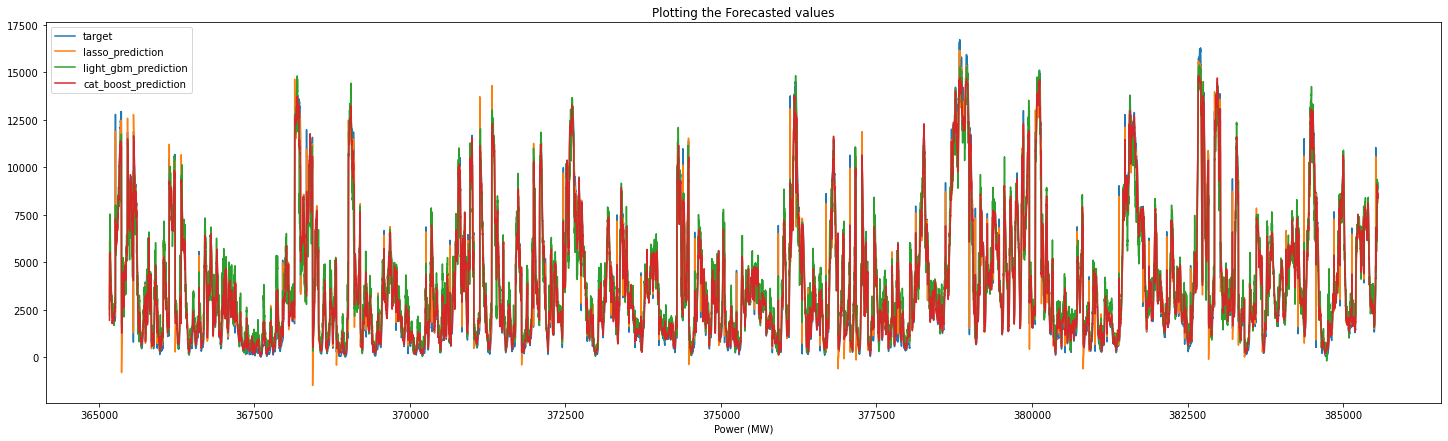

In [41]:
fig,axes = plt.subplots(1,1,figsize=(25,7))
y_test.plot(ax=axes)
plt.title('Plotting the Forecasted values')
plt.xlabel('Power (MW)')
plt.show()

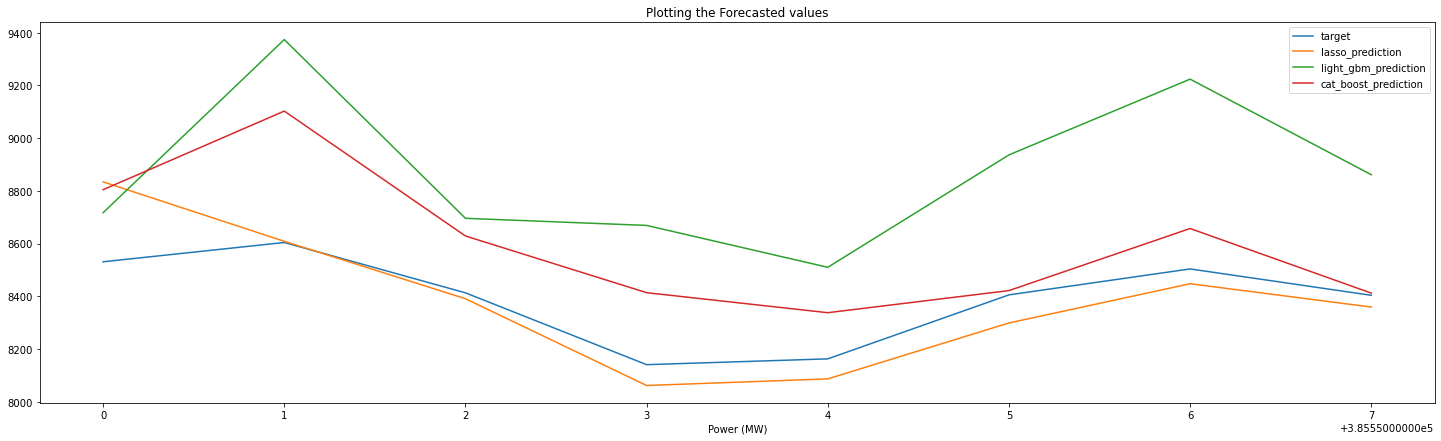

In [42]:
fig,axes = plt.subplots(1,1,figsize=(25,7))
y_test[len(y_test)-target_ahead_timeblocks:len(y_test)].plot(ax=axes)
plt.title('Plotting the Forecasted values')
plt.xlabel('Power (MW)')
plt.show()


Lasso - наиболее удачная модель для предсказания.